# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographic_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all, max_distance=2)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 118071 substitutions for model Model(time=Time.continuous, source=Source.all, past=Past.all, durl=Durl.all, max_distance=2)


  0% (     1 of 118071) |         | Elapsed Time: 0:00:27 ETA:  38 days, 1:07:23

  0% (    79 of 118071) |                  | Elapsed Time: 0:00:28 ETA:  0:24:54

  0% (   159 of 118071) |                  | Elapsed Time: 0:00:29 ETA:  0:24:38

  0% (   240 of 118071) |                  | Elapsed Time: 0:00:30 ETA:  0:24:24

  0% (   322 of 118071) |                  | Elapsed Time: 0:00:31 ETA:  0:24:09

  0% (   403 of 118071) |                  | Elapsed Time: 0:00:32 ETA:  0:24:04

  0% (   481 of 118071) |                  | Elapsed Time: 0:00:33 ETA:  0:24:10

  0% (   559 of 118071) |                  | Elapsed Time: 0:00:34 ETA:  0:24:15

  0% (   627 of 118071) |                  | Elapsed Time: 0:00:36 ETA:  0:26:39

  0% (   705 of 118071) |                  | Elapsed Time: 0:00:37 ETA:  0:26:25

  0% (   783 of 118071) |                  | Elapsed Time: 0:00:38 ETA:  0:26:23

  0% (   860 of 118071) |                  | Elapsed Time: 0:00:39 ETA:  0:26:28

  0% (   938 of 118071) |                  | Elapsed Time: 0:00:40 ETA:  0:26:34

  0% (  1017 of 118071) |                  | Elapsed Time: 0:00:41 ETA:  0:26:40

  0% (  1096 of 118071) |                  | Elapsed Time: 0:00:42 ETA:  0:26:45

  0% (  1175 of 118071) |                  | Elapsed Time: 0:00:43 ETA:  0:26:41

  1% (  1252 of 118071) |                  | Elapsed Time: 0:00:44 ETA:  0:26:44

  1% (  1330 of 118071) |                  | Elapsed Time: 0:00:45 ETA:  0:24:34

  1% (  1407 of 118071) |                  | Elapsed Time: 0:00:46 ETA:  0:24:35

  1% (  1476 of 118071) |                  | Elapsed Time: 0:00:47 ETA:  0:24:32

  1% (  1554 of 118071) |                  | Elapsed Time: 0:00:48 ETA:  0:24:29

  1% (  1633 of 118071) |                  | Elapsed Time: 0:00:49 ETA:  0:24:26

  1% (  1712 of 118071) |                  | Elapsed Time: 0:00:50 ETA:  0:24:25

  1% (  1792 of 118071) |                  | Elapsed Time: 0:00:51 ETA:  0:24:22

  1% (  1870 of 118071) |                  | Elapsed Time: 0:00:52 ETA:  0:24:23

  1% (  1951 of 118071) |                  | Elapsed Time: 0:00:53 ETA:  0:24:12

  1% (  2032 of 118071) |                  | Elapsed Time: 0:00:54 ETA:  0:24:06

  1% (  2114 of 118071) |                  | Elapsed Time: 0:00:55 ETA:  0:23:54

  1% (  2194 of 118071) |                  | Elapsed Time: 0:00:56 ETA:  0:23:52

  1% (  2274 of 118071) |                  | Elapsed Time: 0:00:57 ETA:  0:23:46

  1% (  2355 of 118071) |                  | Elapsed Time: 0:00:58 ETA:  0:23:42

  2% (  2435 of 118071) |                  | Elapsed Time: 0:00:59 ETA:  0:23:40

  2% (  2516 of 118071) |                  | Elapsed Time: 0:01:00 ETA:  0:23:37

  2% (  2596 of 118071) |                  | Elapsed Time: 0:01:01 ETA:  0:23:31

  2% (  2677 of 118071) |                  | Elapsed Time: 0:01:02 ETA:  0:23:30

  2% (  2755 of 118071) |                  | Elapsed Time: 0:01:03 ETA:  0:23:34

  2% (  2834 of 118071) |                  | Elapsed Time: 0:01:04 ETA:  0:23:40

  2% (  2913 of 118071) |                  | Elapsed Time: 0:01:05 ETA:  0:23:41

  2% (  2952 of 118071) |                  | Elapsed Time: 0:01:06 ETA:  0:23:42

  2% (  3029 of 118071) |                  | Elapsed Time: 0:01:07 ETA:  0:23:49

  2% (  3111 of 118071) |                  | Elapsed Time: 0:01:08 ETA:  0:23:43

  2% (  3190 of 118071) |                  | Elapsed Time: 0:01:09 ETA:  0:23:46

  2% (  3270 of 118071) |                  | Elapsed Time: 0:01:10 ETA:  0:23:47

  2% (  3349 of 118071) |                  | Elapsed Time: 0:01:11 ETA:  0:23:49

  2% (  3430 of 118071) |                  | Elapsed Time: 0:01:12 ETA:  0:23:43

  2% (  3510 of 118071) |                  | Elapsed Time: 0:01:13 ETA:  0:23:39

  3% (  3590 of 118071) |                  | Elapsed Time: 0:01:14 ETA:  0:23:36

  3% (  3670 of 118071) |                  | Elapsed Time: 0:01:15 ETA:  0:23:35

  3% (  3705 of 118071) |                  | Elapsed Time: 0:01:16 ETA:  0:26:08

  3% (  3781 of 118071) |                  | Elapsed Time: 0:01:17 ETA:  0:26:20

  3% (  3853 of 118071) |                  | Elapsed Time: 0:01:18 ETA:  0:26:37

  3% (  3933 of 118071) |                  | Elapsed Time: 0:01:19 ETA:  0:26:37

  3% (  4014 of 118071) |                  | Elapsed Time: 0:01:20 ETA:  0:26:32

  3% (  4096 of 118071) |                  | Elapsed Time: 0:01:21 ETA:  0:26:27

  3% (  4177 of 118071) |                  | Elapsed Time: 0:01:22 ETA:  0:26:23

  3% (  4254 of 118071) |                  | Elapsed Time: 0:01:23 ETA:  0:26:29

  3% (  4336 of 118071) |                  | Elapsed Time: 0:01:24 ETA:  0:26:22

  3% (  4428 of 118071) |                  | Elapsed Time: 0:01:25 ETA:  0:23:23

  3% (  4510 of 118071) |                  | Elapsed Time: 0:01:26 ETA:  0:22:59

  3% (  4593 of 118071) |                  | Elapsed Time: 0:01:27 ETA:  0:22:51

  3% (  4670 of 118071) |                  | Elapsed Time: 0:01:28 ETA:  0:22:57

  4% (  4747 of 118071) |                  | Elapsed Time: 0:01:29 ETA:  0:23:07

  4% (  4824 of 118071) |                  | Elapsed Time: 0:01:30 ETA:  0:23:16

  4% (  4901 of 118071) |                  | Elapsed Time: 0:01:31 ETA:  0:23:14

  4% (  4978 of 118071) |                  | Elapsed Time: 0:01:32 ETA:  0:23:25

  4% (  5054 of 118071) |                  | Elapsed Time: 0:01:33 ETA:  0:23:40

  4% (  5131 of 118071) |                  | Elapsed Time: 0:01:34 ETA:  0:23:43

  4% (  5208 of 118071) |                  | Elapsed Time: 0:01:35 ETA:  0:23:52

  4% (  5286 of 118071) |                  | Elapsed Time: 0:01:36 ETA:  0:24:02

  4% (  5363 of 118071) |                  | Elapsed Time: 0:01:37 ETA:  0:24:02

  4% (  5441 of 118071) |                  | Elapsed Time: 0:01:38 ETA:  0:24:01

  4% (  5519 of 118071) |                  | Elapsed Time: 0:01:39 ETA:  0:23:58

  4% (  5595 of 118071) |                  | Elapsed Time: 0:01:40 ETA:  0:24:00

  4% (  5672 of 118071) |                  | Elapsed Time: 0:01:41 ETA:  0:23:59

  4% (  5749 of 118071) |                  | Elapsed Time: 0:01:42 ETA:  0:23:55

  4% (  5824 of 118071) |                  | Elapsed Time: 0:01:43 ETA:  0:23:59

  5% (  5904 of 118071) |                  | Elapsed Time: 0:01:44 ETA:  0:24:01

  5% (  5979 of 118071) |                  | Elapsed Time: 0:01:45 ETA:  0:24:05

  5% (  6056 of 118071) |                  | Elapsed Time: 0:01:46 ETA:  0:24:05

  5% (  6130 of 118071) |                  | Elapsed Time: 0:01:47 ETA:  0:24:14

  5% (  6199 of 118071) |                  | Elapsed Time: 0:01:48 ETA:  0:24:31

  5% (  6266 of 118071) |                  | Elapsed Time: 0:01:49 ETA:  0:24:59

  5% (  6332 of 118071) |                  | Elapsed Time: 0:01:50 ETA:  0:25:29

  5% (  6398 of 118071) |                  | Elapsed Time: 0:01:51 ETA:  0:25:53

  5% (  6465 of 118071) |                  | Elapsed Time: 0:01:52 ETA:  0:26:23

  5% (  6533 of 118071) |                  | Elapsed Time: 0:01:53 ETA:  0:26:28

  5% (  6600 of 118071) |#                 | Elapsed Time: 0:01:54 ETA:  0:26:49

  5% (  6666 of 118071) |#                 | Elapsed Time: 0:01:55 ETA:  0:27:21

  5% (  6732 of 118071) |#                 | Elapsed Time: 0:01:56 ETA:  0:27:42

  5% (  6799 of 118071) |#                 | Elapsed Time: 0:01:57 ETA:  0:27:47

  5% (  6866 of 118071) |#                 | Elapsed Time: 0:01:58 ETA:  0:27:44

  5% (  6935 of 118071) |#                 | Elapsed Time: 0:01:59 ETA:  0:27:34

  5% (  7005 of 118071) |#                 | Elapsed Time: 0:02:00 ETA:  0:27:22

  5% (  7076 of 118071) |#                 | Elapsed Time: 0:02:01 ETA:  0:27:08

  6% (  7151 of 118071) |#                 | Elapsed Time: 0:02:02 ETA:  0:26:48

  6% (  7226 of 118071) |#                 | Elapsed Time: 0:02:03 ETA:  0:26:25

  6% (  7298 of 118071) |#                 | Elapsed Time: 0:02:04 ETA:  0:26:06

  6% (  7380 of 118071) |#                 | Elapsed Time: 0:02:06 ETA:  0:25:36

  6% (  7456 of 118071) |#                 | Elapsed Time: 0:02:07 ETA:  0:25:11

  6% (  7489 of 118071) |#                 | Elapsed Time: 0:02:08 ETA:  0:29:02

  6% (  7562 of 118071) |#                 | Elapsed Time: 0:02:09 ETA:  0:28:49

  6% (  7636 of 118071) |#                 | Elapsed Time: 0:02:10 ETA:  0:28:38

  6% (  7713 of 118071) |#                 | Elapsed Time: 0:02:11 ETA:  0:28:31

  6% (  7795 of 118071) |#                 | Elapsed Time: 0:02:12 ETA:  0:28:08

  6% (  7880 of 118071) |#                 | Elapsed Time: 0:02:13 ETA:  0:27:27

  6% (  7956 of 118071) |#                 | Elapsed Time: 0:02:14 ETA:  0:27:15

  6% (  8035 of 118071) |#                 | Elapsed Time: 0:02:15 ETA:  0:26:45

  6% (  8113 of 118071) |#                 | Elapsed Time: 0:02:16 ETA:  0:26:39

  6% (  8192 of 118071) |#                 | Elapsed Time: 0:02:17 ETA:  0:23:05

  7% (  8270 of 118071) |#                 | Elapsed Time: 0:02:18 ETA:  0:22:54

  7% (  8349 of 118071) |#                 | Elapsed Time: 0:02:19 ETA:  0:22:43

  7% (  8427 of 118071) |#                 | Elapsed Time: 0:02:20 ETA:  0:22:38

  7% (  8504 of 118071) |#                 | Elapsed Time: 0:02:21 ETA:  0:22:48

  7% (  8582 of 118071) |#                 | Elapsed Time: 0:02:22 ETA:  0:23:01

  7% (  8660 of 118071) |#                 | Elapsed Time: 0:02:23 ETA:  0:22:54

  7% (  8738 of 118071) |#                 | Elapsed Time: 0:02:24 ETA:  0:22:55

  7% (  8816 of 118071) |#                 | Elapsed Time: 0:02:25 ETA:  0:22:54

  7% (  8856 of 118071) |#                 | Elapsed Time: 0:02:26 ETA:  0:22:58

  7% (  8935 of 118071) |#                 | Elapsed Time: 0:02:27 ETA:  0:22:55

  7% (  9014 of 118071) |#                 | Elapsed Time: 0:02:28 ETA:  0:22:55

  7% (  9092 of 118071) |#                 | Elapsed Time: 0:02:29 ETA:  0:22:56

  7% (  9173 of 118071) |#                 | Elapsed Time: 0:02:30 ETA:  0:22:45

  7% (  9251 of 118071) |#                 | Elapsed Time: 0:02:31 ETA:  0:22:45

  7% (  9329 of 118071) |#                 | Elapsed Time: 0:02:32 ETA:  0:22:45

  7% (  9407 of 118071) |#                 | Elapsed Time: 0:02:33 ETA:  0:22:44

  8% (  9486 of 118071) |#                 | Elapsed Time: 0:02:34 ETA:  0:22:40

  8% (  9563 of 118071) |#                 | Elapsed Time: 0:02:35 ETA:  0:22:39

  8% (  9640 of 118071) |#                 | Elapsed Time: 0:02:36 ETA:  0:22:42

  8% (  9716 of 118071) |#                 | Elapsed Time: 0:02:37 ETA:  0:22:46

  8% (  9791 of 118071) |#                 | Elapsed Time: 0:02:38 ETA:  0:22:50

  8% (  9861 of 118071) |#                 | Elapsed Time: 0:02:39 ETA:  0:23:15

  8% (  9938 of 118071) |#                 | Elapsed Time: 0:02:40 ETA:  0:23:16

  8% ( 10014 of 118071) |#                 | Elapsed Time: 0:02:41 ETA:  0:23:20

  8% ( 10091 of 118071) |#                 | Elapsed Time: 0:02:42 ETA:  0:23:21

  8% ( 10160 of 118071) |#                 | Elapsed Time: 0:02:43 ETA:  0:23:44

  8% ( 10240 of 118071) |#                 | Elapsed Time: 0:02:44 ETA:  0:23:36

  8% ( 10332 of 118071) |#                 | Elapsed Time: 0:02:45 ETA:  0:23:16

  8% ( 10414 of 118071) |#                 | Elapsed Time: 0:02:46 ETA:  0:22:58

  8% ( 10498 of 118071) |#                 | Elapsed Time: 0:02:47 ETA:  0:22:22

  8% ( 10574 of 118071) |#                 | Elapsed Time: 0:02:48 ETA:  0:22:22

  9% ( 10642 of 118071) |#                 | Elapsed Time: 0:02:49 ETA:  0:22:39

  9% ( 10711 of 118071) |#                 | Elapsed Time: 0:02:50 ETA:  0:22:58

  9% ( 10780 of 118071) |#                 | Elapsed Time: 0:02:51 ETA:  0:22:55

  9% ( 10848 of 118071) |#                 | Elapsed Time: 0:02:52 ETA:  0:23:24

  9% ( 10918 of 118071) |#                 | Elapsed Time: 0:02:53 ETA:  0:24:05

  9% ( 10986 of 118071) |#                 | Elapsed Time: 0:02:54 ETA:  0:24:18

  9% ( 11054 of 118071) |#                 | Elapsed Time: 0:02:55 ETA:  0:24:52

  9% ( 11124 of 118071) |#                 | Elapsed Time: 0:02:56 ETA:  0:25:30

  9% ( 11200 of 118071) |#                 | Elapsed Time: 0:02:57 ETA:  0:25:31

  9% ( 11265 of 118071) |#                 | Elapsed Time: 0:02:58 ETA:  0:25:39

  9% ( 11339 of 118071) |#                 | Elapsed Time: 0:02:59 ETA:  0:25:23

  9% ( 11413 of 118071) |#                 | Elapsed Time: 0:03:00 ETA:  0:25:10

  9% ( 11481 of 118071) |#                 | Elapsed Time: 0:03:01 ETA:  0:25:10

  9% ( 11547 of 118071) |#                 | Elapsed Time: 0:03:02 ETA:  0:25:18

  9% ( 11613 of 118071) |#                 | Elapsed Time: 0:03:03 ETA:  0:25:24

  9% ( 11686 of 118071) |#                 | Elapsed Time: 0:03:04 ETA:  0:25:09

  9% ( 11761 of 118071) |#                 | Elapsed Time: 0:03:05 ETA:  0:24:54

 10% ( 11808 of 118071) |#                 | Elapsed Time: 0:03:06 ETA:  0:24:52

 10% ( 11889 of 118071) |#                 | Elapsed Time: 0:03:07 ETA:  0:24:09

 10% ( 11968 of 118071) |#                 | Elapsed Time: 0:03:08 ETA:  0:23:55

 10% ( 12041 of 118071) |#                 | Elapsed Time: 0:03:09 ETA:  0:23:57

 10% ( 12114 of 118071) |#                 | Elapsed Time: 0:03:10 ETA:  0:23:43

 10% ( 12158 of 118071) |#                 | Elapsed Time: 0:03:12 ETA:  0:28:08

 10% ( 12227 of 118071) |#                 | Elapsed Time: 0:03:13 ETA:  0:27:56

 10% ( 12297 of 118071) |#                 | Elapsed Time: 0:03:14 ETA:  0:28:05

 10% ( 12368 of 118071) |#                 | Elapsed Time: 0:03:15 ETA:  0:28:16

 10% ( 12439 of 118071) |#                 | Elapsed Time: 0:03:16 ETA:  0:28:20

 10% ( 12509 of 118071) |#                 | Elapsed Time: 0:03:17 ETA:  0:28:52

 10% ( 12581 of 118071) |#                 | Elapsed Time: 0:03:18 ETA:  0:29:12

 10% ( 12653 of 118071) |#                 | Elapsed Time: 0:03:19 ETA:  0:29:16

 10% ( 12736 of 118071) |#                 | Elapsed Time: 0:03:20 ETA:  0:28:43

 10% ( 12817 of 118071) |#                 | Elapsed Time: 0:03:21 ETA:  0:23:41

 10% ( 12898 of 118071) |#                 | Elapsed Time: 0:03:22 ETA:  0:23:13

 10% ( 12982 of 118071) |#                 | Elapsed Time: 0:03:23 ETA:  0:22:40

 11% ( 13063 of 118071) |#                 | Elapsed Time: 0:03:24 ETA:  0:22:16

 11% ( 13140 of 118071) |##                | Elapsed Time: 0:03:25 ETA:  0:22:03

 11% ( 13207 of 118071) |##                | Elapsed Time: 0:03:26 ETA:  0:22:10

 11% ( 13283 of 118071) |##                | Elapsed Time: 0:03:27 ETA:  0:22:04

 11% ( 13353 of 118071) |##                | Elapsed Time: 0:03:28 ETA:  0:22:35

 11% ( 13424 of 118071) |##                | Elapsed Time: 0:03:29 ETA:  0:22:58

 11% ( 13495 of 118071) |##                | Elapsed Time: 0:03:30 ETA:  0:23:23

 11% ( 13567 of 118071) |##                | Elapsed Time: 0:03:31 ETA:  0:23:55

 11% ( 13640 of 118071) |##                | Elapsed Time: 0:03:32 ETA:  0:24:18

 11% ( 13711 of 118071) |##                | Elapsed Time: 0:03:33 ETA:  0:24:33

 11% ( 13783 of 118071) |##                | Elapsed Time: 0:03:34 ETA:  0:24:15

 11% ( 13855 of 118071) |##                | Elapsed Time: 0:03:35 ETA:  0:24:04

 11% ( 13928 of 118071) |##                | Elapsed Time: 0:03:36 ETA:  0:23:58

 11% ( 14000 of 118071) |##                | Elapsed Time: 0:03:37 ETA:  0:23:51

 11% ( 14073 of 118071) |##                | Elapsed Time: 0:03:38 ETA:  0:23:47

 11% ( 14147 of 118071) |##                | Elapsed Time: 0:03:39 ETA:  0:23:39

 12% ( 14221 of 118071) |##                | Elapsed Time: 0:03:40 ETA:  0:23:33

 12% ( 14296 of 118071) |##                | Elapsed Time: 0:03:41 ETA:  0:23:27

 12% ( 14368 of 118071) |##                | Elapsed Time: 0:03:42 ETA:  0:23:25

 12% ( 14443 of 118071) |##                | Elapsed Time: 0:03:43 ETA:  0:23:18

 12% ( 14517 of 118071) |##                | Elapsed Time: 0:03:44 ETA:  0:23:14

 12% ( 14584 of 118071) |##                | Elapsed Time: 0:03:45 ETA:  0:23:28

 12% ( 14657 of 118071) |##                | Elapsed Time: 0:03:46 ETA:  0:23:25

 12% ( 14731 of 118071) |##                | Elapsed Time: 0:03:47 ETA:  0:23:21

 12% ( 14759 of 118071) |##                | Elapsed Time: 0:03:48 ETA:  0:23:22

 12% ( 14833 of 118071) |##                | Elapsed Time: 0:03:49 ETA:  0:23:21

 12% ( 14908 of 118071) |##                | Elapsed Time: 0:03:50 ETA:  0:23:20

 12% ( 14983 of 118071) |##                | Elapsed Time: 0:03:51 ETA:  0:23:09

 12% ( 15058 of 118071) |##                | Elapsed Time: 0:03:52 ETA:  0:23:09

 12% ( 15134 of 118071) |##                | Elapsed Time: 0:03:53 ETA:  0:23:03

 12% ( 15209 of 118071) |##                | Elapsed Time: 0:03:54 ETA:  0:22:41

 12% ( 15284 of 118071) |##                | Elapsed Time: 0:03:55 ETA:  0:22:36

 13% ( 15358 of 118071) |##                | Elapsed Time: 0:03:56 ETA:  0:22:35

 13% ( 15434 of 118071) |##                | Elapsed Time: 0:03:57 ETA:  0:22:30

 13% ( 15508 of 118071) |##                | Elapsed Time: 0:03:58 ETA:  0:22:30

 13% ( 15583 of 118071) |##                | Elapsed Time: 0:03:59 ETA:  0:22:28

 13% ( 15658 of 118071) |##                | Elapsed Time: 0:04:00 ETA:  0:22:28

 13% ( 15731 of 118071) |##                | Elapsed Time: 0:04:01 ETA:  0:22:30

 13% ( 15806 of 118071) |##                | Elapsed Time: 0:04:02 ETA:  0:22:31

 13% ( 15881 of 118071) |##                | Elapsed Time: 0:04:03 ETA:  0:22:31

 13% ( 15955 of 118071) |##                | Elapsed Time: 0:04:04 ETA:  0:22:31

 13% ( 16030 of 118071) |##                | Elapsed Time: 0:04:05 ETA:  0:22:29

 13% ( 16105 of 118071) |##                | Elapsed Time: 0:04:06 ETA:  0:22:31

 13% ( 16180 of 118071) |##                | Elapsed Time: 0:04:07 ETA:  0:22:26

 13% ( 16235 of 118071) |##                | Elapsed Time: 0:04:08 ETA:  0:22:26

 13% ( 16310 of 118071) |##                | Elapsed Time: 0:04:09 ETA:  0:22:25

 13% ( 16385 of 118071) |##                | Elapsed Time: 0:04:10 ETA:  0:22:19

 13% ( 16461 of 118071) |##                | Elapsed Time: 0:04:11 ETA:  0:22:16

 14% ( 16540 of 118071) |##                | Elapsed Time: 0:04:12 ETA:  0:22:04

 14% ( 16616 of 118071) |##                | Elapsed Time: 0:04:13 ETA:  0:22:00

 14% ( 16694 of 118071) |##                | Elapsed Time: 0:04:14 ETA:  0:21:51

 14% ( 16770 of 118071) |##                | Elapsed Time: 0:04:15 ETA:  0:21:46

 14% ( 16843 of 118071) |##                | Elapsed Time: 0:04:16 ETA:  0:21:50

 14% ( 16916 of 118071) |##                | Elapsed Time: 0:04:17 ETA:  0:21:54

 14% ( 16993 of 118071) |##                | Elapsed Time: 0:04:18 ETA:  0:21:49

 14% ( 17067 of 118071) |##                | Elapsed Time: 0:04:19 ETA:  0:21:50

 14% ( 17146 of 118071) |##                | Elapsed Time: 0:04:20 ETA:  0:21:42

 14% ( 17221 of 118071) |##                | Elapsed Time: 0:04:21 ETA:  0:21:50

 14% ( 17298 of 118071) |##                | Elapsed Time: 0:04:22 ETA:  0:21:46

 14% ( 17377 of 118071) |##                | Elapsed Time: 0:04:23 ETA:  0:21:42

 14% ( 17457 of 118071) |##                | Elapsed Time: 0:04:24 ETA:  0:21:33

 14% ( 17535 of 118071) |##                | Elapsed Time: 0:04:25 ETA:  0:21:19

 14% ( 17613 of 118071) |##                | Elapsed Time: 0:04:26 ETA:  0:21:07

 14% ( 17689 of 118071) |##                | Elapsed Time: 0:04:27 ETA:  0:21:08

 15% ( 17711 of 118071) |##                | Elapsed Time: 0:04:27 ETA:  0:21:03

 15% ( 17785 of 118071) |##                | Elapsed Time: 0:04:28 ETA:  0:21:12

 15% ( 17859 of 118071) |##                | Elapsed Time: 0:04:29 ETA:  0:21:13

 15% ( 17933 of 118071) |##                | Elapsed Time: 0:04:30 ETA:  0:21:19

 15% ( 17972 of 118071) |##                | Elapsed Time: 0:04:32 ETA:  0:27:33

 15% ( 18039 of 118071) |##                | Elapsed Time: 0:04:33 ETA:  0:28:14

 15% ( 18106 of 118071) |##                | Elapsed Time: 0:04:34 ETA:  0:28:50

 15% ( 18176 of 118071) |##                | Elapsed Time: 0:04:35 ETA:  0:29:17

 15% ( 18253 of 118071) |##                | Elapsed Time: 0:04:36 ETA:  0:29:11

 15% ( 18336 of 118071) |##                | Elapsed Time: 0:04:37 ETA:  0:28:07

 15% ( 18419 of 118071) |##                | Elapsed Time: 0:04:38 ETA:  0:27:40

 15% ( 18502 of 118071) |##                | Elapsed Time: 0:04:39 ETA:  0:27:10

 15% ( 18585 of 118071) |##                | Elapsed Time: 0:04:40 ETA:  0:26:43

 15% ( 18668 of 118071) |##                | Elapsed Time: 0:04:41 ETA:  0:20:51

 15% ( 18747 of 118071) |##                | Elapsed Time: 0:04:42 ETA:  0:20:24

 15% ( 18826 of 118071) |##                | Elapsed Time: 0:04:43 ETA:  0:19:58

 16% ( 18905 of 118071) |##                | Elapsed Time: 0:04:44 ETA:  0:19:39

 16% ( 18984 of 118071) |##                | Elapsed Time: 0:04:45 ETA:  0:19:36

 16% ( 19063 of 118071) |##                | Elapsed Time: 0:04:46 ETA:  0:19:41

 16% ( 19141 of 118071) |##                | Elapsed Time: 0:04:47 ETA:  0:19:50

 16% ( 19187 of 118071) |##                | Elapsed Time: 0:04:48 ETA:  0:20:00

 16% ( 19266 of 118071) |##                | Elapsed Time: 0:04:49 ETA:  0:20:09

 16% ( 19344 of 118071) |##                | Elapsed Time: 0:04:50 ETA:  0:20:18

 16% ( 19423 of 118071) |##                | Elapsed Time: 0:04:51 ETA:  0:20:17

 16% ( 19500 of 118071) |##                | Elapsed Time: 0:04:52 ETA:  0:20:22

 16% ( 19577 of 118071) |##                | Elapsed Time: 0:04:53 ETA:  0:20:26

 16% ( 19655 of 118071) |##                | Elapsed Time: 0:04:54 ETA:  0:20:27

 16% ( 19732 of 118071) |###               | Elapsed Time: 0:04:55 ETA:  0:20:32

 16% ( 19811 of 118071) |###               | Elapsed Time: 0:04:56 ETA:  0:20:28

 16% ( 19891 of 118071) |###               | Elapsed Time: 0:04:57 ETA:  0:20:22

 16% ( 19969 of 118071) |###               | Elapsed Time: 0:04:58 ETA:  0:20:23

 16% ( 20049 of 118071) |###               | Elapsed Time: 0:04:59 ETA:  0:20:19

 17% ( 20129 of 118071) |###               | Elapsed Time: 0:05:00 ETA:  0:20:17

 17% ( 20208 of 118071) |###               | Elapsed Time: 0:05:01 ETA:  0:20:10

 17% ( 20287 of 118071) |###               | Elapsed Time: 0:05:02 ETA:  0:20:05

 17% ( 20365 of 118071) |###               | Elapsed Time: 0:05:03 ETA:  0:20:05

 17% ( 20441 of 118071) |###               | Elapsed Time: 0:05:04 ETA:  0:20:05

 17% ( 20519 of 118071) |###               | Elapsed Time: 0:05:05 ETA:  0:20:07

 17% ( 20597 of 118071) |###               | Elapsed Time: 0:05:06 ETA:  0:20:09

 17% ( 20663 of 118071) |###               | Elapsed Time: 0:05:07 ETA:  0:20:08

 17% ( 20739 of 118071) |###               | Elapsed Time: 0:05:08 ETA:  0:20:16

 17% ( 20816 of 118071) |###               | Elapsed Time: 0:05:09 ETA:  0:20:20

 17% ( 20889 of 118071) |###               | Elapsed Time: 0:05:10 ETA:  0:20:33

 17% ( 20968 of 118071) |###               | Elapsed Time: 0:05:11 ETA:  0:20:31

 17% ( 21047 of 118071) |###               | Elapsed Time: 0:05:12 ETA:  0:20:27

 17% ( 21124 of 118071) |###               | Elapsed Time: 0:05:13 ETA:  0:20:25

 17% ( 21203 of 118071) |###               | Elapsed Time: 0:05:14 ETA:  0:20:23

 18% ( 21281 of 118071) |###               | Elapsed Time: 0:05:15 ETA:  0:20:23

 18% ( 21361 of 118071) |###               | Elapsed Time: 0:05:16 ETA:  0:20:17

 18% ( 21439 of 118071) |###               | Elapsed Time: 0:05:17 ETA:  0:20:11

 18% ( 21519 of 118071) |###               | Elapsed Time: 0:05:18 ETA:  0:20:03

 18% ( 21598 of 118071) |###               | Elapsed Time: 0:05:19 ETA:  0:19:48

 18% ( 21676 of 118071) |###               | Elapsed Time: 0:05:20 ETA:  0:19:50

 18% ( 21753 of 118071) |###               | Elapsed Time: 0:05:21 ETA:  0:19:52

 18% ( 21831 of 118071) |###               | Elapsed Time: 0:05:22 ETA:  0:19:47

 18% ( 21911 of 118071) |###               | Elapsed Time: 0:05:23 ETA:  0:19:43

 18% ( 21990 of 118071) |###               | Elapsed Time: 0:05:24 ETA:  0:19:39

 18% ( 22070 of 118071) |###               | Elapsed Time: 0:05:25 ETA:  0:19:38

 18% ( 22139 of 118071) |###               | Elapsed Time: 0:05:26 ETA:  0:19:34

 18% ( 22218 of 118071) |###               | Elapsed Time: 0:05:27 ETA:  0:19:35

 18% ( 22298 of 118071) |###               | Elapsed Time: 0:05:28 ETA:  0:19:33

 18% ( 22377 of 118071) |###               | Elapsed Time: 0:05:29 ETA:  0:19:30

 19% ( 22458 of 118071) |###               | Elapsed Time: 0:05:30 ETA:  0:19:22

 19% ( 22539 of 118071) |###               | Elapsed Time: 0:05:31 ETA:  0:19:16

 19% ( 22618 of 118071) |###               | Elapsed Time: 0:05:32 ETA:  0:19:17

 19% ( 22698 of 118071) |###               | Elapsed Time: 0:05:33 ETA:  0:19:14

 19% ( 22779 of 118071) |###               | Elapsed Time: 0:05:34 ETA:  0:19:09

 19% ( 22860 of 118071) |###               | Elapsed Time: 0:05:35 ETA:  0:19:06

 19% ( 22941 of 118071) |###               | Elapsed Time: 0:05:36 ETA:  0:19:01

 19% ( 23021 of 118071) |###               | Elapsed Time: 0:05:37 ETA:  0:19:00

 19% ( 23102 of 118071) |###               | Elapsed Time: 0:05:38 ETA:  0:18:56

 19% ( 23182 of 118071) |###               | Elapsed Time: 0:05:39 ETA:  0:18:56

 19% ( 23261 of 118071) |###               | Elapsed Time: 0:05:40 ETA:  0:19:00

 19% ( 23336 of 118071) |###               | Elapsed Time: 0:05:41 ETA:  0:19:08

 19% ( 23414 of 118071) |###               | Elapsed Time: 0:05:42 ETA:  0:19:12

 19% ( 23490 of 118071) |###               | Elapsed Time: 0:05:43 ETA:  0:19:22

 19% ( 23568 of 118071) |###               | Elapsed Time: 0:05:44 ETA:  0:19:28

 20% ( 23615 of 118071) |###               | Elapsed Time: 0:05:45 ETA:  0:19:34

 20% ( 23692 of 118071) |###               | Elapsed Time: 0:05:46 ETA:  0:19:39

 20% ( 23769 of 118071) |###               | Elapsed Time: 0:05:47 ETA:  0:19:48

 20% ( 23842 of 118071) |###               | Elapsed Time: 0:05:48 ETA:  0:20:03

 20% ( 23910 of 118071) |###               | Elapsed Time: 0:05:49 ETA:  0:20:29

 20% ( 23983 of 118071) |###               | Elapsed Time: 0:05:50 ETA:  0:20:32

 20% ( 24054 of 118071) |###               | Elapsed Time: 0:05:51 ETA:  0:20:47

 20% ( 24135 of 118071) |###               | Elapsed Time: 0:05:52 ETA:  0:20:33

 20% ( 24216 of 118071) |###               | Elapsed Time: 0:05:53 ETA:  0:20:25

 20% ( 24297 of 118071) |###               | Elapsed Time: 0:05:54 ETA:  0:20:14

 20% ( 24378 of 118071) |###               | Elapsed Time: 0:05:55 ETA:  0:20:05

 20% ( 24459 of 118071) |###               | Elapsed Time: 0:05:56 ETA:  0:19:55

 20% ( 24540 of 118071) |###               | Elapsed Time: 0:05:57 ETA:  0:19:34

 20% ( 24620 of 118071) |###               | Elapsed Time: 0:05:58 ETA:  0:19:07

 20% ( 24700 of 118071) |###               | Elapsed Time: 0:05:59 ETA:  0:18:52

 20% ( 24780 of 118071) |###               | Elapsed Time: 0:06:00 ETA:  0:18:34

 21% ( 24861 of 118071) |###               | Elapsed Time: 0:06:01 ETA:  0:18:35

 21% ( 24942 of 118071) |###               | Elapsed Time: 0:06:02 ETA:  0:18:33

 21% ( 25021 of 118071) |###               | Elapsed Time: 0:06:03 ETA:  0:18:35

 21% ( 25091 of 118071) |###               | Elapsed Time: 0:06:04 ETA:  0:18:46

 21% ( 25169 of 118071) |###               | Elapsed Time: 0:06:05 ETA:  0:18:52

 21% ( 25183 of 118071) |###               | Elapsed Time: 0:06:07 ETA:  0:26:01

 21% ( 25258 of 118071) |###               | Elapsed Time: 0:06:08 ETA:  0:26:15

 21% ( 25339 of 118071) |###               | Elapsed Time: 0:06:09 ETA:  0:26:11

 21% ( 25419 of 118071) |###               | Elapsed Time: 0:06:10 ETA:  0:26:10

 21% ( 25492 of 118071) |###               | Elapsed Time: 0:06:11 ETA:  0:26:32

 21% ( 25565 of 118071) |###               | Elapsed Time: 0:06:12 ETA:  0:26:56

 21% ( 25637 of 118071) |###               | Elapsed Time: 0:06:13 ETA:  0:27:18

 21% ( 25710 of 118071) |###               | Elapsed Time: 0:06:14 ETA:  0:27:19

 21% ( 25781 of 118071) |###               | Elapsed Time: 0:06:15 ETA:  0:27:40

 21% ( 25852 of 118071) |###               | Elapsed Time: 0:06:16 ETA:  0:20:21

 21% ( 25923 of 118071) |###               | Elapsed Time: 0:06:17 ETA:  0:20:28

 22% ( 25993 of 118071) |###               | Elapsed Time: 0:06:18 ETA:  0:20:53

 22% ( 26063 of 118071) |###               | Elapsed Time: 0:06:19 ETA:  0:21:16

 22% ( 26136 of 118071) |###               | Elapsed Time: 0:06:20 ETA:  0:21:15

 22% ( 26210 of 118071) |###               | Elapsed Time: 0:06:21 ETA:  0:21:11

 22% ( 26284 of 118071) |####              | Elapsed Time: 0:06:22 ETA:  0:21:06

 22% ( 26360 of 118071) |####              | Elapsed Time: 0:06:23 ETA:  0:20:59

 22% ( 26431 of 118071) |####              | Elapsed Time: 0:06:24 ETA:  0:20:59

 22% ( 26507 of 118071) |####              | Elapsed Time: 0:06:25 ETA:  0:20:46

 22% ( 26566 of 118071) |####              | Elapsed Time: 0:06:26 ETA:  0:20:19

 22% ( 26639 of 118071) |####              | Elapsed Time: 0:06:27 ETA:  0:20:10

 22% ( 26713 of 118071) |####              | Elapsed Time: 0:06:28 ETA:  0:19:59

 22% ( 26786 of 118071) |####              | Elapsed Time: 0:06:29 ETA:  0:19:59

 22% ( 26860 of 118071) |####              | Elapsed Time: 0:06:30 ETA:  0:19:57

 22% ( 26935 of 118071) |####              | Elapsed Time: 0:06:31 ETA:  0:19:53

 22% ( 27010 of 118071) |####              | Elapsed Time: 0:06:32 ETA:  0:19:53

 22% ( 27089 of 118071) |####              | Elapsed Time: 0:06:33 ETA:  0:19:33

 23% ( 27168 of 118071) |####              | Elapsed Time: 0:06:34 ETA:  0:19:25

 23% ( 27248 of 118071) |####              | Elapsed Time: 0:06:35 ETA:  0:19:29

 23% ( 27328 of 118071) |####              | Elapsed Time: 0:06:36 ETA:  0:19:13

 23% ( 27408 of 118071) |####              | Elapsed Time: 0:06:37 ETA:  0:18:59

 23% ( 27488 of 118071) |####              | Elapsed Time: 0:06:38 ETA:  0:18:43

 23% ( 27566 of 118071) |####              | Elapsed Time: 0:06:39 ETA:  0:18:33

 23% ( 27646 of 118071) |####              | Elapsed Time: 0:06:40 ETA:  0:18:22

 23% ( 27725 of 118071) |####              | Elapsed Time: 0:06:41 ETA:  0:18:15

 23% ( 27804 of 118071) |####              | Elapsed Time: 0:06:42 ETA:  0:18:12

 23% ( 27884 of 118071) |####              | Elapsed Time: 0:06:43 ETA:  0:18:10

 23% ( 27962 of 118071) |####              | Elapsed Time: 0:06:44 ETA:  0:18:12

 23% ( 28042 of 118071) |####              | Elapsed Time: 0:06:45 ETA:  0:18:06

 23% ( 28126 of 118071) |####              | Elapsed Time: 0:06:46 ETA:  0:17:57

 23% ( 28206 of 118071) |####              | Elapsed Time: 0:06:47 ETA:  0:17:56

 23% ( 28280 of 118071) |####              | Elapsed Time: 0:06:48 ETA:  0:18:04

 24% ( 28355 of 118071) |####              | Elapsed Time: 0:06:49 ETA:  0:18:13

 24% ( 28430 of 118071) |####              | Elapsed Time: 0:06:50 ETA:  0:18:21

 24% ( 28504 of 118071) |####              | Elapsed Time: 0:06:51 ETA:  0:18:31

 24% ( 28578 of 118071) |####              | Elapsed Time: 0:06:52 ETA:  0:18:42

 24% ( 28656 of 118071) |####              | Elapsed Time: 0:06:53 ETA:  0:18:42

 24% ( 28740 of 118071) |####              | Elapsed Time: 0:06:54 ETA:  0:18:38

 24% ( 28821 of 118071) |####              | Elapsed Time: 0:06:55 ETA:  0:18:43

 24% ( 28898 of 118071) |####              | Elapsed Time: 0:06:56 ETA:  0:18:48

 24% ( 28979 of 118071) |####              | Elapsed Time: 0:06:57 ETA:  0:18:33

 24% ( 29059 of 118071) |####              | Elapsed Time: 0:06:58 ETA:  0:18:20

 24% ( 29129 of 118071) |####              | Elapsed Time: 0:06:59 ETA:  0:18:29

 24% ( 29207 of 118071) |####              | Elapsed Time: 0:07:00 ETA:  0:18:19

 24% ( 29286 of 118071) |####              | Elapsed Time: 0:07:01 ETA:  0:18:09

 24% ( 29366 of 118071) |####              | Elapsed Time: 0:07:02 ETA:  0:18:05

 24% ( 29446 of 118071) |####              | Elapsed Time: 0:07:03 ETA:  0:18:13

 25% ( 29518 of 118071) |####              | Elapsed Time: 0:07:04 ETA:  0:18:17

 25% ( 29595 of 118071) |####              | Elapsed Time: 0:07:05 ETA:  0:18:14

 25% ( 29671 of 118071) |####              | Elapsed Time: 0:07:06 ETA:  0:18:23

 25% ( 29749 of 118071) |####              | Elapsed Time: 0:07:07 ETA:  0:18:27

 25% ( 29825 of 118071) |####              | Elapsed Time: 0:07:08 ETA:  0:18:12

 25% ( 29905 of 118071) |####              | Elapsed Time: 0:07:09 ETA:  0:18:07

 25% ( 29986 of 118071) |####              | Elapsed Time: 0:07:10 ETA:  0:18:00

 25% ( 30059 of 118071) |####              | Elapsed Time: 0:07:11 ETA:  0:18:13

 25% ( 30138 of 118071) |####              | Elapsed Time: 0:07:12 ETA:  0:18:15

 25% ( 30217 of 118071) |####              | Elapsed Time: 0:07:13 ETA:  0:18:14

 25% ( 30295 of 118071) |####              | Elapsed Time: 0:07:14 ETA:  0:18:11

 25% ( 30372 of 118071) |####              | Elapsed Time: 0:07:15 ETA:  0:18:10

 25% ( 30449 of 118071) |####              | Elapsed Time: 0:07:16 ETA:  0:18:11

 25% ( 30535 of 118071) |####              | Elapsed Time: 0:07:17 ETA:  0:17:48

 25% ( 30622 of 118071) |####              | Elapsed Time: 0:07:18 ETA:  0:17:31

 26% ( 30707 of 118071) |####              | Elapsed Time: 0:07:19 ETA:  0:17:22

 26% ( 30788 of 118071) |####              | Elapsed Time: 0:07:20 ETA:  0:17:05

 26% ( 30865 of 118071) |####              | Elapsed Time: 0:07:21 ETA:  0:17:08

 26% ( 30944 of 118071) |####              | Elapsed Time: 0:07:22 ETA:  0:17:06

 26% ( 30994 of 118071) |####              | Elapsed Time: 0:07:23 ETA:  0:17:00

 26% ( 31067 of 118071) |####              | Elapsed Time: 0:07:24 ETA:  0:17:07

 26% ( 31144 of 118071) |####              | Elapsed Time: 0:07:25 ETA:  0:17:07

 26% ( 31219 of 118071) |####              | Elapsed Time: 0:07:26 ETA:  0:17:29

 26% ( 31295 of 118071) |####              | Elapsed Time: 0:07:27 ETA:  0:17:53

 26% ( 31371 of 118071) |####              | Elapsed Time: 0:07:28 ETA:  0:18:13

 26% ( 31446 of 118071) |####              | Elapsed Time: 0:07:29 ETA:  0:18:27

 26% ( 31521 of 118071) |####              | Elapsed Time: 0:07:30 ETA:  0:18:30

 26% ( 31599 of 118071) |####              | Elapsed Time: 0:07:31 ETA:  0:18:32

 26% ( 31683 of 118071) |####              | Elapsed Time: 0:07:32 ETA:  0:18:20

 26% ( 31768 of 118071) |####              | Elapsed Time: 0:07:33 ETA:  0:17:51

 26% ( 31848 of 118071) |####              | Elapsed Time: 0:07:34 ETA:  0:17:43

 27% ( 31925 of 118071) |####              | Elapsed Time: 0:07:35 ETA:  0:17:38

 27% ( 32007 of 118071) |####              | Elapsed Time: 0:07:36 ETA:  0:17:24

 27% ( 32088 of 118071) |####              | Elapsed Time: 0:07:37 ETA:  0:17:13

 27% ( 32165 of 118071) |####              | Elapsed Time: 0:07:38 ETA:  0:17:08

 27% ( 32246 of 118071) |####              | Elapsed Time: 0:07:39 ETA:  0:16:54

 27% ( 32327 of 118071) |####              | Elapsed Time: 0:07:40 ETA:  0:16:46

 27% ( 32405 of 118071) |####              | Elapsed Time: 0:07:41 ETA:  0:16:58

 27% ( 32470 of 118071) |####              | Elapsed Time: 0:07:42 ETA:  0:17:20

 27% ( 32546 of 118071) |####              | Elapsed Time: 0:07:43 ETA:  0:17:27

 27% ( 32622 of 118071) |####              | Elapsed Time: 0:07:44 ETA:  0:17:30

 27% ( 32698 of 118071) |####              | Elapsed Time: 0:07:45 ETA:  0:17:42

 27% ( 32775 of 118071) |####              | Elapsed Time: 0:07:46 ETA:  0:17:49

 27% ( 32858 of 118071) |#####             | Elapsed Time: 0:07:47 ETA:  0:17:34

 27% ( 32942 of 118071) |#####             | Elapsed Time: 0:07:48 ETA:  0:17:27

 27% ( 33020 of 118071) |#####             | Elapsed Time: 0:07:49 ETA:  0:17:32

 28% ( 33098 of 118071) |#####             | Elapsed Time: 0:07:50 ETA:  0:17:31

 28% ( 33177 of 118071) |#####             | Elapsed Time: 0:07:51 ETA:  0:17:19

 28% ( 33263 of 118071) |#####             | Elapsed Time: 0:07:52 ETA:  0:16:58

 28% ( 33350 of 118071) |#####             | Elapsed Time: 0:07:53 ETA:  0:16:34

 28% ( 33436 of 118071) |#####             | Elapsed Time: 0:07:54 ETA:  0:16:12

 28% ( 33522 of 118071) |#####             | Elapsed Time: 0:07:55 ETA:  0:15:54

 28% ( 33609 of 118071) |#####             | Elapsed Time: 0:07:56 ETA:  0:15:47

 28% ( 33695 of 118071) |#####             | Elapsed Time: 0:07:57 ETA:  0:15:42

 28% ( 33782 of 118071) |#####             | Elapsed Time: 0:07:58 ETA:  0:15:25

 28% ( 33862 of 118071) |#####             | Elapsed Time: 0:07:59 ETA:  0:15:21

 28% ( 33946 of 118071) |#####             | Elapsed Time: 0:08:00 ETA:  0:15:11

 28% ( 34030 of 118071) |#####             | Elapsed Time: 0:08:01 ETA:  0:15:14

 28% ( 34039 of 118071) |#####             | Elapsed Time: 0:08:04 ETA:  0:23:45

 28% ( 34116 of 118071) |#####             | Elapsed Time: 0:08:05 ETA:  0:24:09

 28% ( 34196 of 118071) |#####             | Elapsed Time: 0:08:06 ETA:  0:24:25

 29% ( 34271 of 118071) |#####             | Elapsed Time: 0:08:07 ETA:  0:24:59

 29% ( 34342 of 118071) |#####             | Elapsed Time: 0:08:08 ETA:  0:25:44

 29% ( 34415 of 118071) |#####             | Elapsed Time: 0:08:09 ETA:  0:26:28

 29% ( 34491 of 118071) |#####             | Elapsed Time: 0:08:10 ETA:  0:26:39

 29% ( 34568 of 118071) |#####             | Elapsed Time: 0:08:11 ETA:  0:27:02

 29% ( 34647 of 118071) |#####             | Elapsed Time: 0:08:12 ETA:  0:27:17

 29% ( 34729 of 118071) |#####             | Elapsed Time: 0:08:13 ETA:  0:17:33

 29% ( 34808 of 118071) |#####             | Elapsed Time: 0:08:14 ETA:  0:17:28

 29% ( 34885 of 118071) |#####             | Elapsed Time: 0:08:15 ETA:  0:17:34

 29% ( 34968 of 118071) |#####             | Elapsed Time: 0:08:16 ETA:  0:17:14

 29% ( 35046 of 118071) |#####             | Elapsed Time: 0:08:17 ETA:  0:16:59

 29% ( 35123 of 118071) |#####             | Elapsed Time: 0:08:18 ETA:  0:16:49

 29% ( 35202 of 118071) |#####             | Elapsed Time: 0:08:19 ETA:  0:16:42

 29% ( 35283 of 118071) |#####             | Elapsed Time: 0:08:20 ETA:  0:16:34

 29% ( 35357 of 118071) |#####             | Elapsed Time: 0:08:21 ETA:  0:16:45

 30% ( 35422 of 118071) |#####             | Elapsed Time: 0:08:22 ETA:  0:16:53

 30% ( 35502 of 118071) |#####             | Elapsed Time: 0:08:23 ETA:  0:16:52

 30% ( 35587 of 118071) |#####             | Elapsed Time: 0:08:24 ETA:  0:16:33

 30% ( 35670 of 118071) |#####             | Elapsed Time: 0:08:25 ETA:  0:16:33

 30% ( 35745 of 118071) |#####             | Elapsed Time: 0:08:26 ETA:  0:16:37

 30% ( 35819 of 118071) |#####             | Elapsed Time: 0:08:27 ETA:  0:16:41

 30% ( 35893 of 118071) |#####             | Elapsed Time: 0:08:28 ETA:  0:16:51

 30% ( 35967 of 118071) |#####             | Elapsed Time: 0:08:29 ETA:  0:17:06

 30% ( 36042 of 118071) |#####             | Elapsed Time: 0:08:30 ETA:  0:17:01

 30% ( 36115 of 118071) |#####             | Elapsed Time: 0:08:31 ETA:  0:17:10

 30% ( 36188 of 118071) |#####             | Elapsed Time: 0:08:32 ETA:  0:17:24

 30% ( 36263 of 118071) |#####             | Elapsed Time: 0:08:33 ETA:  0:17:46

 30% ( 36338 of 118071) |#####             | Elapsed Time: 0:08:34 ETA:  0:18:03

 30% ( 36412 of 118071) |#####             | Elapsed Time: 0:08:35 ETA:  0:18:04

 30% ( 36487 of 118071) |#####             | Elapsed Time: 0:08:36 ETA:  0:18:01

 30% ( 36567 of 118071) |#####             | Elapsed Time: 0:08:37 ETA:  0:17:46

 31% ( 36643 of 118071) |#####             | Elapsed Time: 0:08:38 ETA:  0:17:40

 31% ( 36719 of 118071) |#####             | Elapsed Time: 0:08:39 ETA:  0:17:37

 31% ( 36795 of 118071) |#####             | Elapsed Time: 0:08:40 ETA:  0:17:30

 31% ( 36872 of 118071) |#####             | Elapsed Time: 0:08:41 ETA:  0:17:19

 31% ( 36898 of 118071) |#####             | Elapsed Time: 0:08:42 ETA:  0:17:19

 31% ( 36979 of 118071) |#####             | Elapsed Time: 0:08:43 ETA:  0:17:04

 31% ( 37059 of 118071) |#####             | Elapsed Time: 0:08:44 ETA:  0:16:49

 31% ( 37137 of 118071) |#####             | Elapsed Time: 0:08:45 ETA:  0:16:41

 31% ( 37216 of 118071) |#####             | Elapsed Time: 0:08:46 ETA:  0:16:43

 31% ( 37299 of 118071) |#####             | Elapsed Time: 0:08:47 ETA:  0:16:26

 31% ( 37375 of 118071) |#####             | Elapsed Time: 0:08:48 ETA:  0:16:26

 31% ( 37451 of 118071) |#####             | Elapsed Time: 0:08:49 ETA:  0:16:25

 31% ( 37523 of 118071) |#####             | Elapsed Time: 0:08:50 ETA:  0:16:38

 31% ( 37601 of 118071) |#####             | Elapsed Time: 0:08:51 ETA:  0:16:34

 31% ( 37680 of 118071) |#####             | Elapsed Time: 0:08:52 ETA:  0:16:36

 31% ( 37756 of 118071) |#####             | Elapsed Time: 0:08:53 ETA:  0:16:45

 32% ( 37835 of 118071) |#####             | Elapsed Time: 0:08:54 ETA:  0:16:42

 32% ( 37916 of 118071) |#####             | Elapsed Time: 0:08:55 ETA:  0:16:37

 32% ( 37993 of 118071) |#####             | Elapsed Time: 0:08:56 ETA:  0:16:48

 32% ( 38070 of 118071) |#####             | Elapsed Time: 0:08:57 ETA:  0:16:44

 32% ( 38147 of 118071) |#####             | Elapsed Time: 0:08:58 ETA:  0:16:39

 32% ( 38228 of 118071) |#####             | Elapsed Time: 0:08:59 ETA:  0:16:18

 32% ( 38304 of 118071) |#####             | Elapsed Time: 0:09:00 ETA:  0:16:22

 32% ( 38374 of 118071) |#####             | Elapsed Time: 0:09:01 ETA:  0:16:20

 32% ( 38450 of 118071) |#####             | Elapsed Time: 0:09:02 ETA:  0:16:17

 32% ( 38529 of 118071) |#####             | Elapsed Time: 0:09:03 ETA:  0:16:15

 32% ( 38609 of 118071) |#####             | Elapsed Time: 0:09:04 ETA:  0:16:16

 32% ( 38686 of 118071) |#####             | Elapsed Time: 0:09:05 ETA:  0:16:16

 32% ( 38768 of 118071) |#####             | Elapsed Time: 0:09:06 ETA:  0:16:04

 32% ( 38851 of 118071) |#####             | Elapsed Time: 0:09:07 ETA:  0:15:51

 32% ( 38933 of 118071) |#####             | Elapsed Time: 0:09:08 ETA:  0:15:47

 33% ( 39016 of 118071) |#####             | Elapsed Time: 0:09:09 ETA:  0:15:31

 33% ( 39086 of 118071) |#####             | Elapsed Time: 0:09:10 ETA:  0:15:51

 33% ( 39163 of 118071) |#####             | Elapsed Time: 0:09:11 ETA:  0:15:49

 33% ( 39239 of 118071) |#####             | Elapsed Time: 0:09:12 ETA:  0:15:54

 33% ( 39309 of 118071) |#####             | Elapsed Time: 0:09:13 ETA:  0:16:14

 33% ( 39372 of 118071) |######            | Elapsed Time: 0:09:14 ETA:  0:16:44

 33% ( 39447 of 118071) |######            | Elapsed Time: 0:09:15 ETA:  0:17:00

 33% ( 39524 of 118071) |######            | Elapsed Time: 0:09:16 ETA:  0:17:13

 33% ( 39598 of 118071) |######            | Elapsed Time: 0:09:17 ETA:  0:17:30

 33% ( 39673 of 118071) |######            | Elapsed Time: 0:09:18 ETA:  0:17:47

 33% ( 39746 of 118071) |######            | Elapsed Time: 0:09:19 ETA:  0:17:42

 33% ( 39822 of 118071) |######            | Elapsed Time: 0:09:20 ETA:  0:17:44

 33% ( 39849 of 118071) |######            | Elapsed Time: 0:09:20 ETA:  0:17:50

 33% ( 39926 of 118071) |######            | Elapsed Time: 0:09:21 ETA:  0:17:32

 33% ( 40005 of 118071) |######            | Elapsed Time: 0:09:22 ETA:  0:16:49

 33% ( 40077 of 118071) |######            | Elapsed Time: 0:09:23 ETA:  0:16:56

 34% ( 40152 of 118071) |######            | Elapsed Time: 0:09:24 ETA:  0:16:59

 34% ( 40225 of 118071) |######            | Elapsed Time: 0:09:25 ETA:  0:17:01

 34% ( 40302 of 118071) |######            | Elapsed Time: 0:09:26 ETA:  0:16:55

 34% ( 40383 of 118071) |######            | Elapsed Time: 0:09:27 ETA:  0:16:32

 34% ( 40463 of 118071) |######            | Elapsed Time: 0:09:28 ETA:  0:16:19

 34% ( 40542 of 118071) |######            | Elapsed Time: 0:09:29 ETA:  0:16:13

 34% ( 40620 of 118071) |######            | Elapsed Time: 0:09:30 ETA:  0:16:10

 34% ( 40694 of 118071) |######            | Elapsed Time: 0:09:31 ETA:  0:16:19

 34% ( 40768 of 118071) |######            | Elapsed Time: 0:09:32 ETA:  0:16:14

 34% ( 40846 of 118071) |######            | Elapsed Time: 0:09:33 ETA:  0:16:06

 34% ( 40921 of 118071) |######            | Elapsed Time: 0:09:34 ETA:  0:16:01

 34% ( 40995 of 118071) |######            | Elapsed Time: 0:09:35 ETA:  0:16:07

 34% ( 41071 of 118071) |######            | Elapsed Time: 0:09:36 ETA:  0:16:17

 34% ( 41151 of 118071) |######            | Elapsed Time: 0:09:37 ETA:  0:16:16

 34% ( 41234 of 118071) |######            | Elapsed Time: 0:09:38 ETA:  0:16:07

 35% ( 41325 of 118071) |######            | Elapsed Time: 0:09:39 ETA:  0:15:42

 35% ( 41407 of 118071) |######            | Elapsed Time: 0:09:40 ETA:  0:15:21

 35% ( 41491 of 118071) |######            | Elapsed Time: 0:09:41 ETA:  0:15:07

 35% ( 41574 of 118071) |######            | Elapsed Time: 0:09:42 ETA:  0:14:47

 35% ( 41657 of 118071) |######            | Elapsed Time: 0:09:43 ETA:  0:14:25

 35% ( 41740 of 118071) |######            | Elapsed Time: 0:09:44 ETA:  0:14:08

 35% ( 41825 of 118071) |######            | Elapsed Time: 0:09:45 ETA:  0:13:58

 35% ( 41908 of 118071) |######            | Elapsed Time: 0:09:46 ETA:  0:13:56

 35% ( 41985 of 118071) |######            | Elapsed Time: 0:09:47 ETA:  0:14:11

 35% ( 42064 of 118071) |######            | Elapsed Time: 0:09:48 ETA:  0:14:18

 35% ( 42142 of 118071) |######            | Elapsed Time: 0:09:49 ETA:  0:14:25

 35% ( 42221 of 118071) |######            | Elapsed Time: 0:09:50 ETA:  0:14:34

 35% ( 42298 of 118071) |######            | Elapsed Time: 0:09:51 ETA:  0:14:46

 35% ( 42377 of 118071) |######            | Elapsed Time: 0:09:52 ETA:  0:14:54

 35% ( 42455 of 118071) |######            | Elapsed Time: 0:09:53 ETA:  0:15:04

 36% ( 42534 of 118071) |######            | Elapsed Time: 0:09:54 ETA:  0:15:15

 36% ( 42611 of 118071) |######            | Elapsed Time: 0:09:55 ETA:  0:15:27

 36% ( 42688 of 118071) |######            | Elapsed Time: 0:09:56 ETA:  0:15:26

 36% ( 42762 of 118071) |######            | Elapsed Time: 0:09:57 ETA:  0:15:36

 36% ( 42801 of 118071) |######            | Elapsed Time: 0:09:58 ETA:  0:15:42

 36% ( 42876 of 118071) |######            | Elapsed Time: 0:09:59 ETA:  0:15:50

 36% ( 42954 of 118071) |######            | Elapsed Time: 0:10:00 ETA:  0:15:47

 36% ( 43034 of 118071) |######            | Elapsed Time: 0:10:01 ETA:  0:15:42

 36% ( 43111 of 118071) |######            | Elapsed Time: 0:10:02 ETA:  0:15:44

 36% ( 43180 of 118071) |######            | Elapsed Time: 0:10:03 ETA:  0:16:07

 36% ( 43249 of 118071) |######            | Elapsed Time: 0:10:04 ETA:  0:16:24

 36% ( 43319 of 118071) |######            | Elapsed Time: 0:10:05 ETA:  0:16:39

 36% ( 43390 of 118071) |######            | Elapsed Time: 0:10:06 ETA:  0:16:45

 36% ( 43462 of 118071) |######            | Elapsed Time: 0:10:07 ETA:  0:16:48

 36% ( 43535 of 118071) |######            | Elapsed Time: 0:10:08 ETA:  0:16:53

 36% ( 43608 of 118071) |######            | Elapsed Time: 0:10:09 ETA:  0:17:03

 37% ( 43688 of 118071) |######            | Elapsed Time: 0:10:10 ETA:  0:17:03

 37% ( 43767 of 118071) |######            | Elapsed Time: 0:10:11 ETA:  0:16:56

 37% ( 43847 of 118071) |######            | Elapsed Time: 0:10:12 ETA:  0:16:30

 37% ( 43931 of 118071) |######            | Elapsed Time: 0:10:13 ETA:  0:15:54

 37% ( 44013 of 118071) |######            | Elapsed Time: 0:10:14 ETA:  0:15:27

 37% ( 44092 of 118071) |######            | Elapsed Time: 0:10:15 ETA:  0:15:08

 37% ( 44170 of 118071) |######            | Elapsed Time: 0:10:16 ETA:  0:14:54

 37% ( 44252 of 118071) |######            | Elapsed Time: 0:10:17 ETA:  0:14:33

 37% ( 44277 of 118071) |######            | Elapsed Time: 0:10:17 ETA:  0:14:17

 37% ( 44357 of 118071) |######            | Elapsed Time: 0:10:18 ETA:  0:14:16

 37% ( 44437 of 118071) |######            | Elapsed Time: 0:10:19 ETA:  0:14:13

 37% ( 44509 of 118071) |######            | Elapsed Time: 0:10:20 ETA:  0:14:28

 37% ( 44582 of 118071) |######            | Elapsed Time: 0:10:21 ETA:  0:14:53

 37% ( 44661 of 118071) |######            | Elapsed Time: 0:10:22 ETA:  0:14:59

 37% ( 44743 of 118071) |######            | Elapsed Time: 0:10:23 ETA:  0:14:50

 37% ( 44815 of 118071) |######            | Elapsed Time: 0:10:24 ETA:  0:15:05

 38% ( 44884 of 118071) |######            | Elapsed Time: 0:10:25 ETA:  0:15:36

 38% ( 44956 of 118071) |######            | Elapsed Time: 0:10:26 ETA:  0:15:48

 38% ( 44969 of 118071) |######            | Elapsed Time: 0:10:30 ETA:  0:27:55

 38% ( 45039 of 118071) |######            | Elapsed Time: 0:10:31 ETA:  0:28:31

 38% ( 45112 of 118071) |######            | Elapsed Time: 0:10:32 ETA:  0:28:26

 38% ( 45185 of 118071) |######            | Elapsed Time: 0:10:33 ETA:  0:28:25

 38% ( 45258 of 118071) |######            | Elapsed Time: 0:10:34 ETA:  0:28:49

 38% ( 45336 of 118071) |######            | Elapsed Time: 0:10:35 ETA:  0:29:06

 38% ( 45415 of 118071) |######            | Elapsed Time: 0:10:36 ETA:  0:28:36

 38% ( 45492 of 118071) |######            | Elapsed Time: 0:10:37 ETA:  0:28:03

 38% ( 45571 of 118071) |######            | Elapsed Time: 0:10:38 ETA:  0:27:35

 38% ( 45650 of 118071) |######            | Elapsed Time: 0:10:39 ETA:  0:15:31

 38% ( 45730 of 118071) |######            | Elapsed Time: 0:10:40 ETA:  0:15:08

 38% ( 45753 of 118071) |######            | Elapsed Time: 0:10:41 ETA:  0:14:57

 38% ( 45829 of 118071) |######            | Elapsed Time: 0:10:42 ETA:  0:14:47

 38% ( 45905 of 118071) |######            | Elapsed Time: 0:10:43 ETA:  0:14:39

 38% ( 45979 of 118071) |#######           | Elapsed Time: 0:10:44 ETA:  0:14:46

 39% ( 46058 of 118071) |#######           | Elapsed Time: 0:10:45 ETA:  0:14:46

 39% ( 46137 of 118071) |#######           | Elapsed Time: 0:10:46 ETA:  0:14:41

 39% ( 46211 of 118071) |#######           | Elapsed Time: 0:10:47 ETA:  0:14:51

 39% ( 46286 of 118071) |#######           | Elapsed Time: 0:10:48 ETA:  0:15:01

 39% ( 46361 of 118071) |#######           | Elapsed Time: 0:10:49 ETA:  0:15:11

 39% ( 46436 of 118071) |#######           | Elapsed Time: 0:10:50 ETA:  0:15:16

 39% ( 46509 of 118071) |#######           | Elapsed Time: 0:10:51 ETA:  0:15:22

 39% ( 46583 of 118071) |#######           | Elapsed Time: 0:10:52 ETA:  0:15:24

 39% ( 46665 of 118071) |#######           | Elapsed Time: 0:10:53 ETA:  0:15:05

 39% ( 46738 of 118071) |#######           | Elapsed Time: 0:10:54 ETA:  0:15:17

 39% ( 46813 of 118071) |#######           | Elapsed Time: 0:10:55 ETA:  0:15:24

 39% ( 46890 of 118071) |#######           | Elapsed Time: 0:10:56 ETA:  0:15:17

 39% ( 46971 of 118071) |#######           | Elapsed Time: 0:10:57 ETA:  0:15:02

 39% ( 47049 of 118071) |#######           | Elapsed Time: 0:10:58 ETA:  0:14:55

 39% ( 47126 of 118071) |#######           | Elapsed Time: 0:10:59 ETA:  0:14:48

 39% ( 47203 of 118071) |#######           | Elapsed Time: 0:11:00 ETA:  0:14:38

 40% ( 47229 of 118071) |#######           | Elapsed Time: 0:11:00 ETA:  0:14:31

 40% ( 47306 of 118071) |#######           | Elapsed Time: 0:11:01 ETA:  0:14:42

 40% ( 47384 of 118071) |#######           | Elapsed Time: 0:11:02 ETA:  0:14:30

 40% ( 47460 of 118071) |#######           | Elapsed Time: 0:11:03 ETA:  0:14:26

 40% ( 47536 of 118071) |#######           | Elapsed Time: 0:11:04 ETA:  0:14:29

 40% ( 47618 of 118071) |#######           | Elapsed Time: 0:11:05 ETA:  0:14:24

 40% ( 47698 of 118071) |#######           | Elapsed Time: 0:11:06 ETA:  0:14:19

 40% ( 47780 of 118071) |#######           | Elapsed Time: 0:11:07 ETA:  0:14:06

 40% ( 47862 of 118071) |#######           | Elapsed Time: 0:11:08 ETA:  0:13:53

 40% ( 47940 of 118071) |#######           | Elapsed Time: 0:11:09 ETA:  0:13:53

 40% ( 48020 of 118071) |#######           | Elapsed Time: 0:11:10 ETA:  0:13:46

 40% ( 48093 of 118071) |#######           | Elapsed Time: 0:11:11 ETA:  0:13:55

 40% ( 48173 of 118071) |#######           | Elapsed Time: 0:11:12 ETA:  0:13:47

 40% ( 48254 of 118071) |#######           | Elapsed Time: 0:11:13 ETA:  0:13:34

 40% ( 48335 of 118071) |#######           | Elapsed Time: 0:11:14 ETA:  0:13:36

 41% ( 48411 of 118071) |#######           | Elapsed Time: 0:11:15 ETA:  0:13:42

 41% ( 48477 of 118071) |#######           | Elapsed Time: 0:11:16 ETA:  0:14:17

 41% ( 48554 of 118071) |#######           | Elapsed Time: 0:11:17 ETA:  0:14:28

 41% ( 48629 of 118071) |#######           | Elapsed Time: 0:11:18 ETA:  0:14:32

 41% ( 48705 of 118071) |#######           | Elapsed Time: 0:11:19 ETA:  0:14:29

 41% ( 48785 of 118071) |#######           | Elapsed Time: 0:11:20 ETA:  0:14:12

 41% ( 48865 of 118071) |#######           | Elapsed Time: 0:11:21 ETA:  0:14:11

 41% ( 48937 of 118071) |#######           | Elapsed Time: 0:11:22 ETA:  0:14:31

 41% ( 49014 of 118071) |#######           | Elapsed Time: 0:11:23 ETA:  0:14:39

 41% ( 49085 of 118071) |#######           | Elapsed Time: 0:11:24 ETA:  0:14:49

 41% ( 49156 of 118071) |#######           | Elapsed Time: 0:11:25 ETA:  0:14:35

 41% ( 49227 of 118071) |#######           | Elapsed Time: 0:11:26 ETA:  0:14:48

 41% ( 49300 of 118071) |#######           | Elapsed Time: 0:11:27 ETA:  0:14:53

 41% ( 49377 of 118071) |#######           | Elapsed Time: 0:11:28 ETA:  0:15:03

 41% ( 49457 of 118071) |#######           | Elapsed Time: 0:11:29 ETA:  0:15:01

 41% ( 49539 of 118071) |#######           | Elapsed Time: 0:11:30 ETA:  0:14:55

 42% ( 49620 of 118071) |#######           | Elapsed Time: 0:11:31 ETA:  0:14:34

 42% ( 49706 of 118071) |#######           | Elapsed Time: 0:11:32 ETA:  0:14:13

 42% ( 49781 of 118071) |#######           | Elapsed Time: 0:11:33 ETA:  0:14:04

 42% ( 49853 of 118071) |#######           | Elapsed Time: 0:11:34 ETA:  0:14:01

 42% ( 49929 of 118071) |#######           | Elapsed Time: 0:11:35 ETA:  0:13:49

 42% ( 50005 of 118071) |#######           | Elapsed Time: 0:11:36 ETA:  0:13:40

 42% ( 50083 of 118071) |#######           | Elapsed Time: 0:11:37 ETA:  0:13:36

 42% ( 50162 of 118071) |#######           | Elapsed Time: 0:11:38 ETA:  0:13:37

 42% ( 50181 of 118071) |#######           | Elapsed Time: 0:11:38 ETA:  0:13:44

 42% ( 50263 of 118071) |#######           | Elapsed Time: 0:11:39 ETA:  0:13:41

 42% ( 50343 of 118071) |#######           | Elapsed Time: 0:11:41 ETA:  0:13:54

 42% ( 50423 of 118071) |#######           | Elapsed Time: 0:11:42 ETA:  0:13:39

 42% ( 50498 of 118071) |#######           | Elapsed Time: 0:11:43 ETA:  0:13:31

 42% ( 50576 of 118071) |#######           | Elapsed Time: 0:11:44 ETA:  0:13:26

 42% ( 50648 of 118071) |#######           | Elapsed Time: 0:11:45 ETA:  0:13:35

 42% ( 50728 of 118071) |#######           | Elapsed Time: 0:11:46 ETA:  0:13:30

 43% ( 50809 of 118071) |#######           | Elapsed Time: 0:11:47 ETA:  0:13:25

 43% ( 50892 of 118071) |#######           | Elapsed Time: 0:11:48 ETA:  0:13:16

 43% ( 50970 of 118071) |#######           | Elapsed Time: 0:11:49 ETA:  0:13:24

 43% ( 51045 of 118071) |#######           | Elapsed Time: 0:11:50 ETA:  0:13:33

 43% ( 51121 of 118071) |#######           | Elapsed Time: 0:11:51 ETA:  0:13:41

 43% ( 51201 of 118071) |#######           | Elapsed Time: 0:11:52 ETA:  0:13:30

 43% ( 51275 of 118071) |#######           | Elapsed Time: 0:11:53 ETA:  0:13:37

 43% ( 51348 of 118071) |#######           | Elapsed Time: 0:11:54 ETA:  0:13:33

 43% ( 51426 of 118071) |#######           | Elapsed Time: 0:11:55 ETA:  0:13:37

 43% ( 51509 of 118071) |#######           | Elapsed Time: 0:11:56 ETA:  0:13:31

 43% ( 51583 of 118071) |#######           | Elapsed Time: 0:11:57 ETA:  0:13:48

 43% ( 51657 of 118071) |#######           | Elapsed Time: 0:11:58 ETA:  0:13:42

 43% ( 51734 of 118071) |#######           | Elapsed Time: 0:11:59 ETA:  0:13:38

 43% ( 51810 of 118071) |#######           | Elapsed Time: 0:12:00 ETA:  0:13:37

 43% ( 51889 of 118071) |#######           | Elapsed Time: 0:12:01 ETA:  0:13:37

 44% ( 51967 of 118071) |#######           | Elapsed Time: 0:12:02 ETA:  0:13:28

 44% ( 52048 of 118071) |#######           | Elapsed Time: 0:12:03 ETA:  0:13:10

 44% ( 52127 of 118071) |#######           | Elapsed Time: 0:12:04 ETA:  0:13:07

 44% ( 52205 of 118071) |#######           | Elapsed Time: 0:12:05 ETA:  0:13:17

 44% ( 52285 of 118071) |#######           | Elapsed Time: 0:12:06 ETA:  0:13:04

 44% ( 52357 of 118071) |#######           | Elapsed Time: 0:12:07 ETA:  0:13:22

 44% ( 52428 of 118071) |#######           | Elapsed Time: 0:12:08 ETA:  0:13:32

 44% ( 52496 of 118071) |########          | Elapsed Time: 0:12:09 ETA:  0:13:48

 44% ( 52563 of 118071) |########          | Elapsed Time: 0:12:10 ETA:  0:14:16

 44% ( 52641 of 118071) |########          | Elapsed Time: 0:12:11 ETA:  0:14:16

 44% ( 52715 of 118071) |########          | Elapsed Time: 0:12:12 ETA:  0:14:31

 44% ( 52787 of 118071) |########          | Elapsed Time: 0:12:13 ETA:  0:14:45

 44% ( 52864 of 118071) |########          | Elapsed Time: 0:12:14 ETA:  0:14:48

 44% ( 52939 of 118071) |########          | Elapsed Time: 0:12:15 ETA:  0:15:00

 44% ( 53012 of 118071) |########          | Elapsed Time: 0:12:16 ETA:  0:14:55

 44% ( 53087 of 118071) |########          | Elapsed Time: 0:12:17 ETA:  0:14:45

 45% ( 53132 of 118071) |########          | Elapsed Time: 0:12:17 ETA:  0:14:28

 45% ( 53210 of 118071) |########          | Elapsed Time: 0:12:18 ETA:  0:14:01

 45% ( 53286 of 118071) |########          | Elapsed Time: 0:12:19 ETA:  0:14:04

 45% ( 53364 of 118071) |########          | Elapsed Time: 0:12:20 ETA:  0:13:53

 45% ( 53444 of 118071) |########          | Elapsed Time: 0:12:21 ETA:  0:13:32

 45% ( 53525 of 118071) |########          | Elapsed Time: 0:12:22 ETA:  0:13:21

 45% ( 53605 of 118071) |########          | Elapsed Time: 0:12:23 ETA:  0:13:09

 45% ( 53680 of 118071) |########          | Elapsed Time: 0:12:24 ETA:  0:13:03

 45% ( 53759 of 118071) |########          | Elapsed Time: 0:12:25 ETA:  0:12:51

 45% ( 53838 of 118071) |########          | Elapsed Time: 0:12:26 ETA:  0:12:46

 45% ( 53913 of 118071) |########          | Elapsed Time: 0:12:27 ETA:  0:12:51

 45% ( 53988 of 118071) |########          | Elapsed Time: 0:12:28 ETA:  0:12:53

 45% ( 54065 of 118071) |########          | Elapsed Time: 0:12:29 ETA:  0:12:54

 45% ( 54141 of 118071) |########          | Elapsed Time: 0:12:30 ETA:  0:13:02

 45% ( 54217 of 118071) |########          | Elapsed Time: 0:12:31 ETA:  0:13:14

 45% ( 54294 of 118071) |########          | Elapsed Time: 0:12:32 ETA:  0:13:19

 46% ( 54367 of 118071) |########          | Elapsed Time: 0:12:33 ETA:  0:13:23

 46% ( 54443 of 118071) |########          | Elapsed Time: 0:12:34 ETA:  0:13:29

 46% ( 54519 of 118071) |########          | Elapsed Time: 0:12:35 ETA:  0:13:35

 46% ( 54608 of 118071) |########          | Elapsed Time: 0:12:36 ETA:  0:13:15

 46% ( 54687 of 118071) |########          | Elapsed Time: 0:12:37 ETA:  0:13:10

 46% ( 54765 of 118071) |########          | Elapsed Time: 0:12:38 ETA:  0:13:05

 46% ( 54844 of 118071) |########          | Elapsed Time: 0:12:39 ETA:  0:12:56

 46% ( 54920 of 118071) |########          | Elapsed Time: 0:12:40 ETA:  0:12:58

 46% ( 54996 of 118071) |########          | Elapsed Time: 0:12:42 ETA:  0:12:51

 46% ( 55072 of 118071) |########          | Elapsed Time: 0:12:43 ETA:  0:12:51

 46% ( 55152 of 118071) |########          | Elapsed Time: 0:12:44 ETA:  0:12:39

 46% ( 55232 of 118071) |########          | Elapsed Time: 0:12:45 ETA:  0:12:41

 46% ( 55312 of 118071) |########          | Elapsed Time: 0:12:46 ETA:  0:12:36

 46% ( 55392 of 118071) |########          | Elapsed Time: 0:12:47 ETA:  0:12:33

 46% ( 55474 of 118071) |########          | Elapsed Time: 0:12:48 ETA:  0:12:23

 47% ( 55556 of 118071) |########          | Elapsed Time: 0:12:49 ETA:  0:12:14

 47% ( 55638 of 118071) |########          | Elapsed Time: 0:12:50 ETA:  0:12:01

 47% ( 55719 of 118071) |########          | Elapsed Time: 0:12:51 ETA:  0:11:50

 47% ( 55803 of 118071) |########          | Elapsed Time: 0:12:52 ETA:  0:11:32

 47% ( 55887 of 118071) |########          | Elapsed Time: 0:12:53 ETA:  0:11:24

 47% ( 55969 of 118071) |########          | Elapsed Time: 0:12:54 ETA:  0:11:19

 47% ( 56049 of 118071) |########          | Elapsed Time: 0:12:55 ETA:  0:11:16

 47% ( 56084 of 118071) |########          | Elapsed Time: 0:12:55 ETA:  0:11:24

 47% ( 56154 of 118071) |########          | Elapsed Time: 0:12:56 ETA:  0:11:48

 47% ( 56224 of 118071) |########          | Elapsed Time: 0:12:57 ETA:  0:12:13

 47% ( 56308 of 118071) |########          | Elapsed Time: 0:12:58 ETA:  0:12:06

 47% ( 56389 of 118071) |########          | Elapsed Time: 0:12:59 ETA:  0:12:05

 47% ( 56473 of 118071) |########          | Elapsed Time: 0:13:00 ETA:  0:12:04

 47% ( 56554 of 118071) |########          | Elapsed Time: 0:13:01 ETA:  0:12:10

 47% ( 56634 of 118071) |########          | Elapsed Time: 0:13:02 ETA:  0:12:14

 48% ( 56713 of 118071) |########          | Elapsed Time: 0:13:03 ETA:  0:12:15

 48% ( 56790 of 118071) |########          | Elapsed Time: 0:13:04 ETA:  0:12:09

 48% ( 56861 of 118071) |########          | Elapsed Time: 0:13:05 ETA:  0:12:07

 48% ( 56923 of 118071) |########          | Elapsed Time: 0:13:06 ETA:  0:12:24

 48% ( 56986 of 118071) |########          | Elapsed Time: 0:13:07 ETA:  0:13:12

 48% ( 57062 of 118071) |########          | Elapsed Time: 0:13:08 ETA:  0:13:23

 48% ( 57145 of 118071) |########          | Elapsed Time: 0:13:09 ETA:  0:13:26

 48% ( 57221 of 118071) |########          | Elapsed Time: 0:13:10 ETA:  0:13:35

 48% ( 57305 of 118071) |########          | Elapsed Time: 0:13:11 ETA:  0:13:24

 48% ( 57387 of 118071) |########          | Elapsed Time: 0:13:12 ETA:  0:13:16

 48% ( 57459 of 118071) |########          | Elapsed Time: 0:13:13 ETA:  0:13:27

 48% ( 57532 of 118071) |########          | Elapsed Time: 0:13:14 ETA:  0:13:22

 48% ( 57560 of 118071) |########          | Elapsed Time: 0:13:15 ETA:  0:12:53

 48% ( 57639 of 118071) |########          | Elapsed Time: 0:13:16 ETA:  0:12:14

 48% ( 57720 of 118071) |########          | Elapsed Time: 0:13:17 ETA:  0:12:01

 48% ( 57801 of 118071) |########          | Elapsed Time: 0:13:18 ETA:  0:12:04

 49% ( 57882 of 118071) |########          | Elapsed Time: 0:13:19 ETA:  0:11:52

 49% ( 57962 of 118071) |########          | Elapsed Time: 0:13:20 ETA:  0:12:00

 49% ( 58041 of 118071) |########          | Elapsed Time: 0:13:21 ETA:  0:12:06

 49% ( 58117 of 118071) |########          | Elapsed Time: 0:13:22 ETA:  0:11:55

 49% ( 58196 of 118071) |########          | Elapsed Time: 0:13:23 ETA:  0:11:38

 49% ( 58255 of 118071) |########          | Elapsed Time: 0:13:24 ETA:  0:12:30

 49% ( 58328 of 118071) |########          | Elapsed Time: 0:13:25 ETA:  0:12:41

 49% ( 58401 of 118071) |########          | Elapsed Time: 0:13:26 ETA:  0:12:58

 49% ( 58474 of 118071) |########          | Elapsed Time: 0:13:27 ETA:  0:13:16

 49% ( 58477 of 118071) |########          | Elapsed Time: 0:13:32 ETA:  0:29:26

 49% ( 58546 of 118071) |########          | Elapsed Time: 0:13:33 ETA:  0:30:15

 49% ( 58620 of 118071) |########          | Elapsed Time: 0:13:34 ETA:  0:30:38

 49% ( 58695 of 118071) |########          | Elapsed Time: 0:13:35 ETA:  0:30:41

 49% ( 58770 of 118071) |########          | Elapsed Time: 0:13:36 ETA:  0:31:00

 49% ( 58845 of 118071) |########          | Elapsed Time: 0:13:37 ETA:  0:29:28

 49% ( 58920 of 118071) |########          | Elapsed Time: 0:13:38 ETA:  0:29:18

 49% ( 58997 of 118071) |########          | Elapsed Time: 0:13:39 ETA:  0:29:01

 50% ( 59036 of 118071) |#########         | Elapsed Time: 0:13:39 ETA:  0:29:52

 50% ( 59114 of 118071) |#########         | Elapsed Time: 0:13:40 ETA:  0:12:50

 50% ( 59192 of 118071) |#########         | Elapsed Time: 0:13:41 ETA:  0:12:27

 50% ( 59270 of 118071) |#########         | Elapsed Time: 0:13:42 ETA:  0:12:14

 50% ( 59348 of 118071) |#########         | Elapsed Time: 0:13:43 ETA:  0:12:05

 50% ( 59427 of 118071) |#########         | Elapsed Time: 0:13:44 ETA:  0:11:55

 50% ( 59509 of 118071) |#########         | Elapsed Time: 0:13:45 ETA:  0:11:38

 50% ( 59592 of 118071) |#########         | Elapsed Time: 0:13:46 ETA:  0:11:20

 50% ( 59674 of 118071) |#########         | Elapsed Time: 0:13:47 ETA:  0:11:08

 50% ( 59752 of 118071) |#########         | Elapsed Time: 0:13:48 ETA:  0:11:07

 50% ( 59828 of 118071) |#########         | Elapsed Time: 0:13:49 ETA:  0:11:09

 50% ( 59906 of 118071) |#########         | Elapsed Time: 0:13:50 ETA:  0:11:08

 50% ( 59989 of 118071) |#########         | Elapsed Time: 0:13:51 ETA:  0:10:57

 50% ( 60072 of 118071) |#########         | Elapsed Time: 0:13:52 ETA:  0:10:46

 50% ( 60153 of 118071) |#########         | Elapsed Time: 0:13:53 ETA:  0:10:41

 51% ( 60233 of 118071) |#########         | Elapsed Time: 0:13:54 ETA:  0:10:43

 51% ( 60315 of 118071) |#########         | Elapsed Time: 0:13:55 ETA:  0:10:43

 51% ( 60397 of 118071) |#########         | Elapsed Time: 0:13:56 ETA:  0:10:41

 51% ( 60480 of 118071) |#########         | Elapsed Time: 0:13:57 ETA:  0:10:31

 51% ( 60512 of 118071) |#########         | Elapsed Time: 0:13:58 ETA:  0:10:18

 51% ( 60595 of 118071) |#########         | Elapsed Time: 0:13:59 ETA:  0:10:06

 51% ( 60673 of 118071) |#########         | Elapsed Time: 0:14:00 ETA:  0:10:17

 51% ( 60752 of 118071) |#########         | Elapsed Time: 0:14:01 ETA:  0:10:25

 51% ( 60834 of 118071) |#########         | Elapsed Time: 0:14:02 ETA:  0:10:22

 51% ( 60915 of 118071) |#########         | Elapsed Time: 0:14:03 ETA:  0:10:18

 51% ( 60996 of 118071) |#########         | Elapsed Time: 0:14:04 ETA:  0:10:19

 51% ( 61077 of 118071) |#########         | Elapsed Time: 0:14:05 ETA:  0:10:20

 51% ( 61160 of 118071) |#########         | Elapsed Time: 0:14:06 ETA:  0:10:17

 51% ( 61240 of 118071) |#########         | Elapsed Time: 0:14:07 ETA:  0:10:20

 51% ( 61319 of 118071) |#########         | Elapsed Time: 0:14:08 ETA:  0:10:28

 52% ( 61401 of 118071) |#########         | Elapsed Time: 0:14:09 ETA:  0:10:19

 52% ( 61483 of 118071) |#########         | Elapsed Time: 0:14:10 ETA:  0:10:11

 52% ( 61566 of 118071) |#########         | Elapsed Time: 0:14:11 ETA:  0:10:06

 52% ( 61638 of 118071) |#########         | Elapsed Time: 0:14:12 ETA:  0:10:24

 52% ( 61709 of 118071) |#########         | Elapsed Time: 0:14:13 ETA:  0:10:45

 52% ( 61792 of 118071) |#########         | Elapsed Time: 0:14:14 ETA:  0:10:41

 52% ( 61867 of 118071) |#########         | Elapsed Time: 0:14:15 ETA:  0:10:58

 52% ( 61941 of 118071) |#########         | Elapsed Time: 0:14:16 ETA:  0:11:08

 52% ( 61988 of 118071) |#########         | Elapsed Time: 0:14:16 ETA:  0:11:15

 52% ( 62071 of 118071) |#########         | Elapsed Time: 0:14:18 ETA:  0:11:11

 52% ( 62143 of 118071) |#########         | Elapsed Time: 0:14:19 ETA:  0:11:33

 52% ( 62214 of 118071) |#########         | Elapsed Time: 0:14:20 ETA:  0:12:01

 52% ( 62287 of 118071) |#########         | Elapsed Time: 0:14:21 ETA:  0:11:57

 52% ( 62364 of 118071) |#########         | Elapsed Time: 0:14:22 ETA:  0:11:42

 52% ( 62446 of 118071) |#########         | Elapsed Time: 0:14:23 ETA:  0:11:44

 52% ( 62527 of 118071) |#########         | Elapsed Time: 0:14:24 ETA:  0:11:29

 53% ( 62608 of 118071) |#########         | Elapsed Time: 0:14:25 ETA:  0:11:13

 53% ( 62687 of 118071) |#########         | Elapsed Time: 0:14:26 ETA:  0:11:05

 53% ( 62770 of 118071) |#########         | Elapsed Time: 0:14:27 ETA:  0:11:03

 53% ( 62855 of 118071) |#########         | Elapsed Time: 0:14:28 ETA:  0:10:34

 53% ( 62937 of 118071) |#########         | Elapsed Time: 0:14:29 ETA:  0:10:11

 53% ( 63018 of 118071) |#########         | Elapsed Time: 0:14:30 ETA:  0:09:55

 53% ( 63091 of 118071) |#########         | Elapsed Time: 0:14:31 ETA:  0:10:02

 53% ( 63163 of 118071) |#########         | Elapsed Time: 0:14:32 ETA:  0:10:21

 53% ( 63243 of 118071) |#########         | Elapsed Time: 0:14:33 ETA:  0:10:22

 53% ( 63326 of 118071) |#########         | Elapsed Time: 0:14:34 ETA:  0:10:16

 53% ( 63406 of 118071) |#########         | Elapsed Time: 0:14:35 ETA:  0:10:13

 53% ( 63464 of 118071) |#########         | Elapsed Time: 0:14:35 ETA:  0:10:34

 53% ( 63542 of 118071) |#########         | Elapsed Time: 0:14:36 ETA:  0:10:49

 53% ( 63623 of 118071) |#########         | Elapsed Time: 0:14:37 ETA:  0:10:51

 53% ( 63705 of 118071) |#########         | Elapsed Time: 0:14:38 ETA:  0:10:47

 54% ( 63784 of 118071) |#########         | Elapsed Time: 0:14:39 ETA:  0:10:31

 54% ( 63863 of 118071) |#########         | Elapsed Time: 0:14:40 ETA:  0:10:14

 54% ( 63935 of 118071) |#########         | Elapsed Time: 0:14:41 ETA:  0:10:31

 54% ( 64007 of 118071) |#########         | Elapsed Time: 0:14:42 ETA:  0:10:55

 54% ( 64084 of 118071) |#########         | Elapsed Time: 0:14:43 ETA:  0:10:59

 54% ( 64171 of 118071) |#########         | Elapsed Time: 0:14:44 ETA:  0:10:26

 54% ( 64252 of 118071) |#########         | Elapsed Time: 0:14:46 ETA:  0:10:19

 54% ( 64328 of 118071) |#########         | Elapsed Time: 0:14:47 ETA:  0:10:28

 54% ( 64405 of 118071) |#########         | Elapsed Time: 0:14:48 ETA:  0:10:38

 54% ( 64484 of 118071) |#########         | Elapsed Time: 0:14:49 ETA:  0:10:38

 54% ( 64562 of 118071) |#########         | Elapsed Time: 0:14:50 ETA:  0:10:39

 54% ( 64644 of 118071) |#########         | Elapsed Time: 0:14:51 ETA:  0:10:17

 54% ( 64723 of 118071) |#########         | Elapsed Time: 0:14:52 ETA:  0:10:01

 54% ( 64802 of 118071) |#########         | Elapsed Time: 0:14:53 ETA:  0:09:56

 54% ( 64882 of 118071) |#########         | Elapsed Time: 0:14:54 ETA:  0:10:10

 55% ( 64940 of 118071) |#########         | Elapsed Time: 0:14:54 ETA:  0:10:12

 55% ( 65021 of 118071) |#########         | Elapsed Time: 0:14:55 ETA:  0:09:59

 55% ( 65102 of 118071) |#########         | Elapsed Time: 0:14:56 ETA:  0:09:49

 55% ( 65184 of 118071) |#########         | Elapsed Time: 0:14:57 ETA:  0:09:43

 55% ( 65268 of 118071) |#########         | Elapsed Time: 0:14:58 ETA:  0:09:28

 55% ( 65348 of 118071) |#########         | Elapsed Time: 0:14:59 ETA:  0:09:32

 55% ( 65418 of 118071) |#########         | Elapsed Time: 0:15:00 ETA:  0:09:50

 55% ( 65488 of 118071) |#########         | Elapsed Time: 0:15:01 ETA:  0:10:09

 55% ( 65564 of 118071) |#########         | Elapsed Time: 0:15:02 ETA:  0:10:18

 55% ( 65645 of 118071) |##########        | Elapsed Time: 0:15:03 ETA:  0:10:13

 55% ( 65728 of 118071) |##########        | Elapsed Time: 0:15:04 ETA:  0:10:09

 55% ( 65812 of 118071) |##########        | Elapsed Time: 0:15:05 ETA:  0:10:02

 55% ( 65893 of 118071) |##########        | Elapsed Time: 0:15:06 ETA:  0:10:03

 55% ( 65967 of 118071) |##########        | Elapsed Time: 0:15:07 ETA:  0:10:24

 55% ( 66051 of 118071) |##########        | Elapsed Time: 0:15:08 ETA:  0:10:14

 56% ( 66129 of 118071) |##########        | Elapsed Time: 0:15:09 ETA:  0:09:57

 56% ( 66203 of 118071) |##########        | Elapsed Time: 0:15:10 ETA:  0:09:47

 56% ( 66278 of 118071) |##########        | Elapsed Time: 0:15:11 ETA:  0:09:47

 56% ( 66355 of 118071) |##########        | Elapsed Time: 0:15:12 ETA:  0:09:55

 56% ( 66415 of 118071) |##########        | Elapsed Time: 0:15:13 ETA:  0:10:01

 56% ( 66496 of 118071) |##########        | Elapsed Time: 0:15:14 ETA:  0:10:07

 56% ( 66577 of 118071) |##########        | Elapsed Time: 0:15:15 ETA:  0:10:05

 56% ( 66657 of 118071) |##########        | Elapsed Time: 0:15:16 ETA:  0:09:50

 56% ( 66739 of 118071) |##########        | Elapsed Time: 0:15:17 ETA:  0:09:53

 56% ( 66821 of 118071) |##########        | Elapsed Time: 0:15:18 ETA:  0:09:44

 56% ( 66883 of 118071) |##########        | Elapsed Time: 0:15:19 ETA:  0:10:10

 56% ( 66943 of 118071) |##########        | Elapsed Time: 0:15:20 ETA:  0:10:44

 56% ( 67007 of 118071) |##########        | Elapsed Time: 0:15:21 ETA:  0:11:14

 56% ( 67088 of 118071) |##########        | Elapsed Time: 0:15:22 ETA:  0:11:06

 56% ( 67172 of 118071) |##########        | Elapsed Time: 0:15:23 ETA:  0:10:57

 56% ( 67254 of 118071) |##########        | Elapsed Time: 0:15:24 ETA:  0:10:53

 57% ( 67337 of 118071) |##########        | Elapsed Time: 0:15:25 ETA:  0:10:46

 57% ( 67421 of 118071) |##########        | Elapsed Time: 0:15:26 ETA:  0:10:39

 57% ( 67501 of 118071) |##########        | Elapsed Time: 0:15:27 ETA:  0:10:43

 57% ( 67583 of 118071) |##########        | Elapsed Time: 0:15:28 ETA:  0:09:57

 57% ( 67668 of 118071) |##########        | Elapsed Time: 0:15:29 ETA:  0:09:04

 57% ( 67745 of 118071) |##########        | Elapsed Time: 0:15:30 ETA:  0:08:38

 57% ( 67820 of 118071) |##########        | Elapsed Time: 0:15:31 ETA:  0:08:49

 57% ( 67891 of 118071) |##########        | Elapsed Time: 0:15:32 ETA:  0:08:55

 57% ( 67969 of 118071) |##########        | Elapsed Time: 0:15:33 ETA:  0:09:03

 57% ( 68046 of 118071) |##########        | Elapsed Time: 0:15:34 ETA:  0:09:14

 57% ( 68125 of 118071) |##########        | Elapsed Time: 0:15:35 ETA:  0:09:25

 57% ( 68196 of 118071) |##########        | Elapsed Time: 0:15:36 ETA:  0:09:44

 57% ( 68274 of 118071) |##########        | Elapsed Time: 0:15:37 ETA:  0:09:52

 57% ( 68353 of 118071) |##########        | Elapsed Time: 0:15:38 ETA:  0:10:03

 57% ( 68437 of 118071) |##########        | Elapsed Time: 0:15:39 ETA:  0:09:46

 58% ( 68519 of 118071) |##########        | Elapsed Time: 0:15:40 ETA:  0:09:30

 58% ( 68599 of 118071) |##########        | Elapsed Time: 0:15:41 ETA:  0:09:30

 58% ( 68680 of 118071) |##########        | Elapsed Time: 0:15:42 ETA:  0:09:22

 58% ( 68763 of 118071) |##########        | Elapsed Time: 0:15:43 ETA:  0:09:09

 58% ( 68845 of 118071) |##########        | Elapsed Time: 0:15:44 ETA:  0:09:00

 58% ( 68925 of 118071) |##########        | Elapsed Time: 0:15:45 ETA:  0:08:41

 58% ( 69005 of 118071) |##########        | Elapsed Time: 0:15:46 ETA:  0:08:35

 58% ( 69083 of 118071) |##########        | Elapsed Time: 0:15:47 ETA:  0:08:35

 58% ( 69157 of 118071) |##########        | Elapsed Time: 0:15:48 ETA:  0:08:55

 58% ( 69235 of 118071) |##########        | Elapsed Time: 0:15:49 ETA:  0:09:03

 58% ( 69309 of 118071) |##########        | Elapsed Time: 0:15:50 ETA:  0:09:15

 58% ( 69367 of 118071) |##########        | Elapsed Time: 0:15:51 ETA:  0:09:15

 58% ( 69445 of 118071) |##########        | Elapsed Time: 0:15:52 ETA:  0:09:24

 58% ( 69523 of 118071) |##########        | Elapsed Time: 0:15:53 ETA:  0:09:33

 58% ( 69603 of 118071) |##########        | Elapsed Time: 0:15:54 ETA:  0:09:31

 59% ( 69684 of 118071) |##########        | Elapsed Time: 0:15:55 ETA:  0:09:30

 59% ( 69760 of 118071) |##########        | Elapsed Time: 0:15:56 ETA:  0:09:35

 59% ( 69836 of 118071) |##########        | Elapsed Time: 0:15:57 ETA:  0:09:29

 59% ( 69909 of 118071) |##########        | Elapsed Time: 0:15:58 ETA:  0:09:40

 59% ( 69994 of 118071) |##########        | Elapsed Time: 0:15:59 ETA:  0:09:14

 59% ( 70077 of 118071) |##########        | Elapsed Time: 0:16:00 ETA:  0:09:07

 59% ( 70160 of 118071) |##########        | Elapsed Time: 0:16:01 ETA:  0:08:56

 59% ( 70246 of 118071) |##########        | Elapsed Time: 0:16:02 ETA:  0:08:36

 59% ( 70328 of 118071) |##########        | Elapsed Time: 0:16:03 ETA:  0:08:31

 59% ( 70408 of 118071) |##########        | Elapsed Time: 0:16:04 ETA:  0:08:31

 59% ( 70488 of 118071) |##########        | Elapsed Time: 0:16:05 ETA:  0:08:22

 59% ( 70564 of 118071) |##########        | Elapsed Time: 0:16:06 ETA:  0:08:20

 59% ( 70638 of 118071) |##########        | Elapsed Time: 0:16:07 ETA:  0:08:16

 59% ( 70712 of 118071) |##########        | Elapsed Time: 0:16:08 ETA:  0:08:38

 59% ( 70786 of 118071) |##########        | Elapsed Time: 0:16:09 ETA:  0:08:58

 60% ( 70843 of 118071) |##########        | Elapsed Time: 0:16:10 ETA:  0:09:11

 60% ( 70919 of 118071) |##########        | Elapsed Time: 0:16:11 ETA:  0:09:34

 60% ( 70993 of 118071) |##########        | Elapsed Time: 0:16:12 ETA:  0:09:52

 60% ( 71069 of 118071) |##########        | Elapsed Time: 0:16:13 ETA:  0:10:01

 60% ( 71145 of 118071) |##########        | Elapsed Time: 0:16:14 ETA:  0:10:08

 60% ( 71223 of 118071) |##########        | Elapsed Time: 0:16:15 ETA:  0:10:03

 60% ( 71304 of 118071) |##########        | Elapsed Time: 0:16:16 ETA:  0:09:45

 60% ( 71388 of 118071) |##########        | Elapsed Time: 0:16:17 ETA:  0:09:21

 60% ( 71471 of 118071) |##########        | Elapsed Time: 0:16:18 ETA:  0:08:58

 60% ( 71551 of 118071) |##########        | Elapsed Time: 0:16:19 ETA:  0:08:49

 60% ( 71628 of 118071) |##########        | Elapsed Time: 0:16:20 ETA:  0:08:45

 60% ( 71709 of 118071) |##########        | Elapsed Time: 0:16:21 ETA:  0:08:30

 60% ( 71788 of 118071) |##########        | Elapsed Time: 0:16:22 ETA:  0:08:24

 60% ( 71868 of 118071) |##########        | Elapsed Time: 0:16:23 ETA:  0:08:16

 60% ( 71940 of 118071) |##########        | Elapsed Time: 0:16:24 ETA:  0:08:27

 60% ( 72016 of 118071) |##########        | Elapsed Time: 0:16:25 ETA:  0:08:37

 61% ( 72095 of 118071) |##########        | Elapsed Time: 0:16:26 ETA:  0:08:46

 61% ( 72171 of 118071) |###########       | Elapsed Time: 0:16:27 ETA:  0:09:01

 61% ( 72252 of 118071) |###########       | Elapsed Time: 0:16:28 ETA:  0:08:58

 61% ( 72319 of 118071) |###########       | Elapsed Time: 0:16:29 ETA:  0:08:51

 61% ( 72401 of 118071) |###########       | Elapsed Time: 0:16:30 ETA:  0:08:47

 61% ( 72483 of 118071) |###########       | Elapsed Time: 0:16:31 ETA:  0:08:38

 61% ( 72558 of 118071) |###########       | Elapsed Time: 0:16:32 ETA:  0:08:47

 61% ( 72637 of 118071) |###########       | Elapsed Time: 0:16:33 ETA:  0:08:30

 61% ( 72717 of 118071) |###########       | Elapsed Time: 0:16:34 ETA:  0:08:20

 61% ( 72786 of 118071) |###########       | Elapsed Time: 0:16:35 ETA:  0:08:42

 61% ( 72862 of 118071) |###########       | Elapsed Time: 0:16:36 ETA:  0:08:40

 61% ( 72928 of 118071) |###########       | Elapsed Time: 0:16:37 ETA:  0:09:13

 61% ( 72992 of 118071) |###########       | Elapsed Time: 0:16:38 ETA:  0:09:47

 61% ( 73055 of 118071) |###########       | Elapsed Time: 0:16:39 ETA:  0:10:33

 61% ( 73137 of 118071) |###########       | Elapsed Time: 0:16:40 ETA:  0:10:33

 62% ( 73213 of 118071) |###########       | Elapsed Time: 0:16:41 ETA:  0:10:29

 62% ( 73281 of 118071) |###########       | Elapsed Time: 0:16:42 ETA:  0:10:56

 62% ( 73358 of 118071) |###########       | Elapsed Time: 0:16:43 ETA:  0:11:02

 62% ( 73438 of 118071) |###########       | Elapsed Time: 0:16:44 ETA:  0:10:33

 62% ( 73513 of 118071) |###########       | Elapsed Time: 0:16:45 ETA:  0:10:35

 62% ( 73593 of 118071) |###########       | Elapsed Time: 0:16:46 ETA:  0:10:01

 62% ( 73661 of 118071) |###########       | Elapsed Time: 0:16:47 ETA:  0:09:51

 62% ( 73740 of 118071) |###########       | Elapsed Time: 0:16:48 ETA:  0:09:12

 62% ( 73795 of 118071) |###########       | Elapsed Time: 0:16:49 ETA:  0:09:16

 62% ( 73873 of 118071) |###########       | Elapsed Time: 0:16:50 ETA:  0:09:11

 62% ( 73948 of 118071) |###########       | Elapsed Time: 0:16:51 ETA:  0:08:55

 62% ( 74021 of 118071) |###########       | Elapsed Time: 0:16:52 ETA:  0:09:05

 62% ( 74097 of 118071) |###########       | Elapsed Time: 0:16:53 ETA:  0:09:12

 62% ( 74171 of 118071) |###########       | Elapsed Time: 0:16:54 ETA:  0:09:13

 62% ( 74250 of 118071) |###########       | Elapsed Time: 0:16:55 ETA:  0:09:13

 62% ( 74321 of 118071) |###########       | Elapsed Time: 0:16:56 ETA:  0:09:05

 63% ( 74401 of 118071) |###########       | Elapsed Time: 0:16:57 ETA:  0:09:02

 63% ( 74472 of 118071) |###########       | Elapsed Time: 0:16:58 ETA:  0:09:22

 63% ( 74549 of 118071) |###########       | Elapsed Time: 0:16:59 ETA:  0:09:22

 63% ( 74629 of 118071) |###########       | Elapsed Time: 0:17:00 ETA:  0:09:08

 63% ( 74701 of 118071) |###########       | Elapsed Time: 0:17:01 ETA:  0:09:09

 63% ( 74778 of 118071) |###########       | Elapsed Time: 0:17:02 ETA:  0:09:05

 63% ( 74860 of 118071) |###########       | Elapsed Time: 0:17:03 ETA:  0:08:45

 63% ( 74940 of 118071) |###########       | Elapsed Time: 0:17:04 ETA:  0:08:43

 63% ( 75019 of 118071) |###########       | Elapsed Time: 0:17:05 ETA:  0:08:24

 63% ( 75099 of 118071) |###########       | Elapsed Time: 0:17:06 ETA:  0:08:24

 63% ( 75172 of 118071) |###########       | Elapsed Time: 0:17:13 ETA:  0:24:52

 63% ( 75248 of 118071) |###########       | Elapsed Time: 0:17:14 ETA:  0:24:54

 63% ( 75271 of 118071) |###########       | Elapsed Time: 0:17:14 ETA:  0:26:31

 63% ( 75346 of 118071) |###########       | Elapsed Time: 0:17:15 ETA:  0:26:17

 63% ( 75425 of 118071) |###########       | Elapsed Time: 0:17:16 ETA:  0:26:09

 63% ( 75501 of 118071) |###########       | Elapsed Time: 0:17:17 ETA:  0:26:32

 64% ( 75573 of 118071) |###########       | Elapsed Time: 0:17:18 ETA:  0:27:03

 64% ( 75649 of 118071) |###########       | Elapsed Time: 0:17:19 ETA:  0:27:14

 64% ( 75721 of 118071) |###########       | Elapsed Time: 0:17:20 ETA:  0:27:48

 64% ( 75795 of 118071) |###########       | Elapsed Time: 0:17:21 ETA:  0:08:59

 64% ( 75871 of 118071) |###########       | Elapsed Time: 0:17:22 ETA:  0:08:58

 64% ( 75947 of 118071) |###########       | Elapsed Time: 0:17:23 ETA:  0:08:55

 64% ( 76025 of 118071) |###########       | Elapsed Time: 0:17:24 ETA:  0:08:48

 64% ( 76101 of 118071) |###########       | Elapsed Time: 0:17:25 ETA:  0:08:54

 64% ( 76178 of 118071) |###########       | Elapsed Time: 0:17:26 ETA:  0:08:51

 64% ( 76258 of 118071) |###########       | Elapsed Time: 0:17:27 ETA:  0:08:31

 64% ( 76340 of 118071) |###########       | Elapsed Time: 0:17:28 ETA:  0:08:17

 64% ( 76423 of 118071) |###########       | Elapsed Time: 0:17:29 ETA:  0:07:52

 64% ( 76503 of 118071) |###########       | Elapsed Time: 0:17:30 ETA:  0:07:39

 64% ( 76583 of 118071) |###########       | Elapsed Time: 0:17:31 ETA:  0:07:30

 64% ( 76667 of 118071) |###########       | Elapsed Time: 0:17:32 ETA:  0:07:14

 65% ( 76747 of 118071) |###########       | Elapsed Time: 0:17:33 ETA:  0:07:03

 65% ( 76828 of 118071) |###########       | Elapsed Time: 0:17:34 ETA:  0:06:51

 65% ( 76905 of 118071) |###########       | Elapsed Time: 0:17:35 ETA:  0:06:50

 65% ( 76985 of 118071) |###########       | Elapsed Time: 0:17:36 ETA:  0:06:49

 65% ( 77070 of 118071) |###########       | Elapsed Time: 0:17:37 ETA:  0:06:43

 65% ( 77155 of 118071) |###########       | Elapsed Time: 0:17:38 ETA:  0:06:37

 65% ( 77235 of 118071) |###########       | Elapsed Time: 0:17:39 ETA:  0:06:36

 65% ( 77316 of 118071) |###########       | Elapsed Time: 0:17:40 ETA:  0:06:33

 65% ( 77398 of 118071) |###########       | Elapsed Time: 0:17:41 ETA:  0:06:35

 65% ( 77479 of 118071) |###########       | Elapsed Time: 0:17:42 ETA:  0:06:38

 65% ( 77558 of 118071) |###########       | Elapsed Time: 0:17:43 ETA:  0:06:42

 65% ( 77640 of 118071) |###########       | Elapsed Time: 0:17:44 ETA:  0:06:29

 65% ( 77719 of 118071) |###########       | Elapsed Time: 0:17:45 ETA:  0:06:31

 65% ( 77795 of 118071) |###########       | Elapsed Time: 0:17:46 ETA:  0:06:48

 65% ( 77870 of 118071) |###########       | Elapsed Time: 0:17:47 ETA:  0:07:07

 66% ( 77954 of 118071) |###########       | Elapsed Time: 0:17:48 ETA:  0:06:58

 66% ( 78034 of 118071) |###########       | Elapsed Time: 0:17:49 ETA:  0:06:58

 66% ( 78117 of 118071) |###########       | Elapsed Time: 0:17:50 ETA:  0:06:55

 66% ( 78197 of 118071) |###########       | Elapsed Time: 0:17:51 ETA:  0:06:55

 66% ( 78223 of 118071) |###########       | Elapsed Time: 0:17:51 ETA:  0:06:54

 66% ( 78302 of 118071) |###########       | Elapsed Time: 0:17:52 ETA:  0:07:01

 66% ( 78380 of 118071) |###########       | Elapsed Time: 0:17:54 ETA:  0:07:02

 66% ( 78459 of 118071) |###########       | Elapsed Time: 0:17:55 ETA:  0:06:54

 66% ( 78543 of 118071) |###########       | Elapsed Time: 0:17:56 ETA:  0:06:35

 66% ( 78622 of 118071) |###########       | Elapsed Time: 0:17:57 ETA:  0:06:45

 66% ( 78702 of 118071) |###########       | Elapsed Time: 0:17:58 ETA:  0:06:46

 66% ( 78785 of 118071) |############      | Elapsed Time: 0:17:59 ETA:  0:06:46

 66% ( 78870 of 118071) |############      | Elapsed Time: 0:18:00 ETA:  0:06:34

 66% ( 78952 of 118071) |############      | Elapsed Time: 0:18:01 ETA:  0:06:28

 66% ( 79034 of 118071) |############      | Elapsed Time: 0:18:02 ETA:  0:06:21

 67% ( 79114 of 118071) |############      | Elapsed Time: 0:18:03 ETA:  0:06:16

 67% ( 79196 of 118071) |############      | Elapsed Time: 0:18:04 ETA:  0:06:09

 67% ( 79273 of 118071) |############      | Elapsed Time: 0:18:05 ETA:  0:06:22

 67% ( 79356 of 118071) |############      | Elapsed Time: 0:18:06 ETA:  0:06:13

 67% ( 79437 of 118071) |############      | Elapsed Time: 0:18:07 ETA:  0:06:09

 67% ( 79518 of 118071) |############      | Elapsed Time: 0:18:08 ETA:  0:06:11

 67% ( 79600 of 118071) |############      | Elapsed Time: 0:18:09 ETA:  0:06:15

 67% ( 79698 of 118071) |############      | Elapsed Time: 0:18:10 ETA:  0:06:12

 67% ( 79778 of 118071) |############      | Elapsed Time: 0:18:11 ETA:  0:06:11

 67% ( 79851 of 118071) |############      | Elapsed Time: 0:18:12 ETA:  0:06:29

 67% ( 79934 of 118071) |############      | Elapsed Time: 0:18:13 ETA:  0:06:13

 67% ( 80015 of 118071) |############      | Elapsed Time: 0:18:14 ETA:  0:06:16

 67% ( 80095 of 118071) |############      | Elapsed Time: 0:18:15 ETA:  0:06:17

 67% ( 80179 of 118071) |############      | Elapsed Time: 0:18:16 ETA:  0:06:09

 67% ( 80260 of 118071) |############      | Elapsed Time: 0:18:17 ETA:  0:06:10

 68% ( 80342 of 118071) |############      | Elapsed Time: 0:18:18 ETA:  0:06:13

 68% ( 80423 of 118071) |############      | Elapsed Time: 0:18:19 ETA:  0:06:12

 68% ( 80506 of 118071) |############      | Elapsed Time: 0:18:20 ETA:  0:06:06

 68% ( 80589 of 118071) |############      | Elapsed Time: 0:18:21 ETA:  0:05:45

 68% ( 80668 of 118071) |############      | Elapsed Time: 0:18:22 ETA:  0:05:53

 68% ( 80748 of 118071) |############      | Elapsed Time: 0:18:23 ETA:  0:05:54

 68% ( 80827 of 118071) |############      | Elapsed Time: 0:18:24 ETA:  0:05:55

 68% ( 80910 of 118071) |############      | Elapsed Time: 0:18:25 ETA:  0:05:56

 68% ( 80992 of 118071) |############      | Elapsed Time: 0:18:26 ETA:  0:05:54

 68% ( 81071 of 118071) |############      | Elapsed Time: 0:18:27 ETA:  0:06:00

 68% ( 81153 of 118071) |############      | Elapsed Time: 0:18:28 ETA:  0:05:56

 68% ( 81174 of 118071) |############      | Elapsed Time: 0:18:28 ETA:  0:05:58

 68% ( 81254 of 118071) |############      | Elapsed Time: 0:18:29 ETA:  0:06:04

 68% ( 81323 of 118071) |############      | Elapsed Time: 0:18:30 ETA:  0:06:24

 68% ( 81405 of 118071) |############      | Elapsed Time: 0:18:31 ETA:  0:06:19

 69% ( 81478 of 118071) |############      | Elapsed Time: 0:18:32 ETA:  0:06:31

 69% ( 81554 of 118071) |############      | Elapsed Time: 0:18:33 ETA:  0:06:49

 69% ( 81634 of 118071) |############      | Elapsed Time: 0:18:34 ETA:  0:06:52

 69% ( 81719 of 118071) |############      | Elapsed Time: 0:18:35 ETA:  0:06:36

 69% ( 81800 of 118071) |############      | Elapsed Time: 0:18:36 ETA:  0:06:39

 69% ( 81880 of 118071) |############      | Elapsed Time: 0:18:37 ETA:  0:06:36

 69% ( 81959 of 118071) |############      | Elapsed Time: 0:18:38 ETA:  0:06:37

 69% ( 82039 of 118071) |############      | Elapsed Time: 0:18:39 ETA:  0:06:15

 69% ( 82118 of 118071) |############      | Elapsed Time: 0:18:40 ETA:  0:06:21

 69% ( 82202 of 118071) |############      | Elapsed Time: 0:18:41 ETA:  0:05:58

 69% ( 82281 of 118071) |############      | Elapsed Time: 0:18:42 ETA:  0:05:50

 69% ( 82359 of 118071) |############      | Elapsed Time: 0:18:43 ETA:  0:05:54

 69% ( 82435 of 118071) |############      | Elapsed Time: 0:18:44 ETA:  0:06:10

 69% ( 82514 of 118071) |############      | Elapsed Time: 0:18:45 ETA:  0:06:13

 69% ( 82592 of 118071) |############      | Elapsed Time: 0:18:46 ETA:  0:06:17

 70% ( 82650 of 118071) |############      | Elapsed Time: 0:18:47 ETA:  0:06:36

 70% ( 82732 of 118071) |############      | Elapsed Time: 0:18:48 ETA:  0:06:29

 70% ( 82814 of 118071) |############      | Elapsed Time: 0:18:49 ETA:  0:06:21

 70% ( 82898 of 118071) |############      | Elapsed Time: 0:18:50 ETA:  0:06:21

 70% ( 82976 of 118071) |############      | Elapsed Time: 0:18:51 ETA:  0:06:22

 70% ( 83055 of 118071) |############      | Elapsed Time: 0:18:52 ETA:  0:06:19

 70% ( 83132 of 118071) |############      | Elapsed Time: 0:18:53 ETA:  0:06:16

 70% ( 83210 of 118071) |############      | Elapsed Time: 0:18:54 ETA:  0:06:16

 70% ( 83282 of 118071) |############      | Elapsed Time: 0:18:55 ETA:  0:06:29

 70% ( 83357 of 118071) |############      | Elapsed Time: 0:18:56 ETA:  0:06:17

 70% ( 83441 of 118071) |############      | Elapsed Time: 0:18:57 ETA:  0:06:10

 70% ( 83519 of 118071) |############      | Elapsed Time: 0:18:58 ETA:  0:06:17

 70% ( 83600 of 118071) |############      | Elapsed Time: 0:18:59 ETA:  0:06:21

 70% ( 83669 of 118071) |############      | Elapsed Time: 0:19:00 ETA:  0:06:41

 70% ( 83745 of 118071) |############      | Elapsed Time: 0:19:01 ETA:  0:06:46

 70% ( 83822 of 118071) |############      | Elapsed Time: 0:19:02 ETA:  0:06:45

 71% ( 83901 of 118071) |############      | Elapsed Time: 0:19:03 ETA:  0:06:43

 71% ( 83980 of 118071) |############      | Elapsed Time: 0:19:04 ETA:  0:06:27

 71% ( 84059 of 118071) |############      | Elapsed Time: 0:19:05 ETA:  0:06:17

 71% ( 84126 of 118071) |############      | Elapsed Time: 0:19:06 ETA:  0:06:22

 71% ( 84211 of 118071) |############      | Elapsed Time: 0:19:07 ETA:  0:06:05

 71% ( 84288 of 118071) |############      | Elapsed Time: 0:19:08 ETA:  0:06:13

 71% ( 84363 of 118071) |############      | Elapsed Time: 0:19:09 ETA:  0:05:58

 71% ( 84438 of 118071) |############      | Elapsed Time: 0:19:10 ETA:  0:05:59

 71% ( 84516 of 118071) |############      | Elapsed Time: 0:19:11 ETA:  0:05:57

 71% ( 84598 of 118071) |############      | Elapsed Time: 0:19:12 ETA:  0:05:49

 71% ( 84675 of 118071) |############      | Elapsed Time: 0:19:13 ETA:  0:05:52

 71% ( 84754 of 118071) |############      | Elapsed Time: 0:19:14 ETA:  0:05:51

 71% ( 84835 of 118071) |############      | Elapsed Time: 0:19:15 ETA:  0:05:53

 71% ( 84918 of 118071) |############      | Elapsed Time: 0:19:16 ETA:  0:05:58

 71% ( 84994 of 118071) |############      | Elapsed Time: 0:19:17 ETA:  0:05:58

 72% ( 85069 of 118071) |############      | Elapsed Time: 0:19:18 ETA:  0:05:57

 72% ( 85143 of 118071) |############      | Elapsed Time: 0:19:19 ETA:  0:05:58

 72% ( 85223 of 118071) |############      | Elapsed Time: 0:19:20 ETA:  0:05:51

 72% ( 85298 of 118071) |#############     | Elapsed Time: 0:19:21 ETA:  0:06:05

 72% ( 85372 of 118071) |#############     | Elapsed Time: 0:19:22 ETA:  0:06:10

 72% ( 85455 of 118071) |#############     | Elapsed Time: 0:19:23 ETA:  0:06:00

 72% ( 85531 of 118071) |#############     | Elapsed Time: 0:19:24 ETA:  0:06:10

 72% ( 85602 of 118071) |#############     | Elapsed Time: 0:19:25 ETA:  0:06:32

 72% ( 85681 of 118071) |#############     | Elapsed Time: 0:19:26 ETA:  0:06:26

 72% ( 85759 of 118071) |#############     | Elapsed Time: 0:19:27 ETA:  0:06:18

 72% ( 85841 of 118071) |#############     | Elapsed Time: 0:19:28 ETA:  0:05:59

 72% ( 85925 of 118071) |#############     | Elapsed Time: 0:19:29 ETA:  0:05:51

 72% ( 86009 of 118071) |#############     | Elapsed Time: 0:19:30 ETA:  0:05:31

 72% ( 86094 of 118071) |#############     | Elapsed Time: 0:19:31 ETA:  0:05:08

 72% ( 86179 of 118071) |#############     | Elapsed Time: 0:19:32 ETA:  0:05:02

 73% ( 86257 of 118071) |#############     | Elapsed Time: 0:19:33 ETA:  0:04:58

 73% ( 86334 of 118071) |#############     | Elapsed Time: 0:19:34 ETA:  0:04:47

 73% ( 86403 of 118071) |#############     | Elapsed Time: 0:19:35 ETA:  0:05:06

 73% ( 86482 of 118071) |#############     | Elapsed Time: 0:19:36 ETA:  0:05:04

 73% ( 86558 of 118071) |#############     | Elapsed Time: 0:19:37 ETA:  0:05:15

 73% ( 86633 of 118071) |#############     | Elapsed Time: 0:19:38 ETA:  0:05:33

 73% ( 86708 of 118071) |#############     | Elapsed Time: 0:19:39 ETA:  0:05:51

 73% ( 86789 of 118071) |#############     | Elapsed Time: 0:19:40 ETA:  0:05:58

 73% ( 86871 of 118071) |#############     | Elapsed Time: 0:19:41 ETA:  0:06:05

 73% ( 86953 of 118071) |#############     | Elapsed Time: 0:19:42 ETA:  0:05:54

 73% ( 87035 of 118071) |#############     | Elapsed Time: 0:19:43 ETA:  0:05:42

 73% ( 87078 of 118071) |#############     | Elapsed Time: 0:19:44 ETA:  0:05:23

 73% ( 87154 of 118071) |#############     | Elapsed Time: 0:19:45 ETA:  0:05:27

 73% ( 87231 of 118071) |#############     | Elapsed Time: 0:19:46 ETA:  0:05:23

 73% ( 87311 of 118071) |#############     | Elapsed Time: 0:19:47 ETA:  0:05:10

 74% ( 87393 of 118071) |#############     | Elapsed Time: 0:19:48 ETA:  0:04:54

 74% ( 87469 of 118071) |#############     | Elapsed Time: 0:19:49 ETA:  0:05:05

 74% ( 87544 of 118071) |#############     | Elapsed Time: 0:19:50 ETA:  0:05:19

 74% ( 87620 of 118071) |#############     | Elapsed Time: 0:19:51 ETA:  0:05:30

 74% ( 87691 of 118071) |#############     | Elapsed Time: 0:19:52 ETA:  0:05:55

 74% ( 87762 of 118071) |#############     | Elapsed Time: 0:19:53 ETA:  0:06:07

 74% ( 87836 of 118071) |#############     | Elapsed Time: 0:19:54 ETA:  0:06:13

 74% ( 87910 of 118071) |#############     | Elapsed Time: 0:19:55 ETA:  0:06:20

 74% ( 87985 of 118071) |#############     | Elapsed Time: 0:19:56 ETA:  0:06:32

 74% ( 88061 of 118071) |#############     | Elapsed Time: 0:19:57 ETA:  0:06:44

 74% ( 88140 of 118071) |#############     | Elapsed Time: 0:19:58 ETA:  0:06:35

 74% ( 88215 of 118071) |#############     | Elapsed Time: 0:19:59 ETA:  0:06:33

 74% ( 88284 of 118071) |#############     | Elapsed Time: 0:20:00 ETA:  0:06:49

 74% ( 88354 of 118071) |#############     | Elapsed Time: 0:20:01 ETA:  0:06:53

 74% ( 88435 of 118071) |#############     | Elapsed Time: 0:20:02 ETA:  0:06:28

 74% ( 88517 of 118071) |#############     | Elapsed Time: 0:20:03 ETA:  0:06:07

 75% ( 88554 of 118071) |#############     | Elapsed Time: 0:20:03 ETA:  0:05:53

 75% ( 88629 of 118071) |#############     | Elapsed Time: 0:20:04 ETA:  0:05:50

 75% ( 88709 of 118071) |#############     | Elapsed Time: 0:20:05 ETA:  0:05:39

 75% ( 88792 of 118071) |#############     | Elapsed Time: 0:20:06 ETA:  0:05:30

 75% ( 88875 of 118071) |#############     | Elapsed Time: 0:20:07 ETA:  0:05:12

 75% ( 88957 of 118071) |#############     | Elapsed Time: 0:20:08 ETA:  0:04:42

 75% ( 89032 of 118071) |#############     | Elapsed Time: 0:20:09 ETA:  0:04:30

 75% ( 89112 of 118071) |#############     | Elapsed Time: 0:20:10 ETA:  0:04:32

 75% ( 89187 of 118071) |#############     | Elapsed Time: 0:20:11 ETA:  0:04:46

 75% ( 89266 of 118071) |#############     | Elapsed Time: 0:20:12 ETA:  0:04:50

 75% ( 89347 of 118071) |#############     | Elapsed Time: 0:20:13 ETA:  0:04:38

 75% ( 89429 of 118071) |#############     | Elapsed Time: 0:20:14 ETA:  0:04:33

 75% ( 89513 of 118071) |#############     | Elapsed Time: 0:20:16 ETA:  0:04:29

 75% ( 89595 of 118071) |#############     | Elapsed Time: 0:20:17 ETA:  0:04:29

 75% ( 89670 of 118071) |#############     | Elapsed Time: 0:20:18 ETA:  0:04:43

 76% ( 89751 of 118071) |#############     | Elapsed Time: 0:20:19 ETA:  0:04:29

 76% ( 89826 of 118071) |#############     | Elapsed Time: 0:20:20 ETA:  0:04:36

 76% ( 89911 of 118071) |#############     | Elapsed Time: 0:20:21 ETA:  0:04:14

 76% ( 89996 of 118071) |#############     | Elapsed Time: 0:20:22 ETA:  0:04:01

 76% ( 90030 of 118071) |#############     | Elapsed Time: 0:20:22 ETA:  0:03:57

 76% ( 90112 of 118071) |#############     | Elapsed Time: 0:20:23 ETA:  0:03:57

 76% ( 90188 of 118071) |#############     | Elapsed Time: 0:20:24 ETA:  0:04:13

 76% ( 90263 of 118071) |#############     | Elapsed Time: 0:20:25 ETA:  0:04:28

 76% ( 90342 of 118071) |#############     | Elapsed Time: 0:20:26 ETA:  0:04:17

 76% ( 90421 of 118071) |#############     | Elapsed Time: 0:20:27 ETA:  0:04:21

 76% ( 90492 of 118071) |#############     | Elapsed Time: 0:20:28 ETA:  0:04:31

 76% ( 90570 of 118071) |#############     | Elapsed Time: 0:20:29 ETA:  0:04:46

 76% ( 90649 of 118071) |#############     | Elapsed Time: 0:20:30 ETA:  0:04:59

 76% ( 90734 of 118071) |#############     | Elapsed Time: 0:20:31 ETA:  0:04:46

 76% ( 90809 of 118071) |#############     | Elapsed Time: 0:20:32 ETA:  0:05:00

 76% ( 90878 of 118071) |#############     | Elapsed Time: 0:20:33 ETA:  0:05:15

 77% ( 90954 of 118071) |#############     | Elapsed Time: 0:20:34 ETA:  0:05:13

 77% ( 91025 of 118071) |#############     | Elapsed Time: 0:20:35 ETA:  0:05:32

 77% ( 91104 of 118071) |#############     | Elapsed Time: 0:20:36 ETA:  0:05:29

 77% ( 91182 of 118071) |#############     | Elapsed Time: 0:20:37 ETA:  0:05:10

 77% ( 91260 of 118071) |#############     | Elapsed Time: 0:20:38 ETA:  0:05:10

 77% ( 91341 of 118071) |#############     | Elapsed Time: 0:20:39 ETA:  0:05:06

 77% ( 91419 of 118071) |#############     | Elapsed Time: 0:20:40 ETA:  0:05:23

 77% ( 91506 of 118071) |#############     | Elapsed Time: 0:20:41 ETA:  0:05:05

 77% ( 91587 of 118071) |#############     | Elapsed Time: 0:20:42 ETA:  0:04:51

 77% ( 91664 of 118071) |#############     | Elapsed Time: 0:20:43 ETA:  0:04:36

 77% ( 91740 of 118071) |#############     | Elapsed Time: 0:20:44 ETA:  0:04:44

 77% ( 91812 of 118071) |#############     | Elapsed Time: 0:20:45 ETA:  0:04:58

 77% ( 91893 of 118071) |##############    | Elapsed Time: 0:20:46 ETA:  0:04:50

 77% ( 91972 of 118071) |##############    | Elapsed Time: 0:20:47 ETA:  0:04:53

 77% ( 92054 of 118071) |##############    | Elapsed Time: 0:20:48 ETA:  0:04:40

 78% ( 92129 of 118071) |##############    | Elapsed Time: 0:20:49 ETA:  0:04:37

 78% ( 92212 of 118071) |##############    | Elapsed Time: 0:20:50 ETA:  0:04:26

 78% ( 92294 of 118071) |##############    | Elapsed Time: 0:20:51 ETA:  0:04:24

 78% ( 92377 of 118071) |##############    | Elapsed Time: 0:20:52 ETA:  0:04:10

 78% ( 92459 of 118071) |##############    | Elapsed Time: 0:20:53 ETA:  0:03:55

 78% ( 92539 of 118071) |##############    | Elapsed Time: 0:20:54 ETA:  0:03:38

 78% ( 92616 of 118071) |##############    | Elapsed Time: 0:20:55 ETA:  0:03:45

 78% ( 92692 of 118071) |##############    | Elapsed Time: 0:20:56 ETA:  0:03:50

 78% ( 92773 of 118071) |##############    | Elapsed Time: 0:20:57 ETA:  0:03:51

 78% ( 92856 of 118071) |##############    | Elapsed Time: 0:20:58 ETA:  0:03:32

 78% ( 92939 of 118071) |##############    | Elapsed Time: 0:20:59 ETA:  0:03:31

 78% ( 92981 of 118071) |##############    | Elapsed Time: 0:21:00 ETA:  0:03:30

 78% ( 93055 of 118071) |##############    | Elapsed Time: 0:21:01 ETA:  0:03:48

 78% ( 93126 of 118071) |##############    | Elapsed Time: 0:21:02 ETA:  0:04:10

 78% ( 93207 of 118071) |##############    | Elapsed Time: 0:21:03 ETA:  0:04:07

 79% ( 93282 of 118071) |##############    | Elapsed Time: 0:21:04 ETA:  0:04:11

 79% ( 93359 of 118071) |##############    | Elapsed Time: 0:21:05 ETA:  0:04:09

 79% ( 93438 of 118071) |##############    | Elapsed Time: 0:21:06 ETA:  0:04:15

 79% ( 93510 of 118071) |##############    | Elapsed Time: 0:21:07 ETA:  0:04:39

 79% ( 93589 of 118071) |##############    | Elapsed Time: 0:21:08 ETA:  0:04:48

 79% ( 93665 of 118071) |##############    | Elapsed Time: 0:21:09 ETA:  0:04:56

 79% ( 93738 of 118071) |##############    | Elapsed Time: 0:21:10 ETA:  0:04:57

 79% ( 93818 of 118071) |##############    | Elapsed Time: 0:21:11 ETA:  0:04:36

 79% ( 93898 of 118071) |##############    | Elapsed Time: 0:21:12 ETA:  0:04:38

 79% ( 93972 of 118071) |##############    | Elapsed Time: 0:21:13 ETA:  0:04:40

 79% ( 94050 of 118071) |##############    | Elapsed Time: 0:21:14 ETA:  0:04:34

 79% ( 94130 of 118071) |##############    | Elapsed Time: 0:21:15 ETA:  0:04:31

 79% ( 94206 of 118071) |##############    | Elapsed Time: 0:21:16 ETA:  0:04:21

 79% ( 94284 of 118071) |##############    | Elapsed Time: 0:21:17 ETA:  0:04:22

 79% ( 94358 of 118071) |##############    | Elapsed Time: 0:21:18 ETA:  0:04:24

 79% ( 94435 of 118071) |##############    | Elapsed Time: 0:21:19 ETA:  0:04:15

 80% ( 94457 of 118071) |##############    | Elapsed Time: 0:21:19 ETA:  0:04:21

 80% ( 94538 of 118071) |##############    | Elapsed Time: 0:21:20 ETA:  0:04:16

 80% ( 94616 of 118071) |##############    | Elapsed Time: 0:21:21 ETA:  0:04:07

 80% ( 94697 of 118071) |##############    | Elapsed Time: 0:21:22 ETA:  0:03:58

 80% ( 94779 of 118071) |##############    | Elapsed Time: 0:21:23 ETA:  0:03:51

 80% ( 94857 of 118071) |##############    | Elapsed Time: 0:21:24 ETA:  0:03:45

 80% ( 94934 of 118071) |##############    | Elapsed Time: 0:21:25 ETA:  0:03:47

 80% ( 95012 of 118071) |##############    | Elapsed Time: 0:21:26 ETA:  0:03:36

 80% ( 95091 of 118071) |##############    | Elapsed Time: 0:21:27 ETA:  0:03:30

 80% ( 95172 of 118071) |##############    | Elapsed Time: 0:21:28 ETA:  0:03:25

 80% ( 95249 of 118071) |##############    | Elapsed Time: 0:21:29 ETA:  0:03:33

 80% ( 95326 of 118071) |##############    | Elapsed Time: 0:21:30 ETA:  0:03:33

 80% ( 95404 of 118071) |##############    | Elapsed Time: 0:21:31 ETA:  0:03:38

 80% ( 95485 of 118071) |##############    | Elapsed Time: 0:21:32 ETA:  0:03:41

 80% ( 95567 of 118071) |##############    | Elapsed Time: 0:21:33 ETA:  0:03:32

 81% ( 95647 of 118071) |##############    | Elapsed Time: 0:21:34 ETA:  0:03:25

 81% ( 95726 of 118071) |##############    | Elapsed Time: 0:21:35 ETA:  0:03:22

 81% ( 95767 of 118071) |##############    | Elapsed Time: 0:21:43 ETA:  0:24:51

 81% ( 95841 of 118071) |##############    | Elapsed Time: 0:21:44 ETA:  0:25:18

 81% ( 95910 of 118071) |##############    | Elapsed Time: 0:21:45 ETA:  0:25:51

 81% ( 95933 of 118071) |##############    | Elapsed Time: 0:21:46 ETA:  0:27:45

 81% ( 96007 of 118071) |##############    | Elapsed Time: 0:21:47 ETA:  0:28:05

 81% ( 96078 of 118071) |##############    | Elapsed Time: 0:21:48 ETA:  0:28:52

 81% ( 96154 of 118071) |##############    | Elapsed Time: 0:21:49 ETA:  0:29:22

 81% ( 96233 of 118071) |##############    | Elapsed Time: 0:21:50 ETA:  0:29:26

 81% ( 96299 of 118071) |##############    | Elapsed Time: 0:21:51 ETA:  0:30:35

 81% ( 96373 of 118071) |##############    | Elapsed Time: 0:21:52 ETA:  0:05:09

 81% ( 96449 of 118071) |##############    | Elapsed Time: 0:21:53 ETA:  0:05:03

 81% ( 96522 of 118071) |##############    | Elapsed Time: 0:21:54 ETA:  0:04:51

 81% ( 96599 of 118071) |##############    | Elapsed Time: 0:21:55 ETA:  0:04:48

 81% ( 96671 of 118071) |##############    | Elapsed Time: 0:21:56 ETA:  0:04:53

 81% ( 96748 of 118071) |##############    | Elapsed Time: 0:21:57 ETA:  0:04:38

 82% ( 96824 of 118071) |##############    | Elapsed Time: 0:21:58 ETA:  0:04:37

 82% ( 96896 of 118071) |##############    | Elapsed Time: 0:21:59 ETA:  0:04:54

 82% ( 96972 of 118071) |##############    | Elapsed Time: 0:22:00 ETA:  0:04:29

 82% ( 97048 of 118071) |##############    | Elapsed Time: 0:22:01 ETA:  0:04:23

 82% ( 97126 of 118071) |##############    | Elapsed Time: 0:22:02 ETA:  0:04:18

 82% ( 97208 of 118071) |##############    | Elapsed Time: 0:22:03 ETA:  0:03:56

 82% ( 97289 of 118071) |##############    | Elapsed Time: 0:22:04 ETA:  0:03:45

 82% ( 97368 of 118071) |##############    | Elapsed Time: 0:22:05 ETA:  0:03:27

 82% ( 97409 of 118071) |##############    | Elapsed Time: 0:22:05 ETA:  0:03:23

 82% ( 97490 of 118071) |##############    | Elapsed Time: 0:22:06 ETA:  0:03:11

 82% ( 97569 of 118071) |##############    | Elapsed Time: 0:22:07 ETA:  0:02:51

 82% ( 97652 of 118071) |##############    | Elapsed Time: 0:22:08 ETA:  0:02:35

 82% ( 97722 of 118071) |##############    | Elapsed Time: 0:22:09 ETA:  0:02:46

 82% ( 97802 of 118071) |##############    | Elapsed Time: 0:22:10 ETA:  0:02:42

 82% ( 97886 of 118071) |##############    | Elapsed Time: 0:22:11 ETA:  0:02:36

 82% ( 97968 of 118071) |##############    | Elapsed Time: 0:22:12 ETA:  0:02:34

 83% ( 98049 of 118071) |##############    | Elapsed Time: 0:22:13 ETA:  0:02:29

 83% ( 98130 of 118071) |##############    | Elapsed Time: 0:22:14 ETA:  0:02:25

 83% ( 98211 of 118071) |##############    | Elapsed Time: 0:22:15 ETA:  0:02:25

 83% ( 98289 of 118071) |##############    | Elapsed Time: 0:22:16 ETA:  0:02:28

 83% ( 98368 of 118071) |##############    | Elapsed Time: 0:22:17 ETA:  0:02:34

 83% ( 98441 of 118071) |###############   | Elapsed Time: 0:22:18 ETA:  0:02:27

 83% ( 98519 of 118071) |###############   | Elapsed Time: 0:22:19 ETA:  0:02:30

 83% ( 98595 of 118071) |###############   | Elapsed Time: 0:22:20 ETA:  0:02:45

 83% ( 98676 of 118071) |###############   | Elapsed Time: 0:22:21 ETA:  0:02:47

 83% ( 98758 of 118071) |###############   | Elapsed Time: 0:22:22 ETA:  0:02:44

 83% ( 98841 of 118071) |###############   | Elapsed Time: 0:22:23 ETA:  0:02:40

 83% ( 98885 of 118071) |###############   | Elapsed Time: 0:22:24 ETA:  0:02:36

 83% ( 98961 of 118071) |###############   | Elapsed Time: 0:22:25 ETA:  0:02:38

 83% ( 99038 of 118071) |###############   | Elapsed Time: 0:22:26 ETA:  0:02:42

 83% ( 99121 of 118071) |###############   | Elapsed Time: 0:22:27 ETA:  0:02:21

 84% ( 99202 of 118071) |###############   | Elapsed Time: 0:22:28 ETA:  0:02:14

 84% ( 99281 of 118071) |###############   | Elapsed Time: 0:22:29 ETA:  0:02:07

 84% ( 99360 of 118071) |###############   | Elapsed Time: 0:22:30 ETA:  0:02:10

 84% ( 99436 of 118071) |###############   | Elapsed Time: 0:22:31 ETA:  0:02:23

 84% ( 99516 of 118071) |###############   | Elapsed Time: 0:22:32 ETA:  0:02:30

 84% ( 99593 of 118071) |###############   | Elapsed Time: 0:22:33 ETA:  0:02:40

 84% ( 99671 of 118071) |###############   | Elapsed Time: 0:22:34 ETA:  0:02:36

 84% ( 99750 of 118071) |###############   | Elapsed Time: 0:22:35 ETA:  0:02:30

 84% ( 99831 of 118071) |###############   | Elapsed Time: 0:22:36 ETA:  0:02:34

 84% ( 99912 of 118071) |###############   | Elapsed Time: 0:22:37 ETA:  0:02:31

 84% ( 99984 of 118071) |###############   | Elapsed Time: 0:22:38 ETA:  0:02:47

 84% (100064 of 118071) |###############   | Elapsed Time: 0:22:39 ETA:  0:02:42

 84% (100146 of 118071) |###############   | Elapsed Time: 0:22:40 ETA:  0:02:27

 84% (100229 of 118071) |###############   | Elapsed Time: 0:22:41 ETA:  0:02:19

 84% (100311 of 118071) |###############   | Elapsed Time: 0:22:42 ETA:  0:02:09

 85% (100361 of 118071) |###############   | Elapsed Time: 0:22:43 ETA:  0:02:06

 85% (100441 of 118071) |###############   | Elapsed Time: 0:22:44 ETA:  0:02:02

 85% (100520 of 118071) |###############   | Elapsed Time: 0:22:45 ETA:  0:02:06

 85% (100600 of 118071) |###############   | Elapsed Time: 0:22:46 ETA:  0:02:07

 85% (100681 of 118071) |###############   | Elapsed Time: 0:22:47 ETA:  0:01:46

 85% (100763 of 118071) |###############   | Elapsed Time: 0:22:48 ETA:  0:01:41

 85% (100832 of 118071) |###############   | Elapsed Time: 0:22:49 ETA:  0:02:09

 85% (100903 of 118071) |###############   | Elapsed Time: 0:22:50 ETA:  0:02:36

 85% (100986 of 118071) |###############   | Elapsed Time: 0:22:51 ETA:  0:02:31

 85% (101060 of 118071) |###############   | Elapsed Time: 0:22:52 ETA:  0:02:39

 85% (101142 of 118071) |###############   | Elapsed Time: 0:22:53 ETA:  0:02:35

 85% (101223 of 118071) |###############   | Elapsed Time: 0:22:54 ETA:  0:02:29

 85% (101305 of 118071) |###############   | Elapsed Time: 0:22:55 ETA:  0:02:24

 85% (101382 of 118071) |###############   | Elapsed Time: 0:22:56 ETA:  0:02:33

 85% (101463 of 118071) |###############   | Elapsed Time: 0:22:57 ETA:  0:02:32

 85% (101541 of 118071) |###############   | Elapsed Time: 0:22:58 ETA:  0:02:11

 86% (101617 of 118071) |###############   | Elapsed Time: 0:22:59 ETA:  0:01:59

 86% (101696 of 118071) |###############   | Elapsed Time: 0:23:00 ETA:  0:02:05

 86% (101775 of 118071) |###############   | Elapsed Time: 0:23:01 ETA:  0:01:55

 86% (101837 of 118071) |###############   | Elapsed Time: 0:23:02 ETA:  0:02:10

 86% (101916 of 118071) |###############   | Elapsed Time: 0:23:03 ETA:  0:02:14

 86% (101992 of 118071) |###############   | Elapsed Time: 0:23:04 ETA:  0:02:24

 86% (102071 of 118071) |###############   | Elapsed Time: 0:23:05 ETA:  0:02:18

 86% (102151 of 118071) |###############   | Elapsed Time: 0:23:06 ETA:  0:02:19

 86% (102230 of 118071) |###############   | Elapsed Time: 0:23:07 ETA:  0:02:16

 86% (102310 of 118071) |###############   | Elapsed Time: 0:23:08 ETA:  0:02:05

 86% (102386 of 118071) |###############   | Elapsed Time: 0:23:09 ETA:  0:02:11

 86% (102462 of 118071) |###############   | Elapsed Time: 0:23:10 ETA:  0:02:15

 86% (102540 of 118071) |###############   | Elapsed Time: 0:23:11 ETA:  0:02:06

 86% (102620 of 118071) |###############   | Elapsed Time: 0:23:12 ETA:  0:02:02

 86% (102700 of 118071) |###############   | Elapsed Time: 0:23:13 ETA:  0:01:54

 87% (102779 of 118071) |###############   | Elapsed Time: 0:23:14 ETA:  0:01:54

 87% (102860 of 118071) |###############   | Elapsed Time: 0:23:15 ETA:  0:01:51

 87% (102938 of 118071) |###############   | Elapsed Time: 0:23:16 ETA:  0:01:53

 87% (103015 of 118071) |###############   | Elapsed Time: 0:23:17 ETA:  0:01:58

 87% (103096 of 118071) |###############   | Elapsed Time: 0:23:18 ETA:  0:01:48

 87% (103170 of 118071) |###############   | Elapsed Time: 0:23:19 ETA:  0:01:51

 87% (103243 of 118071) |###############   | Elapsed Time: 0:23:20 ETA:  0:02:00

 87% (103313 of 118071) |###############   | Elapsed Time: 0:23:21 ETA:  0:02:00

 87% (103394 of 118071) |###############   | Elapsed Time: 0:23:22 ETA:  0:01:57

 87% (103477 of 118071) |###############   | Elapsed Time: 0:23:23 ETA:  0:01:48

 87% (103550 of 118071) |###############   | Elapsed Time: 0:23:24 ETA:  0:02:05

 87% (103628 of 118071) |###############   | Elapsed Time: 0:23:25 ETA:  0:02:02

 87% (103702 of 118071) |###############   | Elapsed Time: 0:23:26 ETA:  0:02:08

 87% (103776 of 118071) |###############   | Elapsed Time: 0:23:27 ETA:  0:02:22

 87% (103853 of 118071) |###############   | Elapsed Time: 0:23:28 ETA:  0:02:15

 88% (103933 of 118071) |###############   | Elapsed Time: 0:23:29 ETA:  0:02:00

 88% (104013 of 118071) |###############   | Elapsed Time: 0:23:30 ETA:  0:01:58

 88% (104095 of 118071) |###############   | Elapsed Time: 0:23:31 ETA:  0:01:55

 88% (104163 of 118071) |###############   | Elapsed Time: 0:23:32 ETA:  0:02:26

 88% (104240 of 118071) |###############   | Elapsed Time: 0:23:33 ETA:  0:02:16

 88% (104319 of 118071) |###############   | Elapsed Time: 0:23:34 ETA:  0:02:13

 88% (104393 of 118071) |###############   | Elapsed Time: 0:23:35 ETA:  0:02:12

 88% (104467 of 118071) |###############   | Elapsed Time: 0:23:36 ETA:  0:02:10

 88% (104546 of 118071) |###############   | Elapsed Time: 0:23:37 ETA:  0:02:03

 88% (104629 of 118071) |###############   | Elapsed Time: 0:23:38 ETA:  0:01:54

 88% (104711 of 118071) |###############   | Elapsed Time: 0:23:39 ETA:  0:01:48

 88% (104789 of 118071) |###############   | Elapsed Time: 0:23:40 ETA:  0:01:53

 88% (104868 of 118071) |###############   | Elapsed Time: 0:23:41 ETA:  0:01:29

 88% (104949 of 118071) |###############   | Elapsed Time: 0:23:42 ETA:  0:01:19

 88% (105028 of 118071) |################  | Elapsed Time: 0:23:43 ETA:  0:01:17

 89% (105112 of 118071) |################  | Elapsed Time: 0:23:44 ETA:  0:00:55

 89% (105196 of 118071) |################  | Elapsed Time: 0:23:45 ETA:  0:00:35

 89% (105279 of 118071) |################  | Elapsed Time: 0:23:46 ETA:  0:00:27

 89% (105348 of 118071) |################  | Elapsed Time: 0:23:47 ETA:  0:00:54

 89% (105432 of 118071) |################  | Elapsed Time: 0:23:48 ETA:  0:00:51

 89% (105512 of 118071) |################  | Elapsed Time: 0:23:49 ETA:  0:00:49

 89% (105592 of 118071) |################  | Elapsed Time: 0:23:50 ETA:  0:00:45

 89% (105674 of 118071) |################  | Elapsed Time: 0:23:51 ETA:  0:00:44

 89% (105751 of 118071) |################  | Elapsed Time: 0:23:52 ETA:  0:00:48

 89% (105830 of 118071) |################  | Elapsed Time: 0:23:53 ETA:  0:00:58

 89% (105909 of 118071) |################  | Elapsed Time: 0:23:54 ETA:  0:01:07

 89% (105991 of 118071) |################  | Elapsed Time: 0:23:55 ETA:  0:01:08

 89% (106066 of 118071) |################  | Elapsed Time: 0:23:56 ETA:  0:00:55

 89% (106149 of 118071) |################  | Elapsed Time: 0:23:57 ETA:  0:00:56

 89% (106227 of 118071) |################  | Elapsed Time: 0:23:58 ETA:  0:00:58

 90% (106264 of 118071) |################  | Elapsed Time: 0:23:58 ETA:  0:00:55

 90% (106345 of 118071) |################  | Elapsed Time: 0:23:59 ETA:  0:00:55

 90% (106425 of 118071) |################  | Elapsed Time: 0:24:00 ETA:  0:00:48

 90% (106504 of 118071) |################  | Elapsed Time: 0:24:01 ETA:  0:00:48

 90% (106578 of 118071) |################  | Elapsed Time: 0:24:02 ETA:  0:00:56

 90% (106656 of 118071) |################  | Elapsed Time: 0:24:03 ETA:  0:01:06

 90% (106733 of 118071) |################  | Elapsed Time: 0:24:04 ETA:  0:00:59

 90% (106818 of 118071) |################  | Elapsed Time: 0:24:05 ETA:  0:00:53

 90% (106897 of 118071) |################  | Elapsed Time: 0:24:06 ETA:  0:00:51

 90% (106975 of 118071) |################  | Elapsed Time: 0:24:07 ETA:  0:00:56

 90% (107059 of 118071) |################  | Elapsed Time: 0:24:08 ETA:  0:00:49

 90% (107139 of 118071) |################  | Elapsed Time: 0:24:09 ETA:  0:00:47

 90% (107216 of 118071) |################  | Elapsed Time: 0:24:10 ETA:  0:00:50

 90% (107289 of 118071) |################  | Elapsed Time: 0:24:11 ETA:  0:00:53

 90% (107368 of 118071) |################  | Elapsed Time: 0:24:12 ETA:  0:00:50

 90% (107443 of 118071) |################  | Elapsed Time: 0:24:13 ETA:  0:00:52

 91% (107519 of 118071) |################  | Elapsed Time: 0:24:14 ETA:  0:01:11

 91% (107594 of 118071) |################  | Elapsed Time: 0:24:15 ETA:  0:01:17

 91% (107674 of 118071) |################  | Elapsed Time: 0:24:16 ETA:  0:01:12

 91% (107740 of 118071) |################  | Elapsed Time: 0:24:17 ETA:  0:01:18

 91% (107819 of 118071) |################  | Elapsed Time: 0:24:18 ETA:  0:01:19

 91% (107900 of 118071) |################  | Elapsed Time: 0:24:19 ETA:  0:01:10

 91% (107976 of 118071) |################  | Elapsed Time: 0:24:20 ETA:  0:01:01

 91% (108058 of 118071) |################  | Elapsed Time: 0:24:21 ETA:  0:00:54

 91% (108134 of 118071) |################  | Elapsed Time: 0:24:22 ETA:  0:00:51

 91% (108203 of 118071) |################  | Elapsed Time: 0:24:23 ETA:  0:01:06

 91% (108258 of 118071) |################  | Elapsed Time: 0:24:24 ETA:  0:01:52

 91% (108331 of 118071) |################  | Elapsed Time: 0:24:25 ETA:  0:02:06

 91% (108409 of 118071) |################  | Elapsed Time: 0:24:26 ETA:  0:02:11

 91% (108482 of 118071) |################  | Elapsed Time: 0:24:27 ETA:  0:02:23

 91% (108557 of 118071) |################  | Elapsed Time: 0:24:28 ETA:  0:02:38

 92% (108636 of 118071) |################  | Elapsed Time: 0:24:29 ETA:  0:02:30

 92% (108710 of 118071) |################  | Elapsed Time: 0:24:30 ETA:  0:02:49

 92% (108787 of 118071) |################  | Elapsed Time: 0:24:31 ETA:  0:02:46

 92% (108861 of 118071) |################  | Elapsed Time: 0:24:32 ETA:  0:02:31

 92% (108936 of 118071) |################  | Elapsed Time: 0:24:33 ETA:  0:01:42

 92% (109011 of 118071) |################  | Elapsed Time: 0:24:34 ETA:  0:01:38

 92% (109080 of 118071) |################  | Elapsed Time: 0:24:35 ETA:  0:02:02

 92% (109156 of 118071) |################  | Elapsed Time: 0:24:36 ETA:  0:01:55

 92% (109216 of 118071) |################  | Elapsed Time: 0:24:37 ETA:  0:02:01

 92% (109291 of 118071) |################  | Elapsed Time: 0:24:38 ETA:  0:02:09

 92% (109354 of 118071) |################  | Elapsed Time: 0:24:39 ETA:  0:02:33

 92% (109422 of 118071) |################  | Elapsed Time: 0:24:40 ETA:  0:02:55

 92% (109499 of 118071) |################  | Elapsed Time: 0:24:41 ETA:  0:02:48

 92% (109575 of 118071) |################  | Elapsed Time: 0:24:42 ETA:  0:02:46

 92% (109653 of 118071) |################  | Elapsed Time: 0:24:43 ETA:  0:02:37

 92% (109725 of 118071) |################  | Elapsed Time: 0:24:44 ETA:  0:02:23

 92% (109803 of 118071) |################  | Elapsed Time: 0:24:45 ETA:  0:02:17

 93% (109873 of 118071) |################  | Elapsed Time: 0:24:46 ETA:  0:02:22

 93% (109948 of 118071) |################  | Elapsed Time: 0:24:47 ETA:  0:02:21

 93% (110023 of 118071) |################  | Elapsed Time: 0:24:48 ETA:  0:01:52

 93% (110098 of 118071) |################  | Elapsed Time: 0:24:49 ETA:  0:01:34

 93% (110175 of 118071) |################  | Elapsed Time: 0:24:50 ETA:  0:01:33

 93% (110247 of 118071) |################  | Elapsed Time: 0:24:51 ETA:  0:01:42

 93% (110322 of 118071) |################  | Elapsed Time: 0:24:52 ETA:  0:01:47

 93% (110394 of 118071) |################  | Elapsed Time: 0:24:53 ETA:  0:01:47

 93% (110465 of 118071) |################  | Elapsed Time: 0:24:54 ETA:  0:02:04

 93% (110540 of 118071) |################  | Elapsed Time: 0:24:55 ETA:  0:01:49

 93% (110617 of 118071) |################  | Elapsed Time: 0:24:56 ETA:  0:01:42

 93% (110692 of 118071) |################  | Elapsed Time: 0:24:57 ETA:  0:02:04

 93% (110768 of 118071) |################  | Elapsed Time: 0:24:58 ETA:  0:02:04

 93% (110833 of 118071) |################  | Elapsed Time: 0:24:59 ETA:  0:02:23

 93% (110904 of 118071) |################  | Elapsed Time: 0:25:00 ETA:  0:02:34

 93% (110977 of 118071) |################  | Elapsed Time: 0:25:01 ETA:  0:02:29

 94% (111057 of 118071) |################  | Elapsed Time: 0:25:02 ETA:  0:02:03

 94% (111134 of 118071) |################  | Elapsed Time: 0:25:03 ETA:  0:01:56

 94% (111209 of 118071) |################  | Elapsed Time: 0:25:04 ETA:  0:02:00

 94% (111284 of 118071) |################  | Elapsed Time: 0:25:05 ETA:  0:01:38

 94% (111335 of 118071) |################  | Elapsed Time: 0:25:07 ETA:  0:02:36

 94% (111382 of 118071) |################  | Elapsed Time: 0:25:08 ETA:  0:03:56

 94% (111447 of 118071) |################  | Elapsed Time: 0:25:09 ETA:  0:03:54

 94% (111511 of 118071) |################  | Elapsed Time: 0:25:10 ETA:  0:04:13

 94% (111587 of 118071) |################# | Elapsed Time: 0:25:11 ETA:  0:04:02

 94% (111640 of 118071) |################# | Elapsed Time: 0:25:12 ETA:  0:05:40

 94% (111705 of 118071) |################# | Elapsed Time: 0:25:13 ETA:  0:06:18

 94% (111766 of 118071) |################# | Elapsed Time: 0:25:14 ETA:  0:07:04

 94% (111845 of 118071) |################# | Elapsed Time: 0:25:15 ETA:  0:06:50

 94% (111923 of 118071) |################# | Elapsed Time: 0:25:16 ETA:  0:05:19

 94% (111995 of 118071) |################# | Elapsed Time: 0:25:17 ETA:  0:04:01

 94% (112065 of 118071) |################# | Elapsed Time: 0:25:18 ETA:  0:03:46

 94% (112137 of 118071) |################# | Elapsed Time: 0:25:19 ETA:  0:03:23

 95% (112168 of 118071) |################# | Elapsed Time: 0:25:19 ETA:  0:03:44

 95% (112244 of 118071) |################# | Elapsed Time: 0:25:20 ETA:  0:02:20

 95% (112320 of 118071) |################# | Elapsed Time: 0:25:21 ETA:  0:01:51

 95% (112396 of 118071) |################# | Elapsed Time: 0:25:22 ETA:  0:01:12

 95% (112476 of 118071) |################# | Elapsed Time: 0:25:23 ETA:  0:01:09

 95% (112546 of 118071) |################# | Elapsed Time: 0:25:24 ETA:  0:01:29

 95% (112617 of 118071) |################# | Elapsed Time: 0:25:25 ETA:  0:01:29

 95% (112683 of 118071) |################# | Elapsed Time: 0:25:26 ETA:  0:01:40

 95% (112744 of 118071) |################# | Elapsed Time: 0:25:27 ETA:  0:02:11

 95% (112822 of 118071) |################# | Elapsed Time: 0:25:28 ETA:  0:01:52

 95% (112897 of 118071) |################# | Elapsed Time: 0:25:29 ETA:  0:01:53

 95% (112964 of 118071) |################# | Elapsed Time: 0:25:30 ETA:  0:02:14

 95% (113034 of 118071) |################# | Elapsed Time: 0:25:31 ETA:  0:02:29

 95% (113106 of 118071) |################# | Elapsed Time: 0:25:32 ETA:  0:02:51

 95% (113183 of 118071) |################# | Elapsed Time: 0:25:33 ETA:  0:02:35

 95% (113249 of 118071) |################# | Elapsed Time: 0:25:34 ETA:  0:02:48

 95% (113322 of 118071) |################# | Elapsed Time: 0:25:35 ETA:  0:02:27

 96% (113386 of 118071) |################# | Elapsed Time: 0:25:36 ETA:  0:02:15

 96% (113449 of 118071) |################# | Elapsed Time: 0:25:37 ETA:  0:02:53

 96% (113517 of 118071) |################# | Elapsed Time: 0:25:38 ETA:  0:03:36

 96% (113587 of 118071) |################# | Elapsed Time: 0:25:39 ETA:  0:03:27

 96% (113644 of 118071) |################# | Elapsed Time: 0:25:40 ETA:  0:03:19

 96% (113707 of 118071) |################# | Elapsed Time: 0:25:41 ETA:  0:03:41

 96% (113773 of 118071) |################# | Elapsed Time: 0:25:42 ETA:  0:04:09

 96% (113847 of 118071) |################# | Elapsed Time: 0:25:43 ETA:  0:03:44

 96% (113920 of 118071) |################# | Elapsed Time: 0:25:44 ETA:  0:03:42

 96% (113974 of 118071) |################# | Elapsed Time: 0:25:45 ETA:  0:04:10

 96% (114038 of 118071) |################# | Elapsed Time: 0:25:46 ETA:  0:04:10

 96% (114106 of 118071) |################# | Elapsed Time: 0:25:47 ETA:  0:03:44

 96% (114168 of 118071) |################# | Elapsed Time: 0:25:48 ETA:  0:04:07

 96% (114235 of 118071) |################# | Elapsed Time: 0:25:49 ETA:  0:04:24

 96% (114304 of 118071) |################# | Elapsed Time: 0:25:50 ETA:  0:04:05

 96% (114371 of 118071) |################# | Elapsed Time: 0:25:51 ETA:  0:04:00

 96% (114432 of 118071) |################# | Elapsed Time: 0:25:52 ETA:  0:04:40

 96% (114498 of 118071) |################# | Elapsed Time: 0:25:53 ETA:  0:05:02

 97% (114555 of 118071) |################# | Elapsed Time: 0:25:54 ETA:  0:04:50

 97% (114603 of 118071) |################# | Elapsed Time: 0:25:55 ETA:  0:05:39

 97% (114670 of 118071) |################# | Elapsed Time: 0:25:56 ETA:  0:05:41

 97% (114712 of 118071) |################# | Elapsed Time: 0:25:57 ETA:  0:06:50

 97% (114777 of 118071) |################# | Elapsed Time: 0:25:58 ETA:  0:06:55

 97% (114843 of 118071) |################# | Elapsed Time: 0:25:59 ETA:  0:07:06

 97% (114902 of 118071) |################# | Elapsed Time: 0:26:00 ETA:  0:07:36

 97% (114966 of 118071) |################# | Elapsed Time: 0:26:01 ETA:  0:07:23

 97% (115026 of 118071) |################# | Elapsed Time: 0:26:02 ETA:  0:07:47

 97% (115083 of 118071) |################# | Elapsed Time: 0:26:03 ETA:  0:07:50

 97% (115120 of 118071) |################# | Elapsed Time: 0:26:04 ETA:  0:07:15

 97% (115191 of 118071) |################# | Elapsed Time: 0:26:05 ETA:  0:07:10

 97% (115256 of 118071) |################# | Elapsed Time: 0:26:06 ETA:  0:05:52

 97% (115312 of 118071) |################# | Elapsed Time: 0:26:07 ETA:  0:06:28

 97% (115371 of 118071) |################# | Elapsed Time: 0:26:08 ETA:  0:06:53

 97% (115423 of 118071) |################# | Elapsed Time: 0:26:09 ETA:  0:07:24

 97% (115457 of 118071) |################# | Elapsed Time: 0:26:10 ETA:  0:09:27

 97% (115517 of 118071) |################# | Elapsed Time: 0:26:11 ETA:  0:09:26

 97% (115581 of 118071) |################# | Elapsed Time: 0:26:12 ETA:  0:08:53

 97% (115617 of 118071) |################# | Elapsed Time: 0:26:13 ETA:  0:10:16

 97% (115675 of 118071) |################# | Elapsed Time: 0:26:14 ETA:  0:11:06

 98% (115736 of 118071) |################# | Elapsed Time: 0:26:15 ETA:  0:11:15

 98% (115807 of 118071) |################# | Elapsed Time: 0:26:16 ETA:  0:10:00

 98% (115867 of 118071) |################# | Elapsed Time: 0:26:17 ETA:  0:09:55

 98% (115919 of 118071) |################# | Elapsed Time: 0:26:18 ETA:  0:10:03

 98% (115985 of 118071) |################# | Elapsed Time: 0:26:19 ETA:  0:07:48

 98% (116028 of 118071) |################# | Elapsed Time: 0:26:20 ETA:  0:08:55

 98% (116084 of 118071) |################# | Elapsed Time: 0:26:21 ETA:  0:09:26

 98% (116150 of 118071) |################# | Elapsed Time: 0:26:22 ETA:  0:07:23

 98% (116218 of 118071) |################# | Elapsed Time: 0:26:23 ETA:  0:06:39

 98% (116278 of 118071) |################# | Elapsed Time: 0:26:24 ETA:  0:06:43

 98% (116337 of 118071) |################# | Elapsed Time: 0:26:25 ETA:  0:07:26

 98% (116396 of 118071) |################# | Elapsed Time: 0:26:26 ETA:  0:07:29

 98% (116455 of 118071) |################# | Elapsed Time: 0:26:28 ETA:  0:06:48

 98% (116509 of 118071) |################# | Elapsed Time: 0:26:34 ETA:  0:28:46

 98% (116528 of 118071) |################# | Elapsed Time: 0:26:35 ETA:  0:32:05

 98% (116539 of 118071) |################# | Elapsed Time: 0:26:36 ETA:  0:38:19

 98% (116581 of 118071) |################# | Elapsed Time: 0:26:37 ETA:  0:41:54

 98% (116596 of 118071) |################# | Elapsed Time: 0:26:38 ETA:  0:47:59

 98% (116649 of 118071) |################# | Elapsed Time: 0:26:39 ETA:  0:49:22

 98% (116682 of 118071) |################# | Elapsed Time: 0:26:40 ETA:  0:55:20

 98% (116735 of 118071) |################# | Elapsed Time: 0:26:41 ETA:  0:57:20

 98% (116773 of 118071) |################# | Elapsed Time: 0:26:42 ETA:  1:02:51

 98% (116820 of 118071) |################# | Elapsed Time: 0:26:43 ETA:  0:29:28

 98% (116878 of 118071) |################# | Elapsed Time: 0:26:44 ETA:  0:22:15

 99% (116898 of 118071) |################# | Elapsed Time: 0:26:45 ETA:  0:20:28

 99% (116911 of 118071) |################# | Elapsed Time: 0:26:46 ETA:  0:26:21

 99% (116955 of 118071) |################# | Elapsed Time: 0:26:47 ETA:  0:25:44

 99% (117018 of 118071) |################# | Elapsed Time: 0:26:49 ETA:  0:25:35

 99% (117074 of 118071) |################# | Elapsed Time: 0:26:50 ETA:  0:22:17

 99% (117123 of 118071) |################# | Elapsed Time: 0:26:51 ETA:  0:22:14

 99% (117180 of 118071) |################# | Elapsed Time: 0:26:52 ETA:  0:19:57

 99% (117209 of 118071) |################# | Elapsed Time: 0:26:53 ETA:  0:21:41

 99% (117243 of 118071) |################# | Elapsed Time: 0:26:54 ETA:  0:24:58

 99% (117277 of 118071) |################# | Elapsed Time: 0:26:55 ETA:  0:22:59

 99% (117335 of 118071) |################# | Elapsed Time: 0:26:56 ETA:  0:16:20

 99% (117369 of 118071) |################# | Elapsed Time: 0:26:57 ETA:  0:18:24

 99% (117428 of 118071) |################# | Elapsed Time: 0:26:58 ETA:  0:17:40

 99% (117479 of 118071) |################# | Elapsed Time: 0:26:59 ETA:  0:18:46

 99% (117506 of 118071) |################# | Elapsed Time: 0:27:00 ETA:  0:21:50

 99% (117537 of 118071) |################# | Elapsed Time: 0:27:01 ETA:  0:25:21

 99% (117584 of 118071) |################# | Elapsed Time: 0:27:02 ETA:  0:23:19

 99% (117623 of 118071) |################# | Elapsed Time: 0:27:03 ETA:  0:22:30

 99% (117667 of 118071) |################# | Elapsed Time: 0:27:04 ETA:  0:21:15

 99% (117692 of 118071) |################# | Elapsed Time: 0:27:05 ETA:  0:26:19

 99% (117735 of 118071) |################# | Elapsed Time: 0:27:06 ETA:  0:23:51

 99% (117783 of 118071) |################# | Elapsed Time: 0:27:07 ETA:  0:25:23

 99% (117829 of 118071) |################# | Elapsed Time: 0:27:08 ETA:  0:25:34

 99% (117873 of 118071) |################# | Elapsed Time: 0:27:09 ETA:  0:22:38

 99% (117913 of 118071) |################# | Elapsed Time: 0:27:10 ETA:  0:21:24

 99% (117942 of 118071) |################# | Elapsed Time: 0:27:12 ETA:  0:24:02

 99% (117964 of 118071) |################# | Elapsed Time: 0:27:13 ETA:  0:28:01

 99% (117994 of 118071) |################# | Elapsed Time: 0:27:14 ETA:  0:30:20

 99% (118029 of 118071) |################# | Elapsed Time: 0:27:15 ETA:  0:27:55

100% (118071 of 118071) |##################| Elapsed Time: 0:27:16 Time: 0:27:16


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    scale = abs(h0s.mean())
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / scale, '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / scale, (values - h0ns + cis) / scale,
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

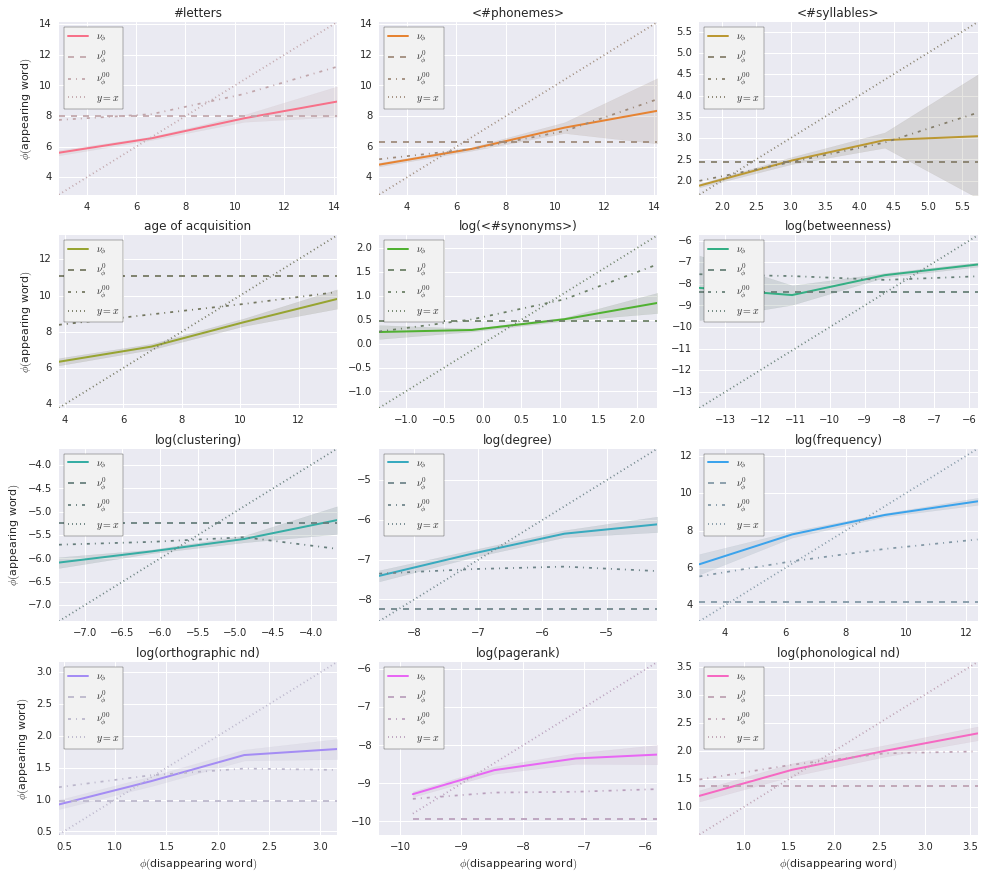

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

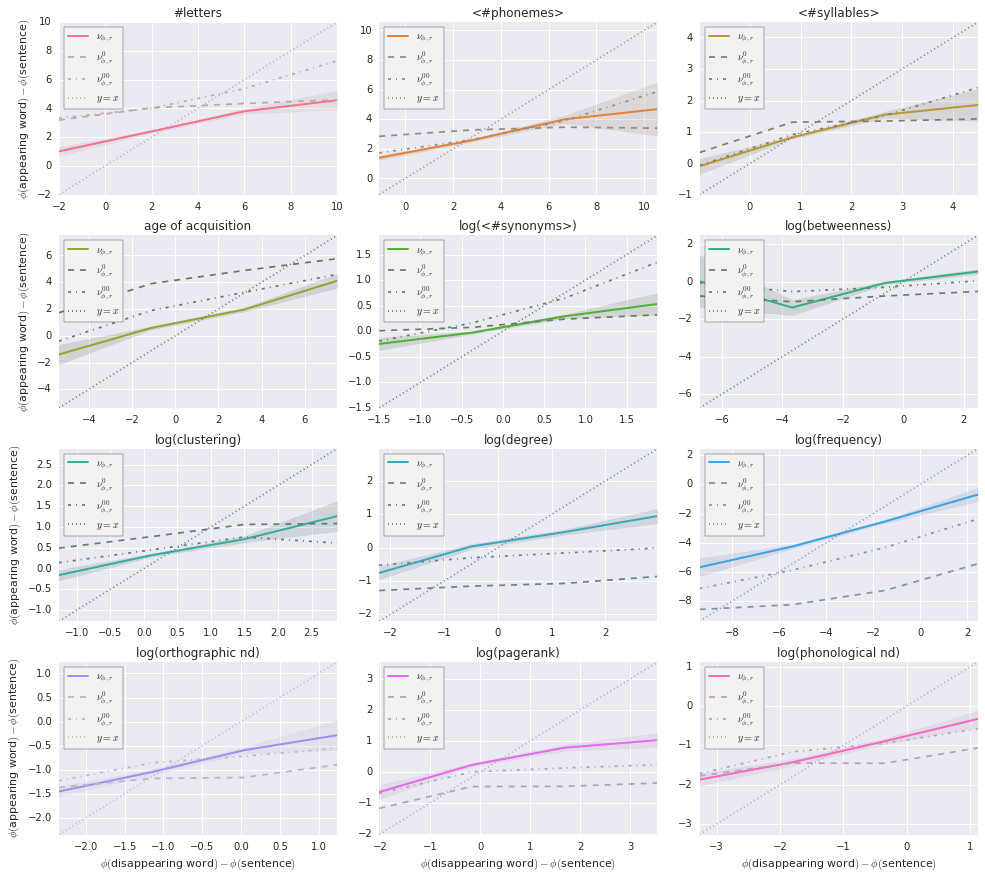

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

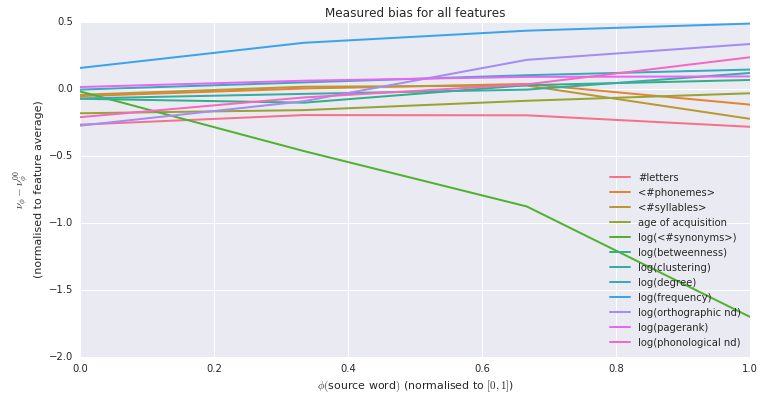

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

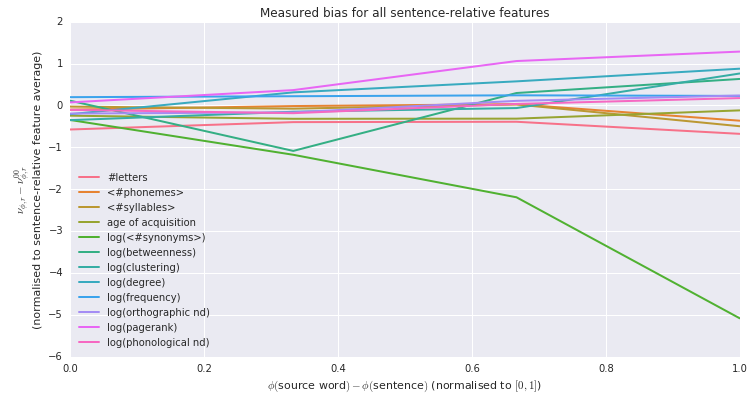

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

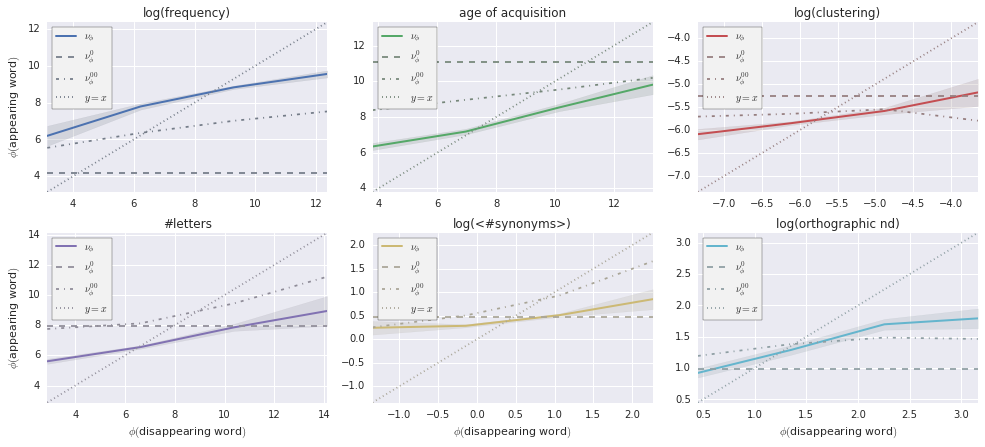

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

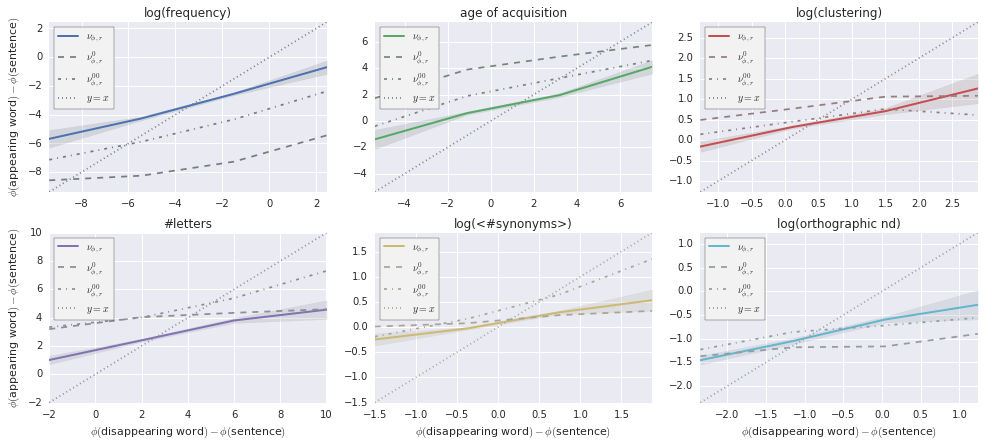

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Now $\nu_{\phi} - \nu_{\phi}^{00}$

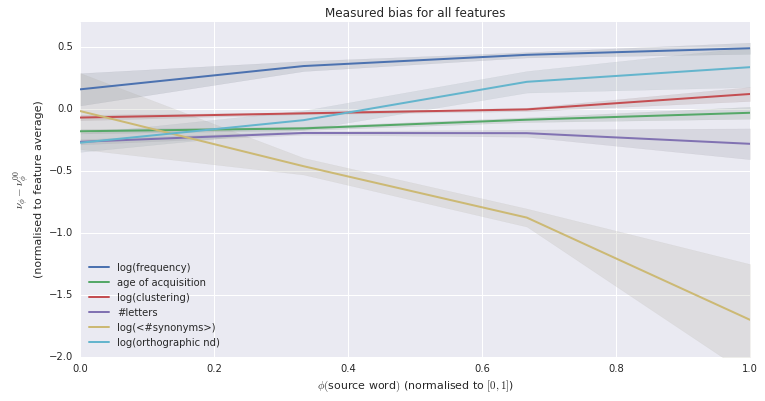

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

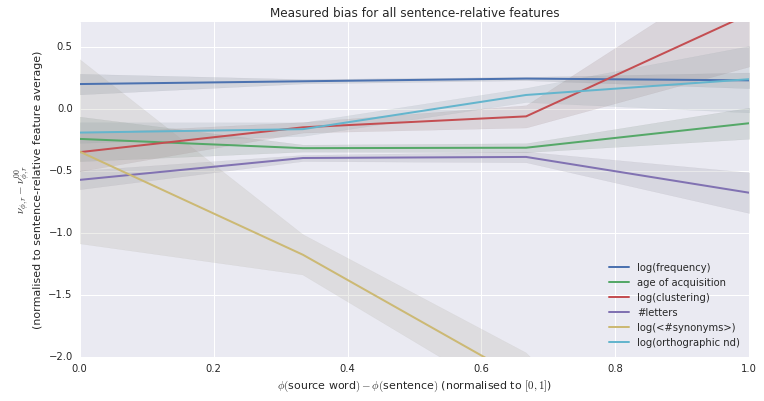

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature].dropna(),
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


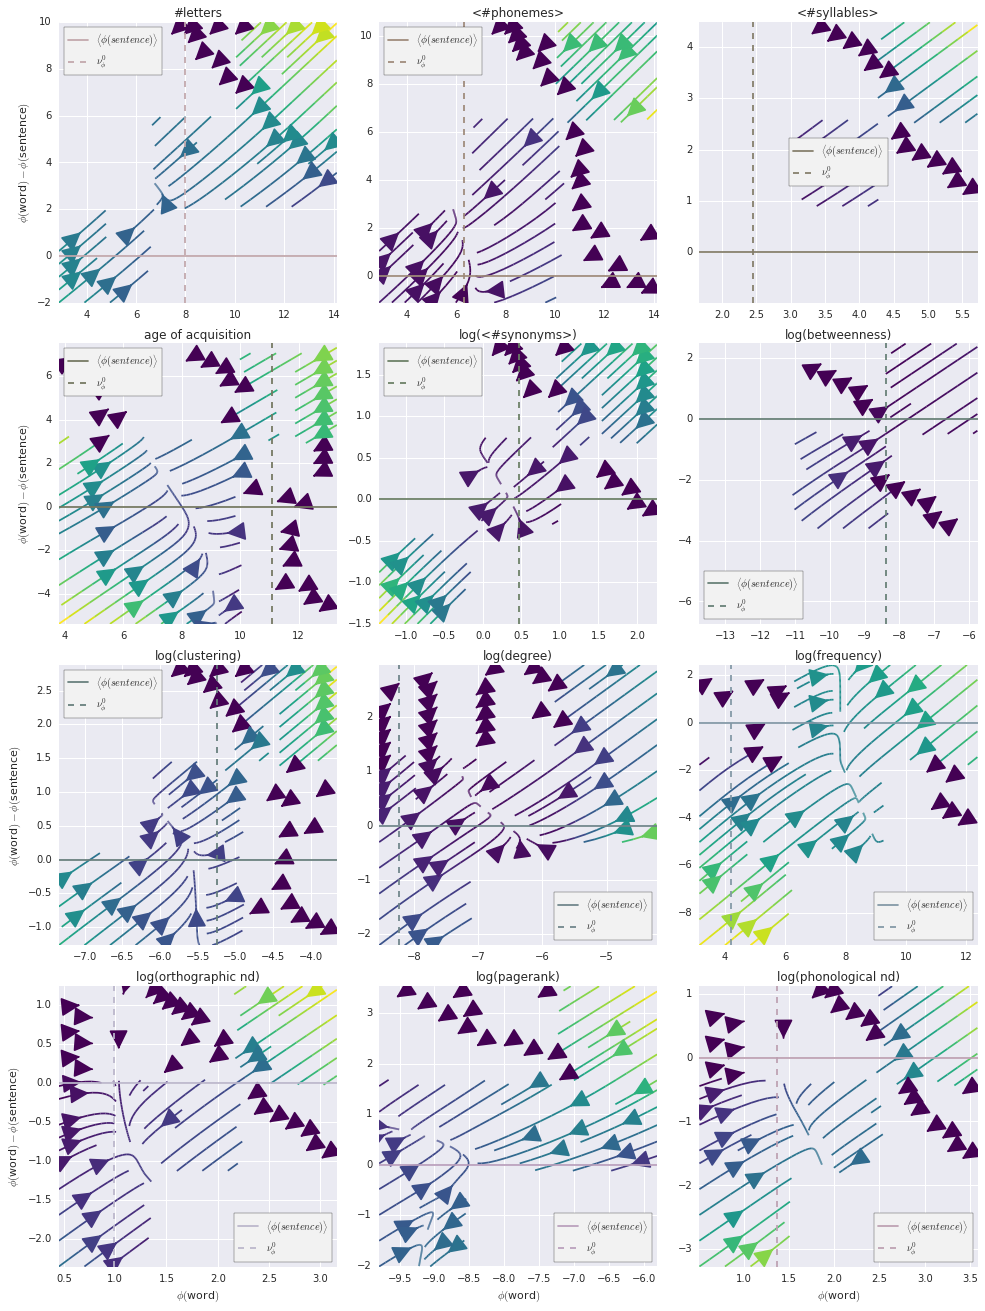

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


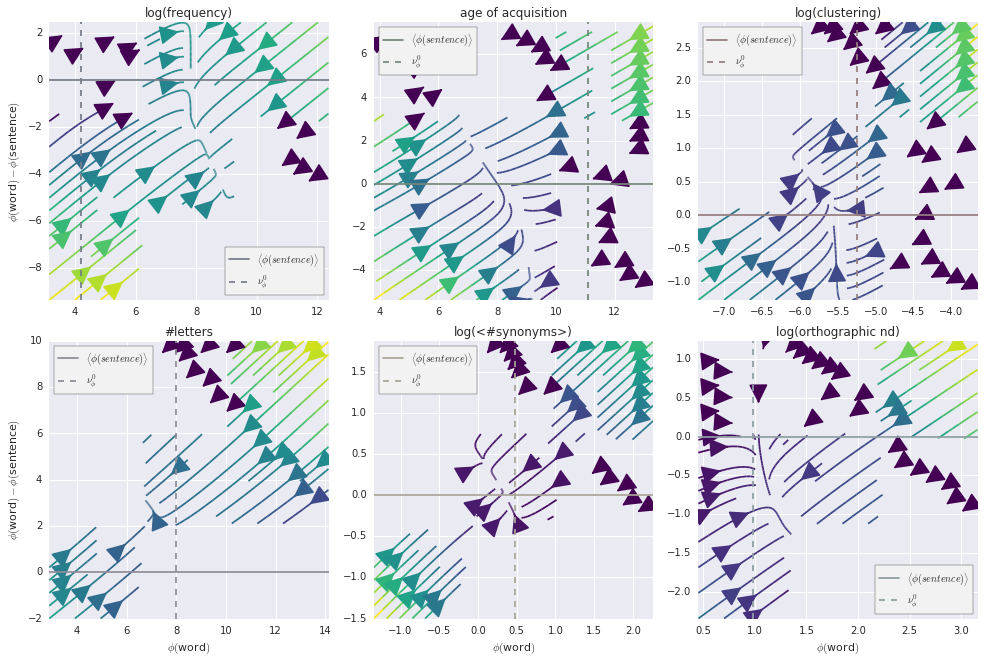

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 10 components.

Those explain the following variance:
[ 0.54636459  0.16197764  0.08083071  0.07306927  0.03380621  0.03033795
  0.01867138  0.01804258  0.01527629  0.00882778]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographic_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,-0.465250,0.258764,-0.079623,0.241213,0.228382,-0.445325,0.204884,0.271081,-0.426589,0.274676,-0.169312,0.005843
Component-1,0.325445,-0.388062,0.145290,-0.301035,-0.300415,-0.430146,0.147211,-0.295810,-0.428429,0.189584,-0.166685,0.005945
Component-2,0.803031,0.449247,-0.144247,0.186344,0.210058,-0.122836,0.022912,0.155926,-0.055817,0.097654,-0.004989,-0.032544


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (     1 of 118071) |       | Elapsed Time: 0:18:27 ETA:  1513 days, 4:43:13

  0% (     2 of 118071) |         | Elapsed Time: 0:18:30 ETA:  3 days, 16:08:44

  0% (    16 of 118071) |                  | Elapsed Time: 0:18:31 ETA:  7:46:54

  0% (    25 of 118071) |                  | Elapsed Time: 0:18:32 ETA:  6:08:29

  0% (    36 of 118071) |                  | Elapsed Time: 0:18:33 ETA:  5:05:38

  0% (    49 of 118071) |                  | Elapsed Time: 0:18:34 ETA:  4:19:25

  0% (    62 of 118071) |                  | Elapsed Time: 0:18:35 ETA:  3:52:32

  0% (    74 of 118071) |                  | Elapsed Time: 0:18:36 ETA:  3:40:40

  0% (    85 of 118071) |                  | Elapsed Time: 0:18:37 ETA:  3:33:00

  0% (    97 of 118071) |                  | Elapsed Time: 0:18:38 ETA:  3:24:41

  0% (   108 of 118071) |                  | Elapsed Time: 0:18:39 ETA:  2:33:31

  0% (   120 of 118071) |                  | Elapsed Time: 0:18:40 ETA:  2:39:10

  0% (   131 of 118071) |                  | Elapsed Time: 0:18:41 ETA:  2:36:54

  0% (   144 of 118071) |                  | Elapsed Time: 0:18:42 ETA:  2:33:52

  0% (   157 of 118071) |                  | Elapsed Time: 0:18:43 ETA:  2:35:20

  0% (   171 of 118071) |                  | Elapsed Time: 0:18:44 ETA:  2:35:11

  0% (   188 of 118071) |                  | Elapsed Time: 0:18:45 ETA:  2:26:52

  0% (   200 of 118071) |                  | Elapsed Time: 0:18:46 ETA:  2:27:01

  0% (   212 of 118071) |                  | Elapsed Time: 0:18:47 ETA:  2:27:57

  0% (   227 of 118071) |                  | Elapsed Time: 0:18:48 ETA:  2:21:30

  0% (   241 of 118071) |                  | Elapsed Time: 0:18:50 ETA:  2:18:04

  0% (   254 of 118071) |                  | Elapsed Time: 0:18:51 ETA:  2:14:23

  0% (   269 of 118071) |                  | Elapsed Time: 0:18:52 ETA:  2:11:01

  0% (   284 of 118071) |                  | Elapsed Time: 0:18:53 ETA:  2:07:22

  0% (   300 of 118071) |                  | Elapsed Time: 0:18:54 ETA:  2:03:48

  0% (   307 of 118071) |                  | Elapsed Time: 0:18:55 ETA:  2:15:39

  0% (   314 of 118071) |                  | Elapsed Time: 0:18:56 ETA:  2:21:43

  0% (   324 of 118071) |                  | Elapsed Time: 0:18:57 ETA:  2:23:53

  0% (   334 of 118071) |                  | Elapsed Time: 0:18:58 ETA:  2:31:44

  0% (   346 of 118071) |                  | Elapsed Time: 0:18:59 ETA:  2:34:51

  0% (   356 of 118071) |                  | Elapsed Time: 0:19:00 ETA:  2:40:12

  0% (   366 of 118071) |                  | Elapsed Time: 0:19:01 ETA:  2:52:44

  0% (   378 of 118071) |                  | Elapsed Time: 0:19:02 ETA:  2:59:06

  0% (   389 of 118071) |                  | Elapsed Time: 0:19:03 ETA:  3:10:55

  0% (   398 of 118071) |                  | Elapsed Time: 0:19:04 ETA:  3:05:32

  0% (   417 of 118071) |                  | Elapsed Time: 0:19:05 ETA:  2:40:55

  0% (   447 of 118071) |                  | Elapsed Time: 0:19:06 ETA:  2:11:25

  0% (   480 of 118071) |                  | Elapsed Time: 0:19:07 ETA:  1:47:23

  0% (   494 of 118071) |                  | Elapsed Time: 0:19:08 ETA:  1:44:43

  0% (   512 of 118071) |                  | Elapsed Time: 0:19:09 ETA:  1:38:17

  0% (   533 of 118071) |                  | Elapsed Time: 0:19:10 ETA:  1:29:28

  0% (   553 of 118071) |                  | Elapsed Time: 0:19:11 ETA:  1:24:19

  0% (   564 of 118071) |                  | Elapsed Time: 0:19:12 ETA:  1:25:01

  0% (   584 of 118071) |                  | Elapsed Time: 0:19:13 ETA:  1:18:57

  0% (   604 of 118071) |                  | Elapsed Time: 0:19:14 ETA:  1:18:22

  0% (   620 of 118071) |                  | Elapsed Time: 0:19:15 ETA:  1:26:46

  0% (   640 of 118071) |                  | Elapsed Time: 0:19:16 ETA:  1:35:14

  0% (   661 of 118071) |                  | Elapsed Time: 0:19:17 ETA:  1:30:36

  0% (   679 of 118071) |                  | Elapsed Time: 0:19:19 ETA:  1:30:48

  0% (   697 of 118071) |                  | Elapsed Time: 0:19:20 ETA:  1:32:00

  0% (   718 of 118071) |                  | Elapsed Time: 0:19:21 ETA:  1:31:11

  0% (   738 of 118071) |                  | Elapsed Time: 0:19:22 ETA:  1:24:41

  0% (   757 of 118071) |                  | Elapsed Time: 0:19:23 ETA:  1:25:09

  0% (   774 of 118071) |                  | Elapsed Time: 0:19:24 ETA:  1:26:52

  0% (   791 of 118071) |                  | Elapsed Time: 0:19:25 ETA:  1:25:43

  0% (   810 of 118071) |                  | Elapsed Time: 0:19:26 ETA:  1:26:37

  0% (   835 of 118071) |                  | Elapsed Time: 0:19:27 ETA:  1:24:49

  0% (   856 of 118071) |                  | Elapsed Time: 0:19:28 ETA:  1:22:56

  0% (   873 of 118071) |                  | Elapsed Time: 0:19:29 ETA:  1:23:33

  0% (   894 of 118071) |                  | Elapsed Time: 0:19:30 ETA:  1:24:02

  0% (   916 of 118071) |                  | Elapsed Time: 0:19:31 ETA:  1:22:55

  0% (   934 of 118071) |                  | Elapsed Time: 0:19:32 ETA:  1:24:45

  0% (   947 of 118071) |                  | Elapsed Time: 0:19:33 ETA:  1:27:11

  0% (   967 of 118071) |                  | Elapsed Time: 0:19:34 ETA:  1:25:37

  0% (   987 of 118071) |                  | Elapsed Time: 0:19:35 ETA:  1:25:03

  0% (  1007 of 118071) |                  | Elapsed Time: 0:19:36 ETA:  1:27:24

  0% (  1025 of 118071) |                  | Elapsed Time: 0:19:37 ETA:  1:29:13

  0% (  1045 of 118071) |                  | Elapsed Time: 0:19:38 ETA:  1:27:12

  0% (  1065 of 118071) |                  | Elapsed Time: 0:19:39 ETA:  1:27:44

  0% (  1087 of 118071) |                  | Elapsed Time: 0:19:40 ETA:  1:27:43

  0% (  1108 of 118071) |                  | Elapsed Time: 0:19:41 ETA:  1:24:33

  0% (  1129 of 118071) |                  | Elapsed Time: 0:19:42 ETA:  1:20:24

  0% (  1152 of 118071) |                  | Elapsed Time: 0:19:43 ETA:  1:18:24

  0% (  1169 of 118071) |                  | Elapsed Time: 0:19:44 ETA:  1:20:22

  1% (  1189 of 118071) |                  | Elapsed Time: 0:19:45 ETA:  1:21:52

  1% (  1212 of 118071) |                  | Elapsed Time: 0:19:46 ETA:  1:19:06

  1% (  1236 of 118071) |                  | Elapsed Time: 0:19:47 ETA:  1:17:17

  1% (  1262 of 118071) |                  | Elapsed Time: 0:19:49 ETA:  1:14:21

  1% (  1290 of 118071) |                  | Elapsed Time: 0:19:50 ETA:  1:11:35

  1% (  1312 of 118071) |                  | Elapsed Time: 0:19:51 ETA:  1:11:16

  1% (  1337 of 118071) |                  | Elapsed Time: 0:19:52 ETA:  1:09:33

  1% (  1352 of 118071) |                  | Elapsed Time: 0:19:53 ETA:  1:13:15

  1% (  1377 of 118071) |                  | Elapsed Time: 0:19:54 ETA:  1:09:19

  1% (  1393 of 118071) |                  | Elapsed Time: 0:19:55 ETA:  1:09:37

  1% (  1411 of 118071) |                  | Elapsed Time: 0:19:56 ETA:  1:12:13

  1% (  1433 of 118071) |                  | Elapsed Time: 0:19:57 ETA:  1:13:13

  1% (  1454 of 118071) |                  | Elapsed Time: 0:19:58 ETA:  1:15:19

  1% (  1476 of 118071) |                  | Elapsed Time: 0:19:59 ETA:  1:20:39

  1% (  1498 of 118071) |                  | Elapsed Time: 0:20:00 ETA:  1:21:48

  1% (  1520 of 118071) |                  | Elapsed Time: 0:20:01 ETA:  1:17:46

  1% (  1543 of 118071) |                  | Elapsed Time: 0:20:02 ETA:  1:19:23

  1% (  1566 of 118071) |                  | Elapsed Time: 0:20:03 ETA:  1:15:31

  1% (  1595 of 118071) |                  | Elapsed Time: 0:20:04 ETA:  1:09:26

  1% (  1628 of 118071) |                  | Elapsed Time: 0:20:05 ETA:  1:04:02

  1% (  1646 of 118071) |                  | Elapsed Time: 0:20:06 ETA:  1:05:18

  1% (  1677 of 118071) |                  | Elapsed Time: 0:20:07 ETA:  1:00:21

  1% (  1707 of 118071) |                  | Elapsed Time: 0:20:08 ETA:  0:58:22

  1% (  1731 of 118071) |                  | Elapsed Time: 0:20:09 ETA:  0:57:54

  1% (  1758 of 118071) |                  | Elapsed Time: 0:20:10 ETA:  0:56:21

  1% (  1786 of 118071) |                  | Elapsed Time: 0:20:11 ETA:  0:54:10

  1% (  1810 of 118071) |                  | Elapsed Time: 0:20:12 ETA:  0:53:49

  1% (  1823 of 118071) |                  | Elapsed Time: 0:20:13 ETA:  0:59:44

  1% (  1847 of 118071) |                  | Elapsed Time: 0:20:14 ETA:  1:03:06

  1% (  1876 of 118071) |                  | Elapsed Time: 0:20:16 ETA:  0:59:34

  1% (  1903 of 118071) |                  | Elapsed Time: 0:20:17 ETA:  1:00:44

  1% (  1918 of 118071) |                  | Elapsed Time: 0:20:18 ETA:  1:07:21

  1% (  1926 of 118071) |                  | Elapsed Time: 0:20:19 ETA:  1:15:03

  1% (  1940 of 118071) |                  | Elapsed Time: 0:20:20 ETA:  1:21:35

  1% (  1956 of 118071) |                  | Elapsed Time: 0:20:21 ETA:  1:29:04

  1% (  1972 of 118071) |                  | Elapsed Time: 0:20:22 ETA:  1:34:13

  1% (  1997 of 118071) |                  | Elapsed Time: 0:20:23 ETA:  1:25:39

  1% (  2015 of 118071) |                  | Elapsed Time: 0:20:24 ETA:  1:29:25

  1% (  2035 of 118071) |                  | Elapsed Time: 0:20:25 ETA:  1:34:59

  1% (  2054 of 118071) |                  | Elapsed Time: 0:20:26 ETA:  1:41:31

  1% (  2067 of 118071) |                  | Elapsed Time: 0:20:27 ETA:  1:42:39

  1% (  2086 of 118071) |                  | Elapsed Time: 0:20:28 ETA:  1:33:26

  1% (  2102 of 118071) |                  | Elapsed Time: 0:20:29 ETA:  1:31:59

  1% (  2117 of 118071) |                  | Elapsed Time: 0:20:30 ETA:  1:32:28

  1% (  2140 of 118071) |                  | Elapsed Time: 0:20:31 ETA:  1:27:45

  1% (  2156 of 118071) |                  | Elapsed Time: 0:20:32 ETA:  1:34:59

  1% (  2175 of 118071) |                  | Elapsed Time: 0:20:33 ETA:  1:34:20

  1% (  2196 of 118071) |                  | Elapsed Time: 0:20:34 ETA:  1:33:40

  1% (  2219 of 118071) |                  | Elapsed Time: 0:20:35 ETA:  1:31:01

  1% (  2239 of 118071) |                  | Elapsed Time: 0:20:36 ETA:  1:26:20

  1% (  2262 of 118071) |                  | Elapsed Time: 0:20:37 ETA:  1:23:56

  1% (  2287 of 118071) |                  | Elapsed Time: 0:20:38 ETA:  1:18:54

  1% (  2313 of 118071) |                  | Elapsed Time: 0:20:39 ETA:  1:13:13

  1% (  2337 of 118071) |                  | Elapsed Time: 0:20:40 ETA:  1:13:08

  1% (  2356 of 118071) |                  | Elapsed Time: 0:20:41 ETA:  1:10:21

  2% (  2375 of 118071) |                  | Elapsed Time: 0:20:42 ETA:  1:10:25

  2% (  2386 of 118071) |                  | Elapsed Time: 0:20:43 ETA:  1:15:13

  2% (  2403 of 118071) |                  | Elapsed Time: 0:20:44 ETA:  1:18:08

  2% (  2418 of 118071) |                  | Elapsed Time: 0:20:46 ETA:  1:21:09

  2% (  2434 of 118071) |                  | Elapsed Time: 0:20:47 ETA:  1:24:56

  2% (  2448 of 118071) |                  | Elapsed Time: 0:20:48 ETA:  1:32:12

  2% (  2462 of 118071) |                  | Elapsed Time: 0:20:49 ETA:  1:41:18

  2% (  2481 of 118071) |                  | Elapsed Time: 0:20:50 ETA:  1:46:21

  2% (  2497 of 118071) |                  | Elapsed Time: 0:20:51 ETA:  1:49:28

  2% (  2513 of 118071) |                  | Elapsed Time: 0:20:52 ETA:  1:52:10

  2% (  2561 of 118071) |                  | Elapsed Time: 0:20:53 ETA:  1:23:45

  2% (  2643 of 118071) |                  | Elapsed Time: 0:20:54 ETA:  0:55:12

  2% (  2726 of 118071) |                  | Elapsed Time: 0:20:55 ETA:  0:37:57

  2% (  2804 of 118071) |                  | Elapsed Time: 0:20:56 ETA:  0:28:11

  2% (  2885 of 118071) |                  | Elapsed Time: 0:20:57 ETA:  0:20:30

  2% (  2929 of 118071) |                  | Elapsed Time: 0:20:58 ETA:  0:17:53

  2% (  2952 of 118071) |                  | Elapsed Time: 0:20:58 ETA:  0:14:28

  2% (  3025 of 118071) |                  | Elapsed Time: 0:20:59 ETA:  0:10:34

  2% (  3112 of 118071) |                  | Elapsed Time: 0:21:00 ETA:  0:06:47

  2% (  3165 of 118071) |                  | Elapsed Time: 0:21:01 ETA:  0:06:33

  2% (  3252 of 118071) |                  | Elapsed Time: 0:21:02 ETA:  0:06:18

  2% (  3347 of 118071) |                  | Elapsed Time: 0:21:03 ETA:  0:05:44

  2% (  3449 of 118071) |                  | Elapsed Time: 0:21:04 ETA:  0:04:40

  3% (  3549 of 118071) |                  | Elapsed Time: 0:21:05 ETA:  0:03:57

  3% (  3638 of 118071) |                  | Elapsed Time: 0:21:06 ETA:  0:02:18

  3% (  3739 of 118071) |                  | Elapsed Time: 0:21:07 ETA:  0:01:33

  3% (  3840 of 118071) |                  | Elapsed Time: 0:21:08 ETA:  0:00:44

  3% (  3950 of 118071) |                  | Elapsed Time: 0:21:09 ETA:  0:00:06

  3% (  3998 of 118071) |                  | Elapsed Time: 0:21:10 ETA:  0:00:22

  3% (  4048 of 118071) |                  | Elapsed Time: 0:21:11 ETA:  0:01:20

  3% (  4132 of 118071) |                  | Elapsed Time: 0:21:12 ETA:  0:01:39

  3% (  4231 of 118071) |                  | Elapsed Time: 0:21:13 ETA:  0:01:44

  3% (  4343 of 118071) |                  | Elapsed Time: 0:21:14 ETA:  0:01:20

  3% (  4428 of 118071) |                  | Elapsed Time: 0:21:15 ETA:  0:00:48

  3% (  4535 of 118071) |                  | Elapsed Time: 0:21:16 ETA:  0:00:37

  3% (  4628 of 118071) |                  | Elapsed Time: 0:21:17 ETA:  0:00:49

  4% (  4740 of 118071) |                  | Elapsed Time: 0:21:18 ETA:  0:00:44

  4% (  4853 of 118071) |                  | Elapsed Time: 0:21:19 ETA:  0:00:00

  4% (  4967 of 118071) |                  | Elapsed Time: 0:21:20 ETA:  0:00:00

  4% (  5076 of 118071) |                  | Elapsed Time: 0:21:21 ETA:  0:00:00

  4% (  5199 of 118071) |                  | Elapsed Time: 0:21:22 ETA:  0:00:00

  4% (  5320 of 118071) |                  | Elapsed Time: 0:21:23 ETA:  0:00:00

  4% (  5441 of 118071) |                  | Elapsed Time: 0:21:24 ETA:  0:00:00

  4% (  5565 of 118071) |                  | Elapsed Time: 0:21:25 ETA:  0:00:00

  4% (  5684 of 118071) |                  | Elapsed Time: 0:21:26 ETA:  0:00:00

  4% (  5807 of 118071) |                  | Elapsed Time: 0:21:27 ETA:  0:00:00

  5% (  5904 of 118071) |                  | Elapsed Time: 0:21:28 ETA:  0:00:00

  5% (  6028 of 118071) |                  | Elapsed Time: 0:21:29 ETA:  0:00:00

  5% (  6124 of 118071) |                  | Elapsed Time: 0:21:30 ETA:  0:00:00

  5% (  6183 of 118071) |                  | Elapsed Time: 0:21:31 ETA:  0:00:00

  5% (  6240 of 118071) |                  | Elapsed Time: 0:21:32 ETA:  0:00:00

  5% (  6296 of 118071) |                  | Elapsed Time: 0:21:33 ETA:  0:00:00

  5% (  6354 of 118071) |                  | Elapsed Time: 0:21:34 ETA:  0:00:23

  5% (  6411 of 118071) |                  | Elapsed Time: 0:21:35 ETA:  0:02:13

  5% (  6470 of 118071) |                  | Elapsed Time: 0:21:36 ETA:  0:04:31

  5% (  6533 of 118071) |                  | Elapsed Time: 0:21:37 ETA:  0:06:41

  5% (  6591 of 118071) |#                 | Elapsed Time: 0:21:38 ETA:  0:10:01

  5% (  6649 of 118071) |#                 | Elapsed Time: 0:21:39 ETA:  0:12:18

  5% (  6710 of 118071) |#                 | Elapsed Time: 0:21:40 ETA:  0:12:10

  5% (  6770 of 118071) |#                 | Elapsed Time: 0:21:41 ETA:  0:11:57

  5% (  6825 of 118071) |#                 | Elapsed Time: 0:21:42 ETA:  0:11:59

  5% (  6892 of 118071) |#                 | Elapsed Time: 0:21:43 ETA:  0:11:22

  5% (  6942 of 118071) |#                 | Elapsed Time: 0:21:44 ETA:  0:11:48

  5% (  7060 of 118071) |#                 | Elapsed Time: 0:21:45 ETA:  0:08:25

  6% (  7183 of 118071) |#                 | Elapsed Time: 0:21:46 ETA:  0:05:37

  6% (  7298 of 118071) |#                 | Elapsed Time: 0:21:47 ETA:  0:03:21

  6% (  7380 of 118071) |#                 | Elapsed Time: 0:21:48 ETA:  0:01:53

  6% (  7496 of 118071) |#                 | Elapsed Time: 0:21:49 ETA:  0:00:11

  6% (  7614 of 118071) |#                 | Elapsed Time: 0:21:50 ETA:  0:00:00

  6% (  7737 of 118071) |#                 | Elapsed Time: 0:21:51 ETA:  0:00:00

  6% (  7849 of 118071) |#                 | Elapsed Time: 0:21:52 ETA:  0:00:00

  6% (  7959 of 118071) |#                 | Elapsed Time: 0:21:53 ETA:  0:00:00

  6% (  8084 of 118071) |#                 | Elapsed Time: 0:21:54 ETA:  0:00:00

  6% (  8206 of 118071) |#                 | Elapsed Time: 0:21:55 ETA:  0:00:00

  7% (  8321 of 118071) |#                 | Elapsed Time: 0:21:56 ETA:  0:00:00

  7% (  8448 of 118071) |#                 | Elapsed Time: 0:21:57 ETA:  0:00:00

  7% (  8574 of 118071) |#                 | Elapsed Time: 0:21:58 ETA:  0:00:00

  7% (  8696 of 118071) |#                 | Elapsed Time: 0:21:59 ETA:  0:00:00

  7% (  8826 of 118071) |#                 | Elapsed Time: 0:22:00 ETA:  0:00:00

  7% (  8856 of 118071) |#                 | Elapsed Time: 0:22:00 ETA:  0:00:00

  7% (  8980 of 118071) |#                 | Elapsed Time: 0:22:01 ETA:  0:00:00

  7% (  9105 of 118071) |#                 | Elapsed Time: 0:22:02 ETA:  0:00:00

  7% (  9229 of 118071) |#                 | Elapsed Time: 0:22:03 ETA:  0:00:00

  7% (  9352 of 118071) |#                 | Elapsed Time: 0:22:04 ETA:  0:00:00

  8% (  9476 of 118071) |#                 | Elapsed Time: 0:22:05 ETA:  0:00:00

  8% (  9599 of 118071) |#                 | Elapsed Time: 0:22:06 ETA:  0:00:00

  8% (  9701 of 118071) |#                 | Elapsed Time: 0:22:07 ETA:  0:00:00

  8% (  9796 of 118071) |#                 | Elapsed Time: 0:22:08 ETA:  0:00:00

  8% (  9884 of 118071) |#                 | Elapsed Time: 0:22:09 ETA:  0:00:00

  8% (  9974 of 118071) |#                 | Elapsed Time: 0:22:10 ETA:  0:00:00

  8% ( 10066 of 118071) |#                 | Elapsed Time: 0:22:11 ETA:  0:00:00

  8% ( 10124 of 118071) |#                 | Elapsed Time: 0:22:12 ETA:  0:00:00

  8% ( 10173 of 118071) |#                 | Elapsed Time: 0:22:13 ETA:  0:00:00

  8% ( 10303 of 118071) |#                 | Elapsed Time: 0:22:14 ETA:  0:00:00

  8% ( 10332 of 118071) |#                 | Elapsed Time: 0:22:14 ETA:  0:00:00

  8% ( 10466 of 118071) |#                 | Elapsed Time: 0:22:15 ETA:  0:00:00

  8% ( 10584 of 118071) |#                 | Elapsed Time: 0:22:16 ETA:  0:00:00

  9% ( 10702 of 118071) |#                 | Elapsed Time: 0:22:17 ETA:  0:00:00

  9% ( 10824 of 118071) |#                 | Elapsed Time: 0:22:18 ETA:  0:00:00

  9% ( 10941 of 118071) |#                 | Elapsed Time: 0:22:19 ETA:  0:00:00

  9% ( 11050 of 118071) |#                 | Elapsed Time: 0:22:20 ETA:  0:00:00

  9% ( 11162 of 118071) |#                 | Elapsed Time: 0:22:21 ETA:  0:00:00

  9% ( 11231 of 118071) |#                 | Elapsed Time: 0:22:22 ETA:  0:00:00

  9% ( 11282 of 118071) |#                 | Elapsed Time: 0:22:23 ETA:  0:00:00

  9% ( 11424 of 118071) |#                 | Elapsed Time: 0:22:24 ETA:  0:00:00

  9% ( 11494 of 118071) |#                 | Elapsed Time: 0:22:26 ETA:  0:00:00

  9% ( 11551 of 118071) |#                 | Elapsed Time: 0:22:27 ETA:  0:00:00

  9% ( 11611 of 118071) |#                 | Elapsed Time: 0:22:28 ETA:  0:00:10

  9% ( 11690 of 118071) |#                 | Elapsed Time: 0:22:29 ETA:  0:01:20

  9% ( 11747 of 118071) |#                 | Elapsed Time: 0:22:30 ETA:  0:03:05

 10% ( 11808 of 118071) |#                 | Elapsed Time: 0:22:30 ETA:  0:03:30

 10% ( 11923 of 118071) |#                 | Elapsed Time: 0:22:31 ETA:  0:01:45

 10% ( 12031 of 118071) |#                 | Elapsed Time: 0:22:32 ETA:  0:00:00

 10% ( 12119 of 118071) |#                 | Elapsed Time: 0:22:33 ETA:  0:01:39

 10% ( 12203 of 118071) |#                 | Elapsed Time: 0:22:34 ETA:  0:01:09

 10% ( 12281 of 118071) |#                 | Elapsed Time: 0:22:35 ETA:  0:00:26

 10% ( 12371 of 118071) |#                 | Elapsed Time: 0:22:36 ETA:  0:00:00

 10% ( 12460 of 118071) |#                 | Elapsed Time: 0:22:37 ETA:  0:00:00

 10% ( 12544 of 118071) |#                 | Elapsed Time: 0:22:38 ETA:  0:00:00

 10% ( 12670 of 118071) |#                 | Elapsed Time: 0:22:39 ETA:  0:00:00

 10% ( 12822 of 118071) |#                 | Elapsed Time: 0:22:40 ETA:  0:00:00

 10% ( 12932 of 118071) |#                 | Elapsed Time: 0:22:41 ETA:  0:00:00

 11% ( 13047 of 118071) |#                 | Elapsed Time: 0:22:42 ETA:  0:00:00

 11% ( 13154 of 118071) |##                | Elapsed Time: 0:22:43 ETA:  0:00:00

 11% ( 13239 of 118071) |##                | Elapsed Time: 0:22:44 ETA:  0:00:00

 11% ( 13283 of 118071) |##                | Elapsed Time: 0:22:45 ETA:  0:00:00

 11% ( 13368 of 118071) |##                | Elapsed Time: 0:22:46 ETA:  0:00:00

 11% ( 13462 of 118071) |##                | Elapsed Time: 0:22:47 ETA:  0:00:00

 11% ( 13554 of 118071) |##                | Elapsed Time: 0:22:48 ETA:  0:00:00

 11% ( 13643 of 118071) |##                | Elapsed Time: 0:22:49 ETA:  0:00:00

 11% ( 13738 of 118071) |##                | Elapsed Time: 0:22:50 ETA:  0:00:00

 11% ( 13830 of 118071) |##                | Elapsed Time: 0:22:51 ETA:  0:00:00

 11% ( 13920 of 118071) |##                | Elapsed Time: 0:22:52 ETA:  0:00:00

 11% ( 14011 of 118071) |##                | Elapsed Time: 0:22:53 ETA:  0:00:00

 11% ( 14104 of 118071) |##                | Elapsed Time: 0:22:54 ETA:  0:00:00

 12% ( 14193 of 118071) |##                | Elapsed Time: 0:22:55 ETA:  0:00:00

 12% ( 14281 of 118071) |##                | Elapsed Time: 0:22:56 ETA:  0:00:00

 12% ( 14373 of 118071) |##                | Elapsed Time: 0:22:57 ETA:  0:00:00

 12% ( 14469 of 118071) |##                | Elapsed Time: 0:22:58 ETA:  0:00:00

 12% ( 14557 of 118071) |##                | Elapsed Time: 0:22:59 ETA:  0:00:00

 12% ( 14654 of 118071) |##                | Elapsed Time: 0:23:00 ETA:  0:00:00

 12% ( 14759 of 118071) |##                | Elapsed Time: 0:23:01 ETA:  0:00:00

 12% ( 14852 of 118071) |##                | Elapsed Time: 0:23:02 ETA:  0:00:00

 12% ( 14947 of 118071) |##                | Elapsed Time: 0:23:03 ETA:  0:00:00

 12% ( 15045 of 118071) |##                | Elapsed Time: 0:23:04 ETA:  0:00:00

 12% ( 15134 of 118071) |##                | Elapsed Time: 0:23:05 ETA:  0:00:00

 12% ( 15227 of 118071) |##                | Elapsed Time: 0:23:06 ETA:  0:00:00

 12% ( 15322 of 118071) |##                | Elapsed Time: 0:23:07 ETA:  0:00:00

 13% ( 15419 of 118071) |##                | Elapsed Time: 0:23:08 ETA:  0:00:00

 13% ( 15513 of 118071) |##                | Elapsed Time: 0:23:09 ETA:  0:00:00

 13% ( 15611 of 118071) |##                | Elapsed Time: 0:23:10 ETA:  0:00:00

 13% ( 15699 of 118071) |##                | Elapsed Time: 0:23:11 ETA:  0:00:00

 13% ( 15791 of 118071) |##                | Elapsed Time: 0:23:12 ETA:  0:00:00

 13% ( 15887 of 118071) |##                | Elapsed Time: 0:23:13 ETA:  0:00:00

 13% ( 15982 of 118071) |##                | Elapsed Time: 0:23:14 ETA:  0:00:00

 13% ( 16078 of 118071) |##                | Elapsed Time: 0:23:15 ETA:  0:00:00

 13% ( 16173 of 118071) |##                | Elapsed Time: 0:23:16 ETA:  0:00:00

 13% ( 16235 of 118071) |##                | Elapsed Time: 0:23:17 ETA:  0:00:00

 13% ( 16328 of 118071) |##                | Elapsed Time: 0:23:18 ETA:  0:00:00

 13% ( 16422 of 118071) |##                | Elapsed Time: 0:23:19 ETA:  0:00:00

 13% ( 16523 of 118071) |##                | Elapsed Time: 0:23:20 ETA:  0:00:00

 14% ( 16631 of 118071) |##                | Elapsed Time: 0:23:21 ETA:  0:00:00

 14% ( 16748 of 118071) |##                | Elapsed Time: 0:23:22 ETA:  0:00:00

 14% ( 16849 of 118071) |##                | Elapsed Time: 0:23:23 ETA:  0:00:00

 14% ( 16946 of 118071) |##                | Elapsed Time: 0:23:24 ETA:  0:00:00

 14% ( 17051 of 118071) |##                | Elapsed Time: 0:23:25 ETA:  0:00:00

 14% ( 17162 of 118071) |##                | Elapsed Time: 0:23:26 ETA:  0:00:00

 14% ( 17273 of 118071) |##                | Elapsed Time: 0:23:27 ETA:  0:00:00

 14% ( 17397 of 118071) |##                | Elapsed Time: 0:23:28 ETA:  0:00:00

 14% ( 17516 of 118071) |##                | Elapsed Time: 0:23:29 ETA:  0:00:00

 14% ( 17621 of 118071) |##                | Elapsed Time: 0:23:30 ETA:  0:00:00

 15% ( 17711 of 118071) |##                | Elapsed Time: 0:23:30 ETA:  0:00:00

 15% ( 17808 of 118071) |##                | Elapsed Time: 0:23:31 ETA:  0:00:00

 15% ( 17911 of 118071) |##                | Elapsed Time: 0:23:32 ETA:  0:00:00

 15% ( 18009 of 118071) |##                | Elapsed Time: 0:23:33 ETA:  0:00:00

 15% ( 18087 of 118071) |##                | Elapsed Time: 0:23:34 ETA:  0:00:00

 15% ( 18173 of 118071) |##                | Elapsed Time: 0:23:35 ETA:  0:00:00

 15% ( 18289 of 118071) |##                | Elapsed Time: 0:23:36 ETA:  0:00:00

 15% ( 18407 of 118071) |##                | Elapsed Time: 0:23:37 ETA:  0:00:00

 15% ( 18524 of 118071) |##                | Elapsed Time: 0:23:38 ETA:  0:00:00

 15% ( 18653 of 118071) |##                | Elapsed Time: 0:23:39 ETA:  0:00:00

 15% ( 18787 of 118071) |##                | Elapsed Time: 0:23:40 ETA:  0:00:00

 16% ( 18928 of 118071) |##                | Elapsed Time: 0:23:41 ETA:  0:00:00

 16% ( 19069 of 118071) |##                | Elapsed Time: 0:23:42 ETA:  0:00:00

 16% ( 19187 of 118071) |##                | Elapsed Time: 0:23:43 ETA:  0:00:00

 16% ( 19323 of 118071) |##                | Elapsed Time: 0:23:44 ETA:  0:00:00

 16% ( 19459 of 118071) |##                | Elapsed Time: 0:23:45 ETA:  0:00:00

 16% ( 19562 of 118071) |##                | Elapsed Time: 0:23:46 ETA:  0:00:00

 16% ( 19680 of 118071) |###               | Elapsed Time: 0:23:47 ETA:  0:00:00

 16% ( 19791 of 118071) |###               | Elapsed Time: 0:23:48 ETA:  0:00:00

 16% ( 19904 of 118071) |###               | Elapsed Time: 0:23:49 ETA:  0:00:00

 16% ( 20024 of 118071) |###               | Elapsed Time: 0:23:50 ETA:  0:00:00

 17% ( 20140 of 118071) |###               | Elapsed Time: 0:23:51 ETA:  0:00:00

 17% ( 20258 of 118071) |###               | Elapsed Time: 0:23:52 ETA:  0:00:00

 17% ( 20369 of 118071) |###               | Elapsed Time: 0:23:53 ETA:  0:00:00

 17% ( 20475 of 118071) |###               | Elapsed Time: 0:23:54 ETA:  0:00:00

 17% ( 20579 of 118071) |###               | Elapsed Time: 0:23:55 ETA:  0:00:00

 17% ( 20663 of 118071) |###               | Elapsed Time: 0:23:56 ETA:  0:00:00

 17% ( 20769 of 118071) |###               | Elapsed Time: 0:23:57 ETA:  0:00:00

 17% ( 20873 of 118071) |###               | Elapsed Time: 0:23:58 ETA:  0:00:00

 17% ( 20986 of 118071) |###               | Elapsed Time: 0:23:59 ETA:  0:00:00

 17% ( 21091 of 118071) |###               | Elapsed Time: 0:24:00 ETA:  0:00:00

 17% ( 21197 of 118071) |###               | Elapsed Time: 0:24:01 ETA:  0:00:00

 18% ( 21294 of 118071) |###               | Elapsed Time: 0:24:02 ETA:  0:00:00

 18% ( 21403 of 118071) |###               | Elapsed Time: 0:24:03 ETA:  0:00:00

 18% ( 21516 of 118071) |###               | Elapsed Time: 0:24:04 ETA:  0:00:00

 18% ( 21628 of 118071) |###               | Elapsed Time: 0:24:05 ETA:  0:00:00

 18% ( 21713 of 118071) |###               | Elapsed Time: 0:24:06 ETA:  0:00:00

 18% ( 21813 of 118071) |###               | Elapsed Time: 0:24:07 ETA:  0:00:00

 18% ( 21929 of 118071) |###               | Elapsed Time: 0:24:08 ETA:  0:00:00

 18% ( 22046 of 118071) |###               | Elapsed Time: 0:24:09 ETA:  0:00:00

 18% ( 22139 of 118071) |###               | Elapsed Time: 0:24:10 ETA:  0:00:00

 18% ( 22248 of 118071) |###               | Elapsed Time: 0:24:11 ETA:  0:00:00

 18% ( 22362 of 118071) |###               | Elapsed Time: 0:24:12 ETA:  0:00:00

 19% ( 22475 of 118071) |###               | Elapsed Time: 0:24:13 ETA:  0:00:00

 19% ( 22594 of 118071) |###               | Elapsed Time: 0:24:14 ETA:  0:00:00

 19% ( 22698 of 118071) |###               | Elapsed Time: 0:24:15 ETA:  0:00:00

 19% ( 22820 of 118071) |###               | Elapsed Time: 0:24:16 ETA:  0:00:00

 19% ( 22945 of 118071) |###               | Elapsed Time: 0:24:17 ETA:  0:00:00

 19% ( 23060 of 118071) |###               | Elapsed Time: 0:24:18 ETA:  0:00:00

 19% ( 23183 of 118071) |###               | Elapsed Time: 0:24:19 ETA:  0:00:00

 19% ( 23286 of 118071) |###               | Elapsed Time: 0:24:20 ETA:  0:00:00

 19% ( 23366 of 118071) |###               | Elapsed Time: 0:24:21 ETA:  0:00:00

 19% ( 23449 of 118071) |###               | Elapsed Time: 0:24:22 ETA:  0:00:00

 19% ( 23548 of 118071) |###               | Elapsed Time: 0:24:23 ETA:  0:00:00

 20% ( 23615 of 118071) |###               | Elapsed Time: 0:24:24 ETA:  0:00:00

 20% ( 23723 of 118071) |###               | Elapsed Time: 0:24:25 ETA:  0:00:00

 20% ( 23817 of 118071) |###               | Elapsed Time: 0:24:26 ETA:  0:00:00

 20% ( 23869 of 118071) |###               | Elapsed Time: 0:24:27 ETA:  0:00:00

 20% ( 23941 of 118071) |###               | Elapsed Time: 0:24:28 ETA:  0:00:00

 20% ( 24002 of 118071) |###               | Elapsed Time: 0:24:29 ETA:  0:00:00

 20% ( 24092 of 118071) |###               | Elapsed Time: 0:24:30 ETA:  0:00:00

 20% ( 24205 of 118071) |###               | Elapsed Time: 0:24:31 ETA:  0:00:00

 20% ( 24315 of 118071) |###               | Elapsed Time: 0:24:32 ETA:  0:00:00

 20% ( 24435 of 118071) |###               | Elapsed Time: 0:24:33 ETA:  0:00:00

 20% ( 24558 of 118071) |###               | Elapsed Time: 0:24:34 ETA:  0:00:00

 20% ( 24679 of 118071) |###               | Elapsed Time: 0:24:35 ETA:  0:00:00

 21% ( 24803 of 118071) |###               | Elapsed Time: 0:24:36 ETA:  0:00:00

 21% ( 24927 of 118071) |###               | Elapsed Time: 0:24:37 ETA:  0:00:00

 21% ( 25028 of 118071) |###               | Elapsed Time: 0:24:38 ETA:  0:00:00

 21% ( 25091 of 118071) |###               | Elapsed Time: 0:24:39 ETA:  0:00:00

 21% ( 25197 of 118071) |###               | Elapsed Time: 0:24:40 ETA:  0:00:00

 21% ( 25324 of 118071) |###               | Elapsed Time: 0:24:41 ETA:  0:00:00

 21% ( 25460 of 118071) |###               | Elapsed Time: 0:24:42 ETA:  0:00:00

 21% ( 25598 of 118071) |###               | Elapsed Time: 0:24:43 ETA:  0:00:00

 21% ( 25733 of 118071) |###               | Elapsed Time: 0:24:44 ETA:  0:00:00

 21% ( 25871 of 118071) |###               | Elapsed Time: 0:24:45 ETA:  0:00:00

 22% ( 26007 of 118071) |###               | Elapsed Time: 0:24:46 ETA:  0:00:00

 22% ( 26153 of 118071) |###               | Elapsed Time: 0:24:47 ETA:  0:00:00

 22% ( 26296 of 118071) |####              | Elapsed Time: 0:24:48 ETA:  0:00:00

 22% ( 26446 of 118071) |####              | Elapsed Time: 0:24:49 ETA:  0:00:00

 22% ( 26566 of 118071) |####              | Elapsed Time: 0:24:50 ETA:  0:00:00

 22% ( 26663 of 118071) |####              | Elapsed Time: 0:24:51 ETA:  0:00:00

 22% ( 26751 of 118071) |####              | Elapsed Time: 0:24:52 ETA:  0:00:00

 22% ( 26836 of 118071) |####              | Elapsed Time: 0:24:53 ETA:  0:00:00

 22% ( 26923 of 118071) |####              | Elapsed Time: 0:24:54 ETA:  0:00:00

 22% ( 27040 of 118071) |####              | Elapsed Time: 0:24:55 ETA:  0:00:00

 23% ( 27166 of 118071) |####              | Elapsed Time: 0:24:56 ETA:  0:00:00

 23% ( 27294 of 118071) |####              | Elapsed Time: 0:24:57 ETA:  0:00:00

 23% ( 27418 of 118071) |####              | Elapsed Time: 0:24:58 ETA:  0:00:00

 23% ( 27527 of 118071) |####              | Elapsed Time: 0:24:59 ETA:  0:00:00

 23% ( 27650 of 118071) |####              | Elapsed Time: 0:25:00 ETA:  0:00:00

 23% ( 27772 of 118071) |####              | Elapsed Time: 0:25:01 ETA:  0:00:00

 23% ( 27886 of 118071) |####              | Elapsed Time: 0:25:02 ETA:  0:00:00

 23% ( 27959 of 118071) |####              | Elapsed Time: 0:25:03 ETA:  0:00:00

 23% ( 28042 of 118071) |####              | Elapsed Time: 0:25:04 ETA:  0:00:00

 23% ( 28160 of 118071) |####              | Elapsed Time: 0:25:05 ETA:  0:00:00

 23% ( 28254 of 118071) |####              | Elapsed Time: 0:25:06 ETA:  0:00:00

 24% ( 28344 of 118071) |####              | Elapsed Time: 0:25:07 ETA:  0:00:00

 24% ( 28444 of 118071) |####              | Elapsed Time: 0:25:08 ETA:  0:00:00

 24% ( 28540 of 118071) |####              | Elapsed Time: 0:25:09 ETA:  0:00:00

 24% ( 28678 of 118071) |####              | Elapsed Time: 0:25:10 ETA:  0:00:00

 24% ( 28814 of 118071) |####              | Elapsed Time: 0:25:11 ETA:  0:00:00

 24% ( 28959 of 118071) |####              | Elapsed Time: 0:25:12 ETA:  0:00:00

 24% ( 29089 of 118071) |####              | Elapsed Time: 0:25:13 ETA:  0:00:00

 24% ( 29189 of 118071) |####              | Elapsed Time: 0:25:14 ETA:  0:00:00

 24% ( 29289 of 118071) |####              | Elapsed Time: 0:25:15 ETA:  0:00:00

 24% ( 29395 of 118071) |####              | Elapsed Time: 0:25:16 ETA:  0:00:00

 24% ( 29493 of 118071) |####              | Elapsed Time: 0:25:17 ETA:  0:00:00

 25% ( 29518 of 118071) |####              | Elapsed Time: 0:25:17 ETA:  0:00:00

 25% ( 29639 of 118071) |####              | Elapsed Time: 0:25:18 ETA:  0:00:00

 25% ( 29749 of 118071) |####              | Elapsed Time: 0:25:19 ETA:  0:00:00

 25% ( 29842 of 118071) |####              | Elapsed Time: 0:25:20 ETA:  0:00:00

 25% ( 29952 of 118071) |####              | Elapsed Time: 0:25:21 ETA:  0:00:00

 25% ( 30061 of 118071) |####              | Elapsed Time: 0:25:22 ETA:  0:00:00

 25% ( 30173 of 118071) |####              | Elapsed Time: 0:25:23 ETA:  0:00:00

 25% ( 30287 of 118071) |####              | Elapsed Time: 0:25:24 ETA:  0:00:00

 25% ( 30407 of 118071) |####              | Elapsed Time: 0:25:25 ETA:  0:00:00

 25% ( 30540 of 118071) |####              | Elapsed Time: 0:25:26 ETA:  0:00:00

 25% ( 30683 of 118071) |####              | Elapsed Time: 0:25:27 ETA:  0:00:00

 26% ( 30804 of 118071) |####              | Elapsed Time: 0:25:28 ETA:  0:00:00

 26% ( 30914 of 118071) |####              | Elapsed Time: 0:25:29 ETA:  0:00:00

 26% ( 30994 of 118071) |####              | Elapsed Time: 0:25:29 ETA:  0:00:00

 26% ( 31110 of 118071) |####              | Elapsed Time: 0:25:30 ETA:  0:00:00

 26% ( 31233 of 118071) |####              | Elapsed Time: 0:25:31 ETA:  0:00:00

 26% ( 31340 of 118071) |####              | Elapsed Time: 0:25:32 ETA:  0:00:00

 26% ( 31454 of 118071) |####              | Elapsed Time: 0:25:33 ETA:  0:00:00

 26% ( 31567 of 118071) |####              | Elapsed Time: 0:25:35 ETA:  0:00:00

 26% ( 31720 of 118071) |####              | Elapsed Time: 0:25:36 ETA:  0:00:00

 26% ( 31852 of 118071) |####              | Elapsed Time: 0:25:37 ETA:  0:00:00

 27% ( 31992 of 118071) |####              | Elapsed Time: 0:25:38 ETA:  0:00:00

 27% ( 32145 of 118071) |####              | Elapsed Time: 0:25:39 ETA:  0:00:00

 27% ( 32296 of 118071) |####              | Elapsed Time: 0:25:40 ETA:  0:00:00

 27% ( 32413 of 118071) |####              | Elapsed Time: 0:25:41 ETA:  0:00:00

 27% ( 32470 of 118071) |####              | Elapsed Time: 0:25:41 ETA:  0:00:00

 27% ( 32575 of 118071) |####              | Elapsed Time: 0:25:42 ETA:  0:00:00

 27% ( 32682 of 118071) |####              | Elapsed Time: 0:25:43 ETA:  0:00:00

 27% ( 32822 of 118071) |#####             | Elapsed Time: 0:25:44 ETA:  0:00:00

 27% ( 32957 of 118071) |#####             | Elapsed Time: 0:25:45 ETA:  0:00:00

 28% ( 33080 of 118071) |#####             | Elapsed Time: 0:25:46 ETA:  0:00:00

 28% ( 33169 of 118071) |#####             | Elapsed Time: 0:25:47 ETA:  0:00:00

 28% ( 33317 of 118071) |#####             | Elapsed Time: 0:25:48 ETA:  0:00:00

 28% ( 33452 of 118071) |#####             | Elapsed Time: 0:25:49 ETA:  0:00:00

 28% ( 33593 of 118071) |#####             | Elapsed Time: 0:25:50 ETA:  0:00:00

 28% ( 33741 of 118071) |#####             | Elapsed Time: 0:25:51 ETA:  0:00:00

 28% ( 33866 of 118071) |#####             | Elapsed Time: 0:25:52 ETA:  0:00:00

 28% ( 33946 of 118071) |#####             | Elapsed Time: 0:25:53 ETA:  0:00:00

 28% ( 34068 of 118071) |#####             | Elapsed Time: 0:25:54 ETA:  0:00:00

 28% ( 34193 of 118071) |#####             | Elapsed Time: 0:25:55 ETA:  0:00:00

 29% ( 34292 of 118071) |#####             | Elapsed Time: 0:25:56 ETA:  0:00:00

 29% ( 34391 of 118071) |#####             | Elapsed Time: 0:25:57 ETA:  0:00:00

 29% ( 34552 of 118071) |#####             | Elapsed Time: 0:25:58 ETA:  0:00:00

 29% ( 34709 of 118071) |#####             | Elapsed Time: 0:25:59 ETA:  0:00:00

 29% ( 34867 of 118071) |#####             | Elapsed Time: 0:26:00 ETA:  0:00:00

 29% ( 35014 of 118071) |#####             | Elapsed Time: 0:26:01 ETA:  0:00:00

 29% ( 35170 of 118071) |#####             | Elapsed Time: 0:26:02 ETA:  0:00:00

 29% ( 35312 of 118071) |#####             | Elapsed Time: 0:26:03 ETA:  0:00:00

 30% ( 35422 of 118071) |#####             | Elapsed Time: 0:26:04 ETA:  0:00:00

 30% ( 35545 of 118071) |#####             | Elapsed Time: 0:26:05 ETA:  0:00:00

 30% ( 35665 of 118071) |#####             | Elapsed Time: 0:26:06 ETA:  0:00:00

 30% ( 35788 of 118071) |#####             | Elapsed Time: 0:26:07 ETA:  0:00:00

 30% ( 35918 of 118071) |#####             | Elapsed Time: 0:26:08 ETA:  0:00:00

 30% ( 36034 of 118071) |#####             | Elapsed Time: 0:26:09 ETA:  0:00:00

 30% ( 36123 of 118071) |#####             | Elapsed Time: 0:26:10 ETA:  0:00:00

 30% ( 36195 of 118071) |#####             | Elapsed Time: 0:26:11 ETA:  0:00:00

 30% ( 36265 of 118071) |#####             | Elapsed Time: 0:26:12 ETA:  0:00:00

 30% ( 36370 of 118071) |#####             | Elapsed Time: 0:26:13 ETA:  0:00:00

 30% ( 36483 of 118071) |#####             | Elapsed Time: 0:26:14 ETA:  0:00:00

 30% ( 36588 of 118071) |#####             | Elapsed Time: 0:26:15 ETA:  0:00:00

 31% ( 36678 of 118071) |#####             | Elapsed Time: 0:26:16 ETA:  0:00:00

 31% ( 36762 of 118071) |#####             | Elapsed Time: 0:26:17 ETA:  0:00:00

 31% ( 36845 of 118071) |#####             | Elapsed Time: 0:26:18 ETA:  0:00:00

 31% ( 36898 of 118071) |#####             | Elapsed Time: 0:26:18 ETA:  0:00:00

 31% ( 37026 of 118071) |#####             | Elapsed Time: 0:26:19 ETA:  0:00:00

 31% ( 37149 of 118071) |#####             | Elapsed Time: 0:26:20 ETA:  0:00:00

 31% ( 37280 of 118071) |#####             | Elapsed Time: 0:26:21 ETA:  0:00:00

 31% ( 37392 of 118071) |#####             | Elapsed Time: 0:26:22 ETA:  0:00:00

 31% ( 37501 of 118071) |#####             | Elapsed Time: 0:26:23 ETA:  0:00:00

 31% ( 37593 of 118071) |#####             | Elapsed Time: 0:26:24 ETA:  0:00:00

 31% ( 37719 of 118071) |#####             | Elapsed Time: 0:26:25 ETA:  0:00:00

 32% ( 37823 of 118071) |#####             | Elapsed Time: 0:26:26 ETA:  0:00:00

 32% ( 37966 of 118071) |#####             | Elapsed Time: 0:26:27 ETA:  0:00:00

 32% ( 38105 of 118071) |#####             | Elapsed Time: 0:26:28 ETA:  0:00:00

 32% ( 38243 of 118071) |#####             | Elapsed Time: 0:26:29 ETA:  0:00:00

 32% ( 38351 of 118071) |#####             | Elapsed Time: 0:26:30 ETA:  0:00:00

 32% ( 38374 of 118071) |#####             | Elapsed Time: 0:26:31 ETA:  0:00:00

 32% ( 38480 of 118071) |#####             | Elapsed Time: 0:26:32 ETA:  0:00:00

 32% ( 38577 of 118071) |#####             | Elapsed Time: 0:26:33 ETA:  0:00:00

 32% ( 38664 of 118071) |#####             | Elapsed Time: 0:26:34 ETA:  0:00:00

 32% ( 38801 of 118071) |#####             | Elapsed Time: 0:26:35 ETA:  0:00:00

 32% ( 38952 of 118071) |#####             | Elapsed Time: 0:26:36 ETA:  0:00:00

 33% ( 39055 of 118071) |#####             | Elapsed Time: 0:26:37 ETA:  0:00:00

 33% ( 39144 of 118071) |#####             | Elapsed Time: 0:26:38 ETA:  0:00:00

 33% ( 39272 of 118071) |#####             | Elapsed Time: 0:26:39 ETA:  0:00:00

 33% ( 39328 of 118071) |#####             | Elapsed Time: 0:26:40 ETA:  0:00:00

 33% ( 39381 of 118071) |######            | Elapsed Time: 0:26:41 ETA:  0:00:00

 33% ( 39505 of 118071) |######            | Elapsed Time: 0:26:42 ETA:  0:00:00

 33% ( 39593 of 118071) |######            | Elapsed Time: 0:26:43 ETA:  0:00:00

 33% ( 39732 of 118071) |######            | Elapsed Time: 0:26:44 ETA:  0:00:00

 33% ( 39825 of 118071) |######            | Elapsed Time: 0:26:45 ETA:  0:00:00

 33% ( 39849 of 118071) |######            | Elapsed Time: 0:26:45 ETA:  0:00:00

 33% ( 39938 of 118071) |######            | Elapsed Time: 0:26:46 ETA:  0:00:00

 33% ( 40040 of 118071) |######            | Elapsed Time: 0:26:47 ETA:  0:00:00

 33% ( 40116 of 118071) |######            | Elapsed Time: 0:26:48 ETA:  0:00:00

 34% ( 40242 of 118071) |######            | Elapsed Time: 0:26:49 ETA:  0:00:00

 34% ( 40365 of 118071) |######            | Elapsed Time: 0:26:50 ETA:  0:00:00

 34% ( 40479 of 118071) |######            | Elapsed Time: 0:26:51 ETA:  0:00:00

 34% ( 40595 of 118071) |######            | Elapsed Time: 0:26:52 ETA:  0:00:00

 34% ( 40714 of 118071) |######            | Elapsed Time: 0:26:53 ETA:  0:00:00

 34% ( 40842 of 118071) |######            | Elapsed Time: 0:26:54 ETA:  0:00:00

 34% ( 40994 of 118071) |######            | Elapsed Time: 0:26:55 ETA:  0:00:00

 34% ( 41131 of 118071) |######            | Elapsed Time: 0:26:56 ETA:  0:00:00

 34% ( 41271 of 118071) |######            | Elapsed Time: 0:26:57 ETA:  0:00:00

 35% ( 41325 of 118071) |######            | Elapsed Time: 0:26:58 ETA:  0:00:00

 35% ( 41452 of 118071) |######            | Elapsed Time: 0:26:59 ETA:  0:00:00

 35% ( 41578 of 118071) |######            | Elapsed Time: 0:27:00 ETA:  0:00:00

 35% ( 41699 of 118071) |######            | Elapsed Time: 0:27:01 ETA:  0:00:00

 35% ( 41821 of 118071) |######            | Elapsed Time: 0:27:02 ETA:  0:00:00

 35% ( 41944 of 118071) |######            | Elapsed Time: 0:27:03 ETA:  0:00:00

 35% ( 42070 of 118071) |######            | Elapsed Time: 0:27:04 ETA:  0:00:00

 35% ( 42193 of 118071) |######            | Elapsed Time: 0:27:05 ETA:  0:00:00

 35% ( 42313 of 118071) |######            | Elapsed Time: 0:27:06 ETA:  0:00:00

 35% ( 42439 of 118071) |######            | Elapsed Time: 0:27:07 ETA:  0:00:00

 36% ( 42560 of 118071) |######            | Elapsed Time: 0:27:08 ETA:  0:00:00

 36% ( 42653 of 118071) |######            | Elapsed Time: 0:27:09 ETA:  0:00:00

 36% ( 42760 of 118071) |######            | Elapsed Time: 0:27:10 ETA:  0:00:00

 36% ( 42801 of 118071) |######            | Elapsed Time: 0:27:10 ETA:  0:00:00

 36% ( 42935 of 118071) |######            | Elapsed Time: 0:27:11 ETA:  0:00:00

 36% ( 43080 of 118071) |######            | Elapsed Time: 0:27:12 ETA:  0:00:00

 36% ( 43193 of 118071) |######            | Elapsed Time: 0:27:13 ETA:  0:00:00

 36% ( 43324 of 118071) |######            | Elapsed Time: 0:27:14 ETA:  0:00:00

 36% ( 43454 of 118071) |######            | Elapsed Time: 0:27:15 ETA:  0:00:00

 36% ( 43576 of 118071) |######            | Elapsed Time: 0:27:16 ETA:  0:00:00

 36% ( 43679 of 118071) |######            | Elapsed Time: 0:27:17 ETA:  0:00:00

 37% ( 43776 of 118071) |######            | Elapsed Time: 0:27:18 ETA:  0:00:00

 37% ( 43896 of 118071) |######            | Elapsed Time: 0:27:19 ETA:  0:00:00

 37% ( 44044 of 118071) |######            | Elapsed Time: 0:27:20 ETA:  0:00:00

 37% ( 44157 of 118071) |######            | Elapsed Time: 0:27:21 ETA:  0:00:00

 37% ( 44277 of 118071) |######            | Elapsed Time: 0:27:22 ETA:  0:00:00

 37% ( 44391 of 118071) |######            | Elapsed Time: 0:27:23 ETA:  0:00:00

 37% ( 44493 of 118071) |######            | Elapsed Time: 0:27:24 ETA:  0:00:00

 37% ( 44571 of 118071) |######            | Elapsed Time: 0:27:25 ETA:  0:00:00

 37% ( 44675 of 118071) |######            | Elapsed Time: 0:27:26 ETA:  0:00:00

 37% ( 44795 of 118071) |######            | Elapsed Time: 0:27:27 ETA:  0:00:00

 37% ( 44858 of 118071) |######            | Elapsed Time: 0:27:28 ETA:  0:00:00

 38% ( 44923 of 118071) |######            | Elapsed Time: 0:27:29 ETA:  0:00:00

 38% ( 45019 of 118071) |######            | Elapsed Time: 0:27:30 ETA:  0:00:00

 38% ( 45119 of 118071) |######            | Elapsed Time: 0:27:31 ETA:  0:00:00

 38% ( 45221 of 118071) |######            | Elapsed Time: 0:27:32 ETA:  0:00:00

 38% ( 45347 of 118071) |######            | Elapsed Time: 0:27:33 ETA:  0:00:00

 38% ( 45474 of 118071) |######            | Elapsed Time: 0:27:34 ETA:  0:00:00

 38% ( 45600 of 118071) |######            | Elapsed Time: 0:27:35 ETA:  0:00:00

 38% ( 45753 of 118071) |######            | Elapsed Time: 0:27:36 ETA:  0:00:00

 38% ( 45865 of 118071) |######            | Elapsed Time: 0:27:37 ETA:  0:00:00

 38% ( 45994 of 118071) |#######           | Elapsed Time: 0:27:38 ETA:  0:00:00

 39% ( 46114 of 118071) |#######           | Elapsed Time: 0:27:39 ETA:  0:00:00

 39% ( 46234 of 118071) |#######           | Elapsed Time: 0:27:40 ETA:  0:00:00

 39% ( 46356 of 118071) |#######           | Elapsed Time: 0:27:41 ETA:  0:00:00

 39% ( 46462 of 118071) |#######           | Elapsed Time: 0:27:42 ETA:  0:00:00

 39% ( 46523 of 118071) |#######           | Elapsed Time: 0:27:43 ETA:  0:00:00

 39% ( 46615 of 118071) |#######           | Elapsed Time: 0:27:44 ETA:  0:00:00

 39% ( 46710 of 118071) |#######           | Elapsed Time: 0:27:45 ETA:  0:00:00

 39% ( 46807 of 118071) |#######           | Elapsed Time: 0:27:46 ETA:  0:00:00

 39% ( 46932 of 118071) |#######           | Elapsed Time: 0:27:47 ETA:  0:00:00

 39% ( 47051 of 118071) |#######           | Elapsed Time: 0:27:48 ETA:  0:00:00

 39% ( 47180 of 118071) |#######           | Elapsed Time: 0:27:49 ETA:  0:00:00

 40% ( 47229 of 118071) |#######           | Elapsed Time: 0:27:50 ETA:  0:00:00

 40% ( 47352 of 118071) |#######           | Elapsed Time: 0:27:51 ETA:  0:00:00

 40% ( 47474 of 118071) |#######           | Elapsed Time: 0:27:52 ETA:  0:00:00

 40% ( 47581 of 118071) |#######           | Elapsed Time: 0:27:53 ETA:  0:00:00

 40% ( 47684 of 118071) |#######           | Elapsed Time: 0:27:54 ETA:  0:00:00

 40% ( 47792 of 118071) |#######           | Elapsed Time: 0:27:55 ETA:  0:00:00

 40% ( 47891 of 118071) |#######           | Elapsed Time: 0:27:56 ETA:  0:00:00

 40% ( 47981 of 118071) |#######           | Elapsed Time: 0:27:57 ETA:  0:00:00

 40% ( 48078 of 118071) |#######           | Elapsed Time: 0:27:58 ETA:  0:00:00

 40% ( 48205 of 118071) |#######           | Elapsed Time: 0:27:59 ETA:  0:00:00

 40% ( 48333 of 118071) |#######           | Elapsed Time: 0:28:00 ETA:  0:00:00

 41% ( 48448 of 118071) |#######           | Elapsed Time: 0:28:01 ETA:  0:00:00

 41% ( 48568 of 118071) |#######           | Elapsed Time: 0:28:02 ETA:  0:00:00

 41% ( 48705 of 118071) |#######           | Elapsed Time: 0:28:03 ETA:  0:00:00

 41% ( 48820 of 118071) |#######           | Elapsed Time: 0:28:04 ETA:  0:00:00

 41% ( 48951 of 118071) |#######           | Elapsed Time: 0:28:05 ETA:  0:00:00

 41% ( 49062 of 118071) |#######           | Elapsed Time: 0:28:06 ETA:  0:00:00

 41% ( 49147 of 118071) |#######           | Elapsed Time: 0:28:07 ETA:  0:00:00

 41% ( 49242 of 118071) |#######           | Elapsed Time: 0:28:08 ETA:  0:00:00

 41% ( 49356 of 118071) |#######           | Elapsed Time: 0:28:09 ETA:  0:00:00

 41% ( 49483 of 118071) |#######           | Elapsed Time: 0:28:10 ETA:  0:00:00

 42% ( 49607 of 118071) |#######           | Elapsed Time: 0:28:11 ETA:  0:00:00

 42% ( 49745 of 118071) |#######           | Elapsed Time: 0:28:12 ETA:  0:00:00

 42% ( 49811 of 118071) |#######           | Elapsed Time: 0:28:13 ETA:  0:00:00

 42% ( 49903 of 118071) |#######           | Elapsed Time: 0:28:14 ETA:  0:00:00

 42% ( 50044 of 118071) |#######           | Elapsed Time: 0:28:15 ETA:  0:00:00

 42% ( 50181 of 118071) |#######           | Elapsed Time: 0:28:16 ETA:  0:00:00

 42% ( 50287 of 118071) |#######           | Elapsed Time: 0:28:17 ETA:  0:00:00

 42% ( 50392 of 118071) |#######           | Elapsed Time: 0:28:18 ETA:  0:00:00

 42% ( 50494 of 118071) |#######           | Elapsed Time: 0:28:19 ETA:  0:00:00

 42% ( 50600 of 118071) |#######           | Elapsed Time: 0:28:20 ETA:  0:00:00

 42% ( 50700 of 118071) |#######           | Elapsed Time: 0:28:21 ETA:  0:00:00

 43% ( 50806 of 118071) |#######           | Elapsed Time: 0:28:22 ETA:  0:00:00

 43% ( 50922 of 118071) |#######           | Elapsed Time: 0:28:23 ETA:  0:00:00

 43% ( 51046 of 118071) |#######           | Elapsed Time: 0:28:24 ETA:  0:00:00

 43% ( 51166 of 118071) |#######           | Elapsed Time: 0:28:25 ETA:  0:00:00

 43% ( 51275 of 118071) |#######           | Elapsed Time: 0:28:26 ETA:  0:00:00

 43% ( 51340 of 118071) |#######           | Elapsed Time: 0:28:27 ETA:  0:00:00

 43% ( 51440 of 118071) |#######           | Elapsed Time: 0:28:28 ETA:  0:00:00

 43% ( 51552 of 118071) |#######           | Elapsed Time: 0:28:29 ETA:  0:00:00

 43% ( 51657 of 118071) |#######           | Elapsed Time: 0:28:30 ETA:  0:00:00

 43% ( 51758 of 118071) |#######           | Elapsed Time: 0:28:31 ETA:  0:00:00

 43% ( 51854 of 118071) |#######           | Elapsed Time: 0:28:32 ETA:  0:00:00

 44% ( 51961 of 118071) |#######           | Elapsed Time: 0:28:33 ETA:  0:00:00

 44% ( 52078 of 118071) |#######           | Elapsed Time: 0:28:34 ETA:  0:00:00

 44% ( 52190 of 118071) |#######           | Elapsed Time: 0:28:35 ETA:  0:00:00

 44% ( 52312 of 118071) |#######           | Elapsed Time: 0:28:36 ETA:  0:00:00

 44% ( 52391 of 118071) |#######           | Elapsed Time: 0:28:37 ETA:  0:00:00

 44% ( 52454 of 118071) |#######           | Elapsed Time: 0:28:38 ETA:  0:00:00

 44% ( 52516 of 118071) |########          | Elapsed Time: 0:28:39 ETA:  0:00:00

 44% ( 52609 of 118071) |########          | Elapsed Time: 0:28:40 ETA:  0:00:00

 44% ( 52700 of 118071) |########          | Elapsed Time: 0:28:41 ETA:  0:00:00

 44% ( 52786 of 118071) |########          | Elapsed Time: 0:28:42 ETA:  0:00:00

 44% ( 52895 of 118071) |########          | Elapsed Time: 0:28:43 ETA:  0:00:00

 44% ( 52998 of 118071) |########          | Elapsed Time: 0:28:44 ETA:  0:00:00

 44% ( 53093 of 118071) |########          | Elapsed Time: 0:28:45 ETA:  0:00:00

 45% ( 53132 of 118071) |########          | Elapsed Time: 0:28:46 ETA:  0:00:00

 45% ( 53247 of 118071) |########          | Elapsed Time: 0:28:47 ETA:  0:00:00

 45% ( 53347 of 118071) |########          | Elapsed Time: 0:28:48 ETA:  0:00:00

 45% ( 53469 of 118071) |########          | Elapsed Time: 0:28:49 ETA:  0:00:00

 45% ( 53582 of 118071) |########          | Elapsed Time: 0:28:50 ETA:  0:00:00

 45% ( 53708 of 118071) |########          | Elapsed Time: 0:28:51 ETA:  0:00:00

 45% ( 53843 of 118071) |########          | Elapsed Time: 0:28:52 ETA:  0:00:00

 45% ( 53952 of 118071) |########          | Elapsed Time: 0:28:53 ETA:  0:00:00

 45% ( 54046 of 118071) |########          | Elapsed Time: 0:28:54 ETA:  0:00:00

 45% ( 54140 of 118071) |########          | Elapsed Time: 0:28:55 ETA:  0:00:00

 45% ( 54236 of 118071) |########          | Elapsed Time: 0:28:56 ETA:  0:00:00

 46% ( 54329 of 118071) |########          | Elapsed Time: 0:28:57 ETA:  0:00:00

 46% ( 54444 of 118071) |########          | Elapsed Time: 0:28:58 ETA:  0:00:00

 46% ( 54548 of 118071) |########          | Elapsed Time: 0:28:59 ETA:  0:00:00

 46% ( 54608 of 118071) |########          | Elapsed Time: 0:28:59 ETA:  0:00:00

 46% ( 54702 of 118071) |########          | Elapsed Time: 0:29:00 ETA:  0:00:00

 46% ( 54790 of 118071) |########          | Elapsed Time: 0:29:01 ETA:  0:00:00

 46% ( 54861 of 118071) |########          | Elapsed Time: 0:29:02 ETA:  0:00:00

 46% ( 54988 of 118071) |########          | Elapsed Time: 0:29:03 ETA:  0:00:00

 46% ( 55120 of 118071) |########          | Elapsed Time: 0:29:04 ETA:  0:00:00

 46% ( 55229 of 118071) |########          | Elapsed Time: 0:29:05 ETA:  0:00:00

 46% ( 55342 of 118071) |########          | Elapsed Time: 0:29:06 ETA:  0:00:00

 46% ( 55454 of 118071) |########          | Elapsed Time: 0:29:07 ETA:  0:00:00

 47% ( 55559 of 118071) |########          | Elapsed Time: 0:29:08 ETA:  0:00:00

 47% ( 55688 of 118071) |########          | Elapsed Time: 0:29:09 ETA:  0:00:00

 47% ( 55806 of 118071) |########          | Elapsed Time: 0:29:10 ETA:  0:00:00

 47% ( 55929 of 118071) |########          | Elapsed Time: 0:29:11 ETA:  0:00:00

 47% ( 56044 of 118071) |########          | Elapsed Time: 0:29:12 ETA:  0:00:00

 47% ( 56084 of 118071) |########          | Elapsed Time: 0:29:13 ETA:  0:00:00

 47% ( 56221 of 118071) |########          | Elapsed Time: 0:29:14 ETA:  0:00:00

 47% ( 56360 of 118071) |########          | Elapsed Time: 0:29:15 ETA:  0:00:00

 47% ( 56482 of 118071) |########          | Elapsed Time: 0:29:16 ETA:  0:00:00

 47% ( 56608 of 118071) |########          | Elapsed Time: 0:29:17 ETA:  0:00:00

 48% ( 56725 of 118071) |########          | Elapsed Time: 0:29:18 ETA:  0:00:00

 48% ( 56841 of 118071) |########          | Elapsed Time: 0:29:19 ETA:  0:00:00

 48% ( 56933 of 118071) |########          | Elapsed Time: 0:29:20 ETA:  0:00:00

 48% ( 57010 of 118071) |########          | Elapsed Time: 0:29:21 ETA:  0:00:00

 48% ( 57116 of 118071) |########          | Elapsed Time: 0:29:22 ETA:  0:00:00

 48% ( 57206 of 118071) |########          | Elapsed Time: 0:29:23 ETA:  0:00:00

 48% ( 57344 of 118071) |########          | Elapsed Time: 0:29:24 ETA:  0:00:00

 48% ( 57472 of 118071) |########          | Elapsed Time: 0:29:25 ETA:  0:00:00

 48% ( 57560 of 118071) |########          | Elapsed Time: 0:29:26 ETA:  0:00:00

 48% ( 57696 of 118071) |########          | Elapsed Time: 0:29:27 ETA:  0:00:00

 48% ( 57849 of 118071) |########          | Elapsed Time: 0:29:28 ETA:  0:00:00

 49% ( 58005 of 118071) |########          | Elapsed Time: 0:29:29 ETA:  0:00:00

 49% ( 58135 of 118071) |########          | Elapsed Time: 0:29:30 ETA:  0:00:00

 49% ( 58236 of 118071) |########          | Elapsed Time: 0:29:31 ETA:  0:00:00

 49% ( 58296 of 118071) |########          | Elapsed Time: 0:29:32 ETA:  0:00:00

 49% ( 58366 of 118071) |########          | Elapsed Time: 0:29:33 ETA:  0:00:00

 49% ( 58440 of 118071) |########          | Elapsed Time: 0:29:34 ETA:  0:00:00

 49% ( 58512 of 118071) |########          | Elapsed Time: 0:29:35 ETA:  0:00:00

 49% ( 58589 of 118071) |########          | Elapsed Time: 0:29:36 ETA:  0:00:00

 49% ( 58709 of 118071) |########          | Elapsed Time: 0:29:37 ETA:  0:00:00

 49% ( 58822 of 118071) |########          | Elapsed Time: 0:29:38 ETA:  0:00:00

 49% ( 58927 of 118071) |########          | Elapsed Time: 0:29:39 ETA:  0:00:00

 50% ( 59036 of 118071) |#########         | Elapsed Time: 0:29:40 ETA:  0:00:00

 50% ( 59136 of 118071) |#########         | Elapsed Time: 0:29:41 ETA:  0:00:00

 50% ( 59240 of 118071) |#########         | Elapsed Time: 0:29:42 ETA:  0:00:00

 50% ( 59342 of 118071) |#########         | Elapsed Time: 0:29:43 ETA:  0:00:00

 50% ( 59453 of 118071) |#########         | Elapsed Time: 0:29:44 ETA:  0:00:00

 50% ( 59565 of 118071) |#########         | Elapsed Time: 0:29:45 ETA:  0:00:00

 50% ( 59675 of 118071) |#########         | Elapsed Time: 0:29:46 ETA:  0:00:00

 50% ( 59797 of 118071) |#########         | Elapsed Time: 0:29:47 ETA:  0:00:00

 50% ( 59908 of 118071) |#########         | Elapsed Time: 0:29:48 ETA:  0:00:00

 50% ( 60034 of 118071) |#########         | Elapsed Time: 0:29:49 ETA:  0:00:00

 50% ( 60149 of 118071) |#########         | Elapsed Time: 0:29:50 ETA:  0:00:00

 51% ( 60273 of 118071) |#########         | Elapsed Time: 0:29:51 ETA:  0:00:00

 51% ( 60427 of 118071) |#########         | Elapsed Time: 0:29:52 ETA:  0:00:00

 51% ( 60512 of 118071) |#########         | Elapsed Time: 0:29:52 ETA:  0:00:00

 51% ( 60644 of 118071) |#########         | Elapsed Time: 0:29:53 ETA:  0:00:00

 51% ( 60760 of 118071) |#########         | Elapsed Time: 0:29:54 ETA:  0:00:00

 51% ( 60864 of 118071) |#########         | Elapsed Time: 0:29:55 ETA:  0:00:00

 51% ( 60969 of 118071) |#########         | Elapsed Time: 0:29:56 ETA:  0:00:00

 51% ( 61061 of 118071) |#########         | Elapsed Time: 0:29:57 ETA:  0:00:00

 51% ( 61191 of 118071) |#########         | Elapsed Time: 0:29:58 ETA:  0:00:00

 51% ( 61283 of 118071) |#########         | Elapsed Time: 0:29:59 ETA:  0:00:00

 52% ( 61408 of 118071) |#########         | Elapsed Time: 0:30:00 ETA:  0:00:00

 52% ( 61537 of 118071) |#########         | Elapsed Time: 0:30:01 ETA:  0:00:00

 52% ( 61644 of 118071) |#########         | Elapsed Time: 0:30:02 ETA:  0:00:00

 52% ( 61768 of 118071) |#########         | Elapsed Time: 0:30:03 ETA:  0:00:00

 52% ( 61855 of 118071) |#########         | Elapsed Time: 0:30:04 ETA:  0:00:00

 52% ( 61988 of 118071) |#########         | Elapsed Time: 0:30:06 ETA:  0:00:00

 52% ( 62091 of 118071) |#########         | Elapsed Time: 0:30:07 ETA:  0:00:00

 52% ( 62153 of 118071) |#########         | Elapsed Time: 0:30:08 ETA:  0:00:00

 52% ( 62221 of 118071) |#########         | Elapsed Time: 0:30:09 ETA:  0:00:00

 52% ( 62319 of 118071) |#########         | Elapsed Time: 0:30:10 ETA:  0:00:00

 52% ( 62386 of 118071) |#########         | Elapsed Time: 0:30:11 ETA:  0:00:00

 52% ( 62401 of 118071) |#########         | Elapsed Time: 0:30:12 ETA:  0:00:00

 52% ( 62410 of 118071) |#########         | Elapsed Time: 0:30:13 ETA:  0:00:00

 52% ( 62460 of 118071) |#########         | Elapsed Time: 0:30:14 ETA:  0:02:38

 53% ( 62587 of 118071) |#########         | Elapsed Time: 0:30:15 ETA:  0:00:00

 53% ( 62685 of 118071) |#########         | Elapsed Time: 0:30:16 ETA:  0:00:02

 53% ( 62829 of 118071) |#########         | Elapsed Time: 0:30:17 ETA:  0:00:00

 53% ( 62942 of 118071) |#########         | Elapsed Time: 0:30:18 ETA:  0:00:00

 53% ( 63065 of 118071) |#########         | Elapsed Time: 0:30:19 ETA:  0:00:00

 53% ( 63174 of 118071) |#########         | Elapsed Time: 0:30:20 ETA:  0:00:00

 53% ( 63301 of 118071) |#########         | Elapsed Time: 0:30:21 ETA:  0:00:00

 53% ( 63422 of 118071) |#########         | Elapsed Time: 0:30:22 ETA:  0:00:00

 53% ( 63464 of 118071) |#########         | Elapsed Time: 0:30:22 ETA:  0:00:00

 53% ( 63604 of 118071) |#########         | Elapsed Time: 0:30:23 ETA:  0:00:00

 53% ( 63730 of 118071) |#########         | Elapsed Time: 0:30:24 ETA:  0:00:00

 54% ( 63844 of 118071) |#########         | Elapsed Time: 0:30:25 ETA:  0:00:00

 54% ( 63907 of 118071) |#########         | Elapsed Time: 0:30:26 ETA:  0:00:00

 54% ( 63967 of 118071) |#########         | Elapsed Time: 0:30:27 ETA:  0:00:00

 54% ( 64031 of 118071) |#########         | Elapsed Time: 0:30:28 ETA:  0:00:00

 54% ( 64151 of 118071) |#########         | Elapsed Time: 0:30:29 ETA:  0:00:00

 54% ( 64275 of 118071) |#########         | Elapsed Time: 0:30:30 ETA:  0:00:00

 54% ( 64392 of 118071) |#########         | Elapsed Time: 0:30:31 ETA:  0:00:00

 54% ( 64495 of 118071) |#########         | Elapsed Time: 0:30:32 ETA:  0:00:00

 54% ( 64612 of 118071) |#########         | Elapsed Time: 0:30:33 ETA:  0:00:00

 54% ( 64723 of 118071) |#########         | Elapsed Time: 0:30:34 ETA:  0:00:00

 54% ( 64835 of 118071) |#########         | Elapsed Time: 0:30:35 ETA:  0:00:00

 55% ( 64940 of 118071) |#########         | Elapsed Time: 0:30:36 ETA:  0:00:00

 55% ( 65042 of 118071) |#########         | Elapsed Time: 0:30:37 ETA:  0:00:00

 55% ( 65166 of 118071) |#########         | Elapsed Time: 0:30:38 ETA:  0:00:00

 55% ( 65283 of 118071) |#########         | Elapsed Time: 0:30:39 ETA:  0:00:00

 55% ( 65378 of 118071) |#########         | Elapsed Time: 0:30:40 ETA:  0:00:00

 55% ( 65452 of 118071) |#########         | Elapsed Time: 0:30:41 ETA:  0:00:00

 55% ( 65522 of 118071) |#########         | Elapsed Time: 0:30:42 ETA:  0:00:00

 55% ( 65631 of 118071) |##########        | Elapsed Time: 0:30:43 ETA:  0:00:00

 55% ( 65766 of 118071) |##########        | Elapsed Time: 0:30:44 ETA:  0:00:00

 55% ( 65894 of 118071) |##########        | Elapsed Time: 0:30:45 ETA:  0:00:00

 55% ( 66019 of 118071) |##########        | Elapsed Time: 0:30:46 ETA:  0:00:00

 56% ( 66129 of 118071) |##########        | Elapsed Time: 0:30:47 ETA:  0:00:00

 56% ( 66223 of 118071) |##########        | Elapsed Time: 0:30:48 ETA:  0:00:00

 56% ( 66320 of 118071) |##########        | Elapsed Time: 0:30:49 ETA:  0:00:00

 56% ( 66401 of 118071) |##########        | Elapsed Time: 0:30:50 ETA:  0:00:00

 56% ( 66415 of 118071) |##########        | Elapsed Time: 0:30:51 ETA:  0:00:00

 56% ( 66440 of 118071) |##########        | Elapsed Time: 0:30:52 ETA:  0:00:00

 56% ( 66460 of 118071) |##########        | Elapsed Time: 0:30:53 ETA:  0:00:00

 56% ( 66484 of 118071) |##########        | Elapsed Time: 0:30:54 ETA:  0:00:00

 56% ( 66517 of 118071) |##########        | Elapsed Time: 0:30:55 ETA:  0:03:51

 56% ( 66584 of 118071) |##########        | Elapsed Time: 0:30:56 ETA:  0:07:07

 56% ( 66663 of 118071) |##########        | Elapsed Time: 0:30:57 ETA:  0:08:26

 56% ( 66732 of 118071) |##########        | Elapsed Time: 0:30:58 ETA:  0:11:07

 56% ( 66804 of 118071) |##########        | Elapsed Time: 0:30:59 ETA:  0:12:05

 56% ( 66839 of 118071) |##########        | Elapsed Time: 0:31:00 ETA:  0:12:02

 56% ( 66858 of 118071) |##########        | Elapsed Time: 0:31:01 ETA:  0:12:32

 56% ( 66884 of 118071) |##########        | Elapsed Time: 0:31:02 ETA:  0:12:08

 56% ( 66915 of 118071) |##########        | Elapsed Time: 0:31:03 ETA:  0:11:08

 56% ( 66952 of 118071) |##########        | Elapsed Time: 0:31:04 ETA:  0:10:18

 56% ( 66995 of 118071) |##########        | Elapsed Time: 0:31:05 ETA:  0:12:42

 56% ( 67060 of 118071) |##########        | Elapsed Time: 0:31:06 ETA:  0:14:20

 56% ( 67127 of 118071) |##########        | Elapsed Time: 0:31:07 ETA:  0:14:40

 56% ( 67213 of 118071) |##########        | Elapsed Time: 0:31:08 ETA:  0:13:03

 56% ( 67267 of 118071) |##########        | Elapsed Time: 0:31:09 ETA:  0:11:01

 56% ( 67300 of 118071) |##########        | Elapsed Time: 0:31:10 ETA:  0:09:38

 57% ( 67359 of 118071) |##########        | Elapsed Time: 0:31:11 ETA:  0:06:32

 57% ( 67422 of 118071) |##########        | Elapsed Time: 0:31:12 ETA:  0:04:05

 57% ( 67488 of 118071) |##########        | Elapsed Time: 0:31:13 ETA:  0:02:08

 57% ( 67560 of 118071) |##########        | Elapsed Time: 0:31:14 ETA:  0:00:29

 57% ( 67614 of 118071) |##########        | Elapsed Time: 0:31:15 ETA:  0:00:59

 57% ( 67675 of 118071) |##########        | Elapsed Time: 0:31:16 ETA:  0:01:16

 57% ( 67747 of 118071) |##########        | Elapsed Time: 0:31:17 ETA:  0:02:08

 57% ( 67836 of 118071) |##########        | Elapsed Time: 0:31:18 ETA:  0:00:02

 57% ( 67891 of 118071) |##########        | Elapsed Time: 0:31:19 ETA:  0:00:00

 57% ( 67965 of 118071) |##########        | Elapsed Time: 0:31:20 ETA:  0:00:00

 57% ( 68030 of 118071) |##########        | Elapsed Time: 0:31:21 ETA:  0:00:00

 57% ( 68098 of 118071) |##########        | Elapsed Time: 0:31:22 ETA:  0:00:00

 57% ( 68119 of 118071) |##########        | Elapsed Time: 0:31:24 ETA:  0:00:32

 57% ( 68134 of 118071) |##########        | Elapsed Time: 0:31:25 ETA:  0:02:56

 57% ( 68148 of 118071) |##########        | Elapsed Time: 0:31:26 ETA:  0:06:47

 57% ( 68161 of 118071) |##########        | Elapsed Time: 0:31:27 ETA:  0:12:25

 57% ( 68177 of 118071) |##########        | Elapsed Time: 0:31:28 ETA:  0:21:53

 57% ( 68209 of 118071) |##########        | Elapsed Time: 0:31:29 ETA:  0:27:08

 57% ( 68268 of 118071) |##########        | Elapsed Time: 0:31:30 ETA:  0:30:01

 57% ( 68346 of 118071) |##########        | Elapsed Time: 0:31:31 ETA:  0:27:29

 57% ( 68411 of 118071) |##########        | Elapsed Time: 0:31:32 ETA:  0:27:50

 58% ( 68492 of 118071) |##########        | Elapsed Time: 0:31:33 ETA:  0:17:19

 58% ( 68566 of 118071) |##########        | Elapsed Time: 0:31:34 ETA:  0:10:36

 58% ( 68655 of 118071) |##########        | Elapsed Time: 0:31:35 ETA:  0:03:55

 58% ( 68719 of 118071) |##########        | Elapsed Time: 0:31:36 ETA:  0:00:29

 58% ( 68809 of 118071) |##########        | Elapsed Time: 0:31:37 ETA:  0:00:00

 58% ( 68897 of 118071) |##########        | Elapsed Time: 0:31:38 ETA:  0:00:00

 58% ( 68966 of 118071) |##########        | Elapsed Time: 0:31:39 ETA:  0:00:00

 58% ( 69030 of 118071) |##########        | Elapsed Time: 0:31:40 ETA:  0:00:00

 58% ( 69084 of 118071) |##########        | Elapsed Time: 0:31:41 ETA:  0:00:00

 58% ( 69117 of 118071) |##########        | Elapsed Time: 0:31:42 ETA:  0:00:00

 58% ( 69183 of 118071) |##########        | Elapsed Time: 0:31:43 ETA:  0:00:00

 58% ( 69240 of 118071) |##########        | Elapsed Time: 0:31:44 ETA:  0:00:00

 58% ( 69298 of 118071) |##########        | Elapsed Time: 0:31:45 ETA:  0:00:00

 58% ( 69367 of 118071) |##########        | Elapsed Time: 0:31:46 ETA:  0:00:00

 58% ( 69423 of 118071) |##########        | Elapsed Time: 0:31:47 ETA:  0:01:52

 58% ( 69477 of 118071) |##########        | Elapsed Time: 0:31:48 ETA:  0:02:51

 58% ( 69528 of 118071) |##########        | Elapsed Time: 0:31:49 ETA:  0:03:49

 58% ( 69584 of 118071) |##########        | Elapsed Time: 0:31:50 ETA:  0:03:41

 59% ( 69667 of 118071) |##########        | Elapsed Time: 0:31:51 ETA:  0:00:27

 59% ( 69739 of 118071) |##########        | Elapsed Time: 0:31:52 ETA:  0:00:05

 59% ( 69807 of 118071) |##########        | Elapsed Time: 0:31:53 ETA:  0:00:00

 59% ( 69869 of 118071) |##########        | Elapsed Time: 0:31:54 ETA:  0:00:00

 59% ( 69917 of 118071) |##########        | Elapsed Time: 0:31:55 ETA:  0:00:38

 59% ( 69986 of 118071) |##########        | Elapsed Time: 0:31:56 ETA:  0:00:00

 59% ( 70044 of 118071) |##########        | Elapsed Time: 0:31:57 ETA:  0:00:00

 59% ( 70111 of 118071) |##########        | Elapsed Time: 0:31:58 ETA:  0:00:00

 59% ( 70174 of 118071) |##########        | Elapsed Time: 0:31:59 ETA:  0:00:00

 59% ( 70251 of 118071) |##########        | Elapsed Time: 0:32:00 ETA:  0:00:00

 59% ( 70307 of 118071) |##########        | Elapsed Time: 0:32:01 ETA:  0:00:00

 59% ( 70390 of 118071) |##########        | Elapsed Time: 0:32:02 ETA:  0:00:00

 59% ( 70466 of 118071) |##########        | Elapsed Time: 0:32:03 ETA:  0:00:00

 59% ( 70537 of 118071) |##########        | Elapsed Time: 0:32:04 ETA:  0:00:00

 59% ( 70586 of 118071) |##########        | Elapsed Time: 0:32:05 ETA:  0:00:00

 59% ( 70643 of 118071) |##########        | Elapsed Time: 0:32:06 ETA:  0:00:00

 59% ( 70692 of 118071) |##########        | Elapsed Time: 0:32:07 ETA:  0:00:00

 59% ( 70751 of 118071) |##########        | Elapsed Time: 0:32:08 ETA:  0:00:00

 59% ( 70817 of 118071) |##########        | Elapsed Time: 0:32:09 ETA:  0:00:00

 60% ( 70843 of 118071) |##########        | Elapsed Time: 0:32:09 ETA:  0:00:00

 60% ( 70918 of 118071) |##########        | Elapsed Time: 0:32:10 ETA:  0:00:00

 60% ( 70992 of 118071) |##########        | Elapsed Time: 0:32:11 ETA:  0:00:00

 60% ( 71048 of 118071) |##########        | Elapsed Time: 0:32:12 ETA:  0:00:09

 60% ( 71100 of 118071) |##########        | Elapsed Time: 0:32:13 ETA:  0:00:00

 60% ( 71160 of 118071) |##########        | Elapsed Time: 0:32:14 ETA:  0:00:00

 60% ( 71209 of 118071) |##########        | Elapsed Time: 0:32:15 ETA:  0:00:00

 60% ( 71269 of 118071) |##########        | Elapsed Time: 0:32:16 ETA:  0:00:00

 60% ( 71332 of 118071) |##########        | Elapsed Time: 0:32:17 ETA:  0:00:00

 60% ( 71402 of 118071) |##########        | Elapsed Time: 0:32:18 ETA:  0:00:00

 60% ( 71487 of 118071) |##########        | Elapsed Time: 0:32:19 ETA:  0:00:00

 60% ( 71544 of 118071) |##########        | Elapsed Time: 0:32:20 ETA:  0:00:00

 60% ( 71592 of 118071) |##########        | Elapsed Time: 0:32:21 ETA:  0:00:25

 60% ( 71675 of 118071) |##########        | Elapsed Time: 0:32:23 ETA:  0:00:00

 60% ( 71767 of 118071) |##########        | Elapsed Time: 0:32:24 ETA:  0:00:00

 60% ( 71869 of 118071) |##########        | Elapsed Time: 0:32:25 ETA:  0:00:00

 60% ( 71997 of 118071) |##########        | Elapsed Time: 0:32:26 ETA:  0:00:00

 61% ( 72091 of 118071) |##########        | Elapsed Time: 0:32:27 ETA:  0:00:00

 61% ( 72174 of 118071) |###########       | Elapsed Time: 0:32:28 ETA:  0:00:00

 61% ( 72319 of 118071) |###########       | Elapsed Time: 0:32:29 ETA:  0:00:00

 61% ( 72450 of 118071) |###########       | Elapsed Time: 0:32:30 ETA:  0:00:00

 61% ( 72557 of 118071) |###########       | Elapsed Time: 0:32:31 ETA:  0:00:00

 61% ( 72707 of 118071) |###########       | Elapsed Time: 0:32:32 ETA:  0:00:00

 61% ( 72821 of 118071) |###########       | Elapsed Time: 0:32:33 ETA:  0:00:00

 61% ( 72914 of 118071) |###########       | Elapsed Time: 0:32:34 ETA:  0:00:00

 61% ( 72962 of 118071) |###########       | Elapsed Time: 0:32:35 ETA:  0:00:00

 61% ( 73006 of 118071) |###########       | Elapsed Time: 0:32:36 ETA:  0:00:00

 61% ( 73066 of 118071) |###########       | Elapsed Time: 0:32:37 ETA:  0:00:00

 61% ( 73197 of 118071) |###########       | Elapsed Time: 0:32:38 ETA:  0:00:00

 62% ( 73240 of 118071) |#####    | Elapsed Time: 3:00:02 ETA:  15 days, 4:31:20

 62% ( 73241 of 118071) |####    | Elapsed Time: 3:00:04 ETA:  17 days, 13:31:17

 62% ( 73245 of 118071) |#####    | Elapsed Time: 3:00:06 ETA:  22 days, 8:44:35

 62% ( 73248 of 118071) |#####    | Elapsed Time: 3:00:07 ETA:  28 days, 5:04:45

 62% ( 73251 of 118071) |####    | Elapsed Time: 3:00:09 ETA:  35 days, 18:46:18

 62% ( 73254 of 118071) |#####    | Elapsed Time: 3:00:10 ETA:  41 days, 7:37:01

 62% ( 73257 of 118071) |#####    | Elapsed Time: 3:00:11 ETA:  48 days, 2:07:27

 62% ( 73260 of 118071) |#####    | Elapsed Time: 3:00:13 ETA:  62 days, 6:09:05

 62% ( 73263 of 118071) |####    | Elapsed Time: 3:00:14 ETA:  183 days, 5:57:28

 62% ( 73265 of 118071) |##########       | Elapsed Time: 3:00:15 ETA:  13:43:01

 62% ( 73267 of 118071) |##########       | Elapsed Time: 3:00:16 ETA:  11:56:38

 62% ( 73270 of 118071) |##########       | Elapsed Time: 3:00:17 ETA:  12:25:32

 62% ( 73273 of 118071) |##########       | Elapsed Time: 3:00:19 ETA:  12:23:30

 62% ( 73276 of 118071) |##########       | Elapsed Time: 3:00:20 ETA:  11:52:47

 62% ( 73279 of 118071) |##########       | Elapsed Time: 3:00:21 ETA:  11:54:17

 62% ( 73282 of 118071) |##########       | Elapsed Time: 3:00:23 ETA:  11:44:58

 62% ( 73285 of 118071) |##########       | Elapsed Time: 3:00:24 ETA:  11:23:01

 62% ( 73288 of 118071) |##########       | Elapsed Time: 3:00:25 ETA:  11:15:07

 62% ( 73291 of 118071) |##########       | Elapsed Time: 3:00:26 ETA:  11:08:46

 62% ( 73294 of 118071) |##########       | Elapsed Time: 3:00:27 ETA:  10:36:09

 62% ( 73297 of 118071) |##########       | Elapsed Time: 3:00:29 ETA:  10:45:06

 62% ( 73299 of 118071) |##########       | Elapsed Time: 3:00:30 ETA:  10:51:05

 62% ( 73302 of 118071) |##########       | Elapsed Time: 3:00:31 ETA:  10:54:37

 62% ( 73305 of 118071) |##########       | Elapsed Time: 3:00:32 ETA:  10:51:58

 62% ( 73309 of 118071) |##########       | Elapsed Time: 3:00:34 ETA:  10:28:01

 62% ( 73313 of 118071) |##########       | Elapsed Time: 3:00:35 ETA:  10:11:24

 62% ( 73315 of 118071) |##########       | Elapsed Time: 3:00:36 ETA:  10:22:42

 62% ( 73318 of 118071) |##########       | Elapsed Time: 3:00:37 ETA:  10:10:39

 62% ( 73321 of 118071) |##########       | Elapsed Time: 3:00:38 ETA:  10:12:48

 62% ( 73324 of 118071) |##########       | Elapsed Time: 3:00:39 ETA:  10:06:32

 62% ( 73327 of 118071) |###########       | Elapsed Time: 3:00:41 ETA:  9:44:06

 62% ( 73329 of 118071) |###########       | Elapsed Time: 3:00:42 ETA:  9:50:35

 62% ( 73333 of 118071) |###########       | Elapsed Time: 3:00:43 ETA:  9:20:41

 62% ( 73336 of 118071) |###########       | Elapsed Time: 3:00:44 ETA:  9:31:54

 62% ( 73340 of 118071) |###########       | Elapsed Time: 3:00:45 ETA:  9:32:48

 62% ( 73344 of 118071) |###########       | Elapsed Time: 3:00:47 ETA:  9:03:33

 62% ( 73347 of 118071) |###########       | Elapsed Time: 3:00:48 ETA:  9:08:06

 62% ( 73350 of 118071) |###########       | Elapsed Time: 3:00:49 ETA:  9:05:42

 62% ( 73354 of 118071) |###########       | Elapsed Time: 3:00:50 ETA:  8:44:37

 62% ( 73357 of 118071) |###########       | Elapsed Time: 3:00:51 ETA:  8:50:55

 62% ( 73360 of 118071) |###########       | Elapsed Time: 3:00:53 ETA:  8:29:44

 62% ( 73364 of 118071) |###########       | Elapsed Time: 3:00:54 ETA:  8:28:59

 62% ( 73368 of 118071) |###########       | Elapsed Time: 3:00:55 ETA:  8:02:33

 62% ( 73371 of 118071) |###########       | Elapsed Time: 3:00:56 ETA:  8:19:30

 62% ( 73375 of 118071) |###########       | Elapsed Time: 3:00:57 ETA:  8:15:04

 62% ( 73378 of 118071) |###########       | Elapsed Time: 3:00:58 ETA:  8:02:16

 62% ( 73381 of 118071) |###########       | Elapsed Time: 3:01:00 ETA:  8:12:22

 62% ( 73383 of 118071) |###########       | Elapsed Time: 3:01:01 ETA:  8:45:03

 62% ( 73386 of 118071) |###########       | Elapsed Time: 3:01:02 ETA:  8:37:58

 62% ( 73389 of 118071) |###########       | Elapsed Time: 3:01:03 ETA:  8:40:58

 62% ( 73393 of 118071) |###########       | Elapsed Time: 3:01:04 ETA:  8:36:06

 62% ( 73397 of 118071) |###########       | Elapsed Time: 3:01:05 ETA:  8:43:30

 62% ( 73401 of 118071) |###########       | Elapsed Time: 3:01:06 ETA:  8:24:21

 62% ( 73406 of 118071) |###########       | Elapsed Time: 3:01:08 ETA:  7:51:01

 62% ( 73411 of 118071) |###########       | Elapsed Time: 3:01:09 ETA:  7:21:58

 62% ( 73416 of 118071) |###########       | Elapsed Time: 3:01:10 ETA:  6:46:31

 62% ( 73421 of 118071) |###########       | Elapsed Time: 3:01:11 ETA:  6:03:03

 62% ( 73425 of 118071) |###########       | Elapsed Time: 3:01:12 ETA:  5:48:36

 62% ( 73430 of 118071) |###########       | Elapsed Time: 3:01:13 ETA:  5:23:09

 62% ( 73434 of 118071) |###########       | Elapsed Time: 3:01:15 ETA:  5:19:42

 62% ( 73438 of 118071) |###########       | Elapsed Time: 3:01:16 ETA:  5:31:35

 62% ( 73442 of 118071) |###########       | Elapsed Time: 3:01:17 ETA:  5:27:38

 62% ( 73447 of 118071) |###########       | Elapsed Time: 3:01:18 ETA:  5:22:40

 62% ( 73451 of 118071) |###########       | Elapsed Time: 3:01:19 ETA:  5:28:49

 62% ( 73454 of 118071) |###########       | Elapsed Time: 3:01:20 ETA:  5:50:45

 62% ( 73459 of 118071) |###########       | Elapsed Time: 3:01:21 ETA:  5:46:16

 62% ( 73463 of 118071) |###########       | Elapsed Time: 3:01:22 ETA:  5:43:27

 62% ( 73468 of 118071) |###########       | Elapsed Time: 3:01:24 ETA:  5:43:18

 62% ( 73473 of 118071) |###########       | Elapsed Time: 3:01:25 ETA:  5:37:00

 62% ( 73477 of 118071) |###########       | Elapsed Time: 3:01:26 ETA:  5:19:30

 62% ( 73481 of 118071) |###########       | Elapsed Time: 3:01:27 ETA:  5:21:48

 62% ( 73485 of 118071) |###########       | Elapsed Time: 3:01:28 ETA:  5:38:09

 62% ( 73488 of 118071) |###########       | Elapsed Time: 3:01:29 ETA:  5:49:40

 62% ( 73492 of 118071) |###########       | Elapsed Time: 3:01:30 ETA:  5:43:50

 62% ( 73497 of 118071) |###########       | Elapsed Time: 3:01:32 ETA:  5:53:37

 62% ( 73502 of 118071) |###########       | Elapsed Time: 3:01:33 ETA:  5:49:36

 62% ( 73507 of 118071) |###########       | Elapsed Time: 3:01:34 ETA:  5:42:49

 62% ( 73512 of 118071) |###########       | Elapsed Time: 3:01:35 ETA:  5:37:56

 62% ( 73517 of 118071) |###########       | Elapsed Time: 3:01:36 ETA:  5:30:03

 62% ( 73521 of 118071) |###########       | Elapsed Time: 3:01:37 ETA:  5:23:00

 62% ( 73525 of 118071) |###########       | Elapsed Time: 3:01:38 ETA:  5:17:27

 62% ( 73529 of 118071) |###########       | Elapsed Time: 3:01:39 ETA:  5:12:30

 62% ( 73534 of 118071) |###########       | Elapsed Time: 3:01:41 ETA:  4:51:12

 62% ( 73539 of 118071) |###########       | Elapsed Time: 3:01:42 ETA:  4:41:25

 62% ( 73544 of 118071) |###########       | Elapsed Time: 3:01:43 ETA:  4:37:59

 62% ( 73549 of 118071) |###########       | Elapsed Time: 3:01:44 ETA:  4:37:22

 62% ( 73554 of 118071) |###########       | Elapsed Time: 3:01:45 ETA:  4:32:53

 62% ( 73559 of 118071) |###########       | Elapsed Time: 3:01:46 ETA:  4:37:19

 62% ( 73564 of 118071) |###########       | Elapsed Time: 3:01:47 ETA:  4:30:56

 62% ( 73568 of 118071) |###########       | Elapsed Time: 3:01:48 ETA:  4:29:52

 62% ( 73573 of 118071) |###########       | Elapsed Time: 3:01:49 ETA:  4:17:04

 62% ( 73578 of 118071) |###########       | Elapsed Time: 3:01:50 ETA:  4:16:31

 62% ( 73584 of 118071) |###########       | Elapsed Time: 3:01:52 ETA:  4:16:24

 62% ( 73589 of 118071) |###########       | Elapsed Time: 3:01:53 ETA:  4:15:07

 62% ( 73594 of 118071) |###########       | Elapsed Time: 3:01:54 ETA:  4:18:30

 62% ( 73598 of 118071) |###########       | Elapsed Time: 3:01:55 ETA:  4:26:09

 62% ( 73603 of 118071) |###########       | Elapsed Time: 3:01:56 ETA:  4:16:56

 62% ( 73606 of 118071) |###########       | Elapsed Time: 3:01:57 ETA:  4:40:29

 62% ( 73612 of 118071) |###########       | Elapsed Time: 3:01:58 ETA:  4:21:29

 62% ( 73617 of 118071) |###########       | Elapsed Time: 3:01:59 ETA:  4:21:54

 62% ( 73622 of 118071) |###########       | Elapsed Time: 3:02:00 ETA:  4:22:38

 62% ( 73627 of 118071) |###########       | Elapsed Time: 3:02:01 ETA:  4:23:27

 62% ( 73629 of 118071) |###########       | Elapsed Time: 3:02:02 ETA:  4:57:19

 62% ( 73635 of 118071) |###########       | Elapsed Time: 3:02:04 ETA:  4:45:39

 62% ( 73641 of 118071) |###########       | Elapsed Time: 3:02:05 ETA:  4:27:37

 62% ( 73645 of 118071) |###########       | Elapsed Time: 3:02:06 ETA:  4:38:16

 62% ( 73652 of 118071) |###########       | Elapsed Time: 3:02:07 ETA:  3:57:49

 62% ( 73658 of 118071) |###########       | Elapsed Time: 3:02:08 ETA:  3:56:37

 62% ( 73664 of 118071) |###########       | Elapsed Time: 3:02:09 ETA:  3:46:27

 62% ( 73670 of 118071) |###########       | Elapsed Time: 3:02:10 ETA:  3:40:53

 62% ( 73676 of 118071) |###########       | Elapsed Time: 3:02:11 ETA:  3:37:41

 62% ( 73682 of 118071) |###########       | Elapsed Time: 3:02:12 ETA:  3:03:40

 62% ( 73687 of 118071) |###########       | Elapsed Time: 3:02:13 ETA:  3:06:50

 62% ( 73692 of 118071) |###########       | Elapsed Time: 3:02:14 ETA:  3:09:44

 62% ( 73697 of 118071) |###########       | Elapsed Time: 3:02:15 ETA:  3:04:16

 62% ( 73703 of 118071) |###########       | Elapsed Time: 3:02:16 ETA:  3:08:32

 62% ( 73708 of 118071) |###########       | Elapsed Time: 3:02:18 ETA:  3:23:30

 62% ( 73714 of 118071) |###########       | Elapsed Time: 3:02:19 ETA:  3:21:25

 62% ( 73720 of 118071) |###########       | Elapsed Time: 3:02:20 ETA:  3:20:32

 62% ( 73726 of 118071) |###########       | Elapsed Time: 3:02:21 ETA:  3:25:18

 62% ( 73731 of 118071) |###########       | Elapsed Time: 3:02:22 ETA:  3:47:14

 62% ( 73736 of 118071) |###########       | Elapsed Time: 3:02:24 ETA:  3:48:54

 62% ( 73742 of 118071) |###########       | Elapsed Time: 3:02:25 ETA:  3:45:46

 62% ( 73748 of 118071) |###########       | Elapsed Time: 3:02:26 ETA:  3:37:20

 62% ( 73752 of 118071) |###########       | Elapsed Time: 3:02:27 ETA:  3:51:18

 62% ( 73758 of 118071) |###########       | Elapsed Time: 3:02:28 ETA:  3:37:38

 62% ( 73765 of 118071) |###########       | Elapsed Time: 3:02:29 ETA:  3:30:31

 62% ( 73771 of 118071) |###########       | Elapsed Time: 3:02:30 ETA:  3:31:00

 62% ( 73777 of 118071) |###########       | Elapsed Time: 3:02:31 ETA:  3:26:52

 62% ( 73783 of 118071) |###########       | Elapsed Time: 3:02:32 ETA:  3:12:14

 62% ( 73788 of 118071) |###########       | Elapsed Time: 3:02:33 ETA:  3:12:56

 62% ( 73794 of 118071) |###########       | Elapsed Time: 3:02:34 ETA:  3:08:23

 62% ( 73795 of 118071) |###########       | Elapsed Time: 3:02:35 ETA:  3:14:21

 62% ( 73801 of 118071) |###########       | Elapsed Time: 3:02:36 ETA:  3:00:55

 62% ( 73806 of 118071) |###########       | Elapsed Time: 3:02:37 ETA:  3:04:19

 62% ( 73811 of 118071) |###########       | Elapsed Time: 3:02:38 ETA:  3:17:53

 62% ( 73817 of 118071) |###########       | Elapsed Time: 3:02:39 ETA:  3:20:30

 62% ( 73824 of 118071) |###########       | Elapsed Time: 3:02:40 ETA:  3:15:39

 62% ( 73831 of 118071) |###########       | Elapsed Time: 3:02:41 ETA:  3:07:13

 62% ( 73837 of 118071) |###########       | Elapsed Time: 3:02:42 ETA:  2:59:24

 62% ( 73841 of 118071) |###########       | Elapsed Time: 3:02:44 ETA:  3:19:47

 62% ( 73847 of 118071) |###########       | Elapsed Time: 3:02:45 ETA:  3:11:54

 62% ( 73853 of 118071) |###########       | Elapsed Time: 3:02:46 ETA:  3:09:44

 62% ( 73859 of 118071) |###########       | Elapsed Time: 3:02:47 ETA:  3:08:43

 62% ( 73865 of 118071) |###########       | Elapsed Time: 3:02:48 ETA:  3:03:36

 62% ( 73870 of 118071) |###########       | Elapsed Time: 3:02:49 ETA:  3:05:39

 62% ( 73873 of 118071) |###########       | Elapsed Time: 3:02:50 ETA:  3:28:51

 62% ( 73878 of 118071) |###########       | Elapsed Time: 3:02:51 ETA:  3:43:44

 62% ( 73884 of 118071) |###########       | Elapsed Time: 3:02:53 ETA:  3:59:23

 62% ( 73890 of 118071) |###########       | Elapsed Time: 3:02:54 ETA:  3:38:46

 62% ( 73897 of 118071) |###########       | Elapsed Time: 3:02:55 ETA:  3:34:27

 62% ( 73903 of 118071) |###########       | Elapsed Time: 3:02:56 ETA:  3:38:12

 62% ( 73908 of 118071) |###########       | Elapsed Time: 3:02:58 ETA:  4:09:33

 62% ( 73915 of 118071) |###########       | Elapsed Time: 3:02:59 ETA:  4:00:41

 62% ( 73921 of 118071) |###########       | Elapsed Time: 3:03:00 ETA:  3:56:10

 62% ( 73927 of 118071) |###########       | Elapsed Time: 3:03:01 ETA:  3:30:06

 62% ( 73933 of 118071) |###########       | Elapsed Time: 3:03:02 ETA:  3:20:08

 62% ( 73940 of 118071) |###########       | Elapsed Time: 3:03:03 ETA:  2:58:52

 62% ( 73946 of 118071) |###########       | Elapsed Time: 3:03:04 ETA:  2:57:54

 62% ( 73953 of 118071) |###########       | Elapsed Time: 3:03:05 ETA:  3:00:17

 62% ( 73960 of 118071) |###########       | Elapsed Time: 3:03:06 ETA:  2:56:37

 62% ( 73966 of 118071) |###########       | Elapsed Time: 3:03:07 ETA:  2:24:57

 62% ( 73972 of 118071) |###########       | Elapsed Time: 3:03:08 ETA:  2:28:26

 62% ( 73978 of 118071) |###########       | Elapsed Time: 3:03:09 ETA:  2:26:46

 62% ( 73986 of 118071) |###########       | Elapsed Time: 3:03:10 ETA:  2:17:17

 62% ( 73994 of 118071) |###########       | Elapsed Time: 3:03:11 ETA:  2:06:45

 62% ( 73999 of 118071) |###########       | Elapsed Time: 3:03:13 ETA:  2:20:27

 62% ( 74005 of 118071) |###########       | Elapsed Time: 3:03:14 ETA:  2:23:04

 62% ( 74013 of 118071) |###########       | Elapsed Time: 3:03:15 ETA:  2:17:14

 62% ( 74019 of 118071) |###########       | Elapsed Time: 3:03:16 ETA:  2:21:30

 62% ( 74026 of 118071) |###########       | Elapsed Time: 3:03:17 ETA:  2:18:51

 62% ( 74034 of 118071) |###########       | Elapsed Time: 3:03:18 ETA:  2:11:44

 62% ( 74042 of 118071) |###########       | Elapsed Time: 3:03:19 ETA:  2:03:03

 62% ( 74048 of 118071) |###########       | Elapsed Time: 3:03:20 ETA:  2:12:52

 62% ( 74055 of 118071) |###########       | Elapsed Time: 3:03:22 ETA:  2:32:28

 62% ( 74062 of 118071) |###########       | Elapsed Time: 3:03:23 ETA:  2:22:05

 62% ( 74069 of 118071) |###########       | Elapsed Time: 3:03:24 ETA:  2:17:04

 62% ( 74076 of 118071) |###########       | Elapsed Time: 3:03:25 ETA:  2:17:58

 62% ( 74083 of 118071) |###########       | Elapsed Time: 3:03:26 ETA:  2:09:23

 62% ( 74092 of 118071) |###########       | Elapsed Time: 3:03:27 ETA:  1:57:46

 62% ( 74099 of 118071) |###########       | Elapsed Time: 3:03:28 ETA:  2:03:44

 62% ( 74106 of 118071) |###########       | Elapsed Time: 3:03:29 ETA:  2:08:13

 62% ( 74113 of 118071) |###########       | Elapsed Time: 3:03:31 ETA:  2:04:05

 62% ( 74121 of 118071) |###########       | Elapsed Time: 3:03:32 ETA:  1:47:47

 62% ( 74128 of 118071) |###########       | Elapsed Time: 3:03:33 ETA:  1:47:04

 62% ( 74135 of 118071) |###########       | Elapsed Time: 3:03:34 ETA:  1:44:05

 62% ( 74142 of 118071) |###########       | Elapsed Time: 3:03:35 ETA:  1:43:49

 62% ( 74149 of 118071) |###########       | Elapsed Time: 3:03:36 ETA:  1:43:27

 62% ( 74155 of 118071) |###########       | Elapsed Time: 3:03:37 ETA:  1:57:38

 62% ( 74159 of 118071) |###########       | Elapsed Time: 3:03:38 ETA:  2:08:30

 62% ( 74164 of 118071) |###########       | Elapsed Time: 3:03:39 ETA:  2:17:50

 62% ( 74172 of 118071) |###########       | Elapsed Time: 3:03:40 ETA:  2:15:16

 62% ( 74180 of 118071) |###########       | Elapsed Time: 3:03:41 ETA:  2:14:01

 62% ( 74187 of 118071) |###########       | Elapsed Time: 3:03:42 ETA:  2:11:35

 62% ( 74196 of 118071) |###########       | Elapsed Time: 3:03:43 ETA:  2:01:49

 62% ( 74204 of 118071) |###########       | Elapsed Time: 3:03:44 ETA:  1:58:58

 62% ( 74212 of 118071) |###########       | Elapsed Time: 3:03:45 ETA:  1:55:28

 62% ( 74220 of 118071) |###########       | Elapsed Time: 3:03:46 ETA:  1:46:45

 62% ( 74228 of 118071) |###########       | Elapsed Time: 3:03:48 ETA:  1:41:08

 62% ( 74235 of 118071) |###########       | Elapsed Time: 3:03:49 ETA:  1:31:31

 62% ( 74243 of 118071) |###########       | Elapsed Time: 3:03:50 ETA:  1:30:09

 62% ( 74249 of 118071) |###########       | Elapsed Time: 3:03:51 ETA:  1:49:26

 62% ( 74257 of 118071) |###########       | Elapsed Time: 3:03:52 ETA:  1:45:31

 62% ( 74265 of 118071) |###########       | Elapsed Time: 3:03:54 ETA:  1:51:37

 62% ( 74274 of 118071) |###########       | Elapsed Time: 3:03:55 ETA:  1:45:08

 62% ( 74283 of 118071) |###########       | Elapsed Time: 3:03:56 ETA:  1:42:27

 62% ( 74290 of 118071) |###########       | Elapsed Time: 3:03:57 ETA:  1:46:44

 62% ( 74299 of 118071) |###########       | Elapsed Time: 3:03:58 ETA:  1:34:08

 62% ( 74306 of 118071) |###########       | Elapsed Time: 3:03:59 ETA:  1:34:24

 62% ( 74311 of 118071) |###########       | Elapsed Time: 3:04:01 ETA:  2:16:06

 62% ( 74317 of 118071) |###########       | Elapsed Time: 3:04:02 ETA:  2:10:52

 62% ( 74321 of 118071) |###########       | Elapsed Time: 3:04:04 ETA:  2:39:13

 62% ( 74324 of 118071) |###########       | Elapsed Time: 3:04:05 ETA:  3:08:55

 62% ( 74327 of 118071) |###########       | Elapsed Time: 3:04:06 ETA:  3:54:19

 62% ( 74333 of 118071) |###########       | Elapsed Time: 3:04:07 ETA:  4:27:01

 62% ( 74341 of 118071) |###########       | Elapsed Time: 3:04:08 ETA:  4:19:10

 62% ( 74350 of 118071) |###########       | Elapsed Time: 3:04:09 ETA:  4:18:55

 62% ( 74359 of 118071) |###########       | Elapsed Time: 3:04:10 ETA:  4:02:50

 62% ( 74368 of 118071) |###########       | Elapsed Time: 3:04:12 ETA:  2:58:23

 62% ( 74374 of 118071) |###########       | Elapsed Time: 3:04:13 ETA:  2:49:45

 62% ( 74383 of 118071) |###########       | Elapsed Time: 3:04:14 ETA:  2:11:00

 63% ( 74386 of 118071) |###########       | Elapsed Time: 3:04:15 ETA:  2:23:37

 63% ( 74392 of 118071) |###########       | Elapsed Time: 3:04:16 ETA:  2:06:52

 63% ( 74398 of 118071) |###########       | Elapsed Time: 3:04:17 ETA:  2:02:33

 63% ( 74406 of 118071) |###########       | Elapsed Time: 3:04:18 ETA:  2:04:03

 63% ( 74415 of 118071) |###########       | Elapsed Time: 3:04:20 ETA:  2:03:35

 63% ( 74424 of 118071) |###########       | Elapsed Time: 3:04:21 ETA:  2:06:04

 63% ( 74433 of 118071) |###########       | Elapsed Time: 3:04:22 ETA:  2:05:21

 63% ( 74436 of 118071) |###########       | Elapsed Time: 3:04:23 ETA:  2:25:28

 63% ( 74444 of 118071) |###########       | Elapsed Time: 3:04:24 ETA:  2:35:08

 63% ( 74452 of 118071) |###########       | Elapsed Time: 3:04:25 ETA:  1:55:11

 63% ( 74459 of 118071) |###########       | Elapsed Time: 3:04:26 ETA:  1:50:36

 63% ( 74467 of 118071) |###########       | Elapsed Time: 3:04:27 ETA:  1:40:24

 63% ( 74475 of 118071) |###########       | Elapsed Time: 3:04:28 ETA:  1:41:03

 63% ( 74485 of 118071) |###########       | Elapsed Time: 3:04:30 ETA:  1:36:33

 63% ( 74494 of 118071) |###########       | Elapsed Time: 3:04:31 ETA:  1:33:56

 63% ( 74504 of 118071) |###########       | Elapsed Time: 3:04:32 ETA:  1:28:08

 63% ( 74512 of 118071) |###########       | Elapsed Time: 3:04:33 ETA:  1:05:43

 63% ( 74522 of 118071) |###########       | Elapsed Time: 3:04:34 ETA:  0:56:43

 63% ( 74532 of 118071) |###########       | Elapsed Time: 3:04:35 ETA:  0:51:17

 63% ( 74538 of 118071) |###########       | Elapsed Time: 3:04:36 ETA:  0:56:33

 63% ( 74545 of 118071) |###########       | Elapsed Time: 3:04:37 ETA:  1:01:43

 63% ( 74553 of 118071) |###########       | Elapsed Time: 3:04:38 ETA:  0:57:55

 63% ( 74561 of 118071) |###########       | Elapsed Time: 3:04:39 ETA:  1:04:47

 63% ( 74569 of 118071) |###########       | Elapsed Time: 3:04:40 ETA:  1:11:23

 63% ( 74578 of 118071) |###########       | Elapsed Time: 3:04:41 ETA:  1:13:28

 63% ( 74588 of 118071) |###########       | Elapsed Time: 3:04:42 ETA:  1:08:07

 63% ( 74598 of 118071) |###########       | Elapsed Time: 3:04:43 ETA:  1:09:50

 63% ( 74603 of 118071) |###########       | Elapsed Time: 3:04:45 ETA:  1:46:19

 63% ( 74612 of 118071) |###########       | Elapsed Time: 3:04:46 ETA:  1:32:04

 63% ( 74619 of 118071) |###########       | Elapsed Time: 3:04:47 ETA:  1:29:07

 63% ( 74628 of 118071) |###########       | Elapsed Time: 3:04:48 ETA:  1:27:35

 63% ( 74637 of 118071) |###########       | Elapsed Time: 3:04:50 ETA:  1:23:39

 63% ( 74645 of 118071) |###########       | Elapsed Time: 3:04:51 ETA:  1:20:30

 63% ( 74653 of 118071) |###########       | Elapsed Time: 3:04:52 ETA:  1:25:58

 63% ( 74662 of 118071) |###########       | Elapsed Time: 3:04:53 ETA:  1:29:04

 63% ( 74672 of 118071) |###########       | Elapsed Time: 3:04:54 ETA:  1:30:00

 63% ( 74682 of 118071) |###########       | Elapsed Time: 3:04:55 ETA:  0:56:38

 63% ( 74689 of 118071) |###########       | Elapsed Time: 3:04:56 ETA:  1:04:18

 63% ( 74698 of 118071) |###########       | Elapsed Time: 3:04:57 ETA:  0:58:24

 63% ( 74706 of 118071) |###########       | Elapsed Time: 3:04:58 ETA:  0:59:21

 63% ( 74713 of 118071) |###########       | Elapsed Time: 3:04:59 ETA:  1:04:22

 63% ( 74722 of 118071) |###########       | Elapsed Time: 3:05:00 ETA:  1:01:36

 63% ( 74730 of 118071) |###########       | Elapsed Time: 3:05:01 ETA:  1:01:23

 63% ( 74738 of 118071) |###########       | Elapsed Time: 3:05:02 ETA:  1:04:08

 63% ( 74745 of 118071) |###########       | Elapsed Time: 3:05:03 ETA:  1:14:21

 63% ( 74752 of 118071) |###########       | Elapsed Time: 3:05:05 ETA:  1:26:01

 63% ( 74762 of 118071) |###########       | Elapsed Time: 3:05:06 ETA:  1:14:05

 63% ( 74773 of 118071) |###########       | Elapsed Time: 3:05:07 ETA:  1:04:45

 63% ( 74784 of 118071) |###########       | Elapsed Time: 3:05:08 ETA:  0:57:11

 63% ( 74793 of 118071) |###########       | Elapsed Time: 3:05:09 ETA:  0:50:21

 63% ( 74804 of 118071) |###########       | Elapsed Time: 3:05:10 ETA:  0:43:14

 63% ( 74814 of 118071) |###########       | Elapsed Time: 3:05:11 ETA:  0:37:25

 63% ( 74825 of 118071) |###########       | Elapsed Time: 3:05:12 ETA:  0:31:12

 63% ( 74832 of 118071) |###########       | Elapsed Time: 3:05:13 ETA:  0:28:34

 63% ( 74842 of 118071) |###########       | Elapsed Time: 3:05:14 ETA:  0:19:51

 63% ( 74847 of 118071) |###########       | Elapsed Time: 3:05:15 ETA:  0:30:39

 63% ( 74858 of 118071) |###########       | Elapsed Time: 3:05:16 ETA:  0:30:31

 63% ( 74867 of 118071) |###########       | Elapsed Time: 3:05:17 ETA:  0:35:05

 63% ( 74879 of 118071) |###########       | Elapsed Time: 3:05:18 ETA:  0:28:02

 63% ( 74889 of 118071) |###########       | Elapsed Time: 3:05:19 ETA:  0:31:02

 63% ( 74899 of 118071) |###########       | Elapsed Time: 3:05:20 ETA:  0:32:57

 63% ( 74910 of 118071) |###########       | Elapsed Time: 3:05:21 ETA:  0:31:07

 63% ( 74922 of 118071) |###########       | Elapsed Time: 3:05:22 ETA:  0:19:34

 63% ( 74936 of 118071) |###########       | Elapsed Time: 3:05:23 ETA:  0:11:48

 63% ( 74947 of 118071) |###########       | Elapsed Time: 3:05:24 ETA:  0:00:19

 63% ( 74960 of 118071) |###########       | Elapsed Time: 3:05:25 ETA:  0:00:00

 63% ( 74970 of 118071) |###########       | Elapsed Time: 3:05:26 ETA:  0:00:00

 63% ( 74979 of 118071) |###########       | Elapsed Time: 3:05:28 ETA:  0:02:10

 63% ( 74984 of 118071) |###########       | Elapsed Time: 3:05:29 ETA:  0:15:03

 63% ( 74993 of 118071) |###########       | Elapsed Time: 3:05:30 ETA:  0:14:57

 63% ( 75006 of 118071) |###########       | Elapsed Time: 3:05:31 ETA:  0:11:26

 63% ( 75019 of 118071) |###########       | Elapsed Time: 3:05:32 ETA:  0:08:31

 63% ( 75030 of 118071) |###########       | Elapsed Time: 3:05:33 ETA:  0:15:37

 63% ( 75037 of 118071) |###########       | Elapsed Time: 3:05:34 ETA:  0:25:30

 63% ( 75044 of 118071) |###########       | Elapsed Time: 3:05:35 ETA:  0:43:47

 63% ( 75053 of 118071) |###########       | Elapsed Time: 3:05:36 ETA:  0:46:55

 63% ( 75061 of 118071) |###########       | Elapsed Time: 3:05:37 ETA:  0:48:47

 63% ( 75074 of 118071) |###########       | Elapsed Time: 3:05:38 ETA:  0:25:56

 63% ( 75087 of 118071) |###########       | Elapsed Time: 3:05:40 ETA:  0:18:35

 63% ( 75098 of 118071) |###########       | Elapsed Time: 3:05:41 ETA:  0:22:19

 63% ( 75111 of 118071) |###########       | Elapsed Time: 3:05:42 ETA:  0:30:03

 63% ( 75117 of 118071) |###########       | Elapsed Time: 3:05:43 ETA:  0:40:00

 63% ( 75129 of 118071) |###########       | Elapsed Time: 3:05:44 ETA:  0:26:57

 63% ( 75142 of 118071) |###########       | Elapsed Time: 3:05:45 ETA:  0:11:45

 63% ( 75154 of 118071) |###########       | Elapsed Time: 3:05:46 ETA:  0:06:55

 63% ( 75162 of 118071) |###########       | Elapsed Time: 3:05:47 ETA:  0:07:01

 63% ( 75166 of 118071) |###########       | Elapsed Time: 3:05:49 ETA:  0:43:33

 63% ( 75172 of 118071) |###########       | Elapsed Time: 3:05:50 ETA:  1:00:08

 63% ( 75184 of 118071) |###########       | Elapsed Time: 3:05:51 ETA:  0:57:05

 63% ( 75194 of 118071) |###########       | Elapsed Time: 3:05:52 ETA:  1:02:10

 63% ( 75201 of 118071) |###########       | Elapsed Time: 3:05:53 ETA:  0:58:52

 63% ( 75207 of 118071) |###########       | Elapsed Time: 3:05:54 ETA:  1:18:44

 63% ( 75218 of 118071) |###########       | Elapsed Time: 3:05:55 ETA:  1:23:35

 63% ( 75231 of 118071) |###########       | Elapsed Time: 3:05:56 ETA:  1:17:17

 63% ( 75242 of 118071) |###########       | Elapsed Time: 3:05:58 ETA:  1:06:49

 63% ( 75254 of 118071) |###########       | Elapsed Time: 3:05:59 ETA:  0:25:01

 63% ( 75271 of 118071) |###########       | Elapsed Time: 3:06:00 ETA:  0:08:33

 63% ( 75285 of 118071) |###########       | Elapsed Time: 3:06:01 ETA:  0:00:00

 63% ( 75296 of 118071) |###########       | Elapsed Time: 3:06:02 ETA:  0:00:00

 63% ( 75306 of 118071) |###########       | Elapsed Time: 3:06:03 ETA:  0:00:00

 63% ( 75320 of 118071) |###########       | Elapsed Time: 3:06:04 ETA:  0:00:00

 63% ( 75333 of 118071) |###########       | Elapsed Time: 3:06:05 ETA:  0:00:00

 63% ( 75343 of 118071) |###########       | Elapsed Time: 3:06:06 ETA:  0:00:00

 63% ( 75354 of 118071) |###########       | Elapsed Time: 3:06:07 ETA:  0:00:00

 63% ( 75367 of 118071) |###########       | Elapsed Time: 3:06:08 ETA:  0:00:00

 63% ( 75382 of 118071) |###########       | Elapsed Time: 3:06:09 ETA:  0:00:00

 63% ( 75395 of 118071) |###########       | Elapsed Time: 3:06:10 ETA:  0:00:00

 63% ( 75407 of 118071) |###########       | Elapsed Time: 3:06:11 ETA:  0:00:00

 63% ( 75423 of 118071) |###########       | Elapsed Time: 3:06:12 ETA:  0:00:00

 63% ( 75430 of 118071) |###########       | Elapsed Time: 3:06:13 ETA:  0:00:00

 63% ( 75437 of 118071) |###########       | Elapsed Time: 3:06:15 ETA:  0:00:00

 63% ( 75443 of 118071) |###########       | Elapsed Time: 3:06:16 ETA:  0:02:03

 63% ( 75450 of 118071) |###########       | Elapsed Time: 3:06:17 ETA:  0:11:54

 63% ( 75459 of 118071) |###########       | Elapsed Time: 3:06:18 ETA:  0:21:57

 63% ( 75471 of 118071) |###########       | Elapsed Time: 3:06:19 ETA:  0:25:49

 63% ( 75481 of 118071) |###########       | Elapsed Time: 3:06:20 ETA:  0:30:19

 63% ( 75490 of 118071) |###########       | Elapsed Time: 3:06:21 ETA:  0:39:25

 63% ( 75502 of 118071) |###########       | Elapsed Time: 3:06:22 ETA:  0:49:54

 63% ( 75515 of 118071) |###########       | Elapsed Time: 3:06:23 ETA:  0:34:45

 63% ( 75529 of 118071) |###########       | Elapsed Time: 3:06:24 ETA:  0:16:15

 63% ( 75538 of 118071) |###########       | Elapsed Time: 3:06:25 ETA:  0:11:36

 63% ( 75546 of 118071) |###########       | Elapsed Time: 3:06:26 ETA:  0:06:59

 63% ( 75559 of 118071) |###########       | Elapsed Time: 3:06:27 ETA:  0:00:00

 64% ( 75568 of 118071) |###########       | Elapsed Time: 3:06:29 ETA:  0:09:53

 64% ( 75582 of 118071) |###########       | Elapsed Time: 3:06:30 ETA:  0:03:35

 64% ( 75591 of 118071) |###########       | Elapsed Time: 3:06:31 ETA:  0:04:42

 64% ( 75603 of 118071) |###########       | Elapsed Time: 3:06:32 ETA:  0:05:10

 64% ( 75618 of 118071) |###########       | Elapsed Time: 3:06:33 ETA:  0:00:39

 64% ( 75631 of 118071) |###########       | Elapsed Time: 3:06:34 ETA:  0:05:20

 64% ( 75638 of 118071) |###########       | Elapsed Time: 3:06:35 ETA:  0:07:39

 64% ( 75650 of 118071) |###########       | Elapsed Time: 3:06:36 ETA:  0:01:25

 64% ( 75656 of 118071) |###########       | Elapsed Time: 3:06:37 ETA:  0:15:46

 64% ( 75670 of 118071) |###########       | Elapsed Time: 3:06:38 ETA:  0:01:39

 64% ( 75676 of 118071) |###########       | Elapsed Time: 3:06:40 ETA:  0:20:28

 64% ( 75686 of 118071) |###########       | Elapsed Time: 3:06:41 ETA:  0:17:27

 64% ( 75700 of 118071) |###########       | Elapsed Time: 3:06:42 ETA:  0:13:03

 64% ( 75711 of 118071) |###########       | Elapsed Time: 3:06:43 ETA:  0:21:15

 64% ( 75724 of 118071) |###########       | Elapsed Time: 3:06:44 ETA:  0:18:13

 64% ( 75739 of 118071) |###########       | Elapsed Time: 3:06:45 ETA:  0:03:48

 64% ( 75749 of 118071) |###########       | Elapsed Time: 3:06:46 ETA:  0:07:10

 64% ( 75756 of 118071) |###########       | Elapsed Time: 3:06:47 ETA:  0:03:20

 64% ( 75766 of 118071) |###########       | Elapsed Time: 3:06:48 ETA:  0:10:39

 64% ( 75784 of 118071) |###########       | Elapsed Time: 3:06:49 ETA:  0:00:00

 64% ( 75800 of 118071) |###########       | Elapsed Time: 3:06:50 ETA:  0:00:00

 64% ( 75814 of 118071) |###########       | Elapsed Time: 3:06:51 ETA:  0:00:00

 64% ( 75828 of 118071) |###########       | Elapsed Time: 3:06:52 ETA:  0:00:00

 64% ( 75841 of 118071) |###########       | Elapsed Time: 3:06:53 ETA:  0:00:00

 64% ( 75849 of 118071) |###########       | Elapsed Time: 3:06:55 ETA:  0:00:00

 64% ( 75863 of 118071) |###########       | Elapsed Time: 3:06:56 ETA:  0:00:00

 64% ( 75870 of 118071) |###########       | Elapsed Time: 3:06:57 ETA:  0:00:00

 64% ( 75876 of 118071) |###########       | Elapsed Time: 3:06:58 ETA:  0:00:00

 64% ( 75883 of 118071) |###########       | Elapsed Time: 3:06:59 ETA:  0:09:09

 64% ( 75892 of 118071) |###########       | Elapsed Time: 3:07:00 ETA:  0:22:40

 64% ( 75901 of 118071) |###########       | Elapsed Time: 3:07:01 ETA:  0:34:47

 64% ( 75913 of 118071) |###########       | Elapsed Time: 3:07:03 ETA:  0:51:03

 64% ( 75924 of 118071) |###########       | Elapsed Time: 3:07:04 ETA:  0:55:33

 64% ( 75941 of 118071) |###########       | Elapsed Time: 3:07:05 ETA:  0:26:39

 64% ( 75954 of 118071) |###########       | Elapsed Time: 3:07:06 ETA:  0:29:27

 64% ( 75967 of 118071) |###########       | Elapsed Time: 3:07:07 ETA:  0:13:12

 64% ( 75979 of 118071) |###########       | Elapsed Time: 3:07:08 ETA:  0:02:11

 64% ( 75990 of 118071) |###########       | Elapsed Time: 3:07:09 ETA:  0:00:00

 64% ( 76004 of 118071) |###########       | Elapsed Time: 3:07:10 ETA:  0:00:00

 64% ( 76021 of 118071) |###########       | Elapsed Time: 3:07:11 ETA:  0:00:00

 64% ( 76033 of 118071) |###########       | Elapsed Time: 3:07:12 ETA:  0:00:00

 64% ( 76044 of 118071) |###########       | Elapsed Time: 3:07:13 ETA:  0:00:00

 64% ( 76054 of 118071) |###########       | Elapsed Time: 3:07:14 ETA:  0:00:00

 64% ( 76070 of 118071) |###########       | Elapsed Time: 3:07:16 ETA:  0:00:00

 64% ( 76085 of 118071) |###########       | Elapsed Time: 3:07:17 ETA:  0:00:00

 64% ( 76099 of 118071) |###########       | Elapsed Time: 3:07:18 ETA:  0:00:00

 64% ( 76115 of 118071) |###########       | Elapsed Time: 3:07:19 ETA:  0:00:00

 64% ( 76131 of 118071) |###########       | Elapsed Time: 3:07:20 ETA:  0:00:00

 64% ( 76147 of 118071) |###########       | Elapsed Time: 3:07:21 ETA:  0:00:00

 64% ( 76163 of 118071) |###########       | Elapsed Time: 3:07:22 ETA:  0:00:00

 64% ( 76180 of 118071) |###########       | Elapsed Time: 3:07:23 ETA:  0:00:00

 64% ( 76198 of 118071) |###########       | Elapsed Time: 3:07:24 ETA:  0:00:00

 64% ( 76215 of 118071) |###########       | Elapsed Time: 3:07:25 ETA:  0:00:00

 64% ( 76231 of 118071) |###########       | Elapsed Time: 3:07:26 ETA:  0:00:00

 64% ( 76245 of 118071) |###########       | Elapsed Time: 3:07:27 ETA:  0:00:00

 64% ( 76261 of 118071) |###########       | Elapsed Time: 3:07:28 ETA:  0:00:00

 64% ( 76279 of 118071) |###########       | Elapsed Time: 3:07:29 ETA:  0:00:00

 64% ( 76296 of 118071) |###########       | Elapsed Time: 3:07:30 ETA:  0:00:00

 64% ( 76314 of 118071) |###########       | Elapsed Time: 3:07:31 ETA:  0:00:00

 64% ( 76330 of 118071) |###########       | Elapsed Time: 3:07:32 ETA:  0:00:00

 64% ( 76347 of 118071) |###########       | Elapsed Time: 3:07:33 ETA:  0:00:00

 64% ( 76363 of 118071) |###########       | Elapsed Time: 3:07:34 ETA:  0:00:00

 64% ( 76380 of 118071) |###########       | Elapsed Time: 3:07:35 ETA:  0:00:00

 64% ( 76399 of 118071) |###########       | Elapsed Time: 3:07:36 ETA:  0:00:00

 64% ( 76417 of 118071) |###########       | Elapsed Time: 3:07:37 ETA:  0:00:00

 64% ( 76435 of 118071) |###########       | Elapsed Time: 3:07:38 ETA:  0:00:00

 64% ( 76454 of 118071) |###########       | Elapsed Time: 3:07:40 ETA:  0:00:00

 64% ( 76470 of 118071) |###########       | Elapsed Time: 3:07:41 ETA:  0:00:00

 64% ( 76486 of 118071) |###########       | Elapsed Time: 3:07:42 ETA:  0:00:00

 64% ( 76496 of 118071) |###########       | Elapsed Time: 3:07:43 ETA:  0:00:00

 64% ( 76513 of 118071) |###########       | Elapsed Time: 3:07:44 ETA:  0:00:00

 64% ( 76532 of 118071) |###########       | Elapsed Time: 3:07:45 ETA:  0:00:00

 64% ( 76553 of 118071) |###########       | Elapsed Time: 3:07:47 ETA:  0:00:00

 64% ( 76571 of 118071) |###########       | Elapsed Time: 3:07:48 ETA:  0:00:00

 64% ( 76582 of 118071) |###########       | Elapsed Time: 3:07:49 ETA:  0:00:00

 64% ( 76593 of 118071) |###########       | Elapsed Time: 3:07:50 ETA:  0:00:00

 64% ( 76612 of 118071) |###########       | Elapsed Time: 3:07:51 ETA:  0:00:00

 64% ( 76631 of 118071) |###########       | Elapsed Time: 3:07:52 ETA:  0:00:00

 64% ( 76646 of 118071) |###########       | Elapsed Time: 3:07:53 ETA:  0:00:00

 64% ( 76663 of 118071) |###########       | Elapsed Time: 3:07:54 ETA:  0:00:00

 64% ( 76681 of 118071) |###########       | Elapsed Time: 3:07:55 ETA:  0:00:00

 64% ( 76689 of 118071) |###########       | Elapsed Time: 3:07:56 ETA:  0:00:00

 64% ( 76695 of 118071) |###########       | Elapsed Time: 3:07:57 ETA:  0:00:00

 64% ( 76704 of 118071) |###########       | Elapsed Time: 3:07:58 ETA:  0:00:00

 64% ( 76713 of 118071) |###########       | Elapsed Time: 3:07:59 ETA:  0:00:00

 64% ( 76722 of 118071) |###########       | Elapsed Time: 3:08:00 ETA:  0:00:00

 64% ( 76728 of 118071) |###########       | Elapsed Time: 3:08:01 ETA:  0:10:06

 64% ( 76743 of 118071) |###########       | Elapsed Time: 3:08:03 ETA:  0:11:01

 65% ( 76747 of 118071) |###########       | Elapsed Time: 3:08:03 ETA:  0:21:22

 65% ( 76760 of 118071) |###########       | Elapsed Time: 3:08:04 ETA:  0:35:37

 65% ( 76773 of 118071) |###########       | Elapsed Time: 3:08:05 ETA:  0:21:43

 65% ( 76784 of 118071) |###########       | Elapsed Time: 3:08:06 ETA:  0:05:31

 65% ( 76789 of 118071) |###########       | Elapsed Time: 3:08:07 ETA:  0:16:57

 65% ( 76800 of 118071) |###########       | Elapsed Time: 3:08:08 ETA:  0:12:09

 65% ( 76805 of 118071) |###########       | Elapsed Time: 3:08:09 ETA:  0:21:05

 65% ( 76815 of 118071) |###########       | Elapsed Time: 3:08:10 ETA:  0:12:00

 65% ( 76829 of 118071) |###########       | Elapsed Time: 3:08:11 ETA:  0:14:10

 65% ( 76839 of 118071) |###########       | Elapsed Time: 3:08:12 ETA:  0:16:55

 65% ( 76852 of 118071) |###########       | Elapsed Time: 3:08:13 ETA:  0:15:38

 65% ( 76858 of 118071) |###########       | Elapsed Time: 3:08:14 ETA:  0:31:52

 65% ( 76879 of 118071) |###########       | Elapsed Time: 3:08:15 ETA:  0:07:21

 65% ( 76894 of 118071) |###########       | Elapsed Time: 3:08:17 ETA:  0:00:00

 65% ( 76900 of 118071) |###########       | Elapsed Time: 3:08:18 ETA:  0:00:00

 65% ( 76919 of 118071) |###########       | Elapsed Time: 3:08:19 ETA:  0:00:00

 65% ( 76944 of 118071) |###########       | Elapsed Time: 3:08:20 ETA:  0:00:00

 65% ( 76957 of 118071) |###########       | Elapsed Time: 3:08:22 ETA:  0:00:00

 65% ( 76971 of 118071) |###########       | Elapsed Time: 3:08:23 ETA:  0:00:00

 65% ( 76992 of 118071) |###########       | Elapsed Time: 3:08:24 ETA:  0:00:00

 65% ( 77003 of 118071) |###########       | Elapsed Time: 3:08:25 ETA:  0:00:00

 65% ( 77013 of 118071) |###########       | Elapsed Time: 3:08:26 ETA:  0:00:00

 65% ( 77028 of 118071) |###########       | Elapsed Time: 3:08:27 ETA:  0:00:00

 65% ( 77052 of 118071) |###########       | Elapsed Time: 3:08:28 ETA:  0:00:00

 65% ( 77074 of 118071) |###########       | Elapsed Time: 3:08:29 ETA:  0:00:00

 65% ( 77095 of 118071) |###########       | Elapsed Time: 3:08:30 ETA:  0:00:00

 65% ( 77115 of 118071) |###########       | Elapsed Time: 3:08:31 ETA:  0:00:00

 65% ( 77133 of 118071) |###########       | Elapsed Time: 3:08:32 ETA:  0:00:00

 65% ( 77155 of 118071) |###########       | Elapsed Time: 3:08:33 ETA:  0:00:00

 65% ( 77166 of 118071) |###########       | Elapsed Time: 3:08:34 ETA:  0:00:00

 65% ( 77186 of 118071) |###########       | Elapsed Time: 3:08:35 ETA:  0:00:00

 65% ( 77198 of 118071) |###########       | Elapsed Time: 3:08:36 ETA:  0:00:00

 65% ( 77211 of 118071) |###########       | Elapsed Time: 3:08:37 ETA:  0:00:00

 65% ( 77223 of 118071) |###########       | Elapsed Time: 3:08:38 ETA:  0:00:00

 65% ( 77234 of 118071) |###########       | Elapsed Time: 3:08:40 ETA:  0:00:00

 65% ( 77251 of 118071) |###########       | Elapsed Time: 3:08:41 ETA:  0:00:00

 65% ( 77266 of 118071) |###########       | Elapsed Time: 3:08:42 ETA:  0:00:00

 65% ( 77284 of 118071) |###########       | Elapsed Time: 3:08:43 ETA:  0:00:00

 65% ( 77308 of 118071) |###########       | Elapsed Time: 3:08:44 ETA:  0:00:00

 65% ( 77326 of 118071) |###########       | Elapsed Time: 3:08:45 ETA:  0:00:00

 65% ( 77336 of 118071) |###########       | Elapsed Time: 3:08:46 ETA:  0:00:00

 65% ( 77346 of 118071) |###########       | Elapsed Time: 3:08:47 ETA:  0:00:00

 65% ( 77367 of 118071) |###########       | Elapsed Time: 3:08:48 ETA:  0:00:00

 65% ( 77382 of 118071) |###########       | Elapsed Time: 3:08:49 ETA:  0:00:00

 65% ( 77388 of 118071) |###########       | Elapsed Time: 3:08:51 ETA:  0:00:00

 65% ( 77399 of 118071) |###########       | Elapsed Time: 3:08:52 ETA:  0:00:00

 65% ( 77416 of 118071) |###########       | Elapsed Time: 3:08:53 ETA:  0:00:00

 65% ( 77432 of 118071) |###########       | Elapsed Time: 3:08:54 ETA:  0:00:00

 65% ( 77450 of 118071) |###########       | Elapsed Time: 3:08:55 ETA:  0:00:00

 65% ( 77468 of 118071) |###########       | Elapsed Time: 3:08:56 ETA:  0:00:00

 65% ( 77486 of 118071) |###########       | Elapsed Time: 3:08:57 ETA:  0:00:00

 65% ( 77504 of 118071) |###########       | Elapsed Time: 3:08:58 ETA:  0:00:00

 65% ( 77526 of 118071) |###########       | Elapsed Time: 3:08:59 ETA:  0:00:00

 65% ( 77544 of 118071) |###########       | Elapsed Time: 3:09:00 ETA:  0:00:00

 65% ( 77564 of 118071) |###########       | Elapsed Time: 3:09:01 ETA:  0:00:00

 65% ( 77581 of 118071) |###########       | Elapsed Time: 3:09:02 ETA:  0:00:00

 65% ( 77611 of 118071) |###########       | Elapsed Time: 3:09:03 ETA:  0:00:00

 65% ( 77629 of 118071) |###########       | Elapsed Time: 3:09:04 ETA:  0:00:00

 65% ( 77652 of 118071) |###########       | Elapsed Time: 3:09:06 ETA:  0:00:00

 65% ( 77672 of 118071) |###########       | Elapsed Time: 3:09:07 ETA:  0:00:00

 65% ( 77687 of 118071) |###########       | Elapsed Time: 3:09:08 ETA:  0:00:00

 65% ( 77697 of 118071) |###########       | Elapsed Time: 3:09:09 ETA:  0:00:00

 65% ( 77706 of 118071) |###########       | Elapsed Time: 3:09:10 ETA:  0:00:00

 65% ( 77716 of 118071) |###########       | Elapsed Time: 3:09:11 ETA:  0:00:00

 65% ( 77728 of 118071) |###########       | Elapsed Time: 3:09:12 ETA:  0:00:00

 65% ( 77737 of 118071) |###########       | Elapsed Time: 3:09:13 ETA:  0:00:00

 65% ( 77744 of 118071) |###########       | Elapsed Time: 3:09:14 ETA:  0:00:00

 65% ( 77752 of 118071) |###########       | Elapsed Time: 3:09:15 ETA:  0:00:00

 65% ( 77762 of 118071) |###########       | Elapsed Time: 3:09:16 ETA:  0:20:42

 65% ( 77768 of 118071) |###########       | Elapsed Time: 3:09:18 ETA:  0:46:11

 65% ( 77782 of 118071) |###########       | Elapsed Time: 3:09:19 ETA:  0:36:57

 65% ( 77793 of 118071) |###########       | Elapsed Time: 3:09:20 ETA:  0:31:39

 65% ( 77807 of 118071) |###########       | Elapsed Time: 3:09:21 ETA:  0:23:18

 65% ( 77817 of 118071) |###########       | Elapsed Time: 3:09:22 ETA:  0:26:50

 65% ( 77833 of 118071) |###########       | Elapsed Time: 3:09:23 ETA:  0:10:38

 65% ( 77844 of 118071) |###########       | Elapsed Time: 3:09:24 ETA:  0:00:00

 65% ( 77857 of 118071) |###########       | Elapsed Time: 3:09:25 ETA:  0:00:00

 65% ( 77869 of 118071) |###########       | Elapsed Time: 3:09:27 ETA:  0:00:00

 65% ( 77880 of 118071) |###########       | Elapsed Time: 3:09:28 ETA:  0:00:00

 65% ( 77899 of 118071) |###########       | Elapsed Time: 3:09:29 ETA:  0:00:00

 65% ( 77920 of 118071) |###########       | Elapsed Time: 3:09:30 ETA:  0:00:00

 66% ( 77946 of 118071) |###########       | Elapsed Time: 3:09:31 ETA:  0:00:00

 66% ( 77971 of 118071) |###########       | Elapsed Time: 3:09:32 ETA:  0:00:00

 66% ( 77990 of 118071) |###########       | Elapsed Time: 3:09:33 ETA:  0:00:00

 66% ( 78003 of 118071) |###########       | Elapsed Time: 3:09:35 ETA:  0:00:00

 66% ( 78026 of 118071) |###########       | Elapsed Time: 3:09:36 ETA:  0:00:00

 66% ( 78048 of 118071) |###########       | Elapsed Time: 3:09:37 ETA:  0:00:00

 66% ( 78061 of 118071) |###########       | Elapsed Time: 3:09:38 ETA:  0:00:00

 66% ( 78083 of 118071) |###########       | Elapsed Time: 3:09:39 ETA:  0:00:00

 66% ( 78105 of 118071) |###########       | Elapsed Time: 3:09:40 ETA:  0:00:00

 66% ( 78125 of 118071) |###########       | Elapsed Time: 3:09:41 ETA:  0:00:00

 66% ( 78144 of 118071) |###########       | Elapsed Time: 3:09:42 ETA:  0:00:00

 66% ( 78163 of 118071) |###########       | Elapsed Time: 3:09:43 ETA:  0:00:00

 66% ( 78180 of 118071) |###########       | Elapsed Time: 3:09:44 ETA:  0:00:00

 66% ( 78207 of 118071) |###########       | Elapsed Time: 3:09:45 ETA:  0:00:00

 66% ( 78223 of 118071) |###########       | Elapsed Time: 3:09:46 ETA:  0:00:00

 66% ( 78244 of 118071) |###########       | Elapsed Time: 3:09:47 ETA:  0:00:00

 66% ( 78256 of 118071) |###########       | Elapsed Time: 3:09:48 ETA:  0:00:00

 66% ( 78277 of 118071) |###########       | Elapsed Time: 3:09:49 ETA:  0:00:00

 66% ( 78301 of 118071) |###########       | Elapsed Time: 3:09:50 ETA:  0:00:00

 66% ( 78322 of 118071) |###########       | Elapsed Time: 3:09:51 ETA:  0:00:00

 66% ( 78344 of 118071) |###########       | Elapsed Time: 3:09:52 ETA:  0:00:00

 66% ( 78363 of 118071) |###########       | Elapsed Time: 3:09:53 ETA:  0:00:00

 66% ( 78375 of 118071) |###########       | Elapsed Time: 3:09:54 ETA:  0:00:00

 66% ( 78397 of 118071) |###########       | Elapsed Time: 3:09:55 ETA:  0:00:00

 66% ( 78425 of 118071) |###########       | Elapsed Time: 3:09:56 ETA:  0:00:00

 66% ( 78450 of 118071) |###########       | Elapsed Time: 3:09:58 ETA:  0:00:00

 66% ( 78476 of 118071) |###########       | Elapsed Time: 3:09:59 ETA:  0:00:00

 66% ( 78481 of 118071) |###########       | Elapsed Time: 3:10:00 ETA:  0:00:00

 66% ( 78510 of 118071) |###########       | Elapsed Time: 3:10:01 ETA:  0:00:00

 66% ( 78548 of 118071) |###########       | Elapsed Time: 3:10:02 ETA:  0:00:00

 66% ( 78578 of 118071) |###########       | Elapsed Time: 3:10:03 ETA:  0:00:00

 66% ( 78610 of 118071) |###########       | Elapsed Time: 3:10:04 ETA:  0:00:00

 66% ( 78633 of 118071) |###########       | Elapsed Time: 3:10:05 ETA:  0:00:00

 66% ( 78654 of 118071) |###########       | Elapsed Time: 3:10:06 ETA:  0:00:00

 66% ( 78689 of 118071) |###########       | Elapsed Time: 3:10:07 ETA:  0:00:00

 66% ( 78722 of 118071) |############      | Elapsed Time: 3:10:08 ETA:  0:00:00

 66% ( 78732 of 118071) |############      | Elapsed Time: 3:10:09 ETA:  0:00:00

 66% ( 78751 of 118071) |############      | Elapsed Time: 3:10:10 ETA:  0:00:00

 66% ( 78779 of 118071) |############      | Elapsed Time: 3:10:11 ETA:  0:00:00

 66% ( 78804 of 118071) |############      | Elapsed Time: 3:10:12 ETA:  0:00:00

 66% ( 78831 of 118071) |############      | Elapsed Time: 3:10:13 ETA:  0:00:00

 66% ( 78870 of 118071) |############      | Elapsed Time: 3:10:14 ETA:  0:00:00

 66% ( 78902 of 118071) |############      | Elapsed Time: 3:10:15 ETA:  0:00:00

 66% ( 78934 of 118071) |############      | Elapsed Time: 3:10:16 ETA:  0:00:00

 66% ( 78963 of 118071) |############      | Elapsed Time: 3:10:17 ETA:  0:00:00

 66% ( 78979 of 118071) |############      | Elapsed Time: 3:10:18 ETA:  0:00:00

 66% ( 78994 of 118071) |############      | Elapsed Time: 3:10:19 ETA:  0:00:00

 66% ( 79006 of 118071) |############      | Elapsed Time: 3:10:20 ETA:  0:00:00

 66% ( 79023 of 118071) |############      | Elapsed Time: 3:10:21 ETA:  0:00:00

 66% ( 79040 of 118071) |############      | Elapsed Time: 3:10:22 ETA:  0:00:00

 66% ( 79051 of 118071) |############      | Elapsed Time: 3:10:23 ETA:  0:00:00

 66% ( 79056 of 118071) |############      | Elapsed Time: 3:10:25 ETA:  0:00:00

 66% ( 79063 of 118071) |############      | Elapsed Time: 3:10:26 ETA:  0:00:00

 66% ( 79078 of 118071) |############      | Elapsed Time: 3:10:27 ETA:  0:00:00

 66% ( 79093 of 118071) |############      | Elapsed Time: 3:10:28 ETA:  0:00:00

 67% ( 79116 of 118071) |############      | Elapsed Time: 3:10:29 ETA:  0:00:00

 67% ( 79143 of 118071) |############      | Elapsed Time: 3:10:30 ETA:  0:00:00

 67% ( 79178 of 118071) |############      | Elapsed Time: 3:10:31 ETA:  0:00:00

 67% ( 79200 of 118071) |############      | Elapsed Time: 3:10:32 ETA:  0:00:00

 67% ( 79229 of 118071) |############      | Elapsed Time: 3:10:33 ETA:  0:00:00

 67% ( 79259 of 118071) |############      | Elapsed Time: 3:10:34 ETA:  0:00:00

 67% ( 79280 of 118071) |############      | Elapsed Time: 3:10:35 ETA:  0:00:00

 67% ( 79300 of 118071) |############      | Elapsed Time: 3:10:36 ETA:  0:00:00

 67% ( 79337 of 118071) |############      | Elapsed Time: 3:10:37 ETA:  0:00:00

 67% ( 79377 of 118071) |############      | Elapsed Time: 3:10:38 ETA:  0:00:00

 67% ( 79404 of 118071) |############      | Elapsed Time: 3:10:39 ETA:  0:00:00

 67% ( 79425 of 118071) |############      | Elapsed Time: 3:10:40 ETA:  0:00:00

 67% ( 79439 of 118071) |############      | Elapsed Time: 3:10:41 ETA:  0:00:00

 67% ( 79467 of 118071) |############      | Elapsed Time: 3:10:43 ETA:  0:00:00

 67% ( 79504 of 118071) |############      | Elapsed Time: 3:10:44 ETA:  0:00:00

 67% ( 79549 of 118071) |############      | Elapsed Time: 3:10:45 ETA:  0:00:00

 67% ( 79583 of 118071) |############      | Elapsed Time: 3:10:46 ETA:  0:00:00

 67% ( 79608 of 118071) |############      | Elapsed Time: 3:10:47 ETA:  0:00:00

 67% ( 79646 of 118071) |############      | Elapsed Time: 3:10:48 ETA:  0:00:00

 67% ( 79678 of 118071) |############      | Elapsed Time: 3:10:49 ETA:  0:00:00

 67% ( 79698 of 118071) |############      | Elapsed Time: 3:10:50 ETA:  0:00:00

 67% ( 79737 of 118071) |############      | Elapsed Time: 3:10:51 ETA:  0:00:00

 67% ( 79765 of 118071) |############      | Elapsed Time: 3:10:52 ETA:  0:00:00

 67% ( 79800 of 118071) |############      | Elapsed Time: 3:10:53 ETA:  0:00:00

 67% ( 79831 of 118071) |############      | Elapsed Time: 3:10:54 ETA:  0:00:00

 67% ( 79853 of 118071) |############      | Elapsed Time: 3:10:55 ETA:  0:00:00

 67% ( 79897 of 118071) |############      | Elapsed Time: 3:10:56 ETA:  0:00:00

 67% ( 79910 of 118071) |############      | Elapsed Time: 3:10:57 ETA:  0:00:00

 67% ( 79924 of 118071) |############      | Elapsed Time: 3:10:58 ETA:  0:00:00

 67% ( 79958 of 118071) |############      | Elapsed Time: 3:10:59 ETA:  0:00:00

 67% ( 79980 of 118071) |############      | Elapsed Time: 3:11:00 ETA:  0:00:00

 67% ( 80004 of 118071) |############      | Elapsed Time: 3:11:01 ETA:  0:00:00

 67% ( 80025 of 118071) |############      | Elapsed Time: 3:11:03 ETA:  0:00:00

 67% ( 80047 of 118071) |############      | Elapsed Time: 3:11:04 ETA:  0:00:00

 67% ( 80082 of 118071) |############      | Elapsed Time: 3:11:05 ETA:  0:00:00

 67% ( 80117 of 118071) |############      | Elapsed Time: 3:11:06 ETA:  0:00:00

 67% ( 80163 of 118071) |############      | Elapsed Time: 3:11:07 ETA:  0:00:00

 67% ( 80195 of 118071) |############      | Elapsed Time: 3:11:08 ETA:  0:00:00

 67% ( 80238 of 118071) |############      | Elapsed Time: 3:11:09 ETA:  0:00:00

 67% ( 80284 of 118071) |############      | Elapsed Time: 3:11:10 ETA:  0:00:00

 68% ( 80314 of 118071) |############      | Elapsed Time: 3:11:11 ETA:  0:00:00

 68% ( 80366 of 118071) |############      | Elapsed Time: 3:11:12 ETA:  0:00:00

 68% ( 80415 of 118071) |############      | Elapsed Time: 3:11:13 ETA:  0:00:00

 68% ( 80446 of 118071) |############      | Elapsed Time: 3:11:14 ETA:  0:00:00

 68% ( 80495 of 118071) |############      | Elapsed Time: 3:11:15 ETA:  0:00:00

 68% ( 80540 of 118071) |############      | Elapsed Time: 3:11:16 ETA:  0:00:00

 68% ( 80575 of 118071) |############      | Elapsed Time: 3:11:17 ETA:  0:00:00

 68% ( 80594 of 118071) |############      | Elapsed Time: 3:11:18 ETA:  0:00:00

 68% ( 80612 of 118071) |############      | Elapsed Time: 3:11:19 ETA:  0:00:00

 68% ( 80624 of 118071) |############      | Elapsed Time: 3:11:21 ETA:  0:00:00

 68% ( 80634 of 118071) |############      | Elapsed Time: 3:11:22 ETA:  0:00:00

 68% ( 80645 of 118071) |############      | Elapsed Time: 3:11:24 ETA:  0:00:00

 68% ( 80654 of 118071) |############      | Elapsed Time: 3:11:25 ETA:  0:00:00

 68% ( 80666 of 118071) |############      | Elapsed Time: 3:11:26 ETA:  0:00:00

 68% ( 80692 of 118071) |############      | Elapsed Time: 3:11:27 ETA:  0:00:00

 68% ( 80741 of 118071) |############      | Elapsed Time: 3:11:28 ETA:  0:00:00

 68% ( 80786 of 118071) |############      | Elapsed Time: 3:11:29 ETA:  0:00:00

 68% ( 80798 of 118071) |############      | Elapsed Time: 3:11:30 ETA:  0:00:00

 68% ( 80843 of 118071) |############      | Elapsed Time: 3:11:31 ETA:  0:00:00

 68% ( 80878 of 118071) |############      | Elapsed Time: 3:11:32 ETA:  0:00:00

 68% ( 80919 of 118071) |############      | Elapsed Time: 3:11:33 ETA:  0:00:00

 68% ( 80948 of 118071) |############      | Elapsed Time: 3:11:34 ETA:  0:00:00

 68% ( 80984 of 118071) |############      | Elapsed Time: 3:11:35 ETA:  0:00:00

 68% ( 81038 of 118071) |############      | Elapsed Time: 3:11:36 ETA:  0:00:00

 68% ( 81049 of 118071) |############      | Elapsed Time: 3:11:37 ETA:  0:00:00

 68% ( 81076 of 118071) |############      | Elapsed Time: 3:11:38 ETA:  0:00:00

 68% ( 81122 of 118071) |############      | Elapsed Time: 3:11:39 ETA:  0:00:00

 68% ( 81159 of 118071) |############      | Elapsed Time: 3:11:40 ETA:  0:00:00

 68% ( 81174 of 118071) |############      | Elapsed Time: 3:11:41 ETA:  0:00:00

 68% ( 81226 of 118071) |############      | Elapsed Time: 3:11:42 ETA:  0:00:00

 68% ( 81263 of 118071) |############      | Elapsed Time: 3:11:43 ETA:  0:00:00

 68% ( 81269 of 118071) |############      | Elapsed Time: 3:11:44 ETA:  0:00:00

 68% ( 81314 of 118071) |############      | Elapsed Time: 3:11:45 ETA:  0:00:00

 68% ( 81347 of 118071) |############      | Elapsed Time: 3:11:46 ETA:  0:00:00

 68% ( 81401 of 118071) |############      | Elapsed Time: 3:11:47 ETA:  0:00:00

 68% ( 81446 of 118071) |############      | Elapsed Time: 3:11:48 ETA:  0:00:00

 68% ( 81464 of 118071) |############      | Elapsed Time: 3:11:49 ETA:  0:00:00

 69% ( 81513 of 118071) |############      | Elapsed Time: 3:11:51 ETA:  0:00:00

 69% ( 81540 of 118071) |############      | Elapsed Time: 3:11:52 ETA:  0:00:00

 69% ( 81567 of 118071) |############      | Elapsed Time: 3:11:53 ETA:  0:00:00

 69% ( 81603 of 118071) |############      | Elapsed Time: 3:11:54 ETA:  0:00:00

 69% ( 81647 of 118071) |############      | Elapsed Time: 3:11:55 ETA:  0:00:00

 69% ( 81699 of 118071) |############      | Elapsed Time: 3:11:56 ETA:  0:00:00

 69% ( 81746 of 118071) |############      | Elapsed Time: 3:11:57 ETA:  0:00:00

 69% ( 81772 of 118071) |############      | Elapsed Time: 3:11:58 ETA:  0:00:00

 69% ( 81804 of 118071) |############      | Elapsed Time: 3:11:59 ETA:  0:00:00

 69% ( 81834 of 118071) |############      | Elapsed Time: 3:12:00 ETA:  0:00:00

 69% ( 81858 of 118071) |############      | Elapsed Time: 3:12:01 ETA:  0:00:00

 69% ( 81905 of 118071) |############      | Elapsed Time: 3:12:02 ETA:  0:00:00

 69% ( 81938 of 118071) |############      | Elapsed Time: 3:12:03 ETA:  0:00:00

 69% ( 81970 of 118071) |############      | Elapsed Time: 3:12:04 ETA:  0:00:00

 69% ( 82022 of 118071) |############      | Elapsed Time: 3:12:05 ETA:  0:00:00

 69% ( 82065 of 118071) |############      | Elapsed Time: 3:12:06 ETA:  0:00:00

 69% ( 82082 of 118071) |############      | Elapsed Time: 3:12:07 ETA:  0:00:00

 69% ( 82096 of 118071) |############      | Elapsed Time: 3:12:08 ETA:  0:00:00

 69% ( 82111 of 118071) |############      | Elapsed Time: 3:12:10 ETA:  0:00:00

 69% ( 82130 of 118071) |############      | Elapsed Time: 3:12:11 ETA:  0:00:00

 69% ( 82144 of 118071) |############      | Elapsed Time: 3:12:12 ETA:  0:00:00

 69% ( 82159 of 118071) |############      | Elapsed Time: 3:12:13 ETA:  0:00:00

 69% ( 82176 of 118071) |############      | Elapsed Time: 3:12:14 ETA:  0:00:00

 69% ( 82202 of 118071) |############      | Elapsed Time: 3:12:15 ETA:  0:00:00

 69% ( 82231 of 118071) |############      | Elapsed Time: 3:12:16 ETA:  0:00:00

 69% ( 82276 of 118071) |############      | Elapsed Time: 3:12:17 ETA:  0:00:00

 69% ( 82332 of 118071) |############      | Elapsed Time: 3:12:19 ETA:  0:00:00

 69% ( 82338 of 118071) |############      | Elapsed Time: 3:12:20 ETA:  0:00:00

 69% ( 82371 of 118071) |############      | Elapsed Time: 3:12:21 ETA:  0:00:00

 69% ( 82402 of 118071) |############      | Elapsed Time: 3:12:22 ETA:  0:00:00

 69% ( 82413 of 118071) |############      | Elapsed Time: 3:12:23 ETA:  0:00:00

 69% ( 82465 of 118071) |############      | Elapsed Time: 3:12:24 ETA:  0:00:00

 69% ( 82505 of 118071) |############      | Elapsed Time: 3:12:25 ETA:  0:00:00

 69% ( 82558 of 118071) |############      | Elapsed Time: 3:12:26 ETA:  0:00:00

 69% ( 82601 of 118071) |############      | Elapsed Time: 3:12:27 ETA:  0:00:00

 69% ( 82628 of 118071) |############      | Elapsed Time: 3:12:28 ETA:  0:00:00

 70% ( 82650 of 118071) |############      | Elapsed Time: 3:12:29 ETA:  0:00:00

 70% ( 82685 of 118071) |############      | Elapsed Time: 3:12:30 ETA:  0:00:00

 70% ( 82705 of 118071) |############      | Elapsed Time: 3:12:31 ETA:  0:00:00

 70% ( 82752 of 118071) |############      | Elapsed Time: 3:12:33 ETA:  0:00:00

 70% ( 82788 of 118071) |############      | Elapsed Time: 3:12:34 ETA:  0:00:00

 70% ( 82808 of 118071) |############      | Elapsed Time: 3:12:35 ETA:  0:00:00

 70% ( 82875 of 118071) |############      | Elapsed Time: 3:12:36 ETA:  0:00:00

 70% ( 82902 of 118071) |############      | Elapsed Time: 3:12:37 ETA:  0:00:00

 70% ( 82929 of 118071) |############      | Elapsed Time: 3:12:38 ETA:  0:00:00

 70% ( 82983 of 118071) |############      | Elapsed Time: 3:12:39 ETA:  0:00:00

 70% ( 83021 of 118071) |############      | Elapsed Time: 3:12:41 ETA:  0:00:00

 70% ( 83065 of 118071) |############      | Elapsed Time: 3:12:42 ETA:  0:00:00

 70% ( 83090 of 118071) |############      | Elapsed Time: 3:12:43 ETA:  0:00:00

 70% ( 83161 of 118071) |############      | Elapsed Time: 3:12:44 ETA:  0:00:00

 70% ( 83195 of 118071) |############      | Elapsed Time: 3:12:45 ETA:  0:00:00

 70% ( 83242 of 118071) |############      | Elapsed Time: 3:12:46 ETA:  0:00:00

 70% ( 83288 of 118071) |############      | Elapsed Time: 3:12:47 ETA:  0:00:00

 70% ( 83337 of 118071) |############      | Elapsed Time: 3:12:48 ETA:  0:00:00

 70% ( 83372 of 118071) |############      | Elapsed Time: 3:12:49 ETA:  0:00:00

 70% ( 83429 of 118071) |############      | Elapsed Time: 3:12:51 ETA:  0:00:00

 70% ( 83435 of 118071) |############      | Elapsed Time: 3:12:52 ETA:  0:00:00

 70% ( 83490 of 118071) |############      | Elapsed Time: 3:12:53 ETA:  0:00:00

 70% ( 83561 of 118071) |############      | Elapsed Time: 3:12:54 ETA:  0:00:00

 70% ( 83627 of 118071) |############      | Elapsed Time: 3:12:56 ETA:  0:00:00

 70% ( 83664 of 118071) |############      | Elapsed Time: 3:12:57 ETA:  0:00:00

 70% ( 83715 of 118071) |############      | Elapsed Time: 3:12:58 ETA:  0:00:00

 70% ( 83779 of 118071) |############      | Elapsed Time: 3:12:59 ETA:  0:00:00

 71% ( 83832 of 118071) |############      | Elapsed Time: 3:13:00 ETA:  0:00:00

 71% ( 83857 of 118071) |############      | Elapsed Time: 3:13:01 ETA:  0:00:00

 71% ( 83866 of 118071) |############      | Elapsed Time: 3:13:03 ETA:  0:00:00

 71% ( 83880 of 118071) |############      | Elapsed Time: 3:13:04 ETA:  0:00:00

 71% ( 83903 of 118071) |############      | Elapsed Time: 3:13:05 ETA:  0:00:00

 71% ( 83921 of 118071) |############      | Elapsed Time: 3:13:06 ETA:  0:00:00

 71% ( 83938 of 118071) |############      | Elapsed Time: 3:13:07 ETA:  0:00:00

 71% ( 83958 of 118071) |############      | Elapsed Time: 3:13:08 ETA:  0:00:00

 71% ( 83981 of 118071) |############      | Elapsed Time: 3:13:09 ETA:  0:00:00

 71% ( 84011 of 118071) |############      | Elapsed Time: 3:13:10 ETA:  0:00:00

 71% ( 84072 of 118071) |############      | Elapsed Time: 3:13:11 ETA:  0:00:00

 71% ( 84126 of 118071) |############      | Elapsed Time: 3:13:12 ETA:  0:00:00

 71% ( 84190 of 118071) |############      | Elapsed Time: 3:13:13 ETA:  0:00:00

 71% ( 84249 of 118071) |############      | Elapsed Time: 3:13:14 ETA:  0:00:00

 71% ( 84259 of 118071) |############      | Elapsed Time: 3:13:15 ETA:  0:00:00

 71% ( 84286 of 118071) |############      | Elapsed Time: 3:13:16 ETA:  0:00:00

 71% ( 84312 of 118071) |############      | Elapsed Time: 3:13:17 ETA:  0:00:00

 71% ( 84351 of 118071) |############      | Elapsed Time: 3:13:18 ETA:  0:00:00

 71% ( 84410 of 118071) |############      | Elapsed Time: 3:13:19 ETA:  0:00:00

 71% ( 84453 of 118071) |############      | Elapsed Time: 3:13:20 ETA:  0:00:00

 71% ( 84506 of 118071) |############      | Elapsed Time: 3:13:21 ETA:  0:00:00

 71% ( 84553 of 118071) |############      | Elapsed Time: 3:13:22 ETA:  0:00:00

 71% ( 84568 of 118071) |############      | Elapsed Time: 3:13:24 ETA:  0:00:00

 71% ( 84582 of 118071) |############      | Elapsed Time: 3:13:25 ETA:  0:00:00

 71% ( 84635 of 118071) |############      | Elapsed Time: 3:13:26 ETA:  0:00:00

 71% ( 84661 of 118071) |############      | Elapsed Time: 3:13:27 ETA:  0:00:00

 71% ( 84707 of 118071) |############      | Elapsed Time: 3:13:28 ETA:  0:00:00

 71% ( 84746 of 118071) |############      | Elapsed Time: 3:13:29 ETA:  0:00:00

 71% ( 84811 of 118071) |############      | Elapsed Time: 3:13:30 ETA:  0:00:00

 71% ( 84862 of 118071) |############      | Elapsed Time: 3:13:31 ETA:  0:00:00

 71% ( 84928 of 118071) |############      | Elapsed Time: 3:13:32 ETA:  0:00:00

 71% ( 84978 of 118071) |############      | Elapsed Time: 3:13:33 ETA:  0:00:00

 72% ( 85031 of 118071) |############      | Elapsed Time: 3:13:34 ETA:  0:00:00

 72% ( 85081 of 118071) |############      | Elapsed Time: 3:13:35 ETA:  0:00:00

 72% ( 85137 of 118071) |############      | Elapsed Time: 3:13:36 ETA:  0:00:00

 72% ( 85180 of 118071) |############      | Elapsed Time: 3:13:37 ETA:  0:00:00

 72% ( 85204 of 118071) |############      | Elapsed Time: 3:13:39 ETA:  0:00:00

 72% ( 85205 of 118071) |############      | Elapsed Time: 3:13:40 ETA:  0:00:00

 72% ( 85240 of 118071) |############      | Elapsed Time: 3:13:41 ETA:  0:00:00

 72% ( 85257 of 118071) |############      | Elapsed Time: 3:13:42 ETA:  0:00:00

 72% ( 85309 of 118071) |#############     | Elapsed Time: 3:13:43 ETA:  0:00:00

 72% ( 85375 of 118071) |#############     | Elapsed Time: 3:13:44 ETA:  0:00:00

 72% ( 85431 of 118071) |#############     | Elapsed Time: 3:13:46 ETA:  0:00:00

 72% ( 85476 of 118071) |#############     | Elapsed Time: 3:13:47 ETA:  0:00:00

 72% ( 85549 of 118071) |#############     | Elapsed Time: 3:13:48 ETA:  0:00:00

 72% ( 85585 of 118071) |#############     | Elapsed Time: 3:13:49 ETA:  0:00:00

 72% ( 85602 of 118071) |#############     | Elapsed Time: 3:13:50 ETA:  0:00:00

 72% ( 85659 of 118071) |#############     | Elapsed Time: 3:13:51 ETA:  0:00:00

 72% ( 85708 of 118071) |#############     | Elapsed Time: 3:13:52 ETA:  0:00:00

 72% ( 85774 of 118071) |#############     | Elapsed Time: 3:13:53 ETA:  0:00:00

 72% ( 85828 of 118071) |#############     | Elapsed Time: 3:13:54 ETA:  0:00:00

 72% ( 85880 of 118071) |#############     | Elapsed Time: 3:13:55 ETA:  0:00:00

 72% ( 85899 of 118071) |#############     | Elapsed Time: 3:13:56 ETA:  0:00:00

 72% ( 85958 of 118071) |#############     | Elapsed Time: 3:13:57 ETA:  0:00:00

 72% ( 86021 of 118071) |#############     | Elapsed Time: 3:13:58 ETA:  0:00:00

 72% ( 86111 of 118071) |#############     | Elapsed Time: 3:13:59 ETA:  0:00:00

 72% ( 86172 of 118071) |#############     | Elapsed Time: 3:14:00 ETA:  0:00:00

 73% ( 86244 of 118071) |#############     | Elapsed Time: 3:14:01 ETA:  0:00:00

 73% ( 86296 of 118071) |#############     | Elapsed Time: 3:14:02 ETA:  0:00:00

 73% ( 86332 of 118071) |#############     | Elapsed Time: 3:14:04 ETA:  0:00:00

 73% ( 86366 of 118071) |#############     | Elapsed Time: 3:14:05 ETA:  0:00:00

 73% ( 86395 of 118071) |#############     | Elapsed Time: 3:14:06 ETA:  0:00:00

 73% ( 86404 of 118071) |#############     | Elapsed Time: 3:14:07 ETA:  0:00:00

 73% ( 86432 of 118071) |#############     | Elapsed Time: 3:14:08 ETA:  0:00:00

 73% ( 86485 of 118071) |#############     | Elapsed Time: 3:14:09 ETA:  0:00:00

 73% ( 86556 of 118071) |#############     | Elapsed Time: 3:14:10 ETA:  0:00:00

 73% ( 86604 of 118071) |#############     | Elapsed Time: 3:14:11 ETA:  0:00:00

 73% ( 86611 of 118071) |#############     | Elapsed Time: 3:14:12 ETA:  0:00:00

 73% ( 86631 of 118071) |#############     | Elapsed Time: 3:14:13 ETA:  0:00:00

 73% ( 86654 of 118071) |#############     | Elapsed Time: 3:14:14 ETA:  0:00:00

 73% ( 86682 of 118071) |#############     | Elapsed Time: 3:14:15 ETA:  0:00:00

 73% ( 86688 of 118071) |#############     | Elapsed Time: 3:14:17 ETA:  0:00:00

 73% ( 86707 of 118071) |#############     | Elapsed Time: 3:14:19 ETA:  0:00:00

 73% ( 86723 of 118071) |#############     | Elapsed Time: 3:14:20 ETA:  0:00:00

 73% ( 86735 of 118071) |#############     | Elapsed Time: 3:14:21 ETA:  0:00:00

 73% ( 86736 of 118071) |#############     | Elapsed Time: 3:14:22 ETA:  0:00:00

 73% ( 86766 of 118071) |#############     | Elapsed Time: 3:14:23 ETA:  0:00:00

 73% ( 86827 of 118071) |#############     | Elapsed Time: 3:14:24 ETA:  0:00:00

 73% ( 86872 of 118071) |#############     | Elapsed Time: 3:14:25 ETA:  0:00:00

 73% ( 86920 of 118071) |#############     | Elapsed Time: 3:14:26 ETA:  0:00:00

 73% ( 86984 of 118071) |#############     | Elapsed Time: 3:14:27 ETA:  0:00:00

 73% ( 87052 of 118071) |#############     | Elapsed Time: 3:14:28 ETA:  0:00:00

 73% ( 87078 of 118071) |#############     | Elapsed Time: 3:14:29 ETA:  0:00:00

 73% ( 87161 of 118071) |#############     | Elapsed Time: 3:14:30 ETA:  0:00:00

 73% ( 87230 of 118071) |#############     | Elapsed Time: 3:14:31 ETA:  0:00:00

 73% ( 87286 of 118071) |#############     | Elapsed Time: 3:14:32 ETA:  0:00:00

 73% ( 87335 of 118071) |#############     | Elapsed Time: 3:14:33 ETA:  0:00:00

 74% ( 87388 of 118071) |#############     | Elapsed Time: 3:14:34 ETA:  0:00:00

 74% ( 87446 of 118071) |#############     | Elapsed Time: 3:14:35 ETA:  0:00:00

 74% ( 87504 of 118071) |#############     | Elapsed Time: 3:14:36 ETA:  0:00:00

 74% ( 87570 of 118071) |#############     | Elapsed Time: 3:14:37 ETA:  0:00:00

 74% ( 87631 of 118071) |#############     | Elapsed Time: 3:14:38 ETA:  0:00:00

 74% ( 87690 of 118071) |#############     | Elapsed Time: 3:14:39 ETA:  0:00:00

 74% ( 87749 of 118071) |#############     | Elapsed Time: 3:14:40 ETA:  0:00:00

 74% ( 87784 of 118071) |#############     | Elapsed Time: 3:14:41 ETA:  0:00:00

 74% ( 87842 of 118071) |#############     | Elapsed Time: 3:14:42 ETA:  0:00:00

 74% ( 87887 of 118071) |#############     | Elapsed Time: 3:14:43 ETA:  0:00:00

 74% ( 87942 of 118071) |#############     | Elapsed Time: 3:14:44 ETA:  0:00:00

 74% ( 87998 of 118071) |#############     | Elapsed Time: 3:14:45 ETA:  0:00:00

 74% ( 88062 of 118071) |#############     | Elapsed Time: 3:14:46 ETA:  0:00:00

 74% ( 88127 of 118071) |#############     | Elapsed Time: 3:14:47 ETA:  0:00:00

 74% ( 88196 of 118071) |#############     | Elapsed Time: 3:14:48 ETA:  0:00:00

 74% ( 88257 of 118071) |#############     | Elapsed Time: 3:14:49 ETA:  0:00:00

 74% ( 88299 of 118071) |#############     | Elapsed Time: 3:14:50 ETA:  0:00:00

 74% ( 88353 of 118071) |#############     | Elapsed Time: 3:14:51 ETA:  0:00:00

 74% ( 88428 of 118071) |#############     | Elapsed Time: 3:14:52 ETA:  0:00:00

 74% ( 88486 of 118071) |#############     | Elapsed Time: 3:14:53 ETA:  0:00:00

 75% ( 88554 of 118071) |#############     | Elapsed Time: 3:14:55 ETA:  0:00:00

 75% ( 88633 of 118071) |#############     | Elapsed Time: 3:14:56 ETA:  0:00:00

 75% ( 88674 of 118071) |#############     | Elapsed Time: 3:14:57 ETA:  0:00:00

 75% ( 88711 of 118071) |#############     | Elapsed Time: 3:14:58 ETA:  0:00:00

 75% ( 88799 of 118071) |#############     | Elapsed Time: 3:14:59 ETA:  0:00:00

 75% ( 88903 of 118071) |#############     | Elapsed Time: 3:15:00 ETA:  0:00:00

 75% ( 88964 of 118071) |#############     | Elapsed Time: 3:15:01 ETA:  0:00:00

 75% ( 88974 of 118071) |#############     | Elapsed Time: 3:15:02 ETA:  0:00:00

 75% ( 89006 of 118071) |#############     | Elapsed Time: 3:15:03 ETA:  0:00:00

 75% ( 89021 of 118071) |#############     | Elapsed Time: 3:15:05 ETA:  0:00:00

 75% ( 89035 of 118071) |#############     | Elapsed Time: 3:15:06 ETA:  0:00:00

 75% ( 89056 of 118071) |#############     | Elapsed Time: 3:15:07 ETA:  0:00:00

 75% ( 89068 of 118071) |#############     | Elapsed Time: 3:15:08 ETA:  0:00:00

 75% ( 89105 of 118071) |#############     | Elapsed Time: 3:15:09 ETA:  0:00:00

 75% ( 89136 of 118071) |#############     | Elapsed Time: 3:15:10 ETA:  0:00:00

 75% ( 89194 of 118071) |#############     | Elapsed Time: 3:15:11 ETA:  0:00:00

 75% ( 89272 of 118071) |#############     | Elapsed Time: 3:15:12 ETA:  0:00:00

 75% ( 89326 of 118071) |#############     | Elapsed Time: 3:15:13 ETA:  0:00:00

 75% ( 89389 of 118071) |#############     | Elapsed Time: 3:15:15 ETA:  0:00:00

 75% ( 89426 of 118071) |#############     | Elapsed Time: 3:15:16 ETA:  0:00:00

 75% ( 89486 of 118071) |#############     | Elapsed Time: 3:15:17 ETA:  0:00:00

 75% ( 89556 of 118071) |#############     | Elapsed Time: 3:15:18 ETA:  0:00:00

 75% ( 89631 of 118071) |#############     | Elapsed Time: 3:15:19 ETA:  0:00:00

 75% ( 89703 of 118071) |#############     | Elapsed Time: 3:15:20 ETA:  0:00:00

 76% ( 89751 of 118071) |#############     | Elapsed Time: 3:15:21 ETA:  0:00:00

 76% ( 89801 of 118071) |#############     | Elapsed Time: 3:15:22 ETA:  0:00:00

 76% ( 89911 of 118071) |#############     | Elapsed Time: 3:15:23 ETA:  0:00:00

 76% ( 90016 of 118071) |#############     | Elapsed Time: 3:15:24 ETA:  0:00:00

 76% ( 90030 of 118071) |#############     | Elapsed Time: 3:15:24 ETA:  0:00:00

 76% ( 90113 of 118071) |#############     | Elapsed Time: 3:15:25 ETA:  0:00:00

 76% ( 90204 of 118071) |#############     | Elapsed Time: 3:15:26 ETA:  0:00:00

 76% ( 90283 of 118071) |#############     | Elapsed Time: 3:15:28 ETA:  0:00:00

 76% ( 90359 of 118071) |#############     | Elapsed Time: 3:15:29 ETA:  0:00:00

 76% ( 90427 of 118071) |#############     | Elapsed Time: 3:15:30 ETA:  0:00:00

 76% ( 90472 of 118071) |#############     | Elapsed Time: 3:15:31 ETA:  0:00:00

 76% ( 90522 of 118071) |#############     | Elapsed Time: 3:15:32 ETA:  0:00:00

 76% ( 90599 of 118071) |#############     | Elapsed Time: 3:15:33 ETA:  0:00:00

 76% ( 90677 of 118071) |#############     | Elapsed Time: 3:15:34 ETA:  0:00:00

 76% ( 90770 of 118071) |#############     | Elapsed Time: 3:15:35 ETA:  0:00:00

 76% ( 90856 of 118071) |#############     | Elapsed Time: 3:15:36 ETA:  0:00:00

 77% ( 90931 of 118071) |#############     | Elapsed Time: 3:15:37 ETA:  0:00:00

 77% ( 90934 of 118071) |#############     | Elapsed Time: 3:15:38 ETA:  0:00:00

 77% ( 90989 of 118071) |#############     | Elapsed Time: 3:15:39 ETA:  0:00:00

 77% ( 91053 of 118071) |#############     | Elapsed Time: 3:15:40 ETA:  0:00:00

 77% ( 91140 of 118071) |#############     | Elapsed Time: 3:15:41 ETA:  0:00:00

 77% ( 91224 of 118071) |#############     | Elapsed Time: 3:15:42 ETA:  0:00:00

 77% ( 91271 of 118071) |#############     | Elapsed Time: 3:15:43 ETA:  0:00:00

 77% ( 91353 of 118071) |#############     | Elapsed Time: 3:15:44 ETA:  0:00:00

 77% ( 91405 of 118071) |#############     | Elapsed Time: 3:15:45 ETA:  0:00:00

 77% ( 91482 of 118071) |#############     | Elapsed Time: 3:15:46 ETA:  0:00:00

 77% ( 91506 of 118071) |#############     | Elapsed Time: 3:15:47 ETA:  0:00:00

 77% ( 91586 of 118071) |#############     | Elapsed Time: 3:15:48 ETA:  0:00:00

 77% ( 91643 of 118071) |#############     | Elapsed Time: 3:15:49 ETA:  0:00:00

 77% ( 91725 of 118071) |#############     | Elapsed Time: 3:15:50 ETA:  0:00:00

 77% ( 91769 of 118071) |#############     | Elapsed Time: 3:15:51 ETA:  0:00:00

 77% ( 91809 of 118071) |#############     | Elapsed Time: 3:15:52 ETA:  0:00:00

 77% ( 91885 of 118071) |##############    | Elapsed Time: 3:15:53 ETA:  0:00:00

 77% ( 91931 of 118071) |##############    | Elapsed Time: 3:15:54 ETA:  0:00:00

 77% ( 91968 of 118071) |##############    | Elapsed Time: 3:15:55 ETA:  0:00:00

 77% ( 92012 of 118071) |##############    | Elapsed Time: 3:15:56 ETA:  0:00:00

 77% ( 92036 of 118071) |##############    | Elapsed Time: 3:15:58 ETA:  0:00:00

 77% ( 92060 of 118071) |##############    | Elapsed Time: 3:15:59 ETA:  0:00:00

 78% ( 92109 of 118071) |##############    | Elapsed Time: 3:16:00 ETA:  0:00:00

 78% ( 92204 of 118071) |##############    | Elapsed Time: 3:16:01 ETA:  0:00:00

 78% ( 92247 of 118071) |##############    | Elapsed Time: 3:16:02 ETA:  0:00:00

 78% ( 92310 of 118071) |##############    | Elapsed Time: 3:16:03 ETA:  0:00:00

 78% ( 92377 of 118071) |##############    | Elapsed Time: 3:16:04 ETA:  0:00:00

 78% ( 92442 of 118071) |##############    | Elapsed Time: 3:16:05 ETA:  0:00:00

 78% ( 92534 of 118071) |##############    | Elapsed Time: 3:16:06 ETA:  0:00:00

 78% ( 92609 of 118071) |##############    | Elapsed Time: 3:16:07 ETA:  0:00:00

 78% ( 92642 of 118071) |##############    | Elapsed Time: 3:16:08 ETA:  0:00:00

 78% ( 92724 of 118071) |##############    | Elapsed Time: 3:16:09 ETA:  0:00:00

 78% ( 92796 of 118071) |##############    | Elapsed Time: 3:16:10 ETA:  0:00:00

 78% ( 92896 of 118071) |##############    | Elapsed Time: 3:16:11 ETA:  0:00:00

 78% ( 92955 of 118071) |##############    | Elapsed Time: 3:16:13 ETA:  0:00:00

 78% ( 92981 of 118071) |##############    | Elapsed Time: 3:16:13 ETA:  0:00:00

 78% ( 93046 of 118071) |##############    | Elapsed Time: 3:16:14 ETA:  0:00:00

 78% ( 93091 of 118071) |##############    | Elapsed Time: 3:16:15 ETA:  0:00:00

 78% ( 93172 of 118071) |##############    | Elapsed Time: 3:16:16 ETA:  0:00:00

 78% ( 93257 of 118071) |##############    | Elapsed Time: 3:16:17 ETA:  0:00:00

 79% ( 93308 of 118071) |##############    | Elapsed Time: 3:16:18 ETA:  0:00:00

 79% ( 93331 of 118071) |##############    | Elapsed Time: 3:16:19 ETA:  0:00:00

 79% ( 93398 of 118071) |##############    | Elapsed Time: 3:16:20 ETA:  0:00:00

 79% ( 93459 of 118071) |##############    | Elapsed Time: 3:16:21 ETA:  0:00:00

 79% ( 93519 of 118071) |##############    | Elapsed Time: 3:16:22 ETA:  0:00:00

 79% ( 93587 of 118071) |##############    | Elapsed Time: 3:16:23 ETA:  0:00:00

 79% ( 93611 of 118071) |##############    | Elapsed Time: 3:16:24 ETA:  0:00:00

 79% ( 93691 of 118071) |##############    | Elapsed Time: 3:16:25 ETA:  0:00:00

 79% ( 93763 of 118071) |##############    | Elapsed Time: 3:16:26 ETA:  0:00:00

 79% ( 93849 of 118071) |##############    | Elapsed Time: 3:16:28 ETA:  0:00:00

 79% ( 93926 of 118071) |##############    | Elapsed Time: 3:16:29 ETA:  0:00:00

 79% ( 93950 of 118071) |##############    | Elapsed Time: 3:16:30 ETA:  0:00:00

 79% ( 93986 of 118071) |##############    | Elapsed Time: 3:16:31 ETA:  0:00:00

 79% ( 94032 of 118071) |##############    | Elapsed Time: 3:16:32 ETA:  0:00:00

 79% ( 94126 of 118071) |##############    | Elapsed Time: 3:16:33 ETA:  0:00:00

 79% ( 94241 of 118071) |##############    | Elapsed Time: 3:16:34 ETA:  0:00:00

 79% ( 94308 of 118071) |##############    | Elapsed Time: 3:16:35 ETA:  0:00:00

 79% ( 94367 of 118071) |##############    | Elapsed Time: 3:16:36 ETA:  0:00:00

 79% ( 94397 of 118071) |##############    | Elapsed Time: 3:16:37 ETA:  0:00:00

 80% ( 94457 of 118071) |##############    | Elapsed Time: 3:16:39 ETA:  0:00:00

 80% ( 94518 of 118071) |##############    | Elapsed Time: 3:16:40 ETA:  0:00:00

 80% ( 94590 of 118071) |##############    | Elapsed Time: 3:16:41 ETA:  0:00:00

 80% ( 94667 of 118071) |##############    | Elapsed Time: 3:16:42 ETA:  0:00:00

 80% ( 94763 of 118071) |##############    | Elapsed Time: 3:16:43 ETA:  0:00:00

 80% ( 94824 of 118071) |##############    | Elapsed Time: 3:16:44 ETA:  0:00:00

 80% ( 94925 of 118071) |##############    | Elapsed Time: 3:16:45 ETA:  0:00:00

 80% ( 95010 of 118071) |##############    | Elapsed Time: 3:16:46 ETA:  0:00:00

 80% ( 95087 of 118071) |##############    | Elapsed Time: 3:16:47 ETA:  0:00:00

 80% ( 95165 of 118071) |##############    | Elapsed Time: 3:16:48 ETA:  0:00:00

 80% ( 95209 of 118071) |##############    | Elapsed Time: 3:16:49 ETA:  0:00:00

 80% ( 95274 of 118071) |##############    | Elapsed Time: 3:16:50 ETA:  0:00:00

 80% ( 95343 of 118071) |##############    | Elapsed Time: 3:16:51 ETA:  0:00:00

 80% ( 95397 of 118071) |##############    | Elapsed Time: 3:16:52 ETA:  0:00:00

 80% ( 95426 of 118071) |##############    | Elapsed Time: 3:16:53 ETA:  0:00:00

 80% ( 95475 of 118071) |##############    | Elapsed Time: 3:16:54 ETA:  0:00:00

 80% ( 95523 of 118071) |##############    | Elapsed Time: 3:16:56 ETA:  0:00:00

 80% ( 95547 of 118071) |##############    | Elapsed Time: 3:16:57 ETA:  0:00:00

 80% ( 95594 of 118071) |##############    | Elapsed Time: 3:16:58 ETA:  0:00:00

 80% ( 95637 of 118071) |##############    | Elapsed Time: 3:16:59 ETA:  0:00:00

 81% ( 95688 of 118071) |##############    | Elapsed Time: 3:17:01 ETA:  0:00:00

 81% ( 95767 of 118071) |##############    | Elapsed Time: 3:17:02 ETA:  0:00:00

 81% ( 95832 of 118071) |##############    | Elapsed Time: 3:17:03 ETA:  0:00:00

 81% ( 95933 of 118071) |##############    | Elapsed Time: 3:17:04 ETA:  0:00:00

 81% ( 96016 of 118071) |##############    | Elapsed Time: 3:17:05 ETA:  0:00:00

 81% ( 96073 of 118071) |##############    | Elapsed Time: 3:17:06 ETA:  0:00:00

 81% ( 96140 of 118071) |##############    | Elapsed Time: 3:17:07 ETA:  0:00:00

 81% ( 96234 of 118071) |##############    | Elapsed Time: 3:17:08 ETA:  0:00:00

 81% ( 96277 of 118071) |##############    | Elapsed Time: 3:17:09 ETA:  0:00:00

 81% ( 96353 of 118071) |##############    | Elapsed Time: 3:17:10 ETA:  0:00:00

 81% ( 96434 of 118071) |##############    | Elapsed Time: 3:17:11 ETA:  0:00:00

 81% ( 96525 of 118071) |##############    | Elapsed Time: 3:17:12 ETA:  0:00:00

 81% ( 96565 of 118071) |##############    | Elapsed Time: 3:17:13 ETA:  0:00:00

 81% ( 96638 of 118071) |##############    | Elapsed Time: 3:17:14 ETA:  0:00:00

 81% ( 96660 of 118071) |##############    | Elapsed Time: 3:17:15 ETA:  0:00:00

 81% ( 96753 of 118071) |##############    | Elapsed Time: 3:17:16 ETA:  0:00:00

 81% ( 96805 of 118071) |##############    | Elapsed Time: 3:17:17 ETA:  0:00:00

 82% ( 96876 of 118071) |##############    | Elapsed Time: 3:17:18 ETA:  0:00:00

 82% ( 96981 of 118071) |##############    | Elapsed Time: 3:17:19 ETA:  0:00:00

 82% ( 97030 of 118071) |##############    | Elapsed Time: 3:17:21 ETA:  0:00:00

 82% ( 97137 of 118071) |##############    | Elapsed Time: 3:17:22 ETA:  0:00:00

 82% ( 97219 of 118071) |##############    | Elapsed Time: 3:17:23 ETA:  0:00:00

 82% ( 97276 of 118071) |##############    | Elapsed Time: 3:17:24 ETA:  0:00:00

 82% ( 97353 of 118071) |##############    | Elapsed Time: 3:17:25 ETA:  0:00:00

 82% ( 97409 of 118071) |##############    | Elapsed Time: 3:17:25 ETA:  0:00:00

 82% ( 97513 of 118071) |##############    | Elapsed Time: 3:17:26 ETA:  0:00:00

 82% ( 97637 of 118071) |##############    | Elapsed Time: 3:17:27 ETA:  0:00:00

 82% ( 97734 of 118071) |##############    | Elapsed Time: 3:17:28 ETA:  0:00:00

 82% ( 97777 of 118071) |##############    | Elapsed Time: 3:17:30 ETA:  0:00:00

 82% ( 97835 of 118071) |##############    | Elapsed Time: 3:17:31 ETA:  0:00:00

 82% ( 97928 of 118071) |##############    | Elapsed Time: 3:17:32 ETA:  0:00:00

 82% ( 97987 of 118071) |##############    | Elapsed Time: 3:17:33 ETA:  0:00:00

 83% ( 98023 of 118071) |##############    | Elapsed Time: 3:17:34 ETA:  0:00:00

 83% ( 98133 of 118071) |##############    | Elapsed Time: 3:17:35 ETA:  0:00:00

 83% ( 98218 of 118071) |##############    | Elapsed Time: 3:17:36 ETA:  0:00:00

 83% ( 98299 of 118071) |##############    | Elapsed Time: 3:17:37 ETA:  0:00:00

 83% ( 98348 of 118071) |##############    | Elapsed Time: 3:17:38 ETA:  0:00:00

 83% ( 98415 of 118071) |###############   | Elapsed Time: 3:17:39 ETA:  0:00:00

 83% ( 98511 of 118071) |###############   | Elapsed Time: 3:17:40 ETA:  0:00:00

 83% ( 98584 of 118071) |###############   | Elapsed Time: 3:17:41 ETA:  0:00:00

 83% ( 98632 of 118071) |###############   | Elapsed Time: 3:17:42 ETA:  0:00:00

 83% ( 98677 of 118071) |###############   | Elapsed Time: 3:17:43 ETA:  0:00:00

 83% ( 98718 of 118071) |###############   | Elapsed Time: 3:17:44 ETA:  0:00:00

 83% ( 98757 of 118071) |###############   | Elapsed Time: 3:17:45 ETA:  0:00:00

 83% ( 98804 of 118071) |###############   | Elapsed Time: 3:17:46 ETA:  0:00:00

 83% ( 98885 of 118071) |###############   | Elapsed Time: 3:17:47 ETA:  0:00:00

 83% ( 98972 of 118071) |###############   | Elapsed Time: 3:17:48 ETA:  0:00:00

 83% ( 99079 of 118071) |###############   | Elapsed Time: 3:17:49 ETA:  0:00:00

 83% ( 99161 of 118071) |###############   | Elapsed Time: 3:17:50 ETA:  0:00:00

 84% ( 99232 of 118071) |###############   | Elapsed Time: 3:17:52 ETA:  0:00:00

 84% ( 99313 of 118071) |###############   | Elapsed Time: 3:17:53 ETA:  0:00:00

 84% ( 99392 of 118071) |###############   | Elapsed Time: 3:17:54 ETA:  0:00:00

 84% ( 99440 of 118071) |###############   | Elapsed Time: 3:17:55 ETA:  0:00:00

 84% ( 99525 of 118071) |###############   | Elapsed Time: 3:17:56 ETA:  0:00:00

 84% ( 99595 of 118071) |###############   | Elapsed Time: 3:17:57 ETA:  0:00:00

 84% ( 99663 of 118071) |###############   | Elapsed Time: 3:17:58 ETA:  0:00:00

 84% ( 99748 of 118071) |###############   | Elapsed Time: 3:17:59 ETA:  0:00:00

 84% ( 99831 of 118071) |###############   | Elapsed Time: 3:18:00 ETA:  0:00:00

 84% ( 99924 of 118071) |###############   | Elapsed Time: 3:18:01 ETA:  0:00:00

 84% ( 99987 of 118071) |###############   | Elapsed Time: 3:18:02 ETA:  0:00:00

 84% (100070 of 118071) |###############   | Elapsed Time: 3:18:03 ETA:  0:00:00

 84% (100171 of 118071) |###############   | Elapsed Time: 3:18:04 ETA:  0:00:00

 84% (100256 of 118071) |###############   | Elapsed Time: 3:18:05 ETA:  0:00:00

 85% (100361 of 118071) |###############   | Elapsed Time: 3:18:06 ETA:  0:00:00

 85% (100434 of 118071) |###############   | Elapsed Time: 3:18:07 ETA:  0:00:00

 85% (100476 of 118071) |###############   | Elapsed Time: 3:18:08 ETA:  0:00:00

 85% (100557 of 118071) |###############   | Elapsed Time: 3:18:09 ETA:  0:00:00

 85% (100655 of 118071) |###############   | Elapsed Time: 3:18:10 ETA:  0:00:00

 85% (100761 of 118071) |###############   | Elapsed Time: 3:18:11 ETA:  0:00:00

 85% (100839 of 118071) |###############   | Elapsed Time: 3:18:12 ETA:  0:00:00

 85% (100904 of 118071) |###############   | Elapsed Time: 3:18:13 ETA:  0:00:00

 85% (100957 of 118071) |###############   | Elapsed Time: 3:18:14 ETA:  0:00:00

 85% (101012 of 118071) |###############   | Elapsed Time: 3:18:16 ETA:  0:00:00

 85% (101065 of 118071) |###############   | Elapsed Time: 3:18:17 ETA:  0:00:00

 85% (101127 of 118071) |###############   | Elapsed Time: 3:18:18 ETA:  0:00:00

 85% (101155 of 118071) |###############   | Elapsed Time: 3:18:19 ETA:  0:00:00

 85% (101267 of 118071) |###############   | Elapsed Time: 3:18:20 ETA:  0:00:00

 85% (101344 of 118071) |###############   | Elapsed Time: 3:18:21 ETA:  0:00:00

 85% (101390 of 118071) |###############   | Elapsed Time: 3:18:22 ETA:  0:00:00

 85% (101462 of 118071) |###############   | Elapsed Time: 3:18:23 ETA:  0:00:00

 85% (101521 of 118071) |###############   | Elapsed Time: 3:18:24 ETA:  0:00:00

 86% (101628 of 118071) |###############   | Elapsed Time: 3:18:25 ETA:  0:00:00

 86% (101700 of 118071) |###############   | Elapsed Time: 3:18:26 ETA:  0:00:00

 86% (101760 of 118071) |###############   | Elapsed Time: 3:18:27 ETA:  0:00:00

 86% (101800 of 118071) |###############   | Elapsed Time: 3:18:28 ETA:  0:00:00

 86% (101837 of 118071) |###############   | Elapsed Time: 3:18:29 ETA:  0:00:00

 86% (101893 of 118071) |###############   | Elapsed Time: 3:18:30 ETA:  0:00:00

 86% (101986 of 118071) |###############   | Elapsed Time: 3:18:31 ETA:  0:00:00

 86% (102071 of 118071) |###############   | Elapsed Time: 3:18:32 ETA:  0:00:00

 86% (102163 of 118071) |###############   | Elapsed Time: 3:18:33 ETA:  0:00:00

 86% (102260 of 118071) |###############   | Elapsed Time: 3:18:34 ETA:  0:00:00

 86% (102298 of 118071) |###############   | Elapsed Time: 3:18:35 ETA:  0:00:00

 86% (102384 of 118071) |###############   | Elapsed Time: 3:18:36 ETA:  0:00:00

 86% (102454 of 118071) |###############   | Elapsed Time: 3:18:37 ETA:  0:00:00

 86% (102540 of 118071) |###############   | Elapsed Time: 3:18:38 ETA:  0:00:00

 86% (102598 of 118071) |###############   | Elapsed Time: 3:18:39 ETA:  0:00:00

 86% (102687 of 118071) |###############   | Elapsed Time: 3:18:40 ETA:  0:00:00

 87% (102771 of 118071) |###############   | Elapsed Time: 3:18:41 ETA:  0:00:00

 87% (102782 of 118071) |###############   | Elapsed Time: 3:18:42 ETA:  0:00:00

 87% (102828 of 118071) |###############   | Elapsed Time: 3:18:43 ETA:  0:00:00

 87% (102863 of 118071) |###############   | Elapsed Time: 3:18:44 ETA:  0:00:00

 87% (102904 of 118071) |###############   | Elapsed Time: 3:18:45 ETA:  0:00:00

 87% (102945 of 118071) |###############   | Elapsed Time: 3:18:46 ETA:  0:00:00

 87% (103034 of 118071) |###############   | Elapsed Time: 3:18:47 ETA:  0:00:00

 87% (103120 of 118071) |###############   | Elapsed Time: 3:18:48 ETA:  0:00:00

 87% (103233 of 118071) |###############   | Elapsed Time: 3:18:49 ETA:  0:00:00

 87% (103313 of 118071) |###############   | Elapsed Time: 3:18:50 ETA:  0:00:00

 87% (103364 of 118071) |###############   | Elapsed Time: 3:18:51 ETA:  0:00:00

 87% (103493 of 118071) |###############   | Elapsed Time: 3:18:52 ETA:  0:00:00

 87% (103537 of 118071) |###############   | Elapsed Time: 3:18:53 ETA:  0:00:00

 87% (103620 of 118071) |###############   | Elapsed Time: 3:18:54 ETA:  0:00:00

 87% (103671 of 118071) |###############   | Elapsed Time: 3:18:55 ETA:  0:00:00

 87% (103754 of 118071) |###############   | Elapsed Time: 3:18:56 ETA:  0:00:00

 87% (103838 of 118071) |###############   | Elapsed Time: 3:18:57 ETA:  0:00:00

 88% (103911 of 118071) |###############   | Elapsed Time: 3:18:58 ETA:  0:00:00

 88% (103958 of 118071) |###############   | Elapsed Time: 3:18:59 ETA:  0:00:00

 88% (104055 of 118071) |###############   | Elapsed Time: 3:19:00 ETA:  0:00:00

 88% (104134 of 118071) |###############   | Elapsed Time: 3:19:02 ETA:  0:00:00

 88% (104212 of 118071) |###############   | Elapsed Time: 3:19:03 ETA:  0:00:00

 88% (104281 of 118071) |###############   | Elapsed Time: 3:19:04 ETA:  0:00:00

 88% (104360 of 118071) |###############   | Elapsed Time: 3:19:05 ETA:  0:00:00

 88% (104440 of 118071) |###############   | Elapsed Time: 3:19:06 ETA:  0:00:00

 88% (104527 of 118071) |###############   | Elapsed Time: 3:19:07 ETA:  0:00:00

 88% (104638 of 118071) |###############   | Elapsed Time: 3:19:08 ETA:  0:00:00

 88% (104737 of 118071) |###############   | Elapsed Time: 3:19:09 ETA:  0:00:00

 88% (104789 of 118071) |###############   | Elapsed Time: 3:19:09 ETA:  0:00:00

 88% (104860 of 118071) |###############   | Elapsed Time: 3:19:10 ETA:  0:00:00

 88% (104940 of 118071) |###############   | Elapsed Time: 3:19:11 ETA:  0:00:00

 88% (105039 of 118071) |################  | Elapsed Time: 3:19:12 ETA:  0:00:00

 89% (105175 of 118071) |################  | Elapsed Time: 3:19:13 ETA:  0:00:00

 89% (105285 of 118071) |################  | Elapsed Time: 3:19:14 ETA:  0:00:00

 89% (105344 of 118071) |################  | Elapsed Time: 3:19:15 ETA:  0:00:00

 89% (105442 of 118071) |################  | Elapsed Time: 3:19:16 ETA:  0:00:00

 89% (105485 of 118071) |################  | Elapsed Time: 3:19:17 ETA:  0:00:00

 89% (105561 of 118071) |################  | Elapsed Time: 3:19:18 ETA:  0:00:00

 89% (105659 of 118071) |################  | Elapsed Time: 3:19:19 ETA:  0:00:00

 89% (105709 of 118071) |################  | Elapsed Time: 3:19:20 ETA:  0:00:00

 89% (105797 of 118071) |################  | Elapsed Time: 3:19:21 ETA:  0:00:00

 89% (105873 of 118071) |################  | Elapsed Time: 3:19:22 ETA:  0:00:00

 89% (105972 of 118071) |################  | Elapsed Time: 3:19:23 ETA:  0:00:00

 89% (106017 of 118071) |################  | Elapsed Time: 3:19:24 ETA:  0:00:00

 89% (106066 of 118071) |################  | Elapsed Time: 3:19:25 ETA:  0:00:00

 89% (106092 of 118071) |################  | Elapsed Time: 3:19:26 ETA:  0:00:00

 89% (106150 of 118071) |################  | Elapsed Time: 3:19:28 ETA:  0:00:00

 89% (106199 of 118071) |################  | Elapsed Time: 3:19:29 ETA:  0:00:00

 90% (106264 of 118071) |################  | Elapsed Time: 3:19:30 ETA:  0:00:00

 90% (106369 of 118071) |################  | Elapsed Time: 3:19:31 ETA:  0:00:00

 90% (106423 of 118071) |################  | Elapsed Time: 3:19:32 ETA:  0:00:00

 90% (106500 of 118071) |################  | Elapsed Time: 3:19:33 ETA:  0:00:00

 90% (106574 of 118071) |################  | Elapsed Time: 3:19:34 ETA:  0:00:00

 90% (106646 of 118071) |################  | Elapsed Time: 3:19:35 ETA:  0:00:00

 90% (106707 of 118071) |################  | Elapsed Time: 3:19:36 ETA:  0:00:00

 90% (106829 of 118071) |################  | Elapsed Time: 3:19:37 ETA:  0:00:00

 90% (106895 of 118071) |################  | Elapsed Time: 3:19:38 ETA:  0:00:00

 90% (106958 of 118071) |################  | Elapsed Time: 3:19:39 ETA:  0:00:00

 90% (107057 of 118071) |################  | Elapsed Time: 3:19:40 ETA:  0:00:00

 90% (107157 of 118071) |################  | Elapsed Time: 3:19:41 ETA:  0:00:00

 90% (107248 of 118071) |################  | Elapsed Time: 3:19:42 ETA:  0:00:00

 90% (107364 of 118071) |################  | Elapsed Time: 3:19:43 ETA:  0:00:00

 91% (107446 of 118071) |################  | Elapsed Time: 3:19:44 ETA:  0:00:00

 91% (107497 of 118071) |################  | Elapsed Time: 3:19:45 ETA:  0:00:00

 91% (107611 of 118071) |################  | Elapsed Time: 3:19:46 ETA:  0:00:00

 91% (107740 of 118071) |################  | Elapsed Time: 3:19:47 ETA:  0:00:00

 91% (107786 of 118071) |################  | Elapsed Time: 3:19:48 ETA:  0:00:00

 91% (107881 of 118071) |################  | Elapsed Time: 3:19:49 ETA:  0:00:00

 91% (107978 of 118071) |################  | Elapsed Time: 3:19:50 ETA:  0:00:00

 91% (108057 of 118071) |################  | Elapsed Time: 3:19:51 ETA:  0:00:00

 91% (108120 of 118071) |################  | Elapsed Time: 3:19:52 ETA:  0:00:00

 91% (108192 of 118071) |################  | Elapsed Time: 3:19:53 ETA:  0:00:00

 91% (108292 of 118071) |################  | Elapsed Time: 3:19:54 ETA:  0:00:00

 91% (108390 of 118071) |################  | Elapsed Time: 3:19:55 ETA:  0:00:00

 91% (108491 of 118071) |################  | Elapsed Time: 3:19:56 ETA:  0:00:00

 91% (108576 of 118071) |################  | Elapsed Time: 3:19:57 ETA:  0:00:00

 92% (108641 of 118071) |################  | Elapsed Time: 3:19:59 ETA:  0:00:00

 92% (108712 of 118071) |################  | Elapsed Time: 3:20:00 ETA:  0:00:00

 92% (108775 of 118071) |################  | Elapsed Time: 3:20:01 ETA:  0:00:00

 92% (108828 of 118071) |################  | Elapsed Time: 3:20:02 ETA:  0:00:00

 92% (108919 of 118071) |################  | Elapsed Time: 3:20:03 ETA:  0:00:00

 92% (109001 of 118071) |################  | Elapsed Time: 3:20:04 ETA:  0:00:00

 92% (109080 of 118071) |################  | Elapsed Time: 3:20:05 ETA:  0:00:00

 92% (109152 of 118071) |################  | Elapsed Time: 3:20:06 ETA:  0:00:00

 92% (109216 of 118071) |################  | Elapsed Time: 3:20:07 ETA:  0:00:00

 92% (109270 of 118071) |################  | Elapsed Time: 3:20:08 ETA:  0:00:00

 92% (109290 of 118071) |################  | Elapsed Time: 3:20:09 ETA:  0:00:00

 92% (109352 of 118071) |################  | Elapsed Time: 3:20:10 ETA:  0:00:00

 92% (109404 of 118071) |################  | Elapsed Time: 3:20:11 ETA:  0:00:00

 92% (109519 of 118071) |################  | Elapsed Time: 3:20:12 ETA:  0:00:00

 92% (109609 of 118071) |################  | Elapsed Time: 3:20:13 ETA:  0:00:00

 92% (109677 of 118071) |################  | Elapsed Time: 3:20:14 ETA:  0:00:00

 92% (109751 of 118071) |################  | Elapsed Time: 3:20:15 ETA:  0:00:00

 93% (109822 of 118071) |################  | Elapsed Time: 3:20:16 ETA:  0:00:00

 93% (109883 of 118071) |################  | Elapsed Time: 3:20:17 ETA:  0:00:00

 93% (109976 of 118071) |################  | Elapsed Time: 3:20:18 ETA:  0:00:00

 93% (110061 of 118071) |################  | Elapsed Time: 3:20:19 ETA:  0:00:00

 93% (110178 of 118071) |################  | Elapsed Time: 3:20:20 ETA:  0:00:00

 93% (110290 of 118071) |################  | Elapsed Time: 3:20:21 ETA:  0:00:00

 93% (110381 of 118071) |################  | Elapsed Time: 3:20:22 ETA:  0:00:00

 93% (110463 of 118071) |################  | Elapsed Time: 3:20:23 ETA:  0:00:00

 93% (110556 of 118071) |################  | Elapsed Time: 3:20:24 ETA:  0:00:00

 93% (110646 of 118071) |################  | Elapsed Time: 3:20:25 ETA:  0:00:00

 93% (110692 of 118071) |################  | Elapsed Time: 3:20:26 ETA:  0:00:00

 93% (110793 of 118071) |################  | Elapsed Time: 3:20:27 ETA:  0:00:00

 93% (110865 of 118071) |################  | Elapsed Time: 3:20:28 ETA:  0:00:00

 93% (110958 of 118071) |################  | Elapsed Time: 3:20:29 ETA:  0:00:00

 94% (111043 of 118071) |################  | Elapsed Time: 3:20:30 ETA:  0:00:00

 94% (111139 of 118071) |################  | Elapsed Time: 3:20:31 ETA:  0:00:00

 94% (111240 of 118071) |################  | Elapsed Time: 3:20:32 ETA:  0:00:00

 94% (111329 of 118071) |################  | Elapsed Time: 3:20:33 ETA:  0:00:00

 94% (111425 of 118071) |################  | Elapsed Time: 3:20:34 ETA:  0:00:00

 94% (111519 of 118071) |################# | Elapsed Time: 3:20:35 ETA:  0:00:00

 94% (111603 of 118071) |################# | Elapsed Time: 3:20:36 ETA:  0:00:00

 94% (111693 of 118071) |################# | Elapsed Time: 3:20:37 ETA:  0:00:00

 94% (111807 of 118071) |################# | Elapsed Time: 3:20:38 ETA:  0:00:00

 94% (111916 of 118071) |################# | Elapsed Time: 3:20:39 ETA:  0:00:00

 94% (112013 of 118071) |################# | Elapsed Time: 3:20:40 ETA:  0:00:00

 94% (112120 of 118071) |################# | Elapsed Time: 3:20:41 ETA:  0:00:00

 95% (112168 of 118071) |################# | Elapsed Time: 3:20:41 ETA:  0:00:00

 95% (112232 of 118071) |################# | Elapsed Time: 3:20:43 ETA:  0:00:00

 95% (112311 of 118071) |################# | Elapsed Time: 3:20:44 ETA:  0:00:00

 95% (112361 of 118071) |################# | Elapsed Time: 3:20:45 ETA:  0:00:00

 95% (112474 of 118071) |################# | Elapsed Time: 3:20:46 ETA:  0:00:00

 95% (112566 of 118071) |################# | Elapsed Time: 3:20:47 ETA:  0:00:00

 95% (112660 of 118071) |################# | Elapsed Time: 3:20:48 ETA:  0:00:00

 95% (112735 of 118071) |################# | Elapsed Time: 3:20:49 ETA:  0:00:00

 95% (112826 of 118071) |################# | Elapsed Time: 3:20:50 ETA:  0:00:00

 95% (112913 of 118071) |################# | Elapsed Time: 3:20:51 ETA:  0:00:00

 95% (112994 of 118071) |################# | Elapsed Time: 3:20:52 ETA:  0:00:00

 95% (113106 of 118071) |################# | Elapsed Time: 3:20:53 ETA:  0:00:00

 95% (113193 of 118071) |################# | Elapsed Time: 3:20:54 ETA:  0:00:00

 95% (113245 of 118071) |################# | Elapsed Time: 3:20:55 ETA:  0:00:00

 95% (113344 of 118071) |################# | Elapsed Time: 3:20:56 ETA:  0:00:00

 96% (113406 of 118071) |################# | Elapsed Time: 3:20:57 ETA:  0:00:00

 96% (113474 of 118071) |################# | Elapsed Time: 3:20:58 ETA:  0:00:00

 96% (113570 of 118071) |################# | Elapsed Time: 3:20:59 ETA:  0:00:00

 96% (113644 of 118071) |################# | Elapsed Time: 3:21:00 ETA:  0:00:00

 96% (113714 of 118071) |################# | Elapsed Time: 3:21:01 ETA:  0:00:00

 96% (113772 of 118071) |################# | Elapsed Time: 3:21:02 ETA:  0:00:00

 96% (113828 of 118071) |################# | Elapsed Time: 3:21:03 ETA:  0:00:00

 96% (113897 of 118071) |################# | Elapsed Time: 3:21:04 ETA:  0:00:00

 96% (113994 of 118071) |################# | Elapsed Time: 3:21:05 ETA:  0:00:00

 96% (114091 of 118071) |################# | Elapsed Time: 3:21:06 ETA:  0:00:00

 96% (114163 of 118071) |################# | Elapsed Time: 3:21:07 ETA:  0:00:00

 96% (114258 of 118071) |################# | Elapsed Time: 3:21:08 ETA:  0:00:00

 96% (114352 of 118071) |################# | Elapsed Time: 3:21:09 ETA:  0:00:00

 96% (114428 of 118071) |################# | Elapsed Time: 3:21:10 ETA:  0:00:00

 96% (114511 of 118071) |################# | Elapsed Time: 3:21:11 ETA:  0:00:00

 97% (114584 of 118071) |################# | Elapsed Time: 3:21:12 ETA:  0:00:00

 97% (114691 of 118071) |################# | Elapsed Time: 3:21:13 ETA:  0:00:00

 97% (114801 of 118071) |################# | Elapsed Time: 3:21:14 ETA:  0:00:00

 97% (114874 of 118071) |################# | Elapsed Time: 3:21:15 ETA:  0:00:00

 97% (114946 of 118071) |################# | Elapsed Time: 3:21:20 ETA:  0:00:00

 97% (114998 of 118071) |################# | Elapsed Time: 3:21:21 ETA:  0:00:00

 97% (115052 of 118071) |################# | Elapsed Time: 3:21:22 ETA:  0:00:00

 97% (115120 of 118071) |################# | Elapsed Time: 3:21:23 ETA:  0:00:00

 97% (115239 of 118071) |################# | Elapsed Time: 3:21:24 ETA:  0:00:00

 97% (115312 of 118071) |################# | Elapsed Time: 3:21:25 ETA:  0:00:00

 97% (115393 of 118071) |################# | Elapsed Time: 3:21:26 ETA:  0:00:00

 97% (115443 of 118071) |################# | Elapsed Time: 3:21:27 ETA:  0:00:00

 97% (115551 of 118071) |################# | Elapsed Time: 3:21:28 ETA:  0:00:00

 97% (115661 of 118071) |################# | Elapsed Time: 3:21:29 ETA:  0:00:00

 98% (115762 of 118071) |################# | Elapsed Time: 3:21:30 ETA:  0:00:00

 98% (115865 of 118071) |################# | Elapsed Time: 3:21:31 ETA:  0:00:00

 98% (115932 of 118071) |################# | Elapsed Time: 3:21:32 ETA:  0:00:00

 98% (116037 of 118071) |################# | Elapsed Time: 3:21:33 ETA:  0:00:00

 98% (116111 of 118071) |################# | Elapsed Time: 3:21:34 ETA:  0:00:00

 98% (116204 of 118071) |################# | Elapsed Time: 3:21:35 ETA:  0:00:00

 98% (116286 of 118071) |################# | Elapsed Time: 3:21:36 ETA:  0:00:00

 98% (116353 of 118071) |################# | Elapsed Time: 3:21:37 ETA:  0:00:00

 98% (116457 of 118071) |################# | Elapsed Time: 3:21:38 ETA:  0:00:00

 98% (116534 of 118071) |################# | Elapsed Time: 3:21:39 ETA:  0:00:00

 98% (116596 of 118071) |################# | Elapsed Time: 3:21:39 ETA:  0:00:00

 98% (116700 of 118071) |################# | Elapsed Time: 3:21:40 ETA:  0:00:00

 98% (116794 of 118071) |################# | Elapsed Time: 3:21:41 ETA:  0:00:00

 99% (116899 of 118071) |################# | Elapsed Time: 3:21:42 ETA:  0:00:00

 99% (116978 of 118071) |################# | Elapsed Time: 3:21:44 ETA:  0:00:00

 99% (117069 of 118071) |################# | Elapsed Time: 3:21:45 ETA:  0:00:00

 99% (117103 of 118071) |################# | Elapsed Time: 3:21:46 ETA:  0:00:00

 99% (117130 of 118071) |################# | Elapsed Time: 3:21:47 ETA:  0:00:00

 99% (117190 of 118071) |################# | Elapsed Time: 3:21:48 ETA:  0:00:00

 99% (117265 of 118071) |################# | Elapsed Time: 3:21:49 ETA:  0:00:00

 99% (117356 of 118071) |################# | Elapsed Time: 3:21:50 ETA:  0:00:00

 99% (117394 of 118071) |################# | Elapsed Time: 3:21:51 ETA:  0:00:00

 99% (117490 of 118071) |################# | Elapsed Time: 3:21:52 ETA:  0:00:00

 99% (117566 of 118071) |################# | Elapsed Time: 3:21:53 ETA:  0:00:00

 99% (117636 of 118071) |################# | Elapsed Time: 3:21:54 ETA:  0:00:00

 99% (117707 of 118071) |################# | Elapsed Time: 3:21:55 ETA:  0:00:00

 99% (117766 of 118071) |################# | Elapsed Time: 3:21:56 ETA:  0:00:00

 99% (117849 of 118071) |################# | Elapsed Time: 3:21:57 ETA:  0:00:00

 99% (117920 of 118071) |################# | Elapsed Time: 3:21:58 ETA:  0:00:00

 99% (117993 of 118071) |################# | Elapsed Time: 3:21:59 ETA:  0:00:00

 99% (118059 of 118071) |################# | Elapsed Time: 3:22:00 ETA:  0:00:00

100% (118071 of 118071) |##################| Elapsed Time: 3:22:00 Time: 3:22:00


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

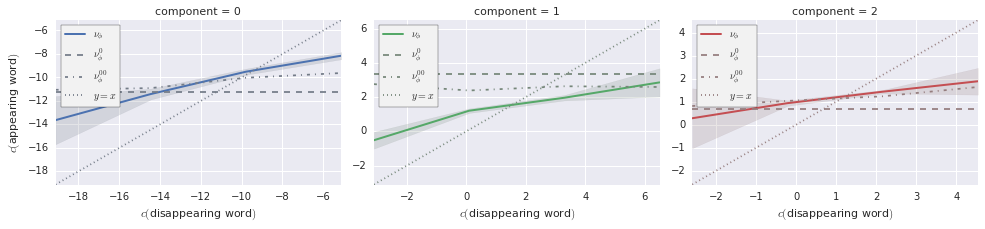

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 5 components.

Those explain the following variance:
[ 0.57436693  0.18279874  0.13878636  0.03919493  0.03645394]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographic_density,synonyms_count
Component-0,-0.699066,-0.096964,0.337960,-0.565068,0.261443,0.005781
Component-1,-0.431282,-0.106634,0.474000,0.711652,-0.267390,0.001951
Component-2,-0.563722,0.104164,-0.794472,0.195527,-0.019968,0.039395


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (     1 of 118071) |        | Elapsed Time: 0:01:13 ETA:  100 days, 2:53:59

  0% (    58 of 118071) |                  | Elapsed Time: 0:01:14 ETA:  0:33:29

  0% (   157 of 118071) |                  | Elapsed Time: 0:01:15 ETA:  0:24:07

  0% (   281 of 118071) |                  | Elapsed Time: 0:01:16 ETA:  0:19:54

  0% (   386 of 118071) |                  | Elapsed Time: 0:01:17 ETA:  0:19:14

  0% (   490 of 118071) |                  | Elapsed Time: 0:01:18 ETA:  0:18:53

  0% (   608 of 118071) |                  | Elapsed Time: 0:01:19 ETA:  0:18:11

  0% (   730 of 118071) |                  | Elapsed Time: 0:01:20 ETA:  0:17:36

  0% (   844 of 118071) |                  | Elapsed Time: 0:01:21 ETA:  0:17:23

  0% (   966 of 118071) |                  | Elapsed Time: 0:01:22 ETA:  0:17:03

  0% (  1084 of 118071) |                  | Elapsed Time: 0:01:23 ETA:  0:15:56

  1% (  1196 of 118071) |                  | Elapsed Time: 0:01:24 ETA:  0:15:42

  1% (  1309 of 118071) |                  | Elapsed Time: 0:01:25 ETA:  0:15:52

  1% (  1429 of 118071) |                  | Elapsed Time: 0:01:26 ETA:  0:15:36

  1% (  1476 of 118071) |                  | Elapsed Time: 0:01:26 ETA:  0:15:23

  1% (  1595 of 118071) |                  | Elapsed Time: 0:01:27 ETA:  0:15:21

  1% (  1713 of 118071) |                  | Elapsed Time: 0:01:28 ETA:  0:15:24

  1% (  1831 of 118071) |                  | Elapsed Time: 0:01:29 ETA:  0:15:18

  1% (  1946 of 118071) |                  | Elapsed Time: 0:01:30 ETA:  0:15:24

  1% (  2065 of 118071) |                  | Elapsed Time: 0:01:31 ETA:  0:15:22

  1% (  2190 of 118071) |                  | Elapsed Time: 0:01:32 ETA:  0:15:07

  1% (  2319 of 118071) |                  | Elapsed Time: 0:01:33 ETA:  0:14:51

  2% (  2446 of 118071) |                  | Elapsed Time: 0:01:34 ETA:  0:14:43

  2% (  2580 of 118071) |                  | Elapsed Time: 0:01:35 ETA:  0:14:29

  2% (  2712 of 118071) |                  | Elapsed Time: 0:01:36 ETA:  0:14:18

  2% (  2839 of 118071) |                  | Elapsed Time: 0:01:37 ETA:  0:14:09

  2% (  2952 of 118071) |                  | Elapsed Time: 0:01:38 ETA:  0:13:58

  2% (  3086 of 118071) |                  | Elapsed Time: 0:01:39 ETA:  0:13:41

  2% (  3218 of 118071) |                  | Elapsed Time: 0:01:40 ETA:  0:13:30

  2% (  3356 of 118071) |                  | Elapsed Time: 0:01:41 ETA:  0:13:19

  2% (  3495 of 118071) |                  | Elapsed Time: 0:01:42 ETA:  0:13:10

  3% (  3615 of 118071) |                  | Elapsed Time: 0:01:43 ETA:  0:13:14

  3% (  3741 of 118071) |                  | Elapsed Time: 0:01:44 ETA:  0:13:19

  3% (  3849 of 118071) |                  | Elapsed Time: 0:01:45 ETA:  0:13:37

  3% (  3996 of 118071) |                  | Elapsed Time: 0:01:46 ETA:  0:13:20

  3% (  4154 of 118071) |                  | Elapsed Time: 0:01:47 ETA:  0:12:59

  3% (  4274 of 118071) |                  | Elapsed Time: 0:01:48 ETA:  0:13:08

  3% (  4428 of 118071) |                  | Elapsed Time: 0:01:49 ETA:  0:12:50

  3% (  4570 of 118071) |                  | Elapsed Time: 0:01:50 ETA:  0:12:46

  3% (  4678 of 118071) |                  | Elapsed Time: 0:01:51 ETA:  0:13:08

  4% (  4809 of 118071) |                  | Elapsed Time: 0:01:52 ETA:  0:12:59

  4% (  4945 of 118071) |                  | Elapsed Time: 0:01:53 ETA:  0:12:50

  4% (  5082 of 118071) |                  | Elapsed Time: 0:01:54 ETA:  0:12:29

  4% (  5223 of 118071) |                  | Elapsed Time: 0:01:55 ETA:  0:12:32

  4% (  5363 of 118071) |                  | Elapsed Time: 0:01:56 ETA:  0:12:43

  4% (  5496 of 118071) |                  | Elapsed Time: 0:01:57 ETA:  0:12:33

  4% (  5633 of 118071) |                  | Elapsed Time: 0:01:58 ETA:  0:12:45

  4% (  5772 of 118071) |                  | Elapsed Time: 0:01:59 ETA:  0:12:47

  5% (  5904 of 118071) |                  | Elapsed Time: 0:02:00 ETA:  0:12:26

  5% (  6033 of 118071) |                  | Elapsed Time: 0:02:01 ETA:  0:12:27

  5% (  6132 of 118071) |                  | Elapsed Time: 0:02:02 ETA:  0:12:53

  5% (  6208 of 118071) |                  | Elapsed Time: 0:02:03 ETA:  0:13:42

  5% (  6277 of 118071) |                  | Elapsed Time: 0:02:04 ETA:  0:14:46

  5% (  6350 of 118071) |                  | Elapsed Time: 0:02:05 ETA:  0:15:53

  5% (  6423 of 118071) |                  | Elapsed Time: 0:02:06 ETA:  0:17:03

  5% (  6495 of 118071) |                  | Elapsed Time: 0:02:07 ETA:  0:18:30

  5% (  6566 of 118071) |#                 | Elapsed Time: 0:02:08 ETA:  0:20:15

  5% (  6638 of 118071) |#                 | Elapsed Time: 0:02:09 ETA:  0:22:10

  5% (  6712 of 118071) |#                 | Elapsed Time: 0:02:10 ETA:  0:24:07

  5% (  6782 of 118071) |#                 | Elapsed Time: 0:02:11 ETA:  0:25:17

  5% (  6852 of 118071) |#                 | Elapsed Time: 0:02:12 ETA:  0:25:31

  5% (  6923 of 118071) |#                 | Elapsed Time: 0:02:13 ETA:  0:25:26

  5% (  7024 of 118071) |#                 | Elapsed Time: 0:02:14 ETA:  0:24:16

  6% (  7146 of 118071) |#                 | Elapsed Time: 0:02:15 ETA:  0:22:26

  6% (  7275 of 118071) |#                 | Elapsed Time: 0:02:16 ETA:  0:20:35

  6% (  7380 of 118071) |#                 | Elapsed Time: 0:02:17 ETA:  0:19:26

  6% (  7503 of 118071) |#                 | Elapsed Time: 0:02:18 ETA:  0:18:07

  6% (  7580 of 118071) |#                 | Elapsed Time: 0:02:19 ETA:  0:18:01

  6% (  7679 of 118071) |#                 | Elapsed Time: 0:02:20 ETA:  0:17:19

  6% (  7760 of 118071) |#                 | Elapsed Time: 0:02:21 ETA:  0:17:05

  6% (  7848 of 118071) |#                 | Elapsed Time: 0:02:22 ETA:  0:16:42

  6% (  7962 of 118071) |#                 | Elapsed Time: 0:02:23 ETA:  0:16:26

  6% (  8090 of 118071) |#                 | Elapsed Time: 0:02:24 ETA:  0:16:17

  6% (  8227 of 118071) |#                 | Elapsed Time: 0:02:25 ETA:  0:16:09

  7% (  8358 of 118071) |#                 | Elapsed Time: 0:02:26 ETA:  0:15:47

  7% (  8498 of 118071) |#                 | Elapsed Time: 0:02:27 ETA:  0:15:27

  7% (  8636 of 118071) |#                 | Elapsed Time: 0:02:28 ETA:  0:14:25

  7% (  8773 of 118071) |#                 | Elapsed Time: 0:02:29 ETA:  0:13:48

  7% (  8856 of 118071) |#                 | Elapsed Time: 0:02:30 ETA:  0:13:03

  7% (  8993 of 118071) |#                 | Elapsed Time: 0:02:31 ETA:  0:12:23

  7% (  9127 of 118071) |#                 | Elapsed Time: 0:02:32 ETA:  0:12:06

  7% (  9267 of 118071) |#                 | Elapsed Time: 0:02:33 ETA:  0:11:56

  7% (  9411 of 118071) |#                 | Elapsed Time: 0:02:34 ETA:  0:11:49

  8% (  9547 of 118071) |#                 | Elapsed Time: 0:02:35 ETA:  0:11:44

  8% (  9688 of 118071) |#                 | Elapsed Time: 0:02:36 ETA:  0:11:42

  8% (  9797 of 118071) |#                 | Elapsed Time: 0:02:37 ETA:  0:12:12

  8% (  9900 of 118071) |#                 | Elapsed Time: 0:02:38 ETA:  0:12:38

  8% ( 10001 of 118071) |#                 | Elapsed Time: 0:02:39 ETA:  0:13:01

  8% ( 10095 of 118071) |#                 | Elapsed Time: 0:02:40 ETA:  0:13:38

  8% ( 10157 of 118071) |#                 | Elapsed Time: 0:02:41 ETA:  0:14:46

  8% ( 10267 of 118071) |#                 | Elapsed Time: 0:02:42 ETA:  0:15:16

  8% ( 10332 of 118071) |#                 | Elapsed Time: 0:02:43 ETA:  0:15:37

  8% ( 10462 of 118071) |#                 | Elapsed Time: 0:02:44 ETA:  0:15:44

  8% ( 10592 of 118071) |#                 | Elapsed Time: 0:02:45 ETA:  0:15:56

  9% ( 10719 of 118071) |#                 | Elapsed Time: 0:02:46 ETA:  0:15:22

  9% ( 10842 of 118071) |#                 | Elapsed Time: 0:02:47 ETA:  0:14:58

  9% ( 10972 of 118071) |#                 | Elapsed Time: 0:02:48 ETA:  0:14:25

  9% ( 11099 of 118071) |#                 | Elapsed Time: 0:02:49 ETA:  0:13:49

  9% ( 11201 of 118071) |#                 | Elapsed Time: 0:02:50 ETA:  0:13:10

  9% ( 11254 of 118071) |#                 | Elapsed Time: 0:02:51 ETA:  0:14:05

  9% ( 11355 of 118071) |#                 | Elapsed Time: 0:02:52 ETA:  0:14:31

  9% ( 11474 of 118071) |#                 | Elapsed Time: 0:02:53 ETA:  0:14:42

  9% ( 11544 of 118071) |#                 | Elapsed Time: 0:02:54 ETA:  0:15:48

  9% ( 11605 of 118071) |#                 | Elapsed Time: 0:02:55 ETA:  0:17:10

  9% ( 11705 of 118071) |#                 | Elapsed Time: 0:02:56 ETA:  0:17:41

 10% ( 11808 of 118071) |#                 | Elapsed Time: 0:02:56 ETA:  0:17:46

 10% ( 11929 of 118071) |#                 | Elapsed Time: 0:02:57 ETA:  0:17:54

 10% ( 12046 of 118071) |#                 | Elapsed Time: 0:02:58 ETA:  0:17:28

 10% ( 12143 of 118071) |#                 | Elapsed Time: 0:02:59 ETA:  0:16:27

 10% ( 12243 of 118071) |#                 | Elapsed Time: 0:03:00 ETA:  0:16:28

 10% ( 12340 of 118071) |#                 | Elapsed Time: 0:03:01 ETA:  0:16:56

 10% ( 12433 of 118071) |#                 | Elapsed Time: 0:03:02 ETA:  0:16:24

 10% ( 12527 of 118071) |#                 | Elapsed Time: 0:03:03 ETA:  0:15:41

 10% ( 12630 of 118071) |#                 | Elapsed Time: 0:03:04 ETA:  0:15:36

 10% ( 12773 of 118071) |#                 | Elapsed Time: 0:03:05 ETA:  0:15:19

 10% ( 12879 of 118071) |#                 | Elapsed Time: 0:03:06 ETA:  0:15:35

 11% ( 13006 of 118071) |#                 | Elapsed Time: 0:03:07 ETA:  0:15:23

 11% ( 13131 of 118071) |##                | Elapsed Time: 0:03:08 ETA:  0:14:51

 11% ( 13228 of 118071) |##                | Elapsed Time: 0:03:09 ETA:  0:14:53

 11% ( 13283 of 118071) |##                | Elapsed Time: 0:03:10 ETA:  0:14:47

 11% ( 13385 of 118071) |##                | Elapsed Time: 0:03:11 ETA:  0:14:36

 11% ( 13492 of 118071) |##                | Elapsed Time: 0:03:12 ETA:  0:14:20

 11% ( 13556 of 118071) |##                | Elapsed Time: 0:03:13 ETA:  0:15:04

 11% ( 13645 of 118071) |##                | Elapsed Time: 0:03:14 ETA:  0:16:12

 11% ( 13756 of 118071) |##                | Elapsed Time: 0:03:15 ETA:  0:16:05

 11% ( 13860 of 118071) |##                | Elapsed Time: 0:03:16 ETA:  0:16:35

 11% ( 13968 of 118071) |##                | Elapsed Time: 0:03:17 ETA:  0:16:58

 11% ( 14076 of 118071) |##                | Elapsed Time: 0:03:18 ETA:  0:16:41

 12% ( 14181 of 118071) |##                | Elapsed Time: 0:03:19 ETA:  0:16:29

 12% ( 14278 of 118071) |##                | Elapsed Time: 0:03:20 ETA:  0:16:34

 12% ( 14383 of 118071) |##                | Elapsed Time: 0:03:21 ETA:  0:16:36

 12% ( 14493 of 118071) |##                | Elapsed Time: 0:03:22 ETA:  0:15:37

 12% ( 14603 of 118071) |##                | Elapsed Time: 0:03:23 ETA:  0:15:10

 12% ( 14715 of 118071) |##                | Elapsed Time: 0:03:24 ETA:  0:15:09

 12% ( 14759 of 118071) |##                | Elapsed Time: 0:03:24 ETA:  0:15:03

 12% ( 14869 of 118071) |##                | Elapsed Time: 0:03:25 ETA:  0:15:00

 12% ( 14980 of 118071) |##                | Elapsed Time: 0:03:26 ETA:  0:14:56

 12% ( 15091 of 118071) |##                | Elapsed Time: 0:03:27 ETA:  0:14:49

 12% ( 15201 of 118071) |##                | Elapsed Time: 0:03:28 ETA:  0:14:33

 12% ( 15313 of 118071) |##                | Elapsed Time: 0:03:29 ETA:  0:14:23

 13% ( 15427 of 118071) |##                | Elapsed Time: 0:03:30 ETA:  0:14:17

 13% ( 15533 of 118071) |##                | Elapsed Time: 0:03:31 ETA:  0:14:20

 13% ( 15639 of 118071) |##                | Elapsed Time: 0:03:32 ETA:  0:14:26

 13% ( 15739 of 118071) |##                | Elapsed Time: 0:03:33 ETA:  0:14:36

 13% ( 15851 of 118071) |##                | Elapsed Time: 0:03:34 ETA:  0:14:33

 13% ( 15963 of 118071) |##                | Elapsed Time: 0:03:36 ETA:  0:14:30

 13% ( 16077 of 118071) |##                | Elapsed Time: 0:03:37 ETA:  0:14:25

 13% ( 16189 of 118071) |##                | Elapsed Time: 0:03:38 ETA:  0:14:22

 13% ( 16235 of 118071) |##                | Elapsed Time: 0:03:38 ETA:  0:14:23

 13% ( 16342 of 118071) |##                | Elapsed Time: 0:03:39 ETA:  0:14:30

 13% ( 16460 of 118071) |##                | Elapsed Time: 0:03:40 ETA:  0:14:15

 14% ( 16588 of 118071) |##                | Elapsed Time: 0:03:41 ETA:  0:13:49

 14% ( 16717 of 118071) |##                | Elapsed Time: 0:03:42 ETA:  0:13:17

 14% ( 16839 of 118071) |##                | Elapsed Time: 0:03:43 ETA:  0:13:05

 14% ( 16966 of 118071) |##                | Elapsed Time: 0:03:44 ETA:  0:12:49

 14% ( 17089 of 118071) |##                | Elapsed Time: 0:03:45 ETA:  0:12:39

 14% ( 17218 of 118071) |##                | Elapsed Time: 0:03:46 ETA:  0:12:22

 14% ( 17358 of 118071) |##                | Elapsed Time: 0:03:47 ETA:  0:12:02

 14% ( 17488 of 118071) |##                | Elapsed Time: 0:03:48 ETA:  0:11:42

 14% ( 17615 of 118071) |##                | Elapsed Time: 0:03:49 ETA:  0:11:33

 15% ( 17711 of 118071) |##                | Elapsed Time: 0:03:50 ETA:  0:11:34

 15% ( 17826 of 118071) |##                | Elapsed Time: 0:03:51 ETA:  0:11:44

 15% ( 17947 of 118071) |##                | Elapsed Time: 0:03:52 ETA:  0:11:43

 15% ( 18056 of 118071) |##                | Elapsed Time: 0:03:53 ETA:  0:11:59

 15% ( 18162 of 118071) |##                | Elapsed Time: 0:03:54 ETA:  0:12:13

 15% ( 18278 of 118071) |##                | Elapsed Time: 0:03:55 ETA:  0:12:24

 15% ( 18416 of 118071) |##                | Elapsed Time: 0:03:56 ETA:  0:12:25

 15% ( 18552 of 118071) |##                | Elapsed Time: 0:03:57 ETA:  0:12:19

 15% ( 18687 of 118071) |##                | Elapsed Time: 0:03:58 ETA:  0:12:16

 15% ( 18826 of 118071) |##                | Elapsed Time: 0:03:59 ETA:  0:12:02

 16% ( 18952 of 118071) |##                | Elapsed Time: 0:04:00 ETA:  0:11:52

 16% ( 19091 of 118071) |##                | Elapsed Time: 0:04:01 ETA:  0:11:36

 16% ( 19187 of 118071) |##                | Elapsed Time: 0:04:01 ETA:  0:11:12

 16% ( 19323 of 118071) |##                | Elapsed Time: 0:04:02 ETA:  0:10:47

 16% ( 19461 of 118071) |##                | Elapsed Time: 0:04:04 ETA:  0:10:29

 16% ( 19576 of 118071) |##                | Elapsed Time: 0:04:05 ETA:  0:10:45

 16% ( 19704 of 118071) |###               | Elapsed Time: 0:04:06 ETA:  0:10:50

 16% ( 19828 of 118071) |###               | Elapsed Time: 0:04:07 ETA:  0:10:54

 16% ( 19952 of 118071) |###               | Elapsed Time: 0:04:08 ETA:  0:11:05

 16% ( 20072 of 118071) |###               | Elapsed Time: 0:04:09 ETA:  0:11:12

 17% ( 20192 of 118071) |###               | Elapsed Time: 0:04:10 ETA:  0:11:27

 17% ( 20321 of 118071) |###               | Elapsed Time: 0:04:11 ETA:  0:11:32

 17% ( 20435 of 118071) |###               | Elapsed Time: 0:04:12 ETA:  0:11:50

 17% ( 20554 of 118071) |###               | Elapsed Time: 0:04:13 ETA:  0:12:06

 17% ( 20663 of 118071) |###               | Elapsed Time: 0:04:13 ETA:  0:12:00

 17% ( 20781 of 118071) |###               | Elapsed Time: 0:04:14 ETA:  0:12:08

 17% ( 20901 of 118071) |###               | Elapsed Time: 0:04:15 ETA:  0:12:10

 17% ( 21026 of 118071) |###               | Elapsed Time: 0:04:16 ETA:  0:12:08

 17% ( 21142 of 118071) |###               | Elapsed Time: 0:04:17 ETA:  0:12:08

 18% ( 21257 of 118071) |###               | Elapsed Time: 0:04:18 ETA:  0:12:11

 18% ( 21381 of 118071) |###               | Elapsed Time: 0:04:19 ETA:  0:12:15

 18% ( 21495 of 118071) |###               | Elapsed Time: 0:04:21 ETA:  0:12:14

 18% ( 21617 of 118071) |###               | Elapsed Time: 0:04:22 ETA:  0:12:10

 18% ( 21726 of 118071) |###               | Elapsed Time: 0:04:23 ETA:  0:12:20

 18% ( 21849 of 118071) |###               | Elapsed Time: 0:04:24 ETA:  0:12:15

 18% ( 21975 of 118071) |###               | Elapsed Time: 0:04:25 ETA:  0:12:09

 18% ( 22093 of 118071) |###               | Elapsed Time: 0:04:26 ETA:  0:12:14

 18% ( 22139 of 118071) |###               | Elapsed Time: 0:04:26 ETA:  0:12:09

 18% ( 22257 of 118071) |###               | Elapsed Time: 0:04:27 ETA:  0:12:05

 18% ( 22380 of 118071) |###               | Elapsed Time: 0:04:28 ETA:  0:12:05

 19% ( 22505 of 118071) |###               | Elapsed Time: 0:04:29 ETA:  0:11:53

 19% ( 22625 of 118071) |###               | Elapsed Time: 0:04:30 ETA:  0:11:53

 19% ( 22748 of 118071) |###               | Elapsed Time: 0:04:31 ETA:  0:11:38

 19% ( 22886 of 118071) |###               | Elapsed Time: 0:04:32 ETA:  0:11:23

 19% ( 23008 of 118071) |###               | Elapsed Time: 0:04:33 ETA:  0:11:26

 19% ( 23135 of 118071) |###               | Elapsed Time: 0:04:34 ETA:  0:11:17

 19% ( 23257 of 118071) |###               | Elapsed Time: 0:04:35 ETA:  0:11:18

 19% ( 23358 of 118071) |###               | Elapsed Time: 0:04:36 ETA:  0:11:33

 19% ( 23447 of 118071) |###               | Elapsed Time: 0:04:37 ETA:  0:12:02

 19% ( 23565 of 118071) |###               | Elapsed Time: 0:04:38 ETA:  0:12:08

 20% ( 23615 of 118071) |###               | Elapsed Time: 0:04:38 ETA:  0:12:23

 20% ( 23716 of 118071) |###               | Elapsed Time: 0:04:39 ETA:  0:12:45

 20% ( 23819 of 118071) |###               | Elapsed Time: 0:04:40 ETA:  0:13:23

 20% ( 23888 of 118071) |###               | Elapsed Time: 0:04:41 ETA:  0:14:28

 20% ( 23979 of 118071) |###               | Elapsed Time: 0:04:43 ETA:  0:15:16

 20% ( 24059 of 118071) |###               | Elapsed Time: 0:04:44 ETA:  0:16:21

 20% ( 24193 of 118071) |###               | Elapsed Time: 0:04:45 ETA:  0:15:28

 20% ( 24329 of 118071) |###               | Elapsed Time: 0:04:46 ETA:  0:14:23

 20% ( 24459 of 118071) |###               | Elapsed Time: 0:04:47 ETA:  0:14:06

 20% ( 24592 of 118071) |###               | Elapsed Time: 0:04:48 ETA:  0:13:27

 20% ( 24731 of 118071) |###               | Elapsed Time: 0:04:49 ETA:  0:12:45

 21% ( 24866 of 118071) |###               | Elapsed Time: 0:04:50 ETA:  0:12:11

 21% ( 25000 of 118071) |###               | Elapsed Time: 0:04:51 ETA:  0:11:10

 21% ( 25091 of 118071) |###               | Elapsed Time: 0:04:52 ETA:  0:11:06

 21% ( 25205 of 118071) |###               | Elapsed Time: 0:04:53 ETA:  0:10:34

 21% ( 25342 of 118071) |###               | Elapsed Time: 0:04:54 ETA:  0:10:31

 21% ( 25465 of 118071) |###               | Elapsed Time: 0:04:55 ETA:  0:10:40

 21% ( 25609 of 118071) |###               | Elapsed Time: 0:04:56 ETA:  0:10:27

 21% ( 25758 of 118071) |###               | Elapsed Time: 0:04:57 ETA:  0:10:13

 21% ( 25899 of 118071) |###               | Elapsed Time: 0:04:58 ETA:  0:10:11

 22% ( 26038 of 118071) |###               | Elapsed Time: 0:04:59 ETA:  0:10:07

 22% ( 26189 of 118071) |###               | Elapsed Time: 0:05:00 ETA:  0:09:53

 22% ( 26355 of 118071) |####              | Elapsed Time: 0:05:01 ETA:  0:09:01

 22% ( 26485 of 118071) |####              | Elapsed Time: 0:05:02 ETA:  0:08:50

 22% ( 26566 of 118071) |####              | Elapsed Time: 0:05:02 ETA:  0:08:52

 22% ( 26668 of 118071) |####              | Elapsed Time: 0:05:03 ETA:  0:09:06

 22% ( 26764 of 118071) |####              | Elapsed Time: 0:05:04 ETA:  0:09:41

 22% ( 26859 of 118071) |####              | Elapsed Time: 0:05:05 ETA:  0:10:23

 22% ( 26959 of 118071) |####              | Elapsed Time: 0:05:06 ETA:  0:10:58

 22% ( 27090 of 118071) |####              | Elapsed Time: 0:05:07 ETA:  0:11:04

 23% ( 27227 of 118071) |####              | Elapsed Time: 0:05:08 ETA:  0:11:17

 23% ( 27363 of 118071) |####              | Elapsed Time: 0:05:09 ETA:  0:11:45

 23% ( 27494 of 118071) |####              | Elapsed Time: 0:05:10 ETA:  0:11:44

 23% ( 27630 of 118071) |####              | Elapsed Time: 0:05:11 ETA:  0:11:31

 23% ( 27761 of 118071) |####              | Elapsed Time: 0:05:12 ETA:  0:11:03

 23% ( 27895 of 118071) |####              | Elapsed Time: 0:05:13 ETA:  0:10:30

 23% ( 28042 of 118071) |####              | Elapsed Time: 0:05:14 ETA:  0:09:42

 23% ( 28167 of 118071) |####              | Elapsed Time: 0:05:15 ETA:  0:09:46

 23% ( 28271 of 118071) |####              | Elapsed Time: 0:05:16 ETA:  0:10:14

 24% ( 28377 of 118071) |####              | Elapsed Time: 0:05:17 ETA:  0:10:40

 24% ( 28470 of 118071) |####              | Elapsed Time: 0:05:18 ETA:  0:11:16

 24% ( 28572 of 118071) |####              | Elapsed Time: 0:05:19 ETA:  0:11:51

 24% ( 28721 of 118071) |####              | Elapsed Time: 0:05:20 ETA:  0:11:31

 24% ( 28877 of 118071) |####              | Elapsed Time: 0:05:21 ETA:  0:11:07

 24% ( 29015 of 118071) |####              | Elapsed Time: 0:05:22 ETA:  0:10:48

 24% ( 29135 of 118071) |####              | Elapsed Time: 0:05:23 ETA:  0:10:51

 24% ( 29234 of 118071) |####              | Elapsed Time: 0:05:24 ETA:  0:11:14

 24% ( 29359 of 118071) |####              | Elapsed Time: 0:05:25 ETA:  0:10:53

 24% ( 29483 of 118071) |####              | Elapsed Time: 0:05:26 ETA:  0:10:36

 25% ( 29518 of 118071) |####              | Elapsed Time: 0:05:27 ETA:  0:10:09

 25% ( 29643 of 118071) |####              | Elapsed Time: 0:05:28 ETA:  0:09:48

 25% ( 29765 of 118071) |####              | Elapsed Time: 0:05:29 ETA:  0:10:11

 25% ( 29871 of 118071) |####              | Elapsed Time: 0:05:30 ETA:  0:10:57

 25% ( 29960 of 118071) |####              | Elapsed Time: 0:05:31 ETA:  0:11:52

 25% ( 30048 of 118071) |####              | Elapsed Time: 0:05:32 ETA:  0:12:28

 25% ( 30172 of 118071) |####              | Elapsed Time: 0:05:33 ETA:  0:11:59

 25% ( 30299 of 118071) |####              | Elapsed Time: 0:05:34 ETA:  0:11:56

 25% ( 30427 of 118071) |####              | Elapsed Time: 0:05:35 ETA:  0:11:50

 25% ( 30564 of 118071) |####              | Elapsed Time: 0:05:36 ETA:  0:11:28

 26% ( 30713 of 118071) |####              | Elapsed Time: 0:05:37 ETA:  0:11:03

 26% ( 30832 of 118071) |####              | Elapsed Time: 0:05:38 ETA:  0:11:05

 26% ( 30953 of 118071) |####              | Elapsed Time: 0:05:39 ETA:  0:10:51

 26% ( 30994 of 118071) |####              | Elapsed Time: 0:05:39 ETA:  0:10:19

 26% ( 31107 of 118071) |####              | Elapsed Time: 0:05:40 ETA:  0:09:56

 26% ( 31228 of 118071) |####              | Elapsed Time: 0:05:41 ETA:  0:09:57

 26% ( 31356 of 118071) |####              | Elapsed Time: 0:05:42 ETA:  0:09:55

 26% ( 31484 of 118071) |####              | Elapsed Time: 0:05:43 ETA:  0:09:54

 26% ( 31602 of 118071) |####              | Elapsed Time: 0:05:44 ETA:  0:10:10

 26% ( 31759 of 118071) |####              | Elapsed Time: 0:05:45 ETA:  0:10:02

 26% ( 31875 of 118071) |####              | Elapsed Time: 0:05:46 ETA:  0:10:10

 27% ( 32028 of 118071) |####              | Elapsed Time: 0:05:47 ETA:  0:09:41

 27% ( 32178 of 118071) |####              | Elapsed Time: 0:05:48 ETA:  0:09:18

 27% ( 32332 of 118071) |####              | Elapsed Time: 0:05:49 ETA:  0:08:46

 27% ( 32445 of 118071) |####              | Elapsed Time: 0:05:50 ETA:  0:08:51

 27% ( 32470 of 118071) |####              | Elapsed Time: 0:05:51 ETA:  0:08:48

 27% ( 32589 of 118071) |####              | Elapsed Time: 0:05:52 ETA:  0:08:54

 27% ( 32710 of 118071) |####              | Elapsed Time: 0:05:53 ETA:  0:08:51

 27% ( 32846 of 118071) |#####             | Elapsed Time: 0:05:54 ETA:  0:09:07

 27% ( 32978 of 118071) |#####             | Elapsed Time: 0:05:55 ETA:  0:08:46

 28% ( 33103 of 118071) |#####             | Elapsed Time: 0:05:56 ETA:  0:09:08

 28% ( 33204 of 118071) |#####             | Elapsed Time: 0:05:57 ETA:  0:09:50

 28% ( 33290 of 118071) |#####             | Elapsed Time: 0:05:58 ETA:  0:11:01

 28% ( 33437 of 118071) |#####             | Elapsed Time: 0:05:59 ETA:  0:10:25

 28% ( 33593 of 118071) |#####             | Elapsed Time: 0:06:00 ETA:  0:09:53

 28% ( 33751 of 118071) |#####             | Elapsed Time: 0:06:01 ETA:  0:09:19

 28% ( 33872 of 118071) |#####             | Elapsed Time: 0:06:02 ETA:  0:09:18

 28% ( 33946 of 118071) |#####             | Elapsed Time: 0:06:02 ETA:  0:09:13

 28% ( 34082 of 118071) |#####             | Elapsed Time: 0:06:03 ETA:  0:09:08

 28% ( 34188 of 118071) |#####             | Elapsed Time: 0:06:04 ETA:  0:09:23

 29% ( 34300 of 118071) |#####             | Elapsed Time: 0:06:05 ETA:  0:09:13

 29% ( 34386 of 118071) |#####             | Elapsed Time: 0:06:06 ETA:  0:09:09

 29% ( 34546 of 118071) |#####             | Elapsed Time: 0:06:07 ETA:  0:08:57

 29% ( 34716 of 118071) |#####             | Elapsed Time: 0:06:08 ETA:  0:08:45

 29% ( 34878 of 118071) |#####             | Elapsed Time: 0:06:09 ETA:  0:08:41

 29% ( 35037 of 118071) |#####             | Elapsed Time: 0:06:10 ETA:  0:08:11

 29% ( 35201 of 118071) |#####             | Elapsed Time: 0:06:11 ETA:  0:07:58

 29% ( 35345 of 118071) |#####             | Elapsed Time: 0:06:12 ETA:  0:07:52

 30% ( 35422 of 118071) |#####             | Elapsed Time: 0:06:13 ETA:  0:07:29

 30% ( 35556 of 118071) |#####             | Elapsed Time: 0:06:14 ETA:  0:07:16

 30% ( 35679 of 118071) |#####             | Elapsed Time: 0:06:15 ETA:  0:06:52

 30% ( 35811 of 118071) |#####             | Elapsed Time: 0:06:16 ETA:  0:07:08

 30% ( 35952 of 118071) |#####             | Elapsed Time: 0:06:17 ETA:  0:07:26

 30% ( 36059 of 118071) |#####             | Elapsed Time: 0:06:18 ETA:  0:08:04

 30% ( 36158 of 118071) |#####             | Elapsed Time: 0:06:19 ETA:  0:08:50

 30% ( 36242 of 118071) |#####             | Elapsed Time: 0:06:20 ETA:  0:10:00

 30% ( 36343 of 118071) |#####             | Elapsed Time: 0:06:21 ETA:  0:10:40

 30% ( 36461 of 118071) |#####             | Elapsed Time: 0:06:22 ETA:  0:10:48

 30% ( 36572 of 118071) |#####             | Elapsed Time: 0:06:23 ETA:  0:11:08

 31% ( 36663 of 118071) |#####             | Elapsed Time: 0:06:24 ETA:  0:11:41

 31% ( 36769 of 118071) |#####             | Elapsed Time: 0:06:25 ETA:  0:12:09

 31% ( 36873 of 118071) |#####             | Elapsed Time: 0:06:26 ETA:  0:12:54

 31% ( 36898 of 118071) |#####             | Elapsed Time: 0:06:26 ETA:  0:12:56

 31% ( 37031 of 118071) |#####             | Elapsed Time: 0:06:27 ETA:  0:12:09

 31% ( 37167 of 118071) |#####             | Elapsed Time: 0:06:28 ETA:  0:11:04

 31% ( 37308 of 118071) |#####             | Elapsed Time: 0:06:29 ETA:  0:10:20

 31% ( 37397 of 118071) |#####             | Elapsed Time: 0:06:30 ETA:  0:10:51

 31% ( 37507 of 118071) |#####             | Elapsed Time: 0:06:31 ETA:  0:10:51

 31% ( 37617 of 118071) |#####             | Elapsed Time: 0:06:32 ETA:  0:10:31

 31% ( 37728 of 118071) |#####             | Elapsed Time: 0:06:33 ETA:  0:10:25

 32% ( 37855 of 118071) |#####             | Elapsed Time: 0:06:34 ETA:  0:09:59

 32% ( 38006 of 118071) |#####             | Elapsed Time: 0:06:35 ETA:  0:09:28

 32% ( 38160 of 118071) |#####             | Elapsed Time: 0:06:36 ETA:  0:09:09

 32% ( 38293 of 118071) |#####             | Elapsed Time: 0:06:37 ETA:  0:09:11

 32% ( 38374 of 118071) |#####             | Elapsed Time: 0:06:38 ETA:  0:09:28

 32% ( 38477 of 118071) |#####             | Elapsed Time: 0:06:39 ETA:  0:09:14

 32% ( 38572 of 118071) |#####             | Elapsed Time: 0:06:40 ETA:  0:09:27

 32% ( 38657 of 118071) |#####             | Elapsed Time: 0:06:41 ETA:  0:09:48

 32% ( 38804 of 118071) |#####             | Elapsed Time: 0:06:42 ETA:  0:09:14

 32% ( 38953 of 118071) |#####             | Elapsed Time: 0:06:43 ETA:  0:08:54

 33% ( 39056 of 118071) |#####             | Elapsed Time: 0:06:44 ETA:  0:09:52

 33% ( 39137 of 118071) |#####             | Elapsed Time: 0:06:45 ETA:  0:11:07

 33% ( 39235 of 118071) |#####             | Elapsed Time: 0:06:46 ETA:  0:11:49

 33% ( 39321 of 118071) |#####             | Elapsed Time: 0:06:47 ETA:  0:12:22

 33% ( 39385 of 118071) |######            | Elapsed Time: 0:06:48 ETA:  0:13:12

 33% ( 39514 of 118071) |######            | Elapsed Time: 0:06:49 ETA:  0:12:29

 33% ( 39650 of 118071) |######            | Elapsed Time: 0:06:50 ETA:  0:11:28

 33% ( 39768 of 118071) |######            | Elapsed Time: 0:06:51 ETA:  0:12:00

 33% ( 39849 of 118071) |######            | Elapsed Time: 0:06:52 ETA:  0:12:57

 33% ( 39948 of 118071) |######            | Elapsed Time: 0:06:53 ETA:  0:12:43

 33% ( 40056 of 118071) |######            | Elapsed Time: 0:06:54 ETA:  0:12:06

 34% ( 40145 of 118071) |######            | Elapsed Time: 0:06:55 ETA:  0:12:13

 34% ( 40283 of 118071) |######            | Elapsed Time: 0:06:56 ETA:  0:11:10

 34% ( 40412 of 118071) |######            | Elapsed Time: 0:06:57 ETA:  0:09:57

 34% ( 40533 of 118071) |######            | Elapsed Time: 0:06:58 ETA:  0:10:03

 34% ( 40651 of 118071) |######            | Elapsed Time: 0:06:59 ETA:  0:10:20

 34% ( 40781 of 118071) |######            | Elapsed Time: 0:07:00 ETA:  0:10:07

 34% ( 40916 of 118071) |######            | Elapsed Time: 0:07:01 ETA:  0:09:37

 34% ( 41073 of 118071) |######            | Elapsed Time: 0:07:02 ETA:  0:08:44

 34% ( 41197 of 118071) |######            | Elapsed Time: 0:07:03 ETA:  0:08:29

 35% ( 41325 of 118071) |######            | Elapsed Time: 0:07:04 ETA:  0:07:42

 35% ( 41464 of 118071) |######            | Elapsed Time: 0:07:05 ETA:  0:07:40

 35% ( 41582 of 118071) |######            | Elapsed Time: 0:07:06 ETA:  0:07:48

 35% ( 41715 of 118071) |######            | Elapsed Time: 0:07:07 ETA:  0:07:38

 35% ( 41848 of 118071) |######            | Elapsed Time: 0:07:08 ETA:  0:07:26

 35% ( 41928 of 118071) |######            | Elapsed Time: 0:07:09 ETA:  0:08:03

 35% ( 42014 of 118071) |######            | Elapsed Time: 0:07:10 ETA:  0:08:43

 35% ( 42129 of 118071) |######            | Elapsed Time: 0:07:11 ETA:  0:09:20

 35% ( 42262 of 118071) |######            | Elapsed Time: 0:07:12 ETA:  0:09:11

 35% ( 42374 of 118071) |######            | Elapsed Time: 0:07:13 ETA:  0:09:44

 36% ( 42517 of 118071) |######            | Elapsed Time: 0:07:14 ETA:  0:09:39

 36% ( 42616 of 118071) |######            | Elapsed Time: 0:07:15 ETA:  0:09:57

 36% ( 42712 of 118071) |######            | Elapsed Time: 0:07:16 ETA:  0:10:34

 36% ( 42801 of 118071) |######            | Elapsed Time: 0:07:17 ETA:  0:11:11

 36% ( 42930 of 118071) |######            | Elapsed Time: 0:07:18 ETA:  0:10:16

 36% ( 43072 of 118071) |######            | Elapsed Time: 0:07:19 ETA:  0:09:20

 36% ( 43171 of 118071) |######            | Elapsed Time: 0:07:20 ETA:  0:09:34

 36% ( 43300 of 118071) |######            | Elapsed Time: 0:07:21 ETA:  0:09:36

 36% ( 43439 of 118071) |######            | Elapsed Time: 0:07:22 ETA:  0:09:08

 36% ( 43577 of 118071) |######            | Elapsed Time: 0:07:23 ETA:  0:09:12

 36% ( 43682 of 118071) |######            | Elapsed Time: 0:07:24 ETA:  0:09:06

 37% ( 43795 of 118071) |######            | Elapsed Time: 0:07:25 ETA:  0:08:49

 37% ( 43926 of 118071) |######            | Elapsed Time: 0:07:26 ETA:  0:08:22

 37% ( 44080 of 118071) |######            | Elapsed Time: 0:07:27 ETA:  0:08:00

 37% ( 44198 of 118071) |######            | Elapsed Time: 0:07:28 ETA:  0:08:19

 37% ( 44277 of 118071) |######            | Elapsed Time: 0:07:28 ETA:  0:07:49

 37% ( 44413 of 118071) |######            | Elapsed Time: 0:07:29 ETA:  0:07:43

 37% ( 44519 of 118071) |######            | Elapsed Time: 0:07:30 ETA:  0:08:10

 37% ( 44608 of 118071) |######            | Elapsed Time: 0:07:31 ETA:  0:08:53

 37% ( 44747 of 118071) |######            | Elapsed Time: 0:07:32 ETA:  0:08:20

 37% ( 44843 of 118071) |######            | Elapsed Time: 0:07:33 ETA:  0:08:36

 38% ( 44913 of 118071) |######            | Elapsed Time: 0:07:34 ETA:  0:09:38

 38% ( 45014 of 118071) |######            | Elapsed Time: 0:07:35 ETA:  0:10:35

 38% ( 45111 of 118071) |######            | Elapsed Time: 0:07:36 ETA:  0:10:59

 38% ( 45205 of 118071) |######            | Elapsed Time: 0:07:37 ETA:  0:11:35

 38% ( 45335 of 118071) |######            | Elapsed Time: 0:07:38 ETA:  0:11:42

 38% ( 45474 of 118071) |######            | Elapsed Time: 0:07:39 ETA:  0:11:01

 38% ( 45611 of 118071) |######            | Elapsed Time: 0:07:40 ETA:  0:10:06

 38% ( 45753 of 118071) |######            | Elapsed Time: 0:07:41 ETA:  0:10:02

 38% ( 45864 of 118071) |######            | Elapsed Time: 0:07:42 ETA:  0:09:45

 38% ( 45982 of 118071) |#######           | Elapsed Time: 0:07:43 ETA:  0:08:53

 39% ( 46094 of 118071) |#######           | Elapsed Time: 0:07:44 ETA:  0:08:42

 39% ( 46221 of 118071) |#######           | Elapsed Time: 0:07:45 ETA:  0:08:15

 39% ( 46347 of 118071) |#######           | Elapsed Time: 0:07:46 ETA:  0:07:47

 39% ( 46463 of 118071) |#######           | Elapsed Time: 0:07:47 ETA:  0:07:58

 39% ( 46514 of 118071) |#######           | Elapsed Time: 0:07:48 ETA:  0:09:22

 39% ( 46590 of 118071) |#######           | Elapsed Time: 0:07:49 ETA:  0:10:26

 39% ( 46689 of 118071) |#######           | Elapsed Time: 0:07:50 ETA:  0:11:15

 39% ( 46774 of 118071) |#######           | Elapsed Time: 0:07:51 ETA:  0:11:47

 39% ( 46887 of 118071) |#######           | Elapsed Time: 0:07:52 ETA:  0:11:53

 39% ( 47018 of 118071) |#######           | Elapsed Time: 0:07:53 ETA:  0:11:27

 39% ( 47145 of 118071) |#######           | Elapsed Time: 0:07:54 ETA:  0:11:26

 40% ( 47229 of 118071) |#######           | Elapsed Time: 0:07:55 ETA:  0:11:25

 40% ( 47367 of 118071) |#######           | Elapsed Time: 0:07:56 ETA:  0:10:56

 40% ( 47494 of 118071) |#######           | Elapsed Time: 0:07:57 ETA:  0:09:22

 40% ( 47612 of 118071) |#######           | Elapsed Time: 0:07:58 ETA:  0:08:38

 40% ( 47736 of 118071) |#######           | Elapsed Time: 0:07:59 ETA:  0:08:13

 40% ( 47860 of 118071) |#######           | Elapsed Time: 0:08:00 ETA:  0:07:37

 40% ( 47962 of 118071) |#######           | Elapsed Time: 0:08:01 ETA:  0:07:46

 40% ( 48075 of 118071) |#######           | Elapsed Time: 0:08:02 ETA:  0:08:01

 40% ( 48199 of 118071) |#######           | Elapsed Time: 0:08:03 ETA:  0:08:02

 40% ( 48340 of 118071) |#######           | Elapsed Time: 0:08:04 ETA:  0:07:56

 41% ( 48456 of 118071) |#######           | Elapsed Time: 0:08:05 ETA:  0:08:14

 41% ( 48590 of 118071) |#######           | Elapsed Time: 0:08:06 ETA:  0:08:07

 41% ( 48705 of 118071) |#######           | Elapsed Time: 0:08:07 ETA:  0:07:52

 41% ( 48825 of 118071) |#######           | Elapsed Time: 0:08:08 ETA:  0:07:59

 41% ( 48932 of 118071) |#######           | Elapsed Time: 0:08:09 ETA:  0:08:13

 41% ( 49058 of 118071) |#######           | Elapsed Time: 0:08:10 ETA:  0:07:50

 41% ( 49160 of 118071) |#######           | Elapsed Time: 0:08:11 ETA:  0:07:59

 41% ( 49257 of 118071) |#######           | Elapsed Time: 0:08:12 ETA:  0:08:27

 41% ( 49362 of 118071) |#######           | Elapsed Time: 0:08:13 ETA:  0:09:02

 41% ( 49500 of 118071) |#######           | Elapsed Time: 0:08:14 ETA:  0:08:39

 42% ( 49632 of 118071) |#######           | Elapsed Time: 0:08:15 ETA:  0:08:40

 42% ( 49754 of 118071) |#######           | Elapsed Time: 0:08:16 ETA:  0:08:49

 42% ( 49828 of 118071) |#######           | Elapsed Time: 0:08:17 ETA:  0:09:31

 42% ( 49924 of 118071) |#######           | Elapsed Time: 0:08:18 ETA:  0:09:42

 42% ( 50053 of 118071) |#######           | Elapsed Time: 0:08:19 ETA:  0:09:38

 42% ( 50181 of 118071) |#######           | Elapsed Time: 0:08:20 ETA:  0:09:06

 42% ( 50261 of 118071) |#######           | Elapsed Time: 0:08:21 ETA:  0:09:34

 42% ( 50337 of 118071) |#######           | Elapsed Time: 0:08:22 ETA:  0:10:55

 42% ( 50412 of 118071) |#######           | Elapsed Time: 0:08:23 ETA:  0:12:19

 42% ( 50483 of 118071) |#######           | Elapsed Time: 0:08:24 ETA:  0:13:46

 42% ( 50556 of 118071) |#######           | Elapsed Time: 0:08:25 ETA:  0:13:45

 42% ( 50606 of 118071) |#######           | Elapsed Time: 0:08:26 ETA:  0:15:15

 42% ( 50669 of 118071) |#######           | Elapsed Time: 0:08:27 ETA:  0:17:47

 42% ( 50743 of 118071) |#######           | Elapsed Time: 0:08:28 ETA:  0:19:44

 43% ( 50813 of 118071) |#######           | Elapsed Time: 0:08:29 ETA:  0:19:43

 43% ( 50892 of 118071) |#######           | Elapsed Time: 0:08:30 ETA:  0:19:45

 43% ( 50958 of 118071) |#######           | Elapsed Time: 0:08:31 ETA:  0:20:08

 43% ( 51026 of 118071) |#######           | Elapsed Time: 0:08:32 ETA:  0:20:26

 43% ( 51110 of 118071) |#######           | Elapsed Time: 0:08:33 ETA:  0:19:49

 43% ( 51146 of 118071) |#######           | Elapsed Time: 0:08:34 ETA:  0:21:35

 43% ( 51162 of 118071) |#######           | Elapsed Time: 0:08:35 ETA:  0:23:29

 43% ( 51181 of 118071) |#######           | Elapsed Time: 0:08:36 ETA:  0:26:41

 43% ( 51195 of 118071) |#######           | Elapsed Time: 0:08:38 ETA:  0:31:38

 43% ( 51218 of 118071) |#######           | Elapsed Time: 0:08:39 ETA:  0:36:37

 43% ( 51229 of 118071) |#######           | Elapsed Time: 0:08:40 ETA:  0:46:42

 43% ( 51243 of 118071) |#######           | Elapsed Time: 0:08:41 ETA:  0:56:50

 43% ( 51263 of 118071) |#######           | Elapsed Time: 0:08:42 ETA:  1:10:25

 43% ( 51291 of 118071) |#######           | Elapsed Time: 0:08:43 ETA:  1:35:13

 43% ( 51327 of 118071) |#######           | Elapsed Time: 0:08:44 ETA:  1:35:31

 43% ( 51367 of 118071) |#######           | Elapsed Time: 0:08:45 ETA:  1:23:14

 43% ( 51404 of 118071) |#######           | Elapsed Time: 0:08:46 ETA:  1:14:57

 43% ( 51440 of 118071) |#######           | Elapsed Time: 0:08:47 ETA:  1:07:01

 43% ( 51472 of 118071) |#######           | Elapsed Time: 0:08:48 ETA:  1:03:48

 43% ( 51507 of 118071) |#######           | Elapsed Time: 0:08:49 ETA:  0:56:38

 43% ( 51537 of 118071) |#######           | Elapsed Time: 0:08:50 ETA:  0:53:20

 43% ( 51569 of 118071) |#######           | Elapsed Time: 0:08:51 ETA:  0:50:41

 43% ( 51601 of 118071) |#######           | Elapsed Time: 0:08:52 ETA:  0:49:41

 43% ( 51637 of 118071) |#######           | Elapsed Time: 0:08:53 ETA:  0:49:48

 43% ( 51657 of 118071) |#######           | Elapsed Time: 0:08:54 ETA:  0:50:42

 43% ( 51674 of 118071) |#######           | Elapsed Time: 0:08:55 ETA:  0:55:11

 43% ( 51710 of 118071) |#######           | Elapsed Time: 0:08:56 ETA:  0:55:09

 43% ( 51738 of 118071) |#######           | Elapsed Time: 0:08:57 ETA:  0:56:18

 43% ( 51764 of 118071) |#######           | Elapsed Time: 0:08:58 ETA:  0:58:19

 43% ( 51795 of 118071) |#######           | Elapsed Time: 0:08:59 ETA:  0:57:42

 43% ( 51832 of 118071) |#######           | Elapsed Time: 0:09:00 ETA:  0:57:08

 43% ( 51871 of 118071) |#######           | Elapsed Time: 0:09:01 ETA:  0:55:28

 43% ( 51904 of 118071) |#######           | Elapsed Time: 0:09:02 ETA:  0:55:49

 43% ( 51938 of 118071) |#######           | Elapsed Time: 0:09:03 ETA:  0:55:56

 44% ( 51982 of 118071) |#######           | Elapsed Time: 0:09:04 ETA:  0:50:05

 44% ( 52030 of 118071) |#######           | Elapsed Time: 0:09:05 ETA:  0:47:47

 44% ( 52068 of 118071) |#######           | Elapsed Time: 0:09:06 ETA:  0:46:00

 44% ( 52102 of 118071) |#######           | Elapsed Time: 0:09:07 ETA:  0:44:45

 44% ( 52138 of 118071) |#######           | Elapsed Time: 0:09:08 ETA:  0:44:06

 44% ( 52166 of 118071) |#######           | Elapsed Time: 0:09:09 ETA:  0:44:52

 44% ( 52197 of 118071) |#######           | Elapsed Time: 0:09:10 ETA:  0:46:13

 44% ( 52225 of 118071) |#######           | Elapsed Time: 0:09:11 ETA:  0:47:07

 44% ( 52272 of 118071) |#######           | Elapsed Time: 0:09:12 ETA:  0:44:55

 44% ( 52309 of 118071) |#######           | Elapsed Time: 0:09:13 ETA:  0:46:14

 44% ( 52345 of 118071) |#######           | Elapsed Time: 0:09:14 ETA:  0:48:41

 44% ( 52379 of 118071) |#######           | Elapsed Time: 0:09:15 ETA:  0:49:41

 44% ( 52394 of 118071) |#######           | Elapsed Time: 0:09:16 ETA:  0:53:46

 44% ( 52407 of 118071) |#######           | Elapsed Time: 0:09:18 ETA:  0:59:35

 44% ( 52416 of 118071) |#######           | Elapsed Time: 0:09:19 ETA:  1:04:57

 44% ( 52437 of 118071) |#######           | Elapsed Time: 0:09:20 ETA:  1:09:42

 44% ( 52450 of 118071) |#######           | Elapsed Time: 0:09:21 ETA:  1:16:12

 44% ( 52459 of 118071) |#######           | Elapsed Time: 0:09:22 ETA:  1:34:01

 44% ( 52475 of 118071) |#######           | Elapsed Time: 0:09:23 ETA:  1:46:27

 44% ( 52487 of 118071) |########          | Elapsed Time: 0:09:24 ETA:  2:05:45

 44% ( 52508 of 118071) |########          | Elapsed Time: 0:09:25 ETA:  2:19:09

 44% ( 52514 of 118071) |########          | Elapsed Time: 0:09:26 ETA:  2:30:29

 44% ( 52520 of 118071) |########          | Elapsed Time: 0:09:27 ETA:  2:39:25

 44% ( 52530 of 118071) |########          | Elapsed Time: 0:09:28 ETA:  2:38:27

 44% ( 52543 of 118071) |########          | Elapsed Time: 0:09:30 ETA:  2:51:26

 44% ( 52552 of 118071) |########          | Elapsed Time: 0:09:31 ETA:  2:55:35

 44% ( 52574 of 118071) |########          | Elapsed Time: 0:09:32 ETA:  2:33:42

 44% ( 52593 of 118071) |########          | Elapsed Time: 0:09:33 ETA:  2:29:31

 44% ( 52614 of 118071) |########          | Elapsed Time: 0:09:34 ETA:  2:18:54

 44% ( 52649 of 118071) |########          | Elapsed Time: 0:09:35 ETA:  2:04:33

 44% ( 52689 of 118071) |########          | Elapsed Time: 0:09:36 ETA:  1:37:48

 44% ( 52742 of 118071) |########          | Elapsed Time: 0:09:37 ETA:  1:14:43

 44% ( 52809 of 118071) |########          | Elapsed Time: 0:09:38 ETA:  0:57:08

 44% ( 52877 of 118071) |########          | Elapsed Time: 0:09:39 ETA:  0:44:44

 44% ( 52949 of 118071) |########          | Elapsed Time: 0:09:40 ETA:  0:36:05

 44% ( 53023 of 118071) |########          | Elapsed Time: 0:09:41 ETA:  0:30:40

 44% ( 53086 of 118071) |########          | Elapsed Time: 0:09:42 ETA:  0:27:06

 45% ( 53132 of 118071) |########          | Elapsed Time: 0:09:42 ETA:  0:23:36

 45% ( 53194 of 118071) |########          | Elapsed Time: 0:09:43 ETA:  0:21:37

 45% ( 53262 of 118071) |########          | Elapsed Time: 0:09:44 ETA:  0:20:03

 45% ( 53331 of 118071) |########          | Elapsed Time: 0:09:45 ETA:  0:19:15

 45% ( 53406 of 118071) |########          | Elapsed Time: 0:09:46 ETA:  0:18:51

 45% ( 53470 of 118071) |########          | Elapsed Time: 0:09:47 ETA:  0:19:06

 45% ( 53533 of 118071) |########          | Elapsed Time: 0:09:48 ETA:  0:19:35

 45% ( 53601 of 118071) |########          | Elapsed Time: 0:09:49 ETA:  0:19:53

 45% ( 53669 of 118071) |########          | Elapsed Time: 0:09:51 ETA:  0:19:38

 45% ( 53738 of 118071) |########          | Elapsed Time: 0:09:52 ETA:  0:19:43

 45% ( 53852 of 118071) |########          | Elapsed Time: 0:09:53 ETA:  0:17:23

 45% ( 53966 of 118071) |########          | Elapsed Time: 0:09:54 ETA:  0:15:39

 45% ( 54067 of 118071) |########          | Elapsed Time: 0:09:55 ETA:  0:14:30

 45% ( 54179 of 118071) |########          | Elapsed Time: 0:09:56 ETA:  0:13:18

 45% ( 54293 of 118071) |########          | Elapsed Time: 0:09:57 ETA:  0:11:50

 46% ( 54418 of 118071) |########          | Elapsed Time: 0:09:58 ETA:  0:10:19

 46% ( 54530 of 118071) |########          | Elapsed Time: 0:09:59 ETA:  0:09:18

 46% ( 54608 of 118071) |########          | Elapsed Time: 0:09:59 ETA:  0:08:15

 46% ( 54715 of 118071) |########          | Elapsed Time: 0:10:00 ETA:  0:07:32

 46% ( 54822 of 118071) |########          | Elapsed Time: 0:10:01 ETA:  0:07:38

 46% ( 54930 of 118071) |########          | Elapsed Time: 0:10:02 ETA:  0:07:40

 46% ( 55084 of 118071) |########          | Elapsed Time: 0:10:03 ETA:  0:06:44

 46% ( 55210 of 118071) |########          | Elapsed Time: 0:10:04 ETA:  0:06:29

 46% ( 55334 of 118071) |########          | Elapsed Time: 0:10:05 ETA:  0:06:19

 46% ( 55457 of 118071) |########          | Elapsed Time: 0:10:06 ETA:  0:06:17

 47% ( 55584 of 118071) |########          | Elapsed Time: 0:10:07 ETA:  0:06:02

 47% ( 55727 of 118071) |########          | Elapsed Time: 0:10:08 ETA:  0:05:45

 47% ( 55860 of 118071) |########          | Elapsed Time: 0:10:09 ETA:  0:05:22

 47% ( 55999 of 118071) |########          | Elapsed Time: 0:10:10 ETA:  0:04:56

 47% ( 56084 of 118071) |########          | Elapsed Time: 0:10:11 ETA:  0:05:06

 47% ( 56226 of 118071) |########          | Elapsed Time: 0:10:12 ETA:  0:05:15

 47% ( 56362 of 118071) |########          | Elapsed Time: 0:10:13 ETA:  0:05:06

 47% ( 56494 of 118071) |########          | Elapsed Time: 0:10:14 ETA:  0:04:58

 47% ( 56628 of 118071) |########          | Elapsed Time: 0:10:15 ETA:  0:04:49

 48% ( 56765 of 118071) |########          | Elapsed Time: 0:10:16 ETA:  0:04:40

 48% ( 56887 of 118071) |########          | Elapsed Time: 0:10:17 ETA:  0:04:56

 48% ( 56971 of 118071) |########          | Elapsed Time: 0:10:18 ETA:  0:05:36

 48% ( 57044 of 118071) |########          | Elapsed Time: 0:10:19 ETA:  0:06:36

 48% ( 57147 of 118071) |########          | Elapsed Time: 0:10:20 ETA:  0:06:38

 48% ( 57204 of 118071) |########          | Elapsed Time: 0:10:21 ETA:  0:08:05

 48% ( 57309 of 118071) |########          | Elapsed Time: 0:10:22 ETA:  0:08:40

 48% ( 57444 of 118071) |########          | Elapsed Time: 0:10:23 ETA:  0:08:36

 48% ( 57560 of 118071) |########          | Elapsed Time: 0:10:24 ETA:  0:08:40

 48% ( 57709 of 118071) |########          | Elapsed Time: 0:10:25 ETA:  0:08:24

 49% ( 57864 of 118071) |########          | Elapsed Time: 0:10:26 ETA:  0:07:44

 49% ( 58023 of 118071) |########          | Elapsed Time: 0:10:27 ETA:  0:06:24

 49% ( 58164 of 118071) |########          | Elapsed Time: 0:10:28 ETA:  0:05:22

 49% ( 58261 of 118071) |########          | Elapsed Time: 0:10:29 ETA:  0:05:13

 49% ( 58348 of 118071) |########          | Elapsed Time: 0:10:30 ETA:  0:04:48

 49% ( 58436 of 118071) |########          | Elapsed Time: 0:10:31 ETA:  0:05:03

 49% ( 58523 of 118071) |########          | Elapsed Time: 0:10:32 ETA:  0:05:43

 49% ( 58635 of 118071) |########          | Elapsed Time: 0:10:33 ETA:  0:06:00

 49% ( 58749 of 118071) |########          | Elapsed Time: 0:10:34 ETA:  0:06:33

 49% ( 58875 of 118071) |########          | Elapsed Time: 0:10:35 ETA:  0:07:02

 49% ( 58988 of 118071) |########          | Elapsed Time: 0:10:36 ETA:  0:07:51

 50% ( 59036 of 118071) |#########         | Elapsed Time: 0:10:37 ETA:  0:08:27

 50% ( 59143 of 118071) |#########         | Elapsed Time: 0:10:38 ETA:  0:08:13

 50% ( 59255 of 118071) |#########         | Elapsed Time: 0:10:39 ETA:  0:07:40

 50% ( 59375 of 118071) |#########         | Elapsed Time: 0:10:40 ETA:  0:07:00

 50% ( 59498 of 118071) |#########         | Elapsed Time: 0:10:41 ETA:  0:06:19

 50% ( 59629 of 118071) |#########         | Elapsed Time: 0:10:42 ETA:  0:05:59

 50% ( 59756 of 118071) |#########         | Elapsed Time: 0:10:43 ETA:  0:05:44

 50% ( 59876 of 118071) |#########         | Elapsed Time: 0:10:44 ETA:  0:05:49

 50% ( 60016 of 118071) |#########         | Elapsed Time: 0:10:45 ETA:  0:05:22

 50% ( 60116 of 118071) |#########         | Elapsed Time: 0:10:46 ETA:  0:05:40

 51% ( 60227 of 118071) |#########         | Elapsed Time: 0:10:47 ETA:  0:05:35

 51% ( 60384 of 118071) |#########         | Elapsed Time: 0:10:48 ETA:  0:04:55

 51% ( 60512 of 118071) |#########         | Elapsed Time: 0:10:49 ETA:  0:04:24

 51% ( 60661 of 118071) |#########         | Elapsed Time: 0:10:50 ETA:  0:04:03

 51% ( 60785 of 118071) |#########         | Elapsed Time: 0:10:51 ETA:  0:04:08

 51% ( 60897 of 118071) |#########         | Elapsed Time: 0:10:52 ETA:  0:04:19

 51% ( 61013 of 118071) |#########         | Elapsed Time: 0:10:53 ETA:  0:04:21

 51% ( 61143 of 118071) |#########         | Elapsed Time: 0:10:54 ETA:  0:04:29

 51% ( 61258 of 118071) |#########         | Elapsed Time: 0:10:55 ETA:  0:04:17

 51% ( 61393 of 118071) |#########         | Elapsed Time: 0:10:56 ETA:  0:03:58

 52% ( 61537 of 118071) |#########         | Elapsed Time: 0:10:57 ETA:  0:04:07

 52% ( 61649 of 118071) |#########         | Elapsed Time: 0:10:58 ETA:  0:04:41

 52% ( 61792 of 118071) |#########         | Elapsed Time: 0:10:59 ETA:  0:04:46

 52% ( 61894 of 118071) |#########         | Elapsed Time: 0:11:00 ETA:  0:05:03

 52% ( 61988 of 118071) |#########         | Elapsed Time: 0:11:00 ETA:  0:04:38

 52% ( 62095 of 118071) |#########         | Elapsed Time: 0:11:01 ETA:  0:04:46

 52% ( 62174 of 118071) |#########         | Elapsed Time: 0:11:02 ETA:  0:05:30

 52% ( 62285 of 118071) |#########         | Elapsed Time: 0:11:03 ETA:  0:05:31

 52% ( 62413 of 118071) |#########         | Elapsed Time: 0:11:04 ETA:  0:05:37

 52% ( 62513 of 118071) |#########         | Elapsed Time: 0:11:05 ETA:  0:06:22

 53% ( 62608 of 118071) |#########         | Elapsed Time: 0:11:06 ETA:  0:06:39

 53% ( 62741 of 118071) |#########         | Elapsed Time: 0:11:07 ETA:  0:06:49

 53% ( 62873 of 118071) |#########         | Elapsed Time: 0:11:08 ETA:  0:06:16

 53% ( 63004 of 118071) |#########         | Elapsed Time: 0:11:09 ETA:  0:06:19

 53% ( 63137 of 118071) |#########         | Elapsed Time: 0:11:10 ETA:  0:05:52

 53% ( 63261 of 118071) |#########         | Elapsed Time: 0:11:11 ETA:  0:05:08

 53% ( 63389 of 118071) |#########         | Elapsed Time: 0:11:12 ETA:  0:04:53

 53% ( 63464 of 118071) |#########         | Elapsed Time: 0:11:13 ETA:  0:05:04

 53% ( 63617 of 118071) |#########         | Elapsed Time: 0:11:14 ETA:  0:04:16

 53% ( 63748 of 118071) |#########         | Elapsed Time: 0:11:15 ETA:  0:03:46

 54% ( 63865 of 118071) |#########         | Elapsed Time: 0:11:16 ETA:  0:03:58

 54% ( 63941 of 118071) |#########         | Elapsed Time: 0:11:17 ETA:  0:04:45

 54% ( 64018 of 118071) |#########         | Elapsed Time: 0:11:18 ETA:  0:05:36

 54% ( 64138 of 118071) |#########         | Elapsed Time: 0:11:19 ETA:  0:05:50

 54% ( 64272 of 118071) |#########         | Elapsed Time: 0:11:20 ETA:  0:05:39

 54% ( 64398 of 118071) |#########         | Elapsed Time: 0:11:21 ETA:  0:05:40

 54% ( 64520 of 118071) |#########         | Elapsed Time: 0:11:22 ETA:  0:05:29

 54% ( 64656 of 118071) |#########         | Elapsed Time: 0:11:23 ETA:  0:05:45

 54% ( 64772 of 118071) |#########         | Elapsed Time: 0:11:24 ETA:  0:05:58

 54% ( 64897 of 118071) |#########         | Elapsed Time: 0:11:25 ETA:  0:05:49

 55% ( 64940 of 118071) |#########         | Elapsed Time: 0:11:25 ETA:  0:05:09

 55% ( 65065 of 118071) |#########         | Elapsed Time: 0:11:26 ETA:  0:04:22

 55% ( 65197 of 118071) |#########         | Elapsed Time: 0:11:27 ETA:  0:04:10

 55% ( 65330 of 118071) |#########         | Elapsed Time: 0:11:28 ETA:  0:04:11

 55% ( 65419 of 118071) |#########         | Elapsed Time: 0:11:29 ETA:  0:04:44

 55% ( 65504 of 118071) |#########         | Elapsed Time: 0:11:30 ETA:  0:05:20

 55% ( 65621 of 118071) |##########        | Elapsed Time: 0:11:31 ETA:  0:05:40

 55% ( 65773 of 118071) |##########        | Elapsed Time: 0:11:32 ETA:  0:05:02

 55% ( 65902 of 118071) |##########        | Elapsed Time: 0:11:33 ETA:  0:04:57

 55% ( 66035 of 118071) |##########        | Elapsed Time: 0:11:34 ETA:  0:04:42

 56% ( 66153 of 118071) |##########        | Elapsed Time: 0:11:35 ETA:  0:04:46

 56% ( 66255 of 118071) |##########        | Elapsed Time: 0:11:37 ETA:  0:05:14

 56% ( 66363 of 118071) |##########        | Elapsed Time: 0:11:38 ETA:  0:05:37

 56% ( 66415 of 118071) |##########        | Elapsed Time: 0:11:38 ETA:  0:05:05

 56% ( 66539 of 118071) |##########        | Elapsed Time: 0:11:39 ETA:  0:04:27

 56% ( 66660 of 118071) |##########        | Elapsed Time: 0:11:40 ETA:  0:04:22

 56% ( 66786 of 118071) |##########        | Elapsed Time: 0:11:41 ETA:  0:04:46

 56% ( 66867 of 118071) |##########        | Elapsed Time: 0:11:42 ETA:  0:05:35

 56% ( 66924 of 118071) |##########        | Elapsed Time: 0:11:43 ETA:  0:07:03

 56% ( 66982 of 118071) |##########        | Elapsed Time: 0:11:44 ETA:  0:08:24

 56% ( 67101 of 118071) |##########        | Elapsed Time: 0:11:45 ETA:  0:07:56

 56% ( 67234 of 118071) |##########        | Elapsed Time: 0:11:46 ETA:  0:07:21

 57% ( 67346 of 118071) |##########        | Elapsed Time: 0:11:47 ETA:  0:07:24

 57% ( 67469 of 118071) |##########        | Elapsed Time: 0:11:48 ETA:  0:07:24

 57% ( 67585 of 118071) |##########        | Elapsed Time: 0:11:49 ETA:  0:07:29

 57% ( 67724 of 118071) |##########        | Elapsed Time: 0:11:50 ETA:  0:07:11

 57% ( 67860 of 118071) |##########        | Elapsed Time: 0:11:51 ETA:  0:06:06

 57% ( 67891 of 118071) |##########        | Elapsed Time: 0:11:51 ETA:  0:05:04

 57% ( 67997 of 118071) |##########        | Elapsed Time: 0:11:52 ETA:  0:04:15

 57% ( 68105 of 118071) |##########        | Elapsed Time: 0:11:53 ETA:  0:04:25

 57% ( 68168 of 118071) |##########        | Elapsed Time: 0:11:54 ETA:  0:05:37

 57% ( 68205 of 118071) |##########        | Elapsed Time: 0:11:55 ETA:  0:07:04

 57% ( 68299 of 118071) |##########        | Elapsed Time: 0:11:56 ETA:  0:07:42

 57% ( 68420 of 118071) |##########        | Elapsed Time: 0:11:57 ETA:  0:07:34

 58% ( 68553 of 118071) |##########        | Elapsed Time: 0:11:58 ETA:  0:07:42

 58% ( 68679 of 118071) |##########        | Elapsed Time: 0:11:59 ETA:  0:07:57

 58% ( 68798 of 118071) |##########        | Elapsed Time: 0:12:00 ETA:  0:07:35

 58% ( 68914 of 118071) |##########        | Elapsed Time: 0:12:01 ETA:  0:07:22

 58% ( 69026 of 118071) |##########        | Elapsed Time: 0:12:02 ETA:  0:07:17

 58% ( 69112 of 118071) |##########        | Elapsed Time: 0:12:03 ETA:  0:06:50

 58% ( 69221 of 118071) |##########        | Elapsed Time: 0:12:04 ETA:  0:05:28

 58% ( 69367 of 118071) |##########        | Elapsed Time: 0:12:05 ETA:  0:04:52

 58% ( 69466 of 118071) |##########        | Elapsed Time: 0:12:06 ETA:  0:05:30

 58% ( 69589 of 118071) |##########        | Elapsed Time: 0:12:07 ETA:  0:05:31

 59% ( 69722 of 118071) |##########        | Elapsed Time: 0:12:09 ETA:  0:05:14

 59% ( 69843 of 118071) |##########        | Elapsed Time: 0:12:10 ETA:  0:05:07

 59% ( 69972 of 118071) |##########        | Elapsed Time: 0:12:11 ETA:  0:04:48

 59% ( 70101 of 118071) |##########        | Elapsed Time: 0:12:12 ETA:  0:04:00

 59% ( 70243 of 118071) |##########        | Elapsed Time: 0:12:13 ETA:  0:03:27

 59% ( 70364 of 118071) |##########        | Elapsed Time: 0:12:14 ETA:  0:03:32

 59% ( 70464 of 118071) |##########        | Elapsed Time: 0:12:15 ETA:  0:03:57

 59% ( 70555 of 118071) |##########        | Elapsed Time: 0:12:16 ETA:  0:04:03

 59% ( 70634 of 118071) |##########        | Elapsed Time: 0:12:17 ETA:  0:04:44

 59% ( 70716 of 118071) |##########        | Elapsed Time: 0:12:18 ETA:  0:05:35

 59% ( 70796 of 118071) |##########        | Elapsed Time: 0:12:19 ETA:  0:06:21

 60% ( 70843 of 118071) |##########        | Elapsed Time: 0:12:19 ETA:  0:06:53

 60% ( 70956 of 118071) |##########        | Elapsed Time: 0:12:20 ETA:  0:07:14

 60% ( 71067 of 118071) |##########        | Elapsed Time: 0:12:21 ETA:  0:07:57

 60% ( 71187 of 118071) |##########        | Elapsed Time: 0:12:22 ETA:  0:07:58

 60% ( 71295 of 118071) |##########        | Elapsed Time: 0:12:23 ETA:  0:07:45

 60% ( 71435 of 118071) |##########        | Elapsed Time: 0:12:24 ETA:  0:06:37

 60% ( 71577 of 118071) |##########        | Elapsed Time: 0:12:25 ETA:  0:05:19

 60% ( 71715 of 118071) |##########        | Elapsed Time: 0:12:26 ETA:  0:04:18

 60% ( 71820 of 118071) |##########        | Elapsed Time: 0:12:27 ETA:  0:03:52

 60% ( 71929 of 118071) |##########        | Elapsed Time: 0:12:28 ETA:  0:03:53

 61% ( 72038 of 118071) |##########        | Elapsed Time: 0:12:29 ETA:  0:03:56

 61% ( 72140 of 118071) |##########        | Elapsed Time: 0:12:30 ETA:  0:04:03

 61% ( 72259 of 118071) |###########       | Elapsed Time: 0:12:31 ETA:  0:04:08

 61% ( 72319 of 118071) |###########       | Elapsed Time: 0:12:32 ETA:  0:03:51

 61% ( 72453 of 118071) |###########       | Elapsed Time: 0:12:33 ETA:  0:03:56

 61% ( 72563 of 118071) |###########       | Elapsed Time: 0:12:34 ETA:  0:04:27

 61% ( 72716 of 118071) |###########       | Elapsed Time: 0:12:35 ETA:  0:04:11

 61% ( 72832 of 118071) |###########       | Elapsed Time: 0:12:36 ETA:  0:03:59

 61% ( 72936 of 118071) |###########       | Elapsed Time: 0:12:37 ETA:  0:04:03

 61% ( 73007 of 118071) |###########       | Elapsed Time: 0:12:38 ETA:  0:04:41

 61% ( 73080 of 118071) |###########       | Elapsed Time: 0:12:39 ETA:  0:05:12

 61% ( 73184 of 118071) |###########       | Elapsed Time: 0:12:40 ETA:  0:05:22

 62% ( 73290 of 118071) |###########       | Elapsed Time: 0:12:41 ETA:  0:05:37

 62% ( 73442 of 118071) |###########       | Elapsed Time: 0:12:42 ETA:  0:05:16

 62% ( 73572 of 118071) |###########       | Elapsed Time: 0:12:43 ETA:  0:04:53

 62% ( 73701 of 118071) |###########       | Elapsed Time: 0:12:44 ETA:  0:05:18

 62% ( 73795 of 118071) |###########       | Elapsed Time: 0:12:44 ETA:  0:05:02

 62% ( 73906 of 118071) |###########       | Elapsed Time: 0:12:45 ETA:  0:04:53

 62% ( 74018 of 118071) |###########       | Elapsed Time: 0:12:46 ETA:  0:04:09

 62% ( 74136 of 118071) |###########       | Elapsed Time: 0:12:47 ETA:  0:03:24

 62% ( 74261 of 118071) |###########       | Elapsed Time: 0:12:48 ETA:  0:03:04

 62% ( 74353 of 118071) |###########       | Elapsed Time: 0:12:49 ETA:  0:03:19

 63% ( 74403 of 118071) |###########       | Elapsed Time: 0:12:50 ETA:  0:05:01

 63% ( 74429 of 118071) |###########       | Elapsed Time: 0:12:51 ETA:  0:07:10

 63% ( 74549 of 118071) |###########       | Elapsed Time: 0:12:52 ETA:  0:07:22

 63% ( 74654 of 118071) |###########       | Elapsed Time: 0:12:53 ETA:  0:07:52

 63% ( 74726 of 118071) |###########       | Elapsed Time: 0:12:54 ETA:  0:08:50

 63% ( 74868 of 118071) |###########       | Elapsed Time: 0:12:55 ETA:  0:08:03

 63% ( 74981 of 118071) |###########       | Elapsed Time: 0:12:56 ETA:  0:08:10

 63% ( 75102 of 118071) |###########       | Elapsed Time: 0:12:57 ETA:  0:08:16

 63% ( 75210 of 118071) |###########       | Elapsed Time: 0:12:58 ETA:  0:07:47

 63% ( 75271 of 118071) |###########       | Elapsed Time: 0:12:59 ETA:  0:06:17

 63% ( 75403 of 118071) |###########       | Elapsed Time: 0:13:00 ETA:  0:04:10

 63% ( 75507 of 118071) |###########       | Elapsed Time: 0:13:01 ETA:  0:04:26

 64% ( 75625 of 118071) |###########       | Elapsed Time: 0:13:02 ETA:  0:04:11

 64% ( 75731 of 118071) |###########       | Elapsed Time: 0:13:03 ETA:  0:03:35

 64% ( 75816 of 118071) |###########       | Elapsed Time: 0:13:04 ETA:  0:04:34

 64% ( 75888 of 118071) |###########       | Elapsed Time: 0:13:05 ETA:  0:05:21

 64% ( 75969 of 118071) |###########       | Elapsed Time: 0:13:06 ETA:  0:06:12

 64% ( 76039 of 118071) |###########       | Elapsed Time: 0:13:07 ETA:  0:07:06

 64% ( 76113 of 118071) |###########       | Elapsed Time: 0:13:08 ETA:  0:08:02

 64% ( 76155 of 118071) |###########       | Elapsed Time: 0:13:09 ETA:  0:10:37

 64% ( 76219 of 118071) |###########       | Elapsed Time: 0:13:10 ETA:  0:11:56

 64% ( 76277 of 118071) |###########       | Elapsed Time: 0:13:11 ETA:  0:14:16

 64% ( 76330 of 118071) |###########       | Elapsed Time: 0:13:12 ETA:  0:16:42

 64% ( 76411 of 118071) |###########       | Elapsed Time: 0:13:13 ETA:  0:16:55

 64% ( 76481 of 118071) |###########       | Elapsed Time: 0:13:14 ETA:  0:17:02

 64% ( 76547 of 118071) |###########       | Elapsed Time: 0:13:15 ETA:  0:17:46

 64% ( 76584 of 118071) |###########       | Elapsed Time: 0:13:16 ETA:  0:19:35

 64% ( 76630 of 118071) |###########       | Elapsed Time: 0:13:17 ETA:  0:21:28

 64% ( 76680 of 118071) |###########       | Elapsed Time: 0:13:18 ETA:  0:20:49

 64% ( 76717 of 118071) |###########       | Elapsed Time: 0:13:19 ETA:  0:22:45

 65% ( 76747 of 118071) |###########       | Elapsed Time: 0:13:20 ETA:  0:22:56

 65% ( 76784 of 118071) |###########       | Elapsed Time: 0:13:21 ETA:  0:24:14

 65% ( 76820 of 118071) |###########       | Elapsed Time: 0:13:22 ETA:  0:28:17

 65% ( 76857 of 118071) |###########       | Elapsed Time: 0:13:23 ETA:  0:32:07

 65% ( 76871 of 118071) |###########       | Elapsed Time: 0:13:24 ETA:  0:39:22

 65% ( 76903 of 118071) |###########       | Elapsed Time: 0:13:25 ETA:  0:40:19

 65% ( 76937 of 118071) |###########       | Elapsed Time: 0:13:26 ETA:  0:42:40

 65% ( 76968 of 118071) |###########       | Elapsed Time: 0:13:27 ETA:  0:46:29

 65% ( 76994 of 118071) |###########       | Elapsed Time: 0:13:28 ETA:  0:48:49

 65% ( 77013 of 118071) |###########       | Elapsed Time: 0:13:29 ETA:  0:54:43

 65% ( 77030 of 118071) |###########       | Elapsed Time: 0:13:30 ETA:  1:00:15

 65% ( 77039 of 118071) |###########       | Elapsed Time: 0:13:31 ETA:  1:09:29

 65% ( 77057 of 118071) |###########       | Elapsed Time: 0:13:32 ETA:  1:17:12

 65% ( 77066 of 118071) |###########       | Elapsed Time: 0:13:33 ETA:  1:19:30

 65% ( 77088 of 118071) |###########       | Elapsed Time: 0:13:34 ETA:  1:25:04

 65% ( 77096 of 118071) |###########       | Elapsed Time: 0:13:35 ETA:  1:41:32

 65% ( 77104 of 118071) |###########       | Elapsed Time: 0:13:36 ETA:  2:02:17

 65% ( 77110 of 118071) |###########       | Elapsed Time: 0:13:37 ETA:  2:25:51

 65% ( 77134 of 118071) |###########       | Elapsed Time: 0:13:38 ETA:  2:19:11

 65% ( 77156 of 118071) |###########       | Elapsed Time: 0:13:39 ETA:  2:15:41

 65% ( 77177 of 118071) |###########       | Elapsed Time: 0:13:40 ETA:  2:02:50

 65% ( 77227 of 118071) |###########       | Elapsed Time: 0:13:41 ETA:  1:37:03

 65% ( 77261 of 118071) |###########       | Elapsed Time: 0:13:42 ETA:  1:22:55

 65% ( 77297 of 118071) |###########       | Elapsed Time: 0:13:43 ETA:  1:15:42

 65% ( 77337 of 118071) |###########       | Elapsed Time: 0:13:45 ETA:  1:03:11

 65% ( 77374 of 118071) |###########       | Elapsed Time: 0:13:46 ETA:  0:54:44

 65% ( 77410 of 118071) |###########       | Elapsed Time: 0:13:47 ETA:  0:47:47

 65% ( 77438 of 118071) |###########       | Elapsed Time: 0:13:48 ETA:  0:47:10

 65% ( 77481 of 118071) |###########       | Elapsed Time: 0:13:49 ETA:  0:42:21

 65% ( 77512 of 118071) |###########       | Elapsed Time: 0:13:50 ETA:  0:40:37

 65% ( 77540 of 118071) |###########       | Elapsed Time: 0:13:51 ETA:  0:44:41

 65% ( 77579 of 118071) |###########       | Elapsed Time: 0:13:52 ETA:  0:43:49

 65% ( 77633 of 118071) |###########       | Elapsed Time: 0:13:53 ETA:  0:40:45

 65% ( 77677 of 118071) |###########       | Elapsed Time: 0:13:54 ETA:  0:40:04

 65% ( 77716 of 118071) |###########       | Elapsed Time: 0:13:55 ETA:  0:39:48

 65% ( 77766 of 118071) |###########       | Elapsed Time: 0:13:56 ETA:  0:37:36

 65% ( 77805 of 118071) |###########       | Elapsed Time: 0:13:57 ETA:  0:36:06

 65% ( 77845 of 118071) |###########       | Elapsed Time: 0:13:58 ETA:  0:36:17

 66% ( 77931 of 118071) |###########       | Elapsed Time: 0:13:59 ETA:  0:29:34

 66% ( 78021 of 118071) |###########       | Elapsed Time: 0:14:00 ETA:  0:23:40

 66% ( 78108 of 118071) |###########       | Elapsed Time: 0:14:01 ETA:  0:20:11

 66% ( 78160 of 118071) |###########       | Elapsed Time: 0:14:02 ETA:  0:20:26

 66% ( 78183 of 118071) |###########       | Elapsed Time: 0:14:03 ETA:  0:21:55

 66% ( 78223 of 118071) |###########       | Elapsed Time: 0:14:04 ETA:  0:21:46

 66% ( 78250 of 118071) |###########       | Elapsed Time: 0:14:05 ETA:  0:22:46

 66% ( 78262 of 118071) |###########       | Elapsed Time: 0:14:06 ETA:  0:25:14

 66% ( 78296 of 118071) |###########       | Elapsed Time: 0:14:07 ETA:  0:31:10

 66% ( 78329 of 118071) |###########       | Elapsed Time: 0:14:08 ETA:  0:39:51

 66% ( 78361 of 118071) |###########       | Elapsed Time: 0:14:10 ETA:  0:53:12

 66% ( 78420 of 118071) |###########       | Elapsed Time: 0:14:11 ETA:  0:50:59

 66% ( 78549 of 118071) |###########       | Elapsed Time: 0:14:12 ETA:  0:31:55

 66% ( 78637 of 118071) |###########       | Elapsed Time: 0:14:13 ETA:  0:25:54

 66% ( 78763 of 118071) |############      | Elapsed Time: 0:14:14 ETA:  0:20:04

 66% ( 78905 of 118071) |############      | Elapsed Time: 0:14:15 ETA:  0:13:52

 66% ( 79071 of 118071) |############      | Elapsed Time: 0:14:16 ETA:  0:08:30

 67% ( 79199 of 118071) |############      | Elapsed Time: 0:14:17 ETA:  0:05:59

 67% ( 79319 of 118071) |############      | Elapsed Time: 0:14:18 ETA:  0:04:05

 67% ( 79462 of 118071) |############      | Elapsed Time: 0:14:19 ETA:  0:01:50

 67% ( 79606 of 118071) |############      | Elapsed Time: 0:14:20 ETA:  0:00:40

 67% ( 79698 of 118071) |############      | Elapsed Time: 0:14:20 ETA:  0:00:32

 67% ( 79806 of 118071) |############      | Elapsed Time: 0:14:21 ETA:  0:00:14

 67% ( 79937 of 118071) |############      | Elapsed Time: 0:14:22 ETA:  0:00:09

 67% ( 80074 of 118071) |############      | Elapsed Time: 0:14:23 ETA:  0:00:12

 67% ( 80218 of 118071) |############      | Elapsed Time: 0:14:24 ETA:  0:00:28

 68% ( 80347 of 118071) |############      | Elapsed Time: 0:14:25 ETA:  0:00:25

 68% ( 80495 of 118071) |############      | Elapsed Time: 0:14:26 ETA:  0:00:02

 68% ( 80627 of 118071) |############      | Elapsed Time: 0:14:27 ETA:  0:00:09

 68% ( 80748 of 118071) |############      | Elapsed Time: 0:14:28 ETA:  0:00:26

 68% ( 80886 of 118071) |############      | Elapsed Time: 0:14:29 ETA:  0:00:26

 68% ( 81027 of 118071) |############      | Elapsed Time: 0:14:30 ETA:  0:00:01

 68% ( 81174 of 118071) |############      | Elapsed Time: 0:14:31 ETA:  0:00:00

 68% ( 81306 of 118071) |############      | Elapsed Time: 0:14:32 ETA:  0:00:03

 68% ( 81444 of 118071) |############      | Elapsed Time: 0:14:33 ETA:  0:00:00

 69% ( 81560 of 118071) |############      | Elapsed Time: 0:14:34 ETA:  0:00:20

 69% ( 81691 of 118071) |############      | Elapsed Time: 0:14:35 ETA:  0:00:20

 69% ( 81835 of 118071) |############      | Elapsed Time: 0:14:36 ETA:  0:00:00

 69% ( 81943 of 118071) |############      | Elapsed Time: 0:14:37 ETA:  0:00:24

 69% ( 82061 of 118071) |############      | Elapsed Time: 0:14:38 ETA:  0:00:43

 69% ( 82220 of 118071) |############      | Elapsed Time: 0:14:39 ETA:  0:00:24

 69% ( 82368 of 118071) |############      | Elapsed Time: 0:14:40 ETA:  0:00:11

 69% ( 82501 of 118071) |############      | Elapsed Time: 0:14:41 ETA:  0:00:10

 69% ( 82620 of 118071) |############      | Elapsed Time: 0:14:42 ETA:  0:00:25

 70% ( 82650 of 118071) |############      | Elapsed Time: 0:14:43 ETA:  0:00:40

 70% ( 82793 of 118071) |############      | Elapsed Time: 0:14:44 ETA:  0:00:29

 70% ( 82935 of 118071) |############      | Elapsed Time: 0:14:45 ETA:  0:00:30

 70% ( 83054 of 118071) |############      | Elapsed Time: 0:14:46 ETA:  0:00:20

 70% ( 83197 of 118071) |############      | Elapsed Time: 0:14:47 ETA:  0:00:00

 70% ( 83287 of 118071) |############      | Elapsed Time: 0:14:48 ETA:  0:00:56

 70% ( 83420 of 118071) |############      | Elapsed Time: 0:14:49 ETA:  0:01:09

 70% ( 83550 of 118071) |############      | Elapsed Time: 0:14:50 ETA:  0:01:10

 70% ( 83671 of 118071) |############      | Elapsed Time: 0:14:51 ETA:  0:01:07

 70% ( 83773 of 118071) |############      | Elapsed Time: 0:14:52 ETA:  0:00:59

 71% ( 83920 of 118071) |############      | Elapsed Time: 0:14:53 ETA:  0:00:54

 71% ( 84062 of 118071) |############      | Elapsed Time: 0:14:54 ETA:  0:00:53

 71% ( 84126 of 118071) |############      | Elapsed Time: 0:14:54 ETA:  0:00:33

 71% ( 84285 of 118071) |############      | Elapsed Time: 0:14:55 ETA:  0:00:18

 71% ( 84414 of 118071) |############      | Elapsed Time: 0:14:56 ETA:  0:00:00

 71% ( 84568 of 118071) |############      | Elapsed Time: 0:14:57 ETA:  0:00:00

 71% ( 84691 of 118071) |############      | Elapsed Time: 0:14:58 ETA:  0:00:00

 71% ( 84831 of 118071) |############      | Elapsed Time: 0:14:59 ETA:  0:00:00

 71% ( 84974 of 118071) |############      | Elapsed Time: 0:15:00 ETA:  0:00:00

 72% ( 85075 of 118071) |############      | Elapsed Time: 0:15:01 ETA:  0:00:00

 72% ( 85217 of 118071) |############      | Elapsed Time: 0:15:02 ETA:  0:00:00

 72% ( 85333 of 118071) |#############     | Elapsed Time: 0:15:03 ETA:  0:00:00

 72% ( 85476 of 118071) |#############     | Elapsed Time: 0:15:04 ETA:  0:00:00

 72% ( 85602 of 118071) |#############     | Elapsed Time: 0:15:05 ETA:  0:00:00

 72% ( 85705 of 118071) |#############     | Elapsed Time: 0:15:06 ETA:  0:00:30

 72% ( 85863 of 118071) |#############     | Elapsed Time: 0:15:07 ETA:  0:00:01

 72% ( 86016 of 118071) |#############     | Elapsed Time: 0:15:08 ETA:  0:00:00

 72% ( 86166 of 118071) |#############     | Elapsed Time: 0:15:09 ETA:  0:00:00

 73% ( 86329 of 118071) |#############     | Elapsed Time: 0:15:10 ETA:  0:00:00

 73% ( 86420 of 118071) |#############     | Elapsed Time: 0:15:11 ETA:  0:00:00

 73% ( 86548 of 118071) |#############     | Elapsed Time: 0:15:12 ETA:  0:00:00

 73% ( 86677 of 118071) |#############     | Elapsed Time: 0:15:13 ETA:  0:00:00

 73% ( 86817 of 118071) |#############     | Elapsed Time: 0:15:14 ETA:  0:00:00

 73% ( 86966 of 118071) |#############     | Elapsed Time: 0:15:15 ETA:  0:00:00

 73% ( 87078 of 118071) |#############     | Elapsed Time: 0:15:16 ETA:  0:00:00

 73% ( 87218 of 118071) |#############     | Elapsed Time: 0:15:17 ETA:  0:00:00

 73% ( 87360 of 118071) |#############     | Elapsed Time: 0:15:18 ETA:  0:00:00

 74% ( 87473 of 118071) |#############     | Elapsed Time: 0:15:19 ETA:  0:00:00

 74% ( 87595 of 118071) |#############     | Elapsed Time: 0:15:20 ETA:  0:00:00

 74% ( 87691 of 118071) |#############     | Elapsed Time: 0:15:21 ETA:  0:00:00

 74% ( 87768 of 118071) |#############     | Elapsed Time: 0:15:22 ETA:  0:00:31

 74% ( 87860 of 118071) |#############     | Elapsed Time: 0:15:23 ETA:  0:01:15

 74% ( 87967 of 118071) |#############     | Elapsed Time: 0:15:24 ETA:  0:01:56

 74% ( 88059 of 118071) |#############     | Elapsed Time: 0:15:25 ETA:  0:02:43

 74% ( 88208 of 118071) |#############     | Elapsed Time: 0:15:26 ETA:  0:02:32

 74% ( 88295 of 118071) |#############     | Elapsed Time: 0:15:27 ETA:  0:03:34

 74% ( 88422 of 118071) |#############     | Elapsed Time: 0:15:28 ETA:  0:03:17

 75% ( 88554 of 118071) |#############     | Elapsed Time: 0:15:29 ETA:  0:02:59

 75% ( 88684 of 118071) |#############     | Elapsed Time: 0:15:30 ETA:  0:02:20

 75% ( 88816 of 118071) |#############     | Elapsed Time: 0:15:31 ETA:  0:01:22

 75% ( 88972 of 118071) |#############     | Elapsed Time: 0:15:32 ETA:  0:00:22

 75% ( 89108 of 118071) |#############     | Elapsed Time: 0:15:33 ETA:  0:00:00

 75% ( 89234 of 118071) |#############     | Elapsed Time: 0:15:34 ETA:  0:00:00

 75% ( 89376 of 118071) |#############     | Elapsed Time: 0:15:35 ETA:  0:00:00

 75% ( 89525 of 118071) |#############     | Elapsed Time: 0:15:36 ETA:  0:00:00

 75% ( 89670 of 118071) |#############     | Elapsed Time: 0:15:37 ETA:  0:00:00

 76% ( 89792 of 118071) |#############     | Elapsed Time: 0:15:38 ETA:  0:00:00

 76% ( 89959 of 118071) |#############     | Elapsed Time: 0:15:39 ETA:  0:00:00

 76% ( 90030 of 118071) |#############     | Elapsed Time: 0:15:40 ETA:  0:00:00

 76% ( 90173 of 118071) |#############     | Elapsed Time: 0:15:41 ETA:  0:00:00

 76% ( 90293 of 118071) |#############     | Elapsed Time: 0:15:42 ETA:  0:00:00

 76% ( 90410 of 118071) |#############     | Elapsed Time: 0:15:43 ETA:  0:00:00

 76% ( 90488 of 118071) |#############     | Elapsed Time: 0:15:44 ETA:  0:00:00

 76% ( 90601 of 118071) |#############     | Elapsed Time: 0:15:45 ETA:  0:00:00

 76% ( 90751 of 118071) |#############     | Elapsed Time: 0:15:46 ETA:  0:00:00

 76% ( 90867 of 118071) |#############     | Elapsed Time: 0:15:47 ETA:  0:00:00

 77% ( 90975 of 118071) |#############     | Elapsed Time: 0:15:48 ETA:  0:00:41

 77% ( 91097 of 118071) |#############     | Elapsed Time: 0:15:49 ETA:  0:00:50

 77% ( 91216 of 118071) |#############     | Elapsed Time: 0:15:50 ETA:  0:01:13

 77% ( 91364 of 118071) |#############     | Elapsed Time: 0:15:51 ETA:  0:00:45

 77% ( 91506 of 118071) |#############     | Elapsed Time: 0:15:52 ETA:  0:00:00

 77% ( 91647 of 118071) |#############     | Elapsed Time: 0:15:53 ETA:  0:00:00

 77% ( 91785 of 118071) |#############     | Elapsed Time: 0:15:54 ETA:  0:00:00

 77% ( 91918 of 118071) |##############    | Elapsed Time: 0:15:55 ETA:  0:00:00

 77% ( 92068 of 118071) |##############    | Elapsed Time: 0:15:56 ETA:  0:00:00

 78% ( 92188 of 118071) |##############    | Elapsed Time: 0:15:57 ETA:  0:00:00

 78% ( 92339 of 118071) |##############    | Elapsed Time: 0:15:58 ETA:  0:00:00

 78% ( 92483 of 118071) |##############    | Elapsed Time: 0:15:59 ETA:  0:00:00

 78% ( 92602 of 118071) |##############    | Elapsed Time: 0:16:00 ETA:  0:00:00

 78% ( 92722 of 118071) |##############    | Elapsed Time: 0:16:01 ETA:  0:00:00

 78% ( 92885 of 118071) |##############    | Elapsed Time: 0:16:02 ETA:  0:00:00

 78% ( 92981 of 118071) |##############    | Elapsed Time: 0:16:03 ETA:  0:00:00

 78% ( 93034 of 118071) |##############    | Elapsed Time: 0:16:04 ETA:  0:00:00

 78% ( 93063 of 118071) |##############    | Elapsed Time: 0:16:05 ETA:  0:01:10

 78% ( 93148 of 118071) |##############    | Elapsed Time: 0:16:06 ETA:  0:01:47

 79% ( 93286 of 118071) |##############    | Elapsed Time: 0:16:07 ETA:  0:02:00

 79% ( 93392 of 118071) |##############    | Elapsed Time: 0:16:08 ETA:  0:02:45

 79% ( 93476 of 118071) |##############    | Elapsed Time: 0:16:09 ETA:  0:03:30

 79% ( 93565 of 118071) |##############    | Elapsed Time: 0:16:10 ETA:  0:04:33

 79% ( 93647 of 118071) |##############    | Elapsed Time: 0:16:11 ETA:  0:06:44

 79% ( 93754 of 118071) |##############    | Elapsed Time: 0:16:12 ETA:  0:07:16

 79% ( 93881 of 118071) |##############    | Elapsed Time: 0:16:13 ETA:  0:05:07

 79% ( 93952 of 118071) |##############    | Elapsed Time: 0:16:14 ETA:  0:04:04

 79% ( 94005 of 118071) |##############    | Elapsed Time: 0:16:15 ETA:  0:04:52

 79% ( 94070 of 118071) |##############    | Elapsed Time: 0:16:16 ETA:  0:06:52

 79% ( 94137 of 118071) |##############    | Elapsed Time: 0:16:17 ETA:  0:08:05

 79% ( 94226 of 118071) |##############    | Elapsed Time: 0:16:18 ETA:  0:07:53

 79% ( 94297 of 118071) |##############    | Elapsed Time: 0:16:19 ETA:  0:08:09

 79% ( 94345 of 118071) |##############    | Elapsed Time: 0:16:20 ETA:  0:09:25

 79% ( 94406 of 118071) |##############    | Elapsed Time: 0:16:21 ETA:  0:11:15

 80% ( 94457 of 118071) |##############    | Elapsed Time: 0:16:22 ETA:  0:13:46

 80% ( 94535 of 118071) |##############    | Elapsed Time: 0:16:23 ETA:  0:13:23

 80% ( 94600 of 118071) |##############    | Elapsed Time: 0:16:24 ETA:  0:12:43

 80% ( 94668 of 118071) |##############    | Elapsed Time: 0:16:25 ETA:  0:12:32

 80% ( 94710 of 118071) |##############    | Elapsed Time: 0:16:26 ETA:  0:14:05

 80% ( 94781 of 118071) |##############    | Elapsed Time: 0:16:27 ETA:  0:15:05

 80% ( 94845 of 118071) |##############    | Elapsed Time: 0:16:28 ETA:  0:15:23

 80% ( 94902 of 118071) |##############    | Elapsed Time: 0:16:29 ETA:  0:14:43

 80% ( 94954 of 118071) |##############    | Elapsed Time: 0:16:30 ETA:  0:15:13

 80% ( 94994 of 118071) |##############    | Elapsed Time: 0:16:31 ETA:  0:17:04

 80% ( 95052 of 118071) |##############    | Elapsed Time: 0:16:32 ETA:  0:18:21

 80% ( 95093 of 118071) |##############    | Elapsed Time: 0:16:33 ETA:  0:20:02

 80% ( 95144 of 118071) |##############    | Elapsed Time: 0:16:34 ETA:  0:21:21

 80% ( 95181 of 118071) |##############    | Elapsed Time: 0:16:35 ETA:  0:21:27

 80% ( 95215 of 118071) |##############    | Elapsed Time: 0:16:36 ETA:  0:24:39

 80% ( 95252 of 118071) |##############    | Elapsed Time: 0:16:37 ETA:  0:27:34

 80% ( 95289 of 118071) |##############    | Elapsed Time: 0:16:38 ETA:  0:29:52

 80% ( 95326 of 118071) |##############    | Elapsed Time: 0:16:39 ETA:  0:31:50

 80% ( 95367 of 118071) |##############    | Elapsed Time: 0:16:40 ETA:  0:31:55

 80% ( 95417 of 118071) |##############    | Elapsed Time: 0:16:41 ETA:  0:33:02

 80% ( 95463 of 118071) |##############    | Elapsed Time: 0:16:42 ETA:  0:32:23

 80% ( 95500 of 118071) |##############    | Elapsed Time: 0:16:43 ETA:  0:34:18

 80% ( 95548 of 118071) |##############    | Elapsed Time: 0:16:44 ETA:  0:32:39

 80% ( 95589 of 118071) |##############    | Elapsed Time: 0:16:45 ETA:  0:31:44

 80% ( 95628 of 118071) |##############    | Elapsed Time: 0:16:46 ETA:  0:31:25

 81% ( 95666 of 118071) |##############    | Elapsed Time: 0:16:47 ETA:  0:31:16

 81% ( 95692 of 118071) |##############    | Elapsed Time: 0:16:48 ETA:  0:32:35

 81% ( 95730 of 118071) |##############    | Elapsed Time: 0:16:49 ETA:  0:32:45

 81% ( 95785 of 118071) |##############    | Elapsed Time: 0:16:50 ETA:  0:31:59

 81% ( 95835 of 118071) |##############    | Elapsed Time: 0:16:51 ETA:  0:31:26

 81% ( 95877 of 118071) |##############    | Elapsed Time: 0:16:52 ETA:  0:30:45

 81% ( 95933 of 118071) |##############    | Elapsed Time: 0:16:53 ETA:  0:30:25

 81% ( 95971 of 118071) |##############    | Elapsed Time: 0:16:54 ETA:  0:30:29

 81% ( 96015 of 118071) |##############    | Elapsed Time: 0:16:55 ETA:  0:29:38

 81% ( 96062 of 118071) |##############    | Elapsed Time: 0:16:56 ETA:  0:26:59

 81% ( 96089 of 118071) |##############    | Elapsed Time: 0:16:57 ETA:  0:28:17

 81% ( 96131 of 118071) |##############    | Elapsed Time: 0:16:58 ETA:  0:30:12

 81% ( 96168 of 118071) |##############    | Elapsed Time: 0:17:00 ETA:  0:32:01

 81% ( 96209 of 118071) |##############    | Elapsed Time: 0:17:01 ETA:  0:32:34

 81% ( 96251 of 118071) |##############    | Elapsed Time: 0:17:02 ETA:  0:33:45

 81% ( 96282 of 118071) |##############    | Elapsed Time: 0:17:03 ETA:  0:35:15

 81% ( 96319 of 118071) |##############    | Elapsed Time: 0:17:04 ETA:  0:35:21

 81% ( 96369 of 118071) |##############    | Elapsed Time: 0:17:05 ETA:  0:34:32

 81% ( 96434 of 118071) |##############    | Elapsed Time: 0:17:06 ETA:  0:31:58

 81% ( 96531 of 118071) |##############    | Elapsed Time: 0:17:07 ETA:  0:24:11

 81% ( 96666 of 118071) |##############    | Elapsed Time: 0:17:08 ETA:  0:16:49

 81% ( 96792 of 118071) |##############    | Elapsed Time: 0:17:09 ETA:  0:11:58

 82% ( 96917 of 118071) |##############    | Elapsed Time: 0:17:10 ETA:  0:08:16

 82% ( 97019 of 118071) |##############    | Elapsed Time: 0:17:11 ETA:  0:06:11

 82% ( 97132 of 118071) |##############    | Elapsed Time: 0:17:12 ETA:  0:03:49

 82% ( 97272 of 118071) |##############    | Elapsed Time: 0:17:13 ETA:  0:01:29

 82% ( 97383 of 118071) |##############    | Elapsed Time: 0:17:14 ETA:  0:00:18

 82% ( 97409 of 118071) |##############    | Elapsed Time: 0:17:14 ETA:  0:00:00

 82% ( 97538 of 118071) |##############    | Elapsed Time: 0:17:15 ETA:  0:00:00

 82% ( 97644 of 118071) |##############    | Elapsed Time: 0:17:16 ETA:  0:00:00

 82% ( 97785 of 118071) |##############    | Elapsed Time: 0:17:17 ETA:  0:00:00

 82% ( 97923 of 118071) |##############    | Elapsed Time: 0:17:18 ETA:  0:00:00

 83% ( 98058 of 118071) |##############    | Elapsed Time: 0:17:19 ETA:  0:00:00

 83% ( 98196 of 118071) |##############    | Elapsed Time: 0:17:20 ETA:  0:00:00

 83% ( 98306 of 118071) |##############    | Elapsed Time: 0:17:21 ETA:  0:00:00

 83% ( 98436 of 118071) |###############   | Elapsed Time: 0:17:22 ETA:  0:00:00

 83% ( 98579 of 118071) |###############   | Elapsed Time: 0:17:23 ETA:  0:00:00

 83% ( 98734 of 118071) |###############   | Elapsed Time: 0:17:24 ETA:  0:00:00

 83% ( 98885 of 118071) |###############   | Elapsed Time: 0:17:25 ETA:  0:00:00

 83% ( 99019 of 118071) |###############   | Elapsed Time: 0:17:26 ETA:  0:00:00

 83% ( 99169 of 118071) |###############   | Elapsed Time: 0:17:27 ETA:  0:00:00

 84% ( 99306 of 118071) |###############   | Elapsed Time: 0:17:28 ETA:  0:00:00

 84% ( 99433 of 118071) |###############   | Elapsed Time: 0:17:29 ETA:  0:00:00

 84% ( 99539 of 118071) |###############   | Elapsed Time: 0:17:30 ETA:  0:00:00

 84% ( 99664 of 118071) |###############   | Elapsed Time: 0:17:31 ETA:  0:00:00

 84% ( 99801 of 118071) |###############   | Elapsed Time: 0:17:32 ETA:  0:00:00

 84% ( 99922 of 118071) |###############   | Elapsed Time: 0:17:33 ETA:  0:00:00

 84% (100020 of 118071) |###############   | Elapsed Time: 0:17:34 ETA:  0:00:00

 84% (100162 of 118071) |###############   | Elapsed Time: 0:17:35 ETA:  0:00:00

 84% (100310 of 118071) |###############   | Elapsed Time: 0:17:36 ETA:  0:00:00

 85% (100361 of 118071) |###############   | Elapsed Time: 0:17:37 ETA:  0:00:00

 85% (100507 of 118071) |###############   | Elapsed Time: 0:17:38 ETA:  0:00:00

 85% (100639 of 118071) |###############   | Elapsed Time: 0:17:39 ETA:  0:00:00

 85% (100779 of 118071) |###############   | Elapsed Time: 0:17:40 ETA:  0:00:00

 85% (100881 of 118071) |###############   | Elapsed Time: 0:17:41 ETA:  0:00:00

 85% (101027 of 118071) |###############   | Elapsed Time: 0:17:42 ETA:  0:00:00

 85% (101167 of 118071) |###############   | Elapsed Time: 0:17:43 ETA:  0:00:00

 85% (101307 of 118071) |###############   | Elapsed Time: 0:17:44 ETA:  0:00:00

 85% (101416 of 118071) |###############   | Elapsed Time: 0:17:45 ETA:  0:00:00

 86% (101554 of 118071) |###############   | Elapsed Time: 0:17:46 ETA:  0:00:00

 86% (101680 of 118071) |###############   | Elapsed Time: 0:17:47 ETA:  0:00:00

 86% (101804 of 118071) |###############   | Elapsed Time: 0:17:48 ETA:  0:00:00

 86% (101837 of 118071) |###############   | Elapsed Time: 0:17:48 ETA:  0:00:00

 86% (101968 of 118071) |###############   | Elapsed Time: 0:17:49 ETA:  0:00:00

 86% (102109 of 118071) |###############   | Elapsed Time: 0:17:50 ETA:  0:00:00

 86% (102246 of 118071) |###############   | Elapsed Time: 0:17:51 ETA:  0:00:00

 86% (102377 of 118071) |###############   | Elapsed Time: 0:17:52 ETA:  0:00:00

 86% (102499 of 118071) |###############   | Elapsed Time: 0:17:53 ETA:  0:00:00

 86% (102611 of 118071) |###############   | Elapsed Time: 0:17:54 ETA:  0:00:00

 87% (102757 of 118071) |###############   | Elapsed Time: 0:17:55 ETA:  0:00:00

 87% (102906 of 118071) |###############   | Elapsed Time: 0:17:56 ETA:  0:00:00

 87% (103041 of 118071) |###############   | Elapsed Time: 0:17:57 ETA:  0:00:00

 87% (103188 of 118071) |###############   | Elapsed Time: 0:17:58 ETA:  0:00:00

 87% (103313 of 118071) |###############   | Elapsed Time: 0:17:59 ETA:  0:00:00

 87% (103468 of 118071) |###############   | Elapsed Time: 0:18:00 ETA:  0:00:00

 87% (103601 of 118071) |###############   | Elapsed Time: 0:18:01 ETA:  0:00:00

 87% (103728 of 118071) |###############   | Elapsed Time: 0:18:02 ETA:  0:00:00

 87% (103830 of 118071) |###############   | Elapsed Time: 0:18:03 ETA:  0:00:00

 88% (103943 of 118071) |###############   | Elapsed Time: 0:18:04 ETA:  0:00:00

 88% (104075 of 118071) |###############   | Elapsed Time: 0:18:05 ETA:  0:00:00

 88% (104200 of 118071) |###############   | Elapsed Time: 0:18:06 ETA:  0:00:00

 88% (104297 of 118071) |###############   | Elapsed Time: 0:18:07 ETA:  0:00:00

 88% (104419 of 118071) |###############   | Elapsed Time: 0:18:08 ETA:  0:00:00

 88% (104565 of 118071) |###############   | Elapsed Time: 0:18:09 ETA:  0:00:00

 88% (104710 of 118071) |###############   | Elapsed Time: 0:18:10 ETA:  0:00:00

 88% (104789 of 118071) |###############   | Elapsed Time: 0:18:10 ETA:  0:00:00

 88% (104939 of 118071) |###############   | Elapsed Time: 0:18:11 ETA:  0:00:00

 89% (105089 of 118071) |################  | Elapsed Time: 0:18:12 ETA:  0:00:00

 89% (105237 of 118071) |################  | Elapsed Time: 0:18:13 ETA:  0:00:00

 89% (105336 of 118071) |################  | Elapsed Time: 0:18:14 ETA:  0:00:00

 89% (105468 of 118071) |################  | Elapsed Time: 0:18:15 ETA:  0:00:00

 89% (105599 of 118071) |################  | Elapsed Time: 0:18:16 ETA:  0:00:00

 89% (105735 of 118071) |################  | Elapsed Time: 0:18:17 ETA:  0:00:00

 89% (105873 of 118071) |################  | Elapsed Time: 0:18:18 ETA:  0:00:00

 89% (106031 of 118071) |################  | Elapsed Time: 0:18:19 ETA:  0:00:00

 89% (106162 of 118071) |################  | Elapsed Time: 0:18:20 ETA:  0:00:00

 90% (106264 of 118071) |################  | Elapsed Time: 0:18:21 ETA:  0:00:00

 90% (106408 of 118071) |################  | Elapsed Time: 0:18:22 ETA:  0:00:00

 90% (106520 of 118071) |################  | Elapsed Time: 0:18:23 ETA:  0:00:00

 90% (106626 of 118071) |################  | Elapsed Time: 0:18:24 ETA:  0:00:00

 90% (106757 of 118071) |################  | Elapsed Time: 0:18:25 ETA:  0:00:00

 90% (106885 of 118071) |################  | Elapsed Time: 0:18:26 ETA:  0:00:00

 90% (107003 of 118071) |################  | Elapsed Time: 0:18:27 ETA:  0:00:00

 90% (107148 of 118071) |################  | Elapsed Time: 0:18:28 ETA:  0:00:00

 90% (107272 of 118071) |################  | Elapsed Time: 0:18:29 ETA:  0:00:00

 90% (107414 of 118071) |################  | Elapsed Time: 0:18:30 ETA:  0:00:00

 91% (107534 of 118071) |################  | Elapsed Time: 0:18:31 ETA:  0:00:00

 91% (107672 of 118071) |################  | Elapsed Time: 0:18:32 ETA:  0:00:00

 91% (107740 of 118071) |################  | Elapsed Time: 0:18:33 ETA:  0:00:00

 91% (107881 of 118071) |################  | Elapsed Time: 0:18:34 ETA:  0:00:00

 91% (108015 of 118071) |################  | Elapsed Time: 0:18:35 ETA:  0:00:00

 91% (108152 of 118071) |################  | Elapsed Time: 0:18:36 ETA:  0:00:00

 91% (108291 of 118071) |################  | Elapsed Time: 0:18:37 ETA:  0:00:00

 91% (108426 of 118071) |################  | Elapsed Time: 0:18:38 ETA:  0:00:00

 91% (108574 of 118071) |################  | Elapsed Time: 0:18:39 ETA:  0:00:00

 92% (108694 of 118071) |################  | Elapsed Time: 0:18:40 ETA:  0:00:00

 92% (108809 of 118071) |################  | Elapsed Time: 0:18:41 ETA:  0:00:00

 92% (108927 of 118071) |################  | Elapsed Time: 0:18:42 ETA:  0:00:00

 92% (109016 of 118071) |################  | Elapsed Time: 0:18:43 ETA:  0:00:00

 92% (109068 of 118071) |################  | Elapsed Time: 0:18:44 ETA:  0:00:00

 92% (109216 of 118071) |################  | Elapsed Time: 0:18:45 ETA:  0:00:00

 92% (109338 of 118071) |################  | Elapsed Time: 0:18:46 ETA:  0:00:00

 92% (109443 of 118071) |################  | Elapsed Time: 0:18:47 ETA:  0:00:00

 92% (109571 of 118071) |################  | Elapsed Time: 0:18:48 ETA:  0:00:00

 92% (109689 of 118071) |################  | Elapsed Time: 0:18:49 ETA:  0:00:00

 92% (109731 of 118071) |################  | Elapsed Time: 0:18:50 ETA:  0:01:09

 92% (109770 of 118071) |################  | Elapsed Time: 0:18:51 ETA:  0:02:26

 92% (109799 of 118071) |################  | Elapsed Time: 0:18:52 ETA:  0:03:08

 93% (109811 of 118071) |################  | Elapsed Time: 0:18:53 ETA:  0:08:20

 93% (109836 of 118071) |################  | Elapsed Time: 0:18:54 ETA:  0:10:58

 93% (109849 of 118071) |################  | Elapsed Time: 0:18:55 ETA:  0:17:19

 93% (109874 of 118071) |################  | Elapsed Time: 0:18:56 ETA:  0:24:11

 93% (109900 of 118071) |################  | Elapsed Time: 0:18:57 ETA:  0:37:43

 93% (109919 of 118071) |################  | Elapsed Time: 0:18:58 ETA:  1:03:02

 93% (109948 of 118071) |################  | Elapsed Time: 0:18:59 ETA:  1:08:12

 93% (109979 of 118071) |################  | Elapsed Time: 0:19:00 ETA:  1:11:42

 93% (110021 of 118071) |################  | Elapsed Time: 0:19:02 ETA:  1:06:35

 93% (110070 of 118071) |################  | Elapsed Time: 0:19:03 ETA:  0:52:50

 93% (110110 of 118071) |################  | Elapsed Time: 0:19:04 ETA:  0:48:19

 93% (110149 of 118071) |################  | Elapsed Time: 0:19:05 ETA:  0:42:32

 93% (110188 of 118071) |################  | Elapsed Time: 0:19:06 ETA:  0:39:34

 93% (110246 of 118071) |################  | Elapsed Time: 0:19:07 ETA:  0:34:10

 93% (110290 of 118071) |################  | Elapsed Time: 0:19:08 ETA:  0:30:09

 93% (110343 of 118071) |################  | Elapsed Time: 0:19:09 ETA:  0:26:51

 93% (110383 of 118071) |################  | Elapsed Time: 0:19:10 ETA:  0:25:42

 93% (110434 of 118071) |################  | Elapsed Time: 0:19:11 ETA:  0:24:29

 93% (110485 of 118071) |################  | Elapsed Time: 0:19:12 ETA:  0:24:02

 93% (110525 of 118071) |################  | Elapsed Time: 0:19:13 ETA:  0:24:06

 93% (110580 of 118071) |################  | Elapsed Time: 0:19:14 ETA:  0:22:45

 93% (110630 of 118071) |################  | Elapsed Time: 0:19:15 ETA:  0:21:44

 93% (110692 of 118071) |################  | Elapsed Time: 0:19:16 ETA:  0:20:40

 93% (110754 of 118071) |################  | Elapsed Time: 0:19:17 ETA:  0:19:44

 93% (110803 of 118071) |################  | Elapsed Time: 0:19:18 ETA:  0:18:57

 93% (110870 of 118071) |################  | Elapsed Time: 0:19:19 ETA:  0:17:34

 93% (110920 of 118071) |################  | Elapsed Time: 0:19:20 ETA:  0:17:46

 93% (110973 of 118071) |################  | Elapsed Time: 0:19:21 ETA:  0:16:35

 94% (111039 of 118071) |################  | Elapsed Time: 0:19:22 ETA:  0:15:26

 94% (111106 of 118071) |################  | Elapsed Time: 0:19:23 ETA:  0:14:09

 94% (111171 of 118071) |################  | Elapsed Time: 0:19:24 ETA:  0:13:45

 94% (111251 of 118071) |################  | Elapsed Time: 0:19:25 ETA:  0:12:35

 94% (111320 of 118071) |################  | Elapsed Time: 0:19:26 ETA:  0:12:10

 94% (111378 of 118071) |################  | Elapsed Time: 0:19:27 ETA:  0:11:46

 94% (111448 of 118071) |################  | Elapsed Time: 0:19:28 ETA:  0:11:34

 94% (111489 of 118071) |################  | Elapsed Time: 0:19:29 ETA:  0:11:57

 94% (111540 of 118071) |################# | Elapsed Time: 0:19:30 ETA:  0:12:24

 94% (111594 of 118071) |################# | Elapsed Time: 0:19:31 ETA:  0:13:03

 94% (111636 of 118071) |################# | Elapsed Time: 0:19:32 ETA:  0:14:34

 94% (111679 of 118071) |################# | Elapsed Time: 0:19:33 ETA:  0:16:05

 94% (111716 of 118071) |################# | Elapsed Time: 0:19:34 ETA:  0:19:50

 94% (111753 of 118071) |################# | Elapsed Time: 0:19:35 ETA:  0:22:47

 94% (111804 of 118071) |################# | Elapsed Time: 0:19:36 ETA:  0:23:20

 94% (111852 of 118071) |################# | Elapsed Time: 0:19:37 ETA:  0:25:49

 94% (111909 of 118071) |################# | Elapsed Time: 0:19:38 ETA:  0:24:13

 94% (111959 of 118071) |################# | Elapsed Time: 0:19:39 ETA:  0:23:56

 94% (112005 of 118071) |################# | Elapsed Time: 0:19:40 ETA:  0:24:47

 94% (112042 of 118071) |################# | Elapsed Time: 0:19:41 ETA:  0:25:28

 94% (112090 of 118071) |################# | Elapsed Time: 0:19:42 ETA:  0:24:58

 94% (112142 of 118071) |################# | Elapsed Time: 0:19:44 ETA:  0:23:00

 95% (112168 of 118071) |################# | Elapsed Time: 0:19:44 ETA:  0:21:08

 95% (112223 of 118071) |################# | Elapsed Time: 0:19:45 ETA:  0:20:44

 95% (112307 of 118071) |################# | Elapsed Time: 0:19:46 ETA:  0:17:23

 95% (112416 of 118071) |################# | Elapsed Time: 0:19:47 ETA:  0:13:27

 95% (112495 of 118071) |################# | Elapsed Time: 0:19:48 ETA:  0:11:47

 95% (112571 of 118071) |################# | Elapsed Time: 0:19:49 ETA:  0:10:04

 95% (112633 of 118071) |################# | Elapsed Time: 0:19:50 ETA:  0:08:47

 95% (112693 of 118071) |################# | Elapsed Time: 0:19:51 ETA:  0:08:06

 95% (112756 of 118071) |################# | Elapsed Time: 0:19:52 ETA:  0:07:30

 95% (112830 of 118071) |################# | Elapsed Time: 0:19:53 ETA:  0:07:30

 95% (112897 of 118071) |################# | Elapsed Time: 0:19:54 ETA:  0:07:09

 95% (112976 of 118071) |################# | Elapsed Time: 0:19:55 ETA:  0:07:25

 95% (113063 of 118071) |################# | Elapsed Time: 0:19:56 ETA:  0:08:26

 95% (113149 of 118071) |################# | Elapsed Time: 0:19:57 ETA:  0:07:54

 95% (113256 of 118071) |################# | Elapsed Time: 0:19:58 ETA:  0:06:37

 96% (113367 of 118071) |################# | Elapsed Time: 0:19:59 ETA:  0:04:43

 96% (113462 of 118071) |################# | Elapsed Time: 0:20:00 ETA:  0:03:35

 96% (113590 of 118071) |################# | Elapsed Time: 0:20:01 ETA:  0:01:44

 96% (113644 of 118071) |################# | Elapsed Time: 0:20:02 ETA:  0:00:59

 96% (113757 of 118071) |################# | Elapsed Time: 0:20:03 ETA:  0:00:00

 96% (113876 of 118071) |################# | Elapsed Time: 0:20:04 ETA:  0:00:00

 96% (113986 of 118071) |################# | Elapsed Time: 0:20:05 ETA:  0:00:00

 96% (114099 of 118071) |################# | Elapsed Time: 0:20:06 ETA:  0:00:00

 96% (114193 of 118071) |################# | Elapsed Time: 0:20:07 ETA:  0:00:00

 96% (114306 of 118071) |################# | Elapsed Time: 0:20:08 ETA:  0:00:00

 96% (114416 of 118071) |################# | Elapsed Time: 0:20:09 ETA:  0:00:00

 97% (114537 of 118071) |################# | Elapsed Time: 0:20:10 ETA:  0:00:00

 97% (114664 of 118071) |################# | Elapsed Time: 0:20:11 ETA:  0:00:00

 97% (114795 of 118071) |################# | Elapsed Time: 0:20:12 ETA:  0:00:00

 97% (114939 of 118071) |################# | Elapsed Time: 0:20:13 ETA:  0:00:00

 97% (114946 of 118071) |################# | Elapsed Time: 0:20:14 ETA:  0:00:00

 97% (115046 of 118071) |################# | Elapsed Time: 0:20:15 ETA:  0:00:00

 97% (115120 of 118071) |################# | Elapsed Time: 0:20:16 ETA:  0:00:00

 97% (115264 of 118071) |################# | Elapsed Time: 0:20:17 ETA:  0:00:00

 97% (115385 of 118071) |################# | Elapsed Time: 0:20:18 ETA:  0:00:00

 97% (115495 of 118071) |################# | Elapsed Time: 0:20:19 ETA:  0:00:00

 97% (115647 of 118071) |################# | Elapsed Time: 0:20:20 ETA:  0:00:00

 98% (115782 of 118071) |################# | Elapsed Time: 0:20:21 ETA:  0:00:00

 98% (115903 of 118071) |################# | Elapsed Time: 0:20:22 ETA:  0:00:00

 98% (116046 of 118071) |################# | Elapsed Time: 0:20:23 ETA:  0:00:00

 98% (116156 of 118071) |################# | Elapsed Time: 0:20:24 ETA:  0:00:00

 98% (116275 of 118071) |################# | Elapsed Time: 0:20:25 ETA:  0:00:00

 98% (116390 of 118071) |################# | Elapsed Time: 0:20:26 ETA:  0:00:00

 98% (116525 of 118071) |################# | Elapsed Time: 0:20:27 ETA:  0:00:00

 98% (116596 of 118071) |################# | Elapsed Time: 0:20:28 ETA:  0:00:00

 98% (116737 of 118071) |################# | Elapsed Time: 0:20:29 ETA:  0:00:00

 98% (116876 of 118071) |################# | Elapsed Time: 0:20:30 ETA:  0:00:00

 99% (116998 of 118071) |################# | Elapsed Time: 0:20:31 ETA:  0:00:00

 99% (117120 of 118071) |################# | Elapsed Time: 0:20:32 ETA:  0:00:00

 99% (117254 of 118071) |################# | Elapsed Time: 0:20:33 ETA:  0:00:00

 99% (117381 of 118071) |################# | Elapsed Time: 0:20:34 ETA:  0:00:00

 99% (117502 of 118071) |################# | Elapsed Time: 0:20:35 ETA:  0:00:00

 99% (117623 of 118071) |################# | Elapsed Time: 0:20:36 ETA:  0:00:00

 99% (117758 of 118071) |################# | Elapsed Time: 0:20:37 ETA:  0:00:00

 99% (117900 of 118071) |################# | Elapsed Time: 0:20:38 ETA:  0:00:00

 99% (118038 of 118071) |################# | Elapsed Time: 0:20:39 ETA:  0:00:00

100% (118071 of 118071) |##################| Elapsed Time: 0:20:39 Time: 0:20:39


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

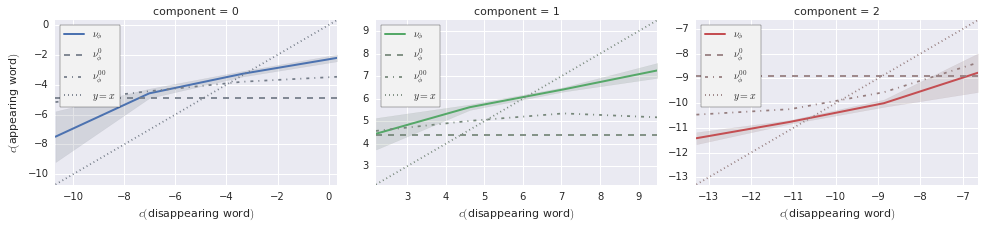

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation)
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographic_density' is based on 27751 words.


Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 2895 (cluster-unique) substitutions, but the PCA is in fact computed on 1437 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.